<a href="https://colab.research.google.com/github/Jason797/Projects/blob/main/Optimal_investments_for_lending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading In Data

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import pickle
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Support functions for much later modeling
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics, model_selection


# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Scoring Functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Import files
# 2. Add my Google Drive
drive.mount('/content/gdrive')

# 3. Go to folder on Google Drive that contains files
%cd /content/gdrive/MyDrive/BUSI488/Project1/488Project1

# 4. Special shell command to view the files in the home directory of the notebook environment
!ls 


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1q_RB4wICfN_qTigrIF-0kAxtyBzu_eVz/488Project1
 488_Project1
'488_Project1 NEW (with code we added thursday)'
 accepted_2007_to_2018Q4.csv
'Class 12 elevator pitch.gdoc'
'Class 12 ghost slides.gslides'
'Copy of 488_Project1 NEW (with code we added thursday)'
'Copy of accepted_2007_to_2018Q4.csv'
 LCDataDictionary.xlsx
 ppt.pptx
 rejected_2007_to_2018Q4.csv


In [ ]:
# 1. Read data file accepted into a pandas dataframe
df_acc = pd.read_csv("accepted_2007_to_2018Q4.csv") # read in pandas Dataframe

# 2. Number of rows (i.e., customer records) and columns (i.e., features)
print(f"\n Number of Rows and Columns: {df_acc.shape} \n")

# 3. Take a look at the first 10 rows of the data
df_acc.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



 Number of Rows and Columns: (2260701, 151) 



id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   
5  68426831        NaN    11950.0      11950.0          11950.0   36 months   
6  68476668        NaN    20000.0      20000.0          20000.0   36 months   
7  67275481        NaN    20000.0      20000.0          20000.0   36 months   
8  68466926        NaN    10000.0      10000.0          10000.0   36 months   
9  68616873        NaN     8000.0       8000.0           8000.0   36 months   

   int_rate  installment grade sub_grade  \
0     13.99       123.03     C        C4   
1     11.99       820.28     C        C1   
2     10.78       432.66     B        B4   
3     14.85       829.90     C        C5   
4     22.45       289.91     F        F1   
5     13.44       405.18     C        C3   
6      9.17       637.58     B        B2   
7      8.49       631.26     B        B1   
8      6.49       306.45     A        A2   
9     11.48       263.74     B        B5   

                                 emp_title emp_length home_ownership  \
0                                  leadman  10+ years       MORTGAGE   
1                                 Engineer  10+ years       MORTGAGE   
2                             truck driver  10+ years       MORTGAGE   
3              Information Systems Officer  10+ years       MORTGAGE   
4                      Contract Specialist    3 years       MORTGAGE   
5                     Veterinary Tecnician    4 years           RENT   
6  Vice President of Recruiting Operations  10+ years       MORTGAGE   
7                              road driver  10+ years       MORTGAGE   
8                          SERVICE MANAGER    6 years           RENT   
9                           Vendor liaison  10+ years       MORTGAGE   

   annual_inc verification_status   issue_d loan_status pymnt_plan  \
0     55000.0        Not Verified  Dec-2015  Fully Paid          n   
1     65000.0        Not Verified  Dec-2015  Fully Paid          n   
2     63000.0        Not Verified  Dec-2015  Fully Paid          n   
3    110000.0     Source Verified  Dec-2015     Current          n   
4    104433.0     Source Verified  Dec-2015  Fully Paid          n   
5     34000.0     Source Verified  Dec-2015  Fully Paid          n   
6    180000.0        Not Verified  Dec-2015  Fully Paid          n   
7     85000.0        Not Verified  Dec-2015  Fully Paid          n   
8     85000.0        Not Verified  Dec-2015  Fully Paid          n   
9     42000.0        Not Verified  Dec-2015  Fully Paid          n   

                                                 url desc             purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...  NaN  debt_consolidation   
1  https://lendingclub.com/browse/loanDetail.acti...  NaN      small_business   
2  https://lendingclub.com/browse/loanDetail.acti...  NaN    home_improvement   
3  https://lendingclub.com/browse/loanDetail.acti...  NaN  debt_consolidation   
4  https://lendingclub.com/browse/loanDetail.acti...  NaN      major_purchase   
5  https://lendingclub.com/browse/loanDetail.acti...  NaN  debt_consolidation   
6  https://lendingclub.com/browse/loanDetail.acti...  NaN  debt_consolidation   
7  https://lendingclub.com/browse/loanDetail.acti...  NaN      major_purchase   
8  https://lendingclub.com/browse/loanDetail.acti...  NaN         credit_card   
9  https://lendingclub.com/browse/loanDetail.acti...  NaN         credit_card   

                     title zip_code addr_state    dti  delinq_2yrs  \
0       Debt consolidation    190xx         PA   5.91          0.0   
1                 Business    577xx         SD  16.06     

# Examining and Cleaning Data

In [ ]:
#Examine both acc and rej data
df_acc.describe()

member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.260668e+06  2.260664e+06  2.258957e+06  2.260639e+06    2.260668e+06   
mean   4.458068e+02  7.799243e+04  1.882420e+01  3.068792e-01    6.985882e+02   
std    2.671735e+02  1.126962e+05  1.418333e+01  8.672303e-01    3.301038e+01   
min    4.930000e+00  0.000000e+00 -1.000000e+00  0.000000e+00    6.100000e+02   
25%    2.516500e+02  4.600000e+04  1.189000e+01  0.000000e+00    6.750000e+02   
50%    3.779900e+02  6.500000e+04  1.784000e+01  0.000000e+00    6.900000e+02   
75%    5.933200e+02  9.300000e+04  2.449000e+01  0.000000e+00    7.150000e+02   
max    1.719830e+03  1.100000e+08  9.990000e+02  5.800000e+01    8.450000e+02   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count     2.260668e+06    2.260638e+06            1.102166e+06   
mean      7.025884e+02    5.768354e-01            3.454092e+01   
std       3.301124e+01    8.859632e-01            2.190047e+01   
min       6.140000e+02    0.000000e+00            0.000000e+00   
25%       6.790000e+02    0.000000e+00            1.600000e+01   
50%       6.940000e+02    0.000000e+00            3.100000e+01   
75%       7.190000e+02    1.000000e+00            5.000000e+01   
max       8.500000e+02    3.300000e+01            2.260000e+02   

       mths_since_last_record      open_acc       pub_rec     revol_bal  \
count           359156.000000  2.260639e+06  2.260639e+06  2.260668e+06   
mean                72.312842  1.161240e+01  1.975278e-01  1.665846e+04   
std                 26.464094  5.640861e+00  5.705150e-01  2.294831e+04   
min                  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%                 55.000000  8.000000e+00  0.000000e+00  5.950000e+03   
50%                 74.000000  1.100000e+01  0.000000e+00  1.132400e+04   
75%                 92.000000  1.400000e+01  0.000000e+00  2.024600e+04   
max                129.000000  1.010000e+02  8.600000e+01  2.904836e+06   

         revol_util     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  2.258866e+06  2.260639e+06  2.260668e+06   2.260668e+06  2.260668e+06   
mean   5.033770e+01  2.416255e+01  4.206891e+03   4.205965e+03  1.208256e+04   
std    2.471307e+01  1.198753e+01  7.343239e+03   7.342333e+03  9.901383e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%    3.150000e+01  1.500000e+01  0.000000e+00   0.000000e+00  4.546458e+03   
50%    5.030000e+01  2.200000e+01  0.000000e+00   0.000000e+00  9.329720e+03   
75%    6.940000e+01  3.100000e+01  6.149940e+03   6.146310e+03  1.694087e+04   
max    8.923000e+02  1.760000e+02  4.000000e+04   4.000000e+04  6.329688e+04   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     2.260668e+06     2.260668e+06   2.260668e+06        2.260668e+06   
mean      1.206439e+04     9.505772e+03   2.431388e+03        1.518453e+00   
std       9.896992e+03     8.321852e+03   2.679738e+03        1.184159e+01   
min       0.000000e+00     0.000000e+00   0.000000e+00       -9.500000e-09   
25%       4.531800e+03     3.000000e+03   7.281875e+02        0.000000e+00   
50%       9.309675e+03     7.000000e+03   1.525940e+03        0.000000e+00   
75%       1.691671e+04     

In [ ]:
#Assess data types
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
#Unique counts for each variable
df_acc.nunique()

id                                            2260701
member_id                                           0
loan_amnt                                        1572
funded_amnt                                      1572
funded_amnt_inv                                 10057
term                                                2
int_rate                                          673
installment                                     93301
grade                                               7
sub_grade                                          35
emp_title                                      512694
emp_length                                         11
home_ownership                                      6
annual_inc                                      89368
verification_status                                 3
issue_d                                           139
loan_status                                         9
pymnt_plan                                          2
url                         

In [ ]:
# Drop unnecessary variables from accepted loans data frame. Currently removes both the red and white highlighted values in the LCDataDictionary.
df2 = df_acc.drop(["last_pymnt_d","addr_state", "collection_recovery_fee", "desc", "dti", "emp_title", "id", "il_util", "inq_fi", "inq_last_6mths", "installment", "issue_d", "last_credit_pull_d", "mo_sin_old_il_acct", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mths_since_last_record", "mths_since_rcnt_il", "mths_since_recent_bc", "mths_since_recent_inq", "next_pymnt_d", "purpose", "pymnt_plan", "recoveries", "revol_util", "title", "tot_hi_cred_lim", "total_bc_limit", "total_cu_tl", "url", "zip_code", "hardship_type", "hardship_reason", "hardship_status", "hardship_start_date", "hardship_end_date", "payment_plan_start_date", "hardship_last_payment_amount", "disbursement_method", "settlement_status", "settlement_date", "acc_open_past_24mths", "all_util", "annual_inc", "bc_open_to_buy", "collections_12_mths_ex_med", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_sats", "num_tl_op_past_12m", "open_acc", "open_acc_6m", "open_il_12m", "open_il_24m", "open_act_il", "open_rv_12m", "open_rv_24m", "pct_tl_nvr_dlq", "policy_code", "pub_rec", "total_rev_hi_lim"], axis = 1)

In [ ]:
# Check first 5 samples
df2.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0        NaN     3600.0       3600.0           3600.0   36 months     13.99   
1        NaN    24700.0      24700.0          24700.0   36 months     11.99   
2        NaN    20000.0      20000.0          20000.0   60 months     10.78   
3        NaN    35000.0      35000.0          35000.0   60 months     14.85   
4        NaN    10400.0      10400.0          10400.0   60 months     22.45   

  grade sub_grade emp_length home_ownership verification_status loan_status  \
0     C        C4  10+ years       MORTGAGE        Not Verified  Fully Paid   
1     C        C1  10+ years       MORTGAGE        Not Verified  Fully Paid   
2     B        B4  10+ years       MORTGAGE        Not Verified  Fully Paid   
3     C        C5  10+ years       MORTGAGE     Source Verified     Current   
4     F        F1    3 years       MORTGAGE     Source Verified  Fully Paid   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Aug-2003           675.0            679.0   
1          1.0         Dec-1999           715.0            719.0   
2          0.0         Aug-2000           695.0            699.0   
3          0.0         Sep-2008           785.0            789.0   
4          1.0         Jun-1998           695.0            699.0   

   mths_since_last_delinq  revol_bal  total_acc initial_list_status  \
0                    30.0     2765.0       13.0                   w   
1                     6.0    21470.0       38.0                   w   
2                     NaN     7869.0       18.0                   w   
3                     NaN     7802.0       17.0                   w   
4                    12.0    21929.0       35.0                   w   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   4421.723917          4421.72          3600.00   
1       0.00           0.00  25679.660000         25679.66         24700.00   
2       0.00           0.00  22705.924294         22705.92         20000.00   
3   15897.65       15897.65  31464.010000         31464.01         19102.35   
4       0.00           0.00  11740.500000         11740.50         10400.00   

   total_rec_int  total_rec_late_fee  last_pymnt_amnt  last_fico_range_high  \
0         821.72                 0.0           122.67                 564.0   
1         979.66                 0.0           926.35                 699.0   
2        2705.92                 0.0         15813.30                 704.0   
3       12361.66                 0.0           829.90                 679.0   
4        1340.50                 0.0         10128.96                 704.0   

   last_fico_range_low  mths_since_last_major_derog application_type  \
0                560.0                         30.0       Individual   
1                695.0                          NaN       Individual   
2                700.0                          NaN        Joint App   
3                675.0                          NaN       Individual   
4                700.0                          NaN       Individual   

   annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
0               NaN        NaN                       NaN             0.0   
1               NaN        NaN                       NaN             0.0   
2           71000.0      13.85              Not Verified             0.0   
3               NaN        NaN                       NaN             0.0   
4               NaN        NaN                       NaN             0.0   

   tot_coll_amt  tot_cur_bal  total_bal_il  max_bal_bc  inq_last_12m  \
0         722.0     144904.0        4981.0       722.0           4.0   
1           0.0     204396.0       18005.0      6472.0           6.0   
2           0.0     189699.0       10827.0      2081.0           1.0   
3           0.0     301500.0       12609.0      6987.0           0.0   
4           0.0  

In [ ]:
# Examine New Data

df2.describe()

member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        delinq_2yrs  fico_range_low  fico_range_high  mths_since_last_delinq  \
count  2.260639e+06    2.260668e+06     2.260668e+06            1.102166e+06   
mean   3.068792e-01    6.985882e+02     7.025884e+02            3.454092e+01   
std    8.672303e-01    3.301038e+01     3.301124e+01            2.190047e+01   
min    0.000000e+00    6.100000e+02     6.140000e+02            0.000000e+00   
25%    0.000000e+00    6.750000e+02     6.790000e+02            1.600000e+01   
50%    0.000000e+00    6.900000e+02     6.940000e+02            3.100000e+01   
75%    0.000000e+00    7.150000e+02     7.190000e+02            5.000000e+01   
max    5.800000e+01    8.450000e+02     8.500000e+02            2.260000e+02   

          revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  2.260668e+06  2.260639e+06  2.260668e+06   2.260668e+06  2.260668e+06   
mean   1.665846e+04  2.416255e+01  4.206891e+03   4.205965e+03  1.208256e+04   
std    2.294831e+04  1.198753e+01  7.343239e+03   7.342333e+03  9.901383e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%    5.950000e+03  1.500000e+01  0.000000e+00   0.000000e+00  4.546458e+03   
50%    1.132400e+04  2.200000e+01  0.000000e+00   0.000000e+00  9.329720e+03   
75%    2.024600e+04  3.100000e+01  6.149940e+03   6.146310e+03  1.694087e+04   
max    2.904836e+06  1.760000e+02  4.000000e+04   4.000000e+04  6.329688e+04   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     2.260668e+06     2.260668e+06   2.260668e+06        2.260668e+06   
mean      1.206439e+04     9.505772e+03   2.431388e+03        1.518453e+00   
std       9.896992e+03     8.321852e+03   2.679738e+03        1.184159e+01   
min       0.000000e+00     0.000000e+00   0.000000e+00       -9.500000e-09   
25%       4.531800e+03     3.000000e+03   7.281875e+02        0.000000e+00   
50%       9.309675e+03     7.000000e+03   1.525940e+03        0.000000e+00   
75%       1.691671e+04     1.389910e+04   3.108062e+03        0.000000e+00   
max       6.329688e+04     4.000000e+04   2.819250e+04        1.484340e+03   

       last_pymnt_amnt  last_fico_range_high  last_fico_range_low  \
count     2.260668e+06          2.260668e+06         2.260668e+06   
mean      3.429346e+03          6.876610e+02         6.755397e+02   
std       6.018248e+03          7.297044e+01         1.110976e+02   
min       0.000000e+00          0.000000e+00         0.000000e+00   
25%       3.103300e+02          6.540000e+02         6.500000e+02   
50%       6.005700e+02          6.990000e+02         6.950000e+02   
75%       3.743750e+03          7.340000e+02         7.300000e+02   
max       4.219205e+04          8.500000e+02         8.450000e+02   

       mths_since_last_major_derog  annual_inc_joint      dti_joint  \
count                580775.000000      1.207100e+05  120706.000000   
mean                     44.164220      1.236246e+05      19.251817   
std                      21.533121      7.416135e+04       7.822086   
min                       0.000000      5.693510e+03       0.000000   
25%                      27.000000      8.340000e+04      13.530000   
50%                      44.000000      1.100000e+05      18.840000   
75%                      62.000

In [ ]:
# Check for null values
df2.isnull().sum()

member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
grade                                              33
sub_grade                                          33
emp_length                                     146940
home_ownership                                     33
verification_status                                33
loan_status                                        33
delinq_2yrs                                        62
earliest_cr_line                                   62
fico_range_low                                     33
fico_range_high                                    33
mths_since_last_delinq                        1158535
revol_bal                                          33
total_acc                   

In [ ]:
# Drop Variables that have a majority of null values
df3 = df2.drop(["inq_last_12m","max_bal_bc","total_bal_il","settlement_term","settlement_percentage","settlement_amount","debt_settlement_flag_date","hardship_payoff_balance_amount","orig_projected_additional_accrued_interest","hardship_loan_status","hardship_dpd","hardship_length","hardship_amount","deferral_term","sec_app_mths_since_last_major_derog","sec_app_collections_12_mths_ex_med","sec_app_chargeoff_within_12_mths","sec_app_num_rev_accts","sec_app_open_act_il","sec_app_revol_util","sec_app_open_acc","sec_app_mort_acc","sec_app_inq_last_6mths","sec_app_earliest_cr_line","sec_app_fico_range_high","sec_app_fico_range_low","revol_bal_joint","mths_since_recent_revol_delinq","mths_since_recent_bc_dlq","verification_status_joint","dti_joint","annual_inc_joint","mths_since_last_major_derog","mths_since_last_delinq","member_id"], axis=1)

In [ ]:
# Check null values again to see which ones we will have to impute
df3.isnull().sum()

loan_amnt                         33
funded_amnt                       33
funded_amnt_inv                   33
term                              33
int_rate                          33
grade                             33
sub_grade                         33
emp_length                    146940
home_ownership                    33
verification_status               33
loan_status                       33
delinq_2yrs                       62
earliest_cr_line                  62
fico_range_low                    33
fico_range_high                   33
revol_bal                         33
total_acc                         62
initial_list_status               33
out_prncp                         33
out_prncp_inv                     33
total_pymnt                       33
total_pymnt_inv                   33
total_rec_prncp                   33
total_rec_int                     33
total_rec_late_fee                33
last_pymnt_amnt                   33
last_fico_range_high              33
l

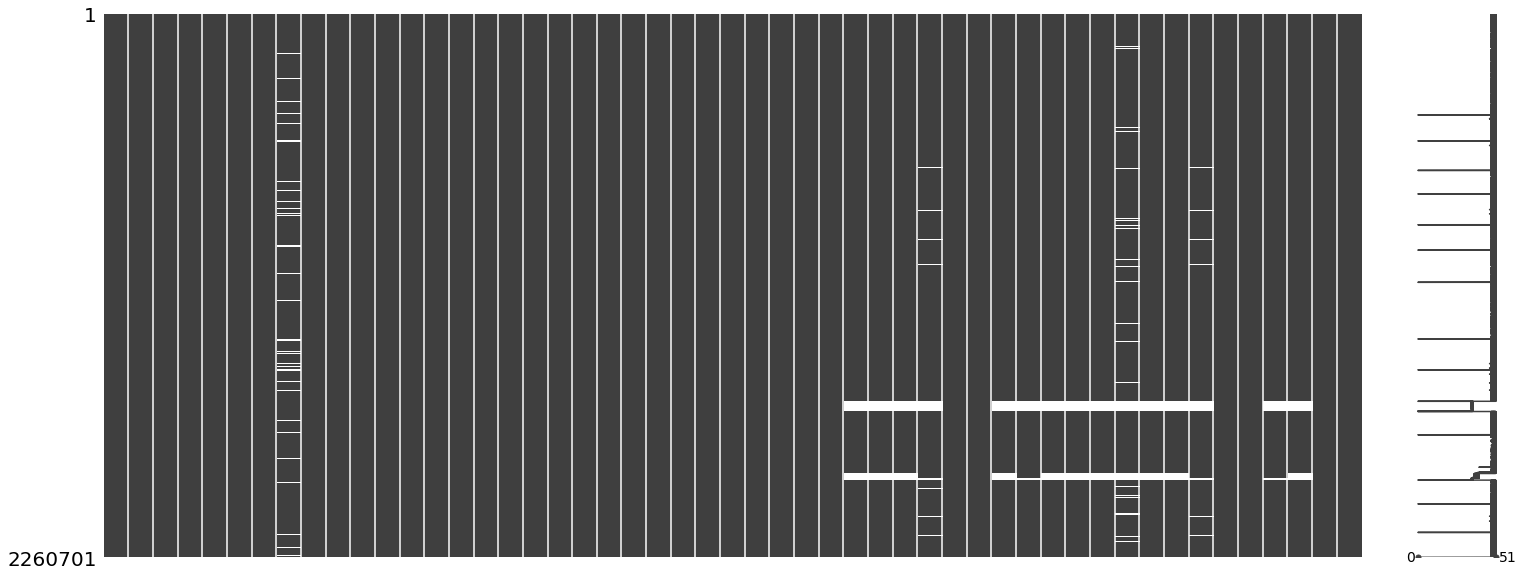

In [ ]:
#Visually inspect missing data
import missingno as msno
%matplotlib inline
msno.matrix(df3)

In [ ]:
# Do the data types make sense?
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 51 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   funded_amnt                 float64
 2   funded_amnt_inv             float64
 3   term                        object 
 4   int_rate                    float64
 5   grade                       object 
 6   sub_grade                   object 
 7   emp_length                  object 
 8   home_ownership              object 
 9   verification_status         object 
 10  loan_status                 object 
 11  delinq_2yrs                 float64
 12  earliest_cr_line            object 
 13  fico_range_low              float64
 14  fico_range_high             float64
 15  revol_bal                   float64
 16  total_acc                   float64
 17  initial_list_status         object 
 18  out_prncp                   float64
 19  out_prncp_inv        

In [ ]:
# Check unique counts
df3.nunique()

loan_amnt                        1572
funded_amnt                      1572
funded_amnt_inv                 10057
term                                2
int_rate                          673
grade                               7
sub_grade                          35
emp_length                         11
home_ownership                      6
verification_status                 3
loan_status                         9
delinq_2yrs                        37
earliest_cr_line                  754
fico_range_low                     48
fico_range_high                    48
revol_bal                      102251
total_acc                         152
initial_list_status                 2
out_prncp                      356141
out_prncp_inv                  368481
total_pymnt                   1633864
total_pymnt_inv               1311099
total_rec_prncp                486463
total_rec_int                  635921
total_rec_late_fee              18375
last_pymnt_amnt                704467
last_fico_ra

In [ ]:
## CATEGORICAL CLEANING
# Lets just remove samples where everything is null first (made df3 df to make it easier)
df = df3.dropna(how='all',axis=0)

# Remove those 29 observations because imputing a random month doesnt have a real value
df = df.dropna(subset=["earliest_cr_line"],axis=0)

# Remove earliest_cr_line column
df = df.drop(['earliest_cr_line'], axis=1)

# Impute emp_length with the mode value
df.loc[df['emp_length'].isnull(), 'emp_length'] = '< 1 year'

# Okay now lets fix the remaining categorical values
# Fix loan_status:
df.loc[df.loan_status == 'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'Fully Paid'
df.loc[df.loan_status == 'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'Default'
df.loc[df.loan_status == 'Charged Off', 'loan_status'] = 'Default'
# Drop observations where loan_status is not Default or Fully Paid
df.loc[df['loan_status'] == 'Current', 'loan_status'] = None
df.loc[df['loan_status'] == 'Late (31-120 days)', 'loan_status'] = None
df.loc[df['loan_status'] == 'In Grace Period', 'loan_status'] = None
df.loc[df['loan_status'] == 'Late (16-30 days)', 'loan_status'] = None
df = df.dropna(subset=["loan_status"],axis=0)

# Make loan_status 0 and 1 instead of Fully Paid and Default (1 is Default 0 is Fully Paid):
df.loc[df['loan_status'] == 'Default', 'loan_status'] = 1
df.loc[df['loan_status'] == 'Fully Paid', 'loan_status'] = 0

# Make hardship_flag and debt_settlement_flag 0 and 1 instead of N and Y:
df.loc[df['hardship_flag'] == 'Y', 'hardship_flag'] = 1
df.loc[df['hardship_flag'] == 'N', 'hardship_flag'] = 0

df.loc[df['debt_settlement_flag'] == 'Y', 'debt_settlement_flag'] = 1
df.loc[df['debt_settlement_flag'] == 'N', 'debt_settlement_flag'] = 0

# Typecast loan_status, hardship_flag and debt_settlement_flag as float
df.loc[:,'hardship_flag'] = df['hardship_flag'].astype('int')
df.loc[:,'debt_settlement_flag'] = df['debt_settlement_flag'].astype('int')
df.loc[:,'loan_status'] = df['loan_status'].astype('int')

# Typecast all categorical and zero/one columns to categorical:
categorical = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','initial_list_status','application_type']
for col in categorical:
  df.loc[:,col] = df[col].astype('category')

# Reset indices
df = df.reset_index(drop=True)


In [ ]:
# Make a copy of term column to use for feature engineering
term = df.term

In [ ]:
# Make Dummy Variables for all categorical variables
one_hot = pd.get_dummies(df[categorical])
df = df.drop(categorical,axis = 1)
df = df.join(one_hot)
df.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  loan_status  \
0     3600.0       3600.0           3600.0     13.99            0   
1    24700.0      24700.0          24700.0     11.99            0   
2    20000.0      20000.0          20000.0     10.78            0   
3    10400.0      10400.0          10400.0     22.45            0   
4    11950.0      11950.0          11950.0     13.44            0   

   delinq_2yrs  fico_range_low  fico_range_high  revol_bal  total_acc  \
0          0.0           675.0            679.0     2765.0       13.0   
1          1.0           715.0            719.0    21470.0       38.0   
2          0.0           695.0            699.0     7869.0       18.0   
3          1.0           695.0            699.0    21929.0       35.0   
4          0.0           690.0            694.0     8822.0        6.0   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0   4421.723917          4421.72           3600.0   
1        0.0            0.0  25679.660000         25679.66          24700.0   
2        0.0            0.0  22705.924294         22705.92          20000.0   
3        0.0            0.0  11740.500000         11740.50          10400.0   
4        0.0            0.0  13708.948530         13708.95          11950.0   

   total_rec_int  total_rec_late_fee  last_pymnt_amnt  last_fico_range_high  \
0         821.72                 0.0           122.67                 564.0   
1         979.66                 0.0           926.35                 699.0   
2        2705.92                 0.0         15813.30                 704.0   
3        1340.50                 0.0         10128.96                 704.0   
4        1758.95                 0.0          7653.56                 759.0   

   last_fico_range_low  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                560.0             0.0         722.0     144904.0   
1                695.0             0.0           0.0     204396.0   
2                700.0             0.0           0.0     189699.0   
3                700.0             0.0           0.0     331730.0   
4                755.0             0.0           0.0      12798.0   

   avg_cur_bal  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0      20701.0     37.2                       0.0          0.0   
1       9733.0     27.1                       0.0          0.0   
2      31617.0     55.9                       0.0          0.0   
3      27644.0     77.5                       0.0          0.0   
4       2560.0     91.0                       0.0          0.0   

   mo_sin_old_rev_tl_op  mort_acc  num_accts_ever_120_pd  num_rev_accts  \
0                 128.0       1.0                    2.0            9.0   
1                 192.0       4.0                    0.0           27.0   
2                 184.0       5.0                    0.0            7.0   
3                 210.0       6.0                    0.0           19.0   
4                  54.0       0.0                    0.0            4.0   

   num_rev_tl_bal_gt_0  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  \
0                  4.0               0.0           0.0                 0.0   
1                  5.0               0.0           0.0                 0.0   
2                  3.0               0.0           0.0                 0.0   
3                  6.0               0.0           0.0                 0.0   
4                  3.0               0.0           0.0                 0.0   

   percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  total_bal_ex_mort  \
0               0.0                   0.0        0.0             7746.0   
1               7.7                   0.0        0.0            39475.0   
2              50.0                   0.0        0.0            18696.0   
3              60.0                   0.0        0.0            95768.0   
4             100.0                   0.0        0.0            12798.0   

   total_il_high

In [ ]:
## NUMERICAL CLEANING
# Drop funded_amnt and funded_amnt_inv because its very correlated to loan_amnt
df = df.drop(["funded_amnt","funded_amnt_inv"], axis = 1)

# Drop samples where tot_cur_bal is null
df = df.dropna(subset=["tot_coll_amt"],axis=0)

# Impute 0 in num_tl_120_dpd if null value
df.loc[df['num_tl_120dpd_2m'].isnull(), 'num_tl_120dpd_2m'] = 0.0

# Drop samples where bc_util are null
df = df.dropna(subset=["bc_util"],axis=0)

# Drop one sample with null num_rev_accts
df = df.dropna(subset=["num_rev_accts"],axis=0)

# Drop percent_bt_gt_75 null rows
df = df.dropna(subset=["percent_bc_gt_75"],axis=0)

# Make the negative total_rec_late_fee 0
df.loc[df.total_rec_late_fee < 0, 'total_rec_late_fee'] = 0

# Reset Indices
df = df.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# Check work
df.head()

loan_amnt  int_rate  loan_status  delinq_2yrs  fico_range_low  \
0     3600.0     13.99            0          0.0           675.0   
1    24700.0     11.99            0          1.0           715.0   
2    20000.0     10.78            0          0.0           695.0   
3    10400.0     22.45            0          1.0           695.0   
4    11950.0     13.44            0          0.0           690.0   

   fico_range_high  revol_bal  total_acc  out_prncp  out_prncp_inv  \
0            679.0     2765.0       13.0        0.0            0.0   
1            719.0    21470.0       38.0        0.0            0.0   
2            699.0     7869.0       18.0        0.0            0.0   
3            699.0    21929.0       35.0        0.0            0.0   
4            694.0     8822.0        6.0        0.0            0.0   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   4421.723917          4421.72           3600.0         821.72   
1  25679.660000         25679.66          24700.0         979.66   
2  22705.924294         22705.92          20000.0        2705.92   
3  11740.500000         11740.50          10400.0        1340.50   
4  13708.948530         13708.95          11950.0        1758.95   

   total_rec_late_fee  last_pymnt_amnt  last_fico_range_high  \
0                 0.0           122.67                 564.0   
1                 0.0           926.35                 699.0   
2                 0.0         15813.30                 704.0   
3                 0.0         10128.96                 704.0   
4                 0.0          7653.56                 759.0   

   last_fico_range_low  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                560.0             0.0         722.0     144904.0   
1                695.0             0.0           0.0     204396.0   
2                700.0             0.0           0.0     189699.0   
3                700.0             0.0           0.0     331730.0   
4                755.0             0.0           0.0      12798.0   

   avg_cur_bal  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0      20701.0     37.2                       0.0          0.0   
1       9733.0     27.1                       0.0          0.0   
2      31617.0     55.9                       0.0          0.0   
3      27644.0     77.5                       0.0          0.0   
4       2560.0     91.0                       0.0          0.0   

   mo_sin_old_rev_tl_op  mort_acc  num_accts_ever_120_pd  num_rev_accts  \
0                 128.0       1.0                    2.0            9.0   
1                 192.0       4.0                    0.0           27.0   
2                 184.0       5.0                    0.0            7.0   
3                 210.0       6.0                    0.0           19.0   
4                  54.0       0.0                    0.0            4.0   

   num_rev_tl_bal_gt_0  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  \
0                  4.0               0.0           0.0                 0.0   
1                  5.0               0.0           0.0                 0.0   
2                  3.0               0.0           0.0                 0.0   
3                  6.0               0.0           0.0                 0.0   
4                  3.0               0.0           0.0                 0.0   

   percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  total_bal_ex_mort  \
0               0.0                   0.0        0.0             7746.0   
1               7.7                   0.0        0.0            39475.0   
2              50.0                   0.0        0.0            18696.0   
3              60.0                   0.0        0.0            95768.0   
4             100.0                   0.0        0.0            12798.0   

   total_il_high_credit_limit  hardship_flag  debt_settlement_flag  \
0                     13734.0              0                     0   
1                     24667.0              0            

# Exploratory Data Analysis

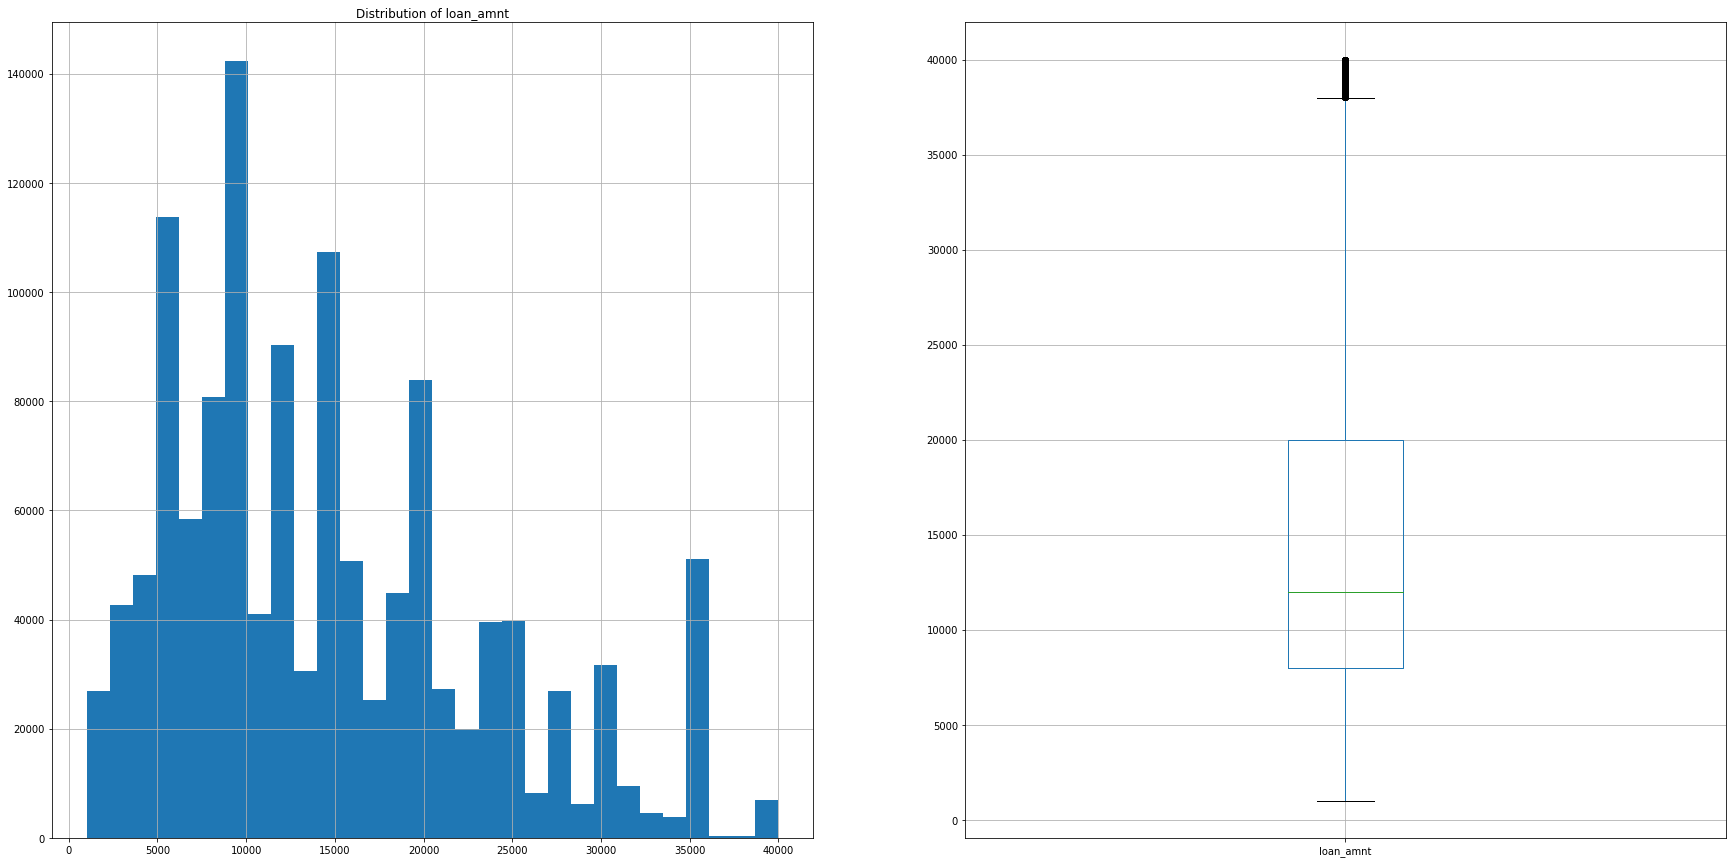

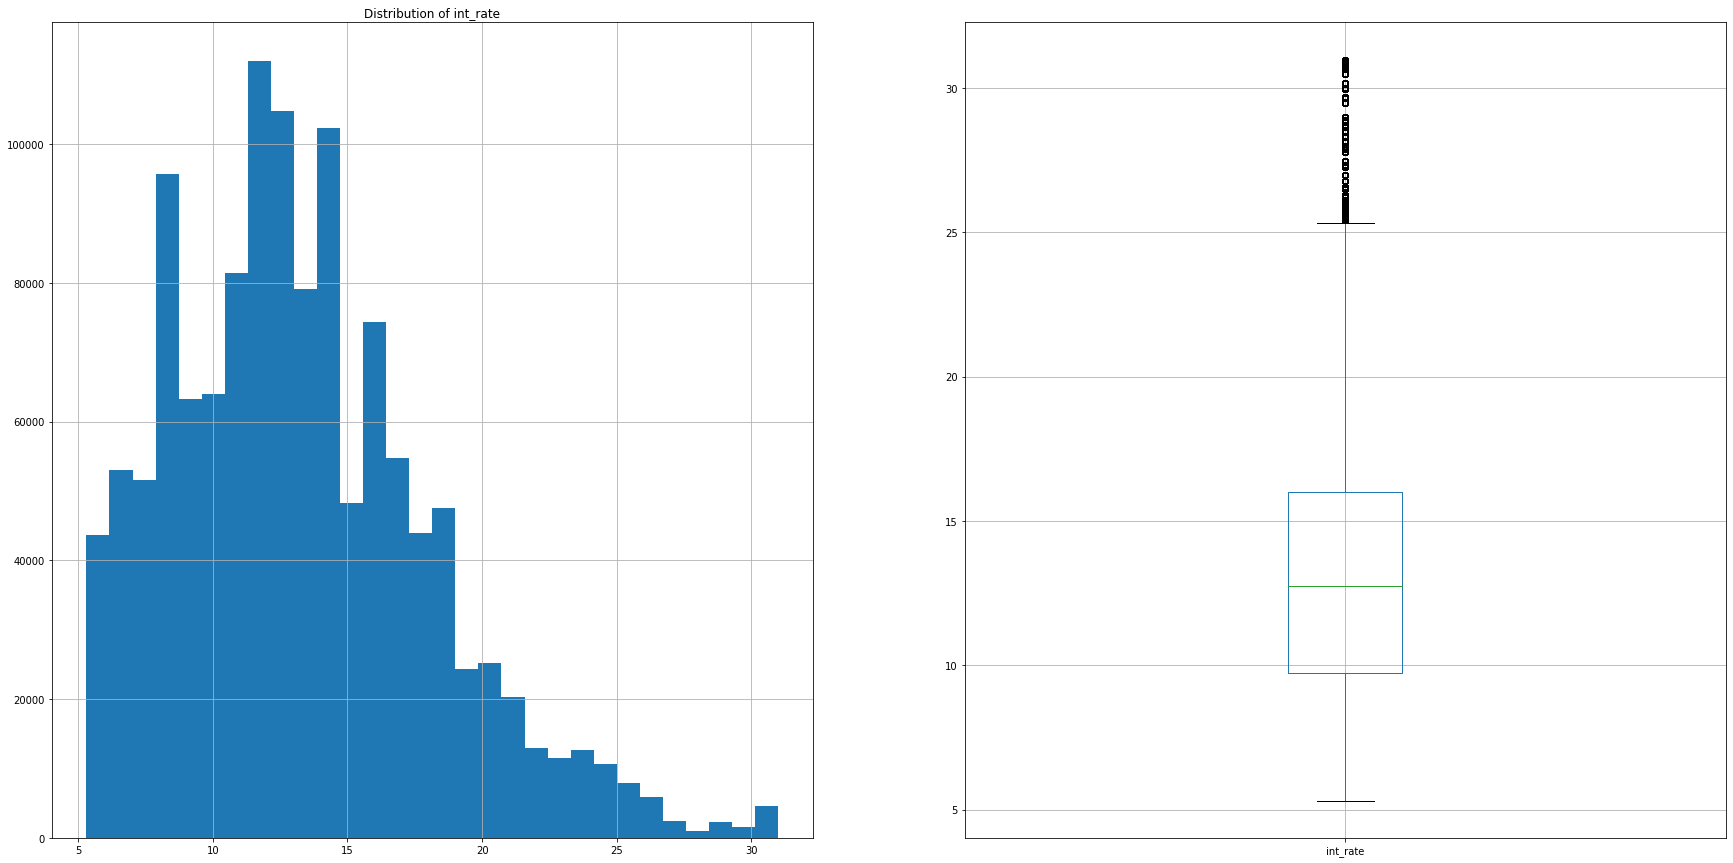

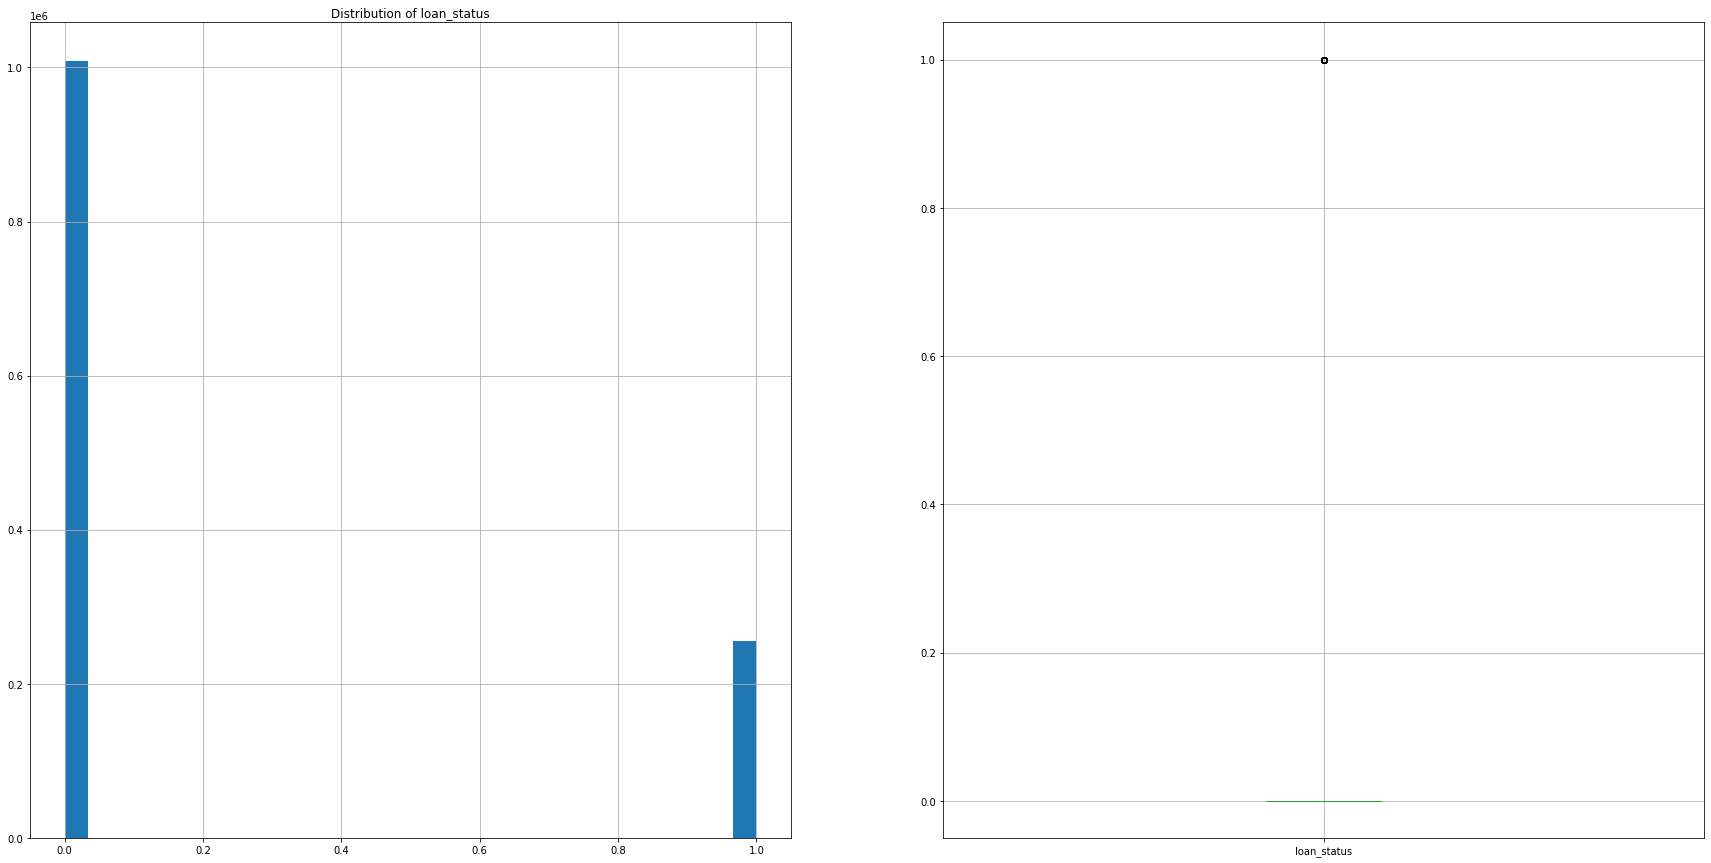

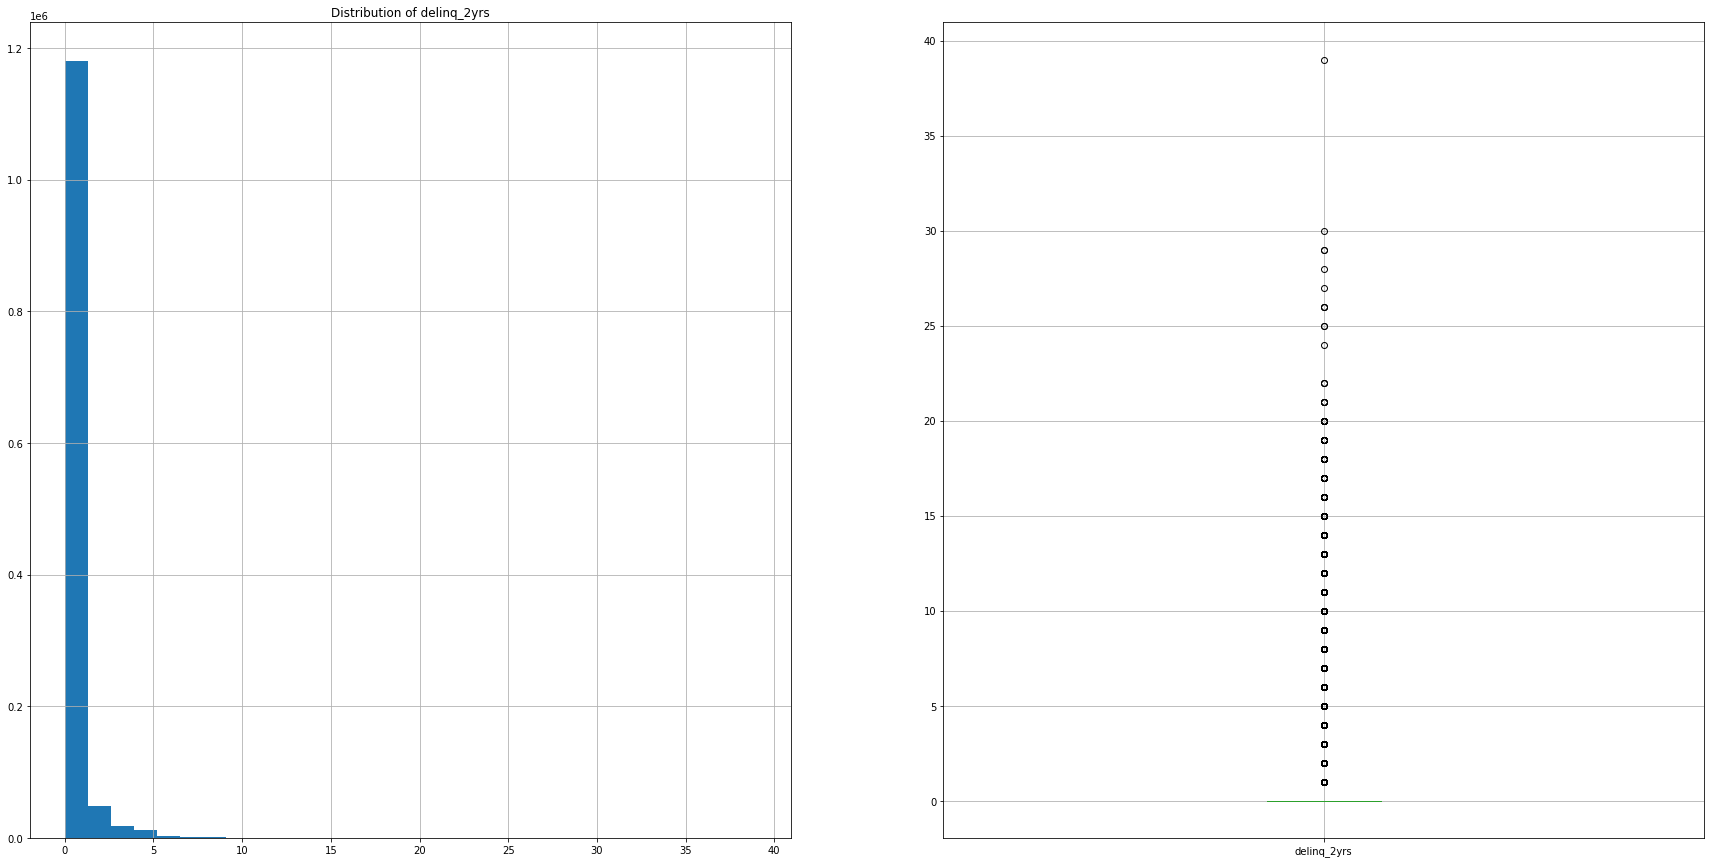

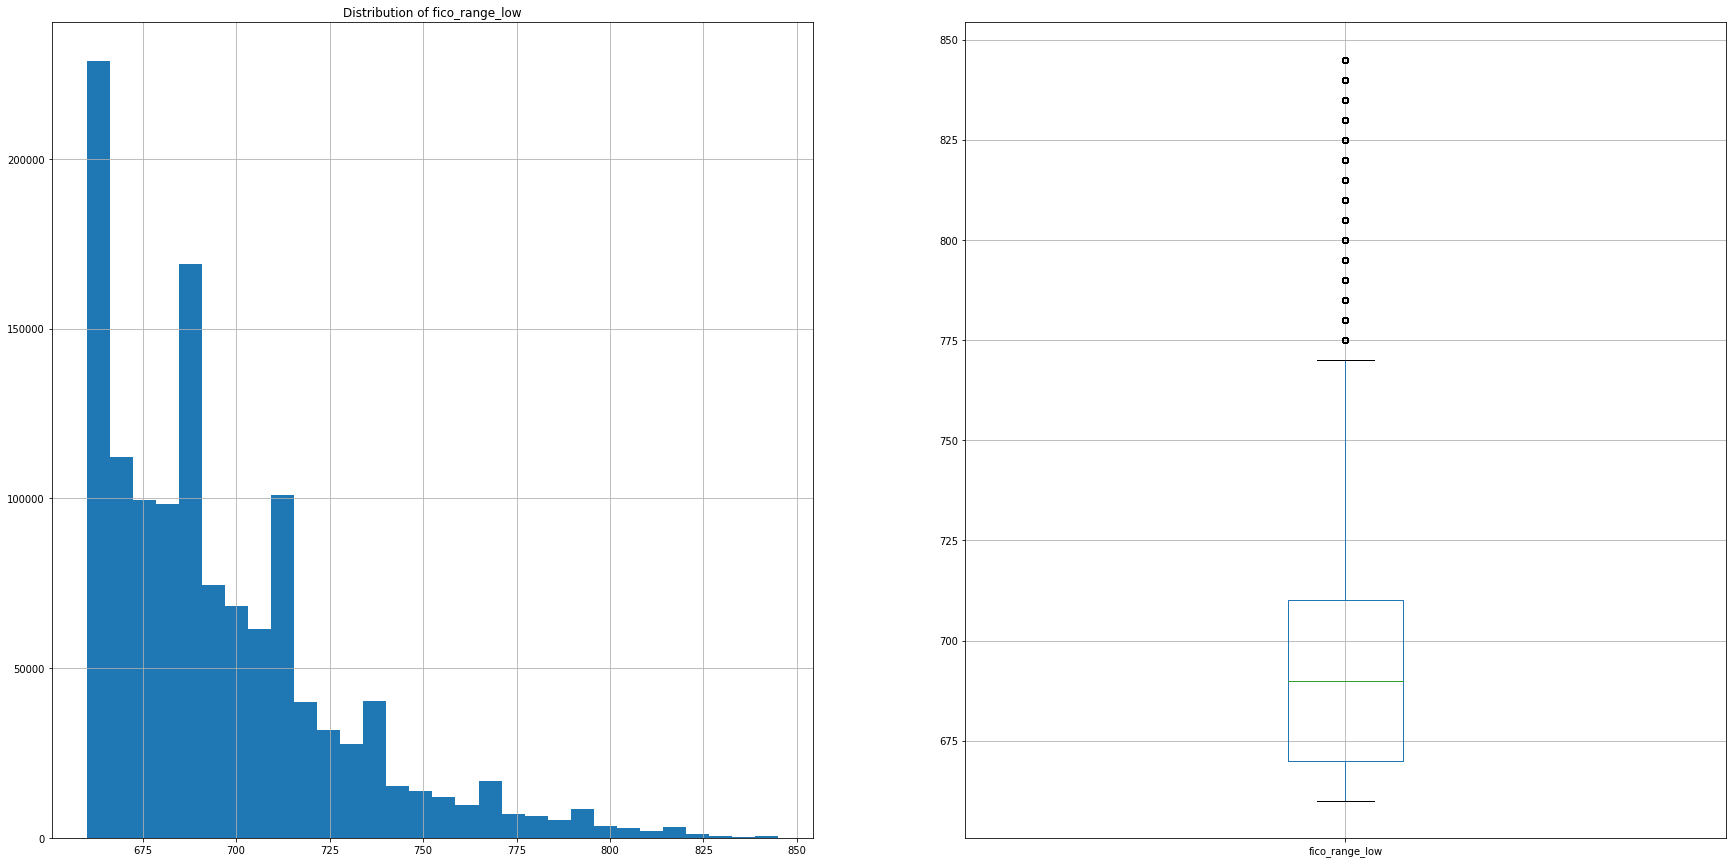

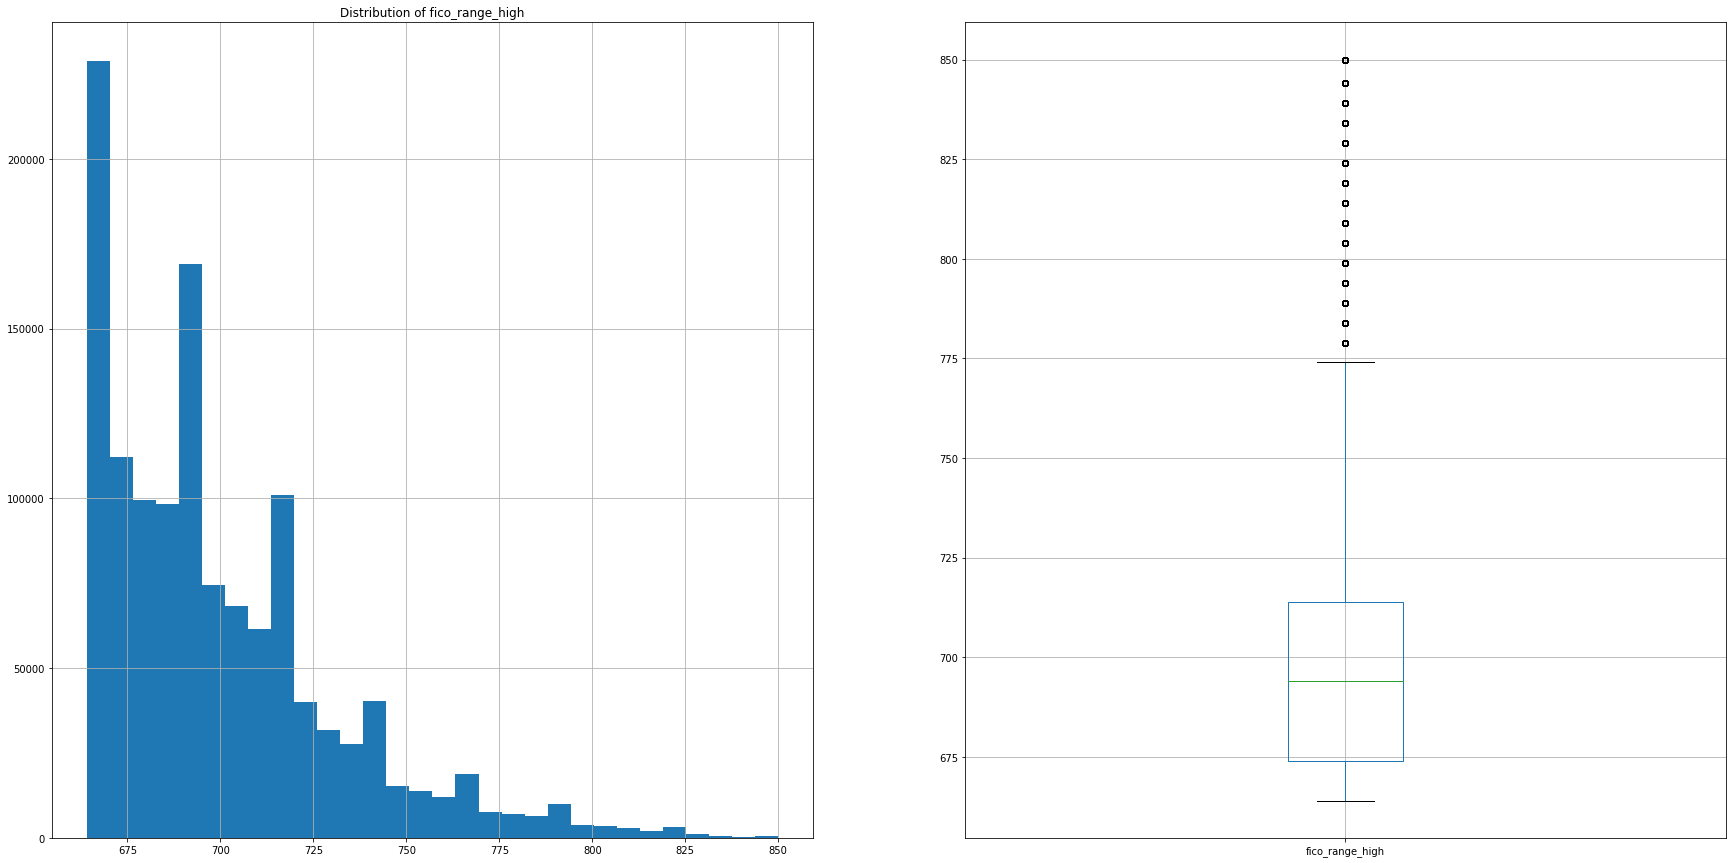

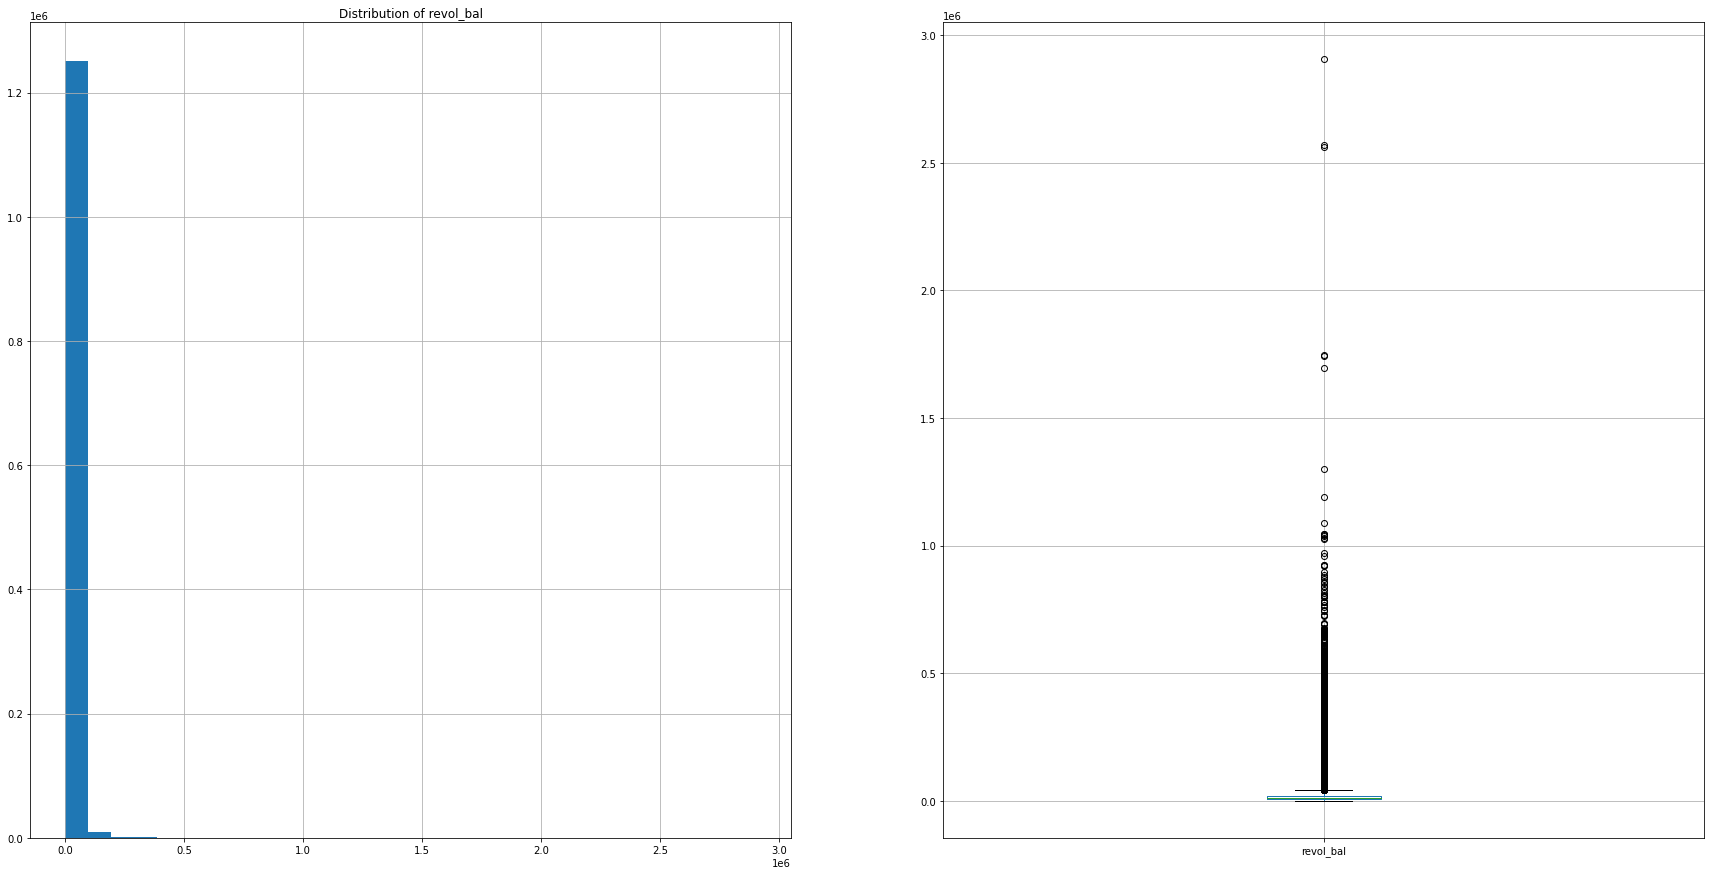

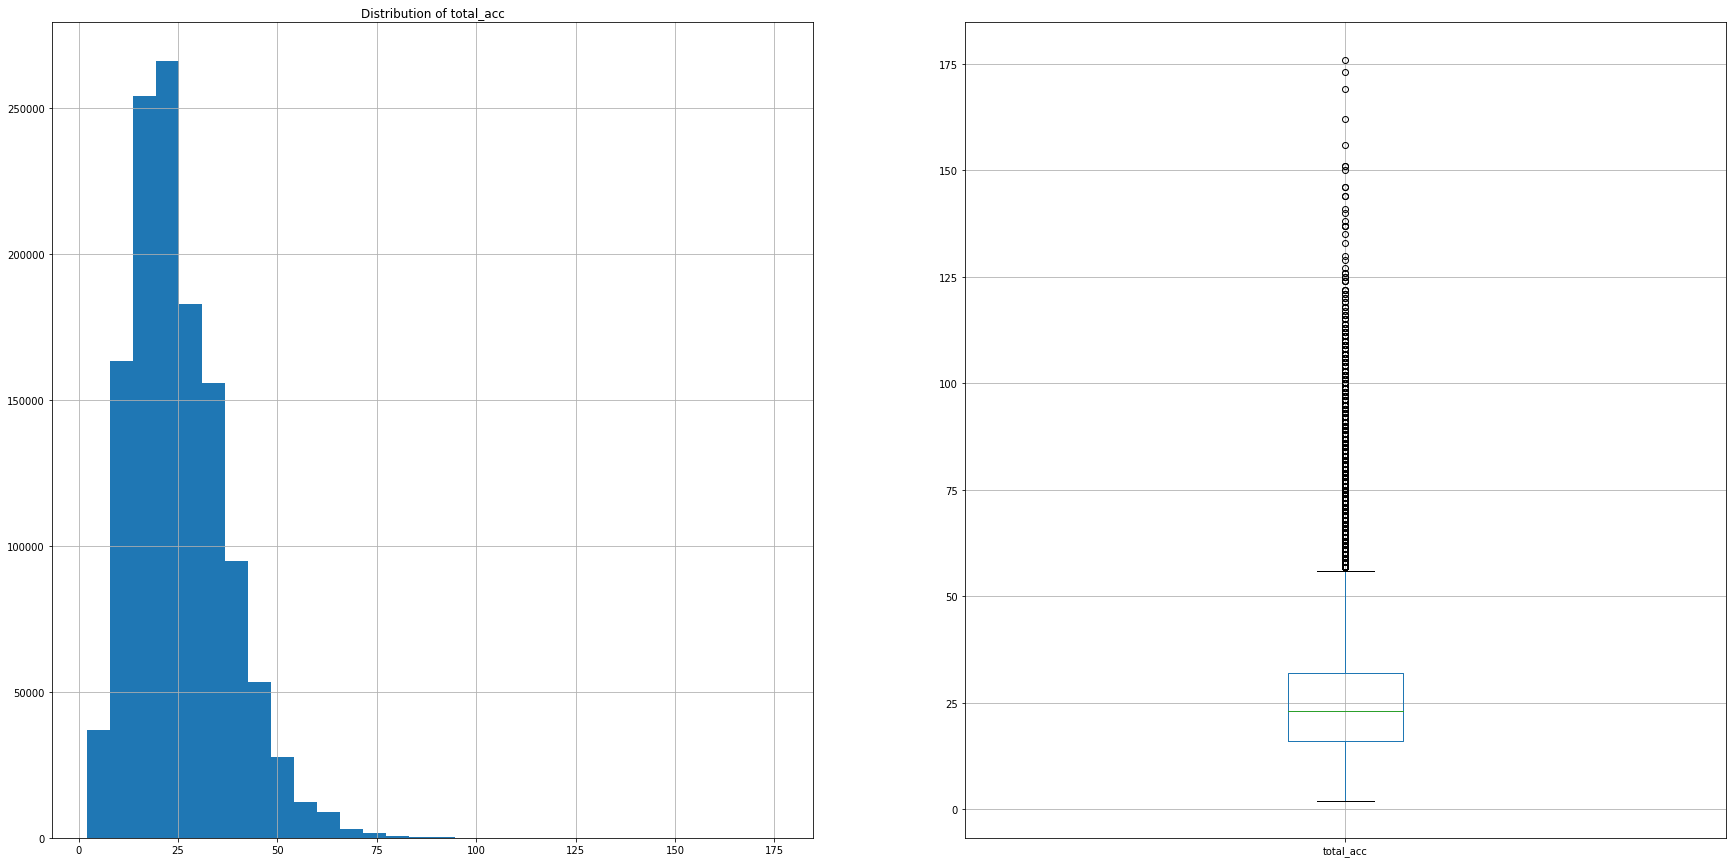

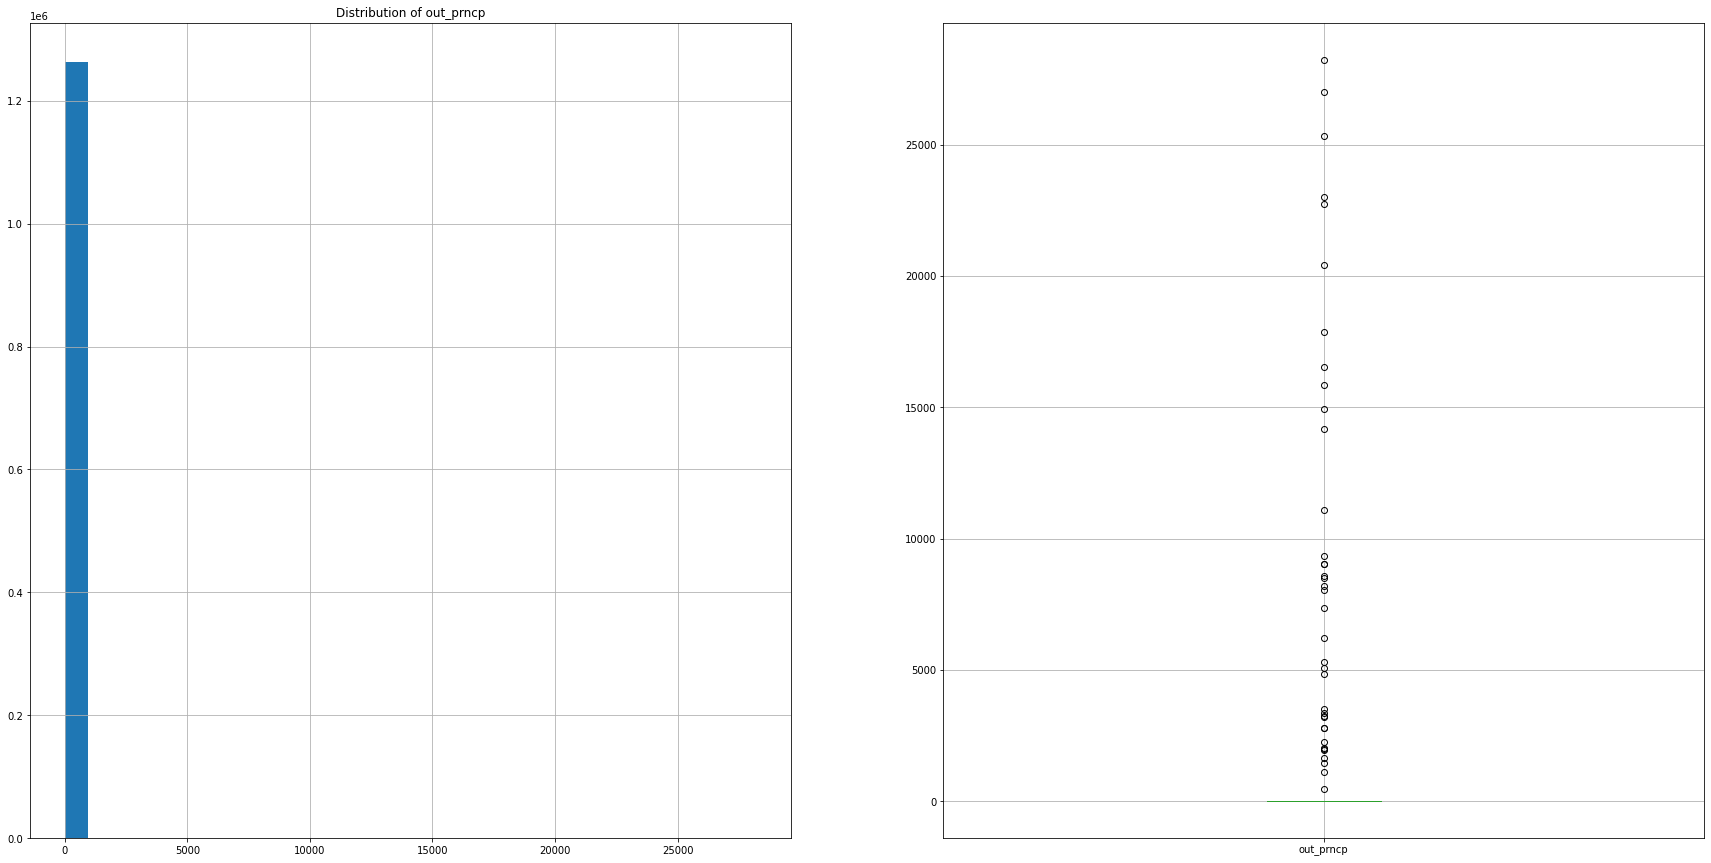

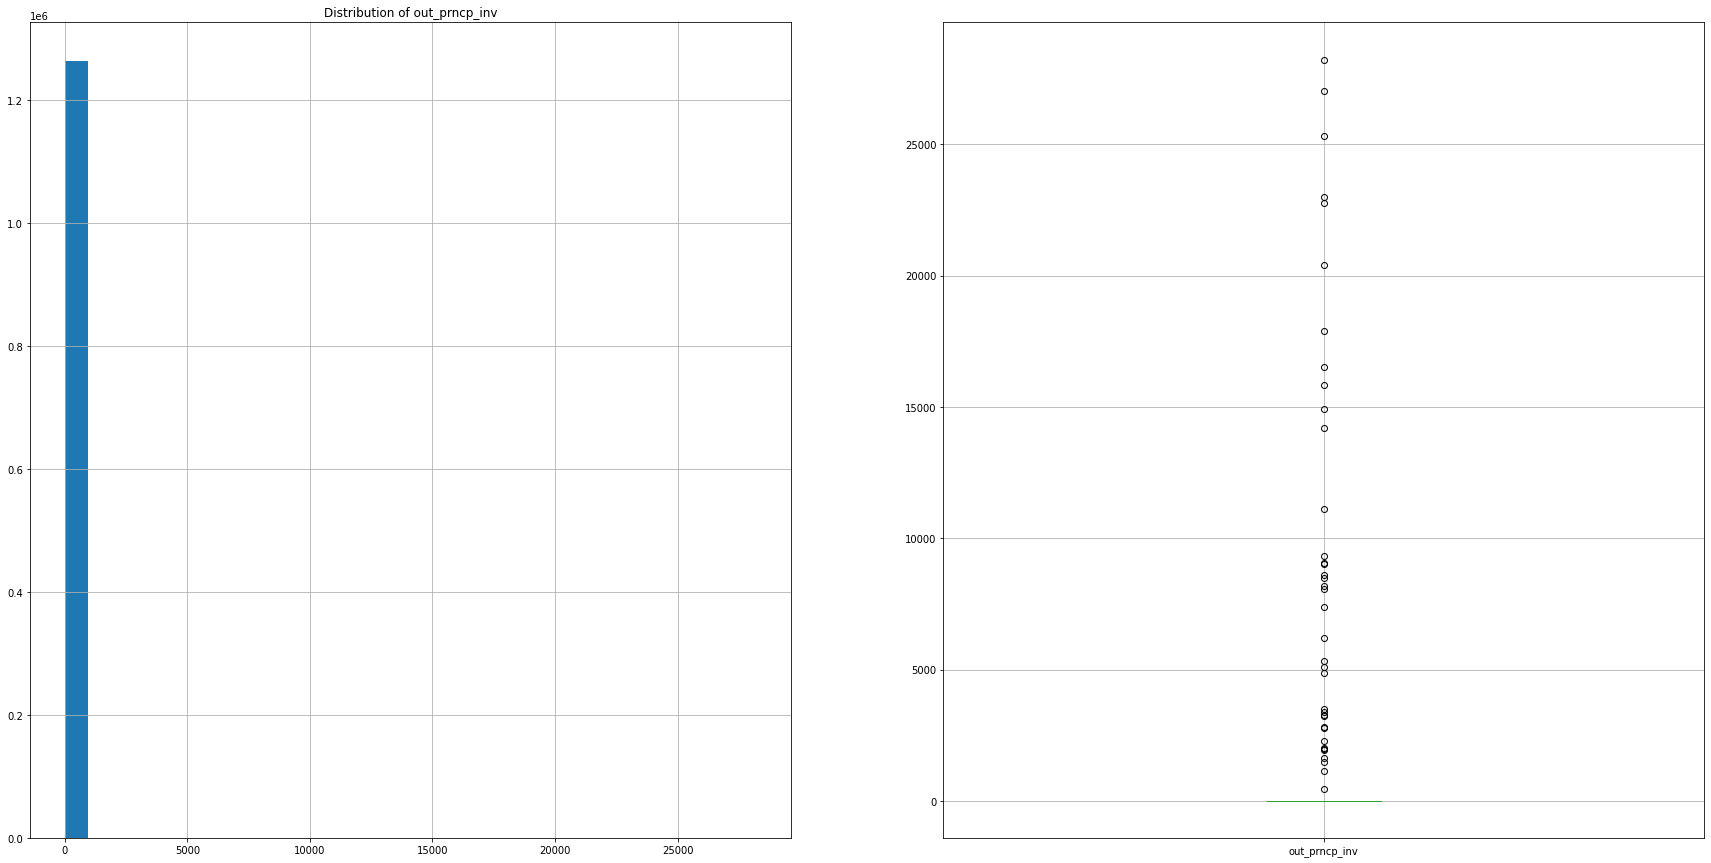

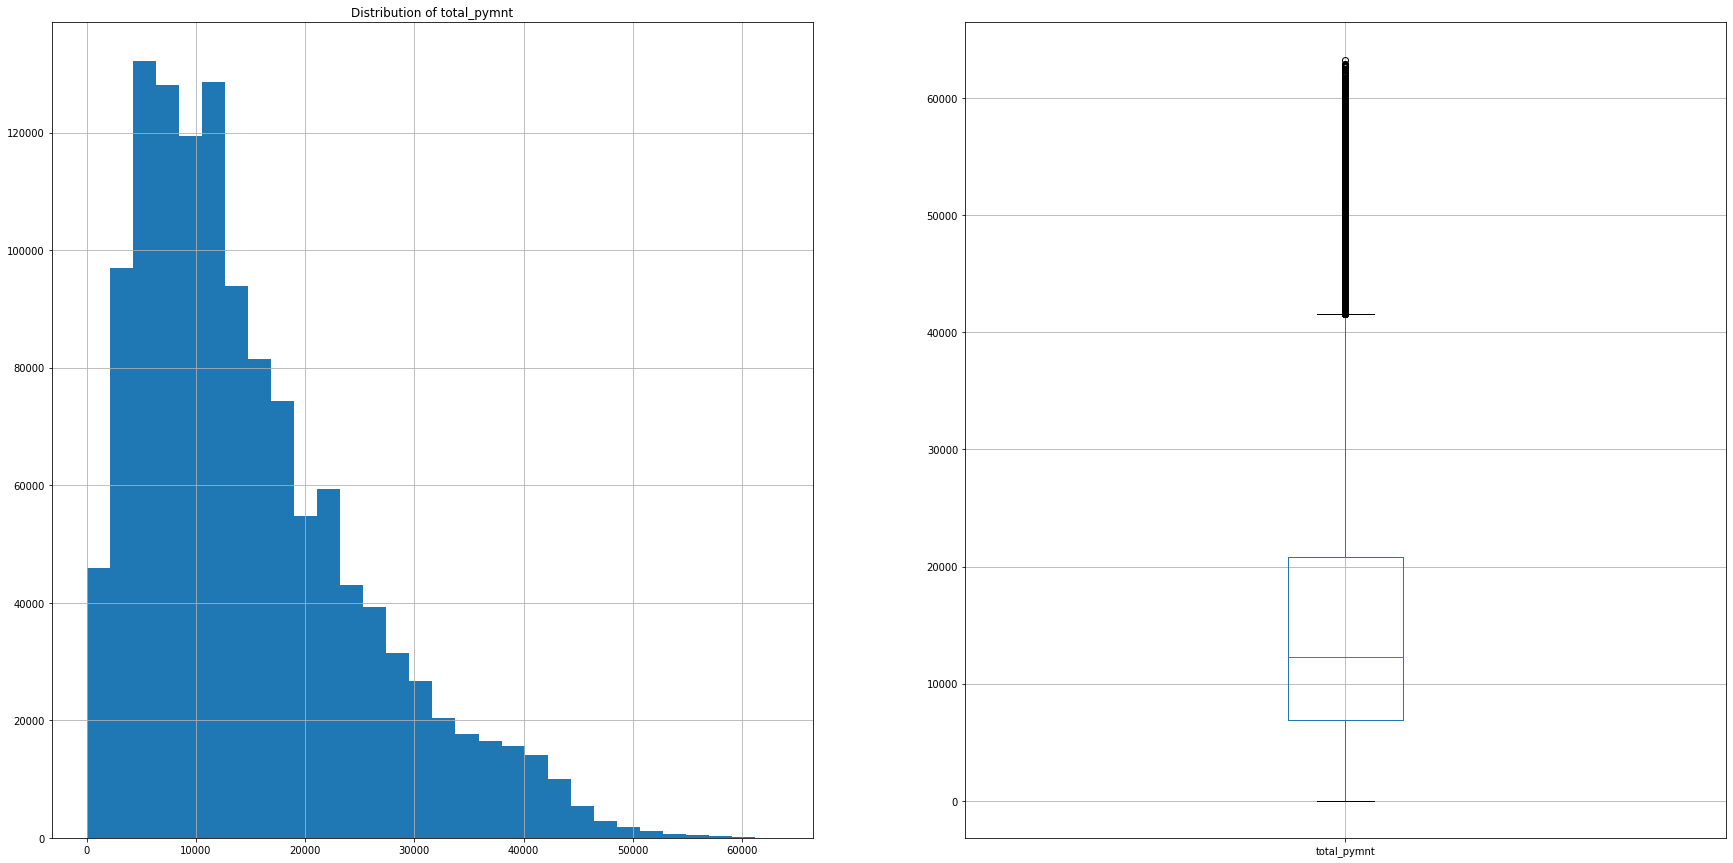

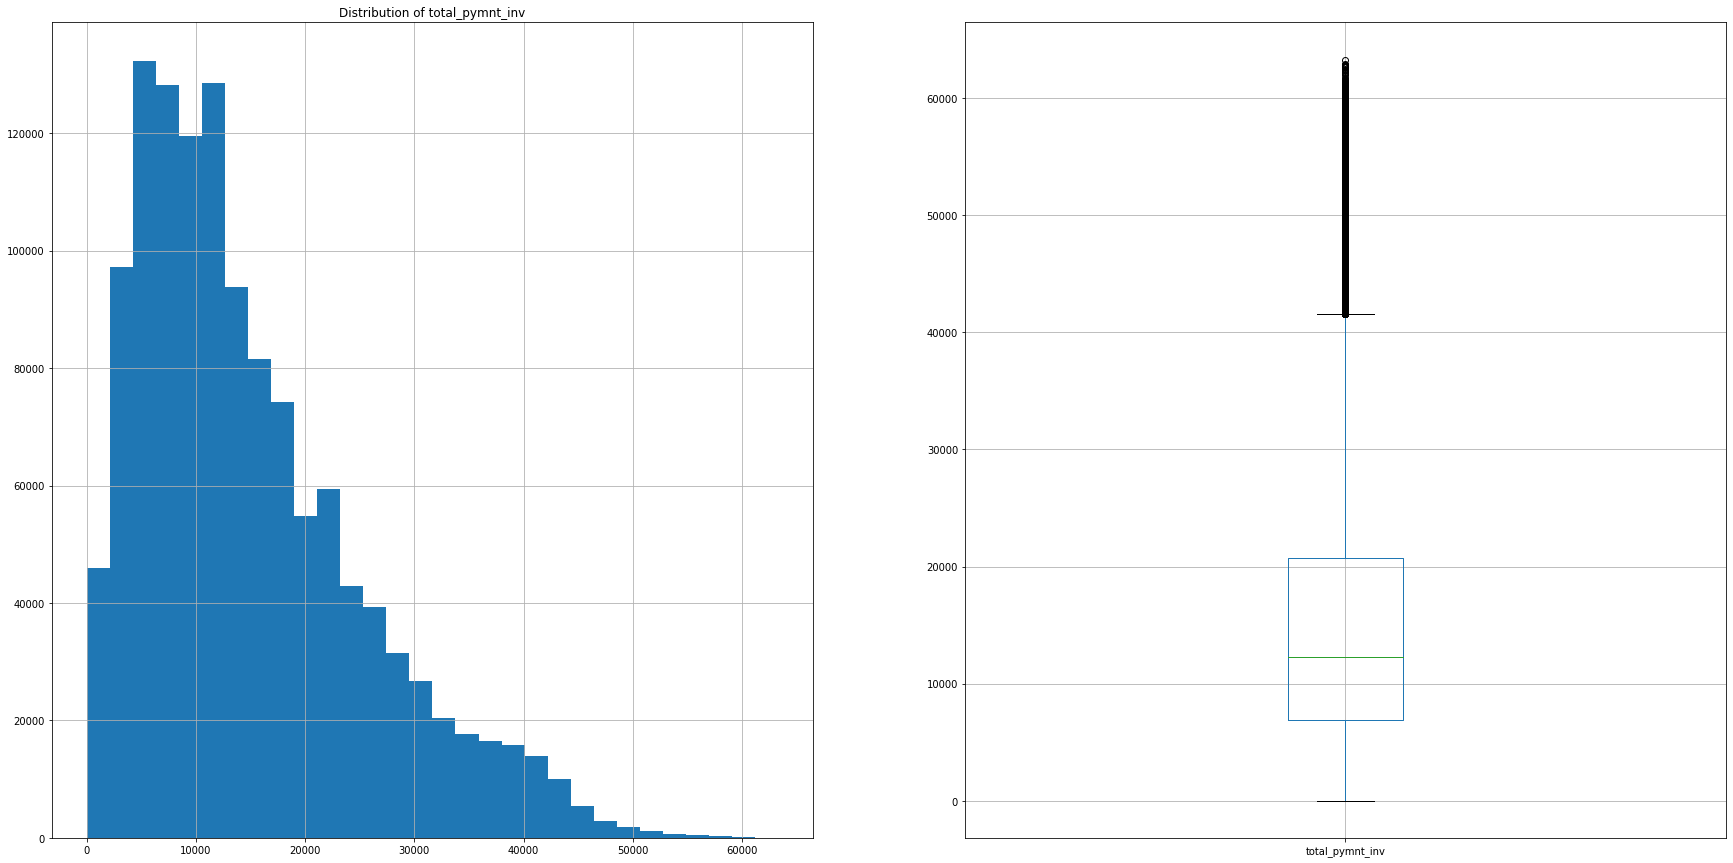

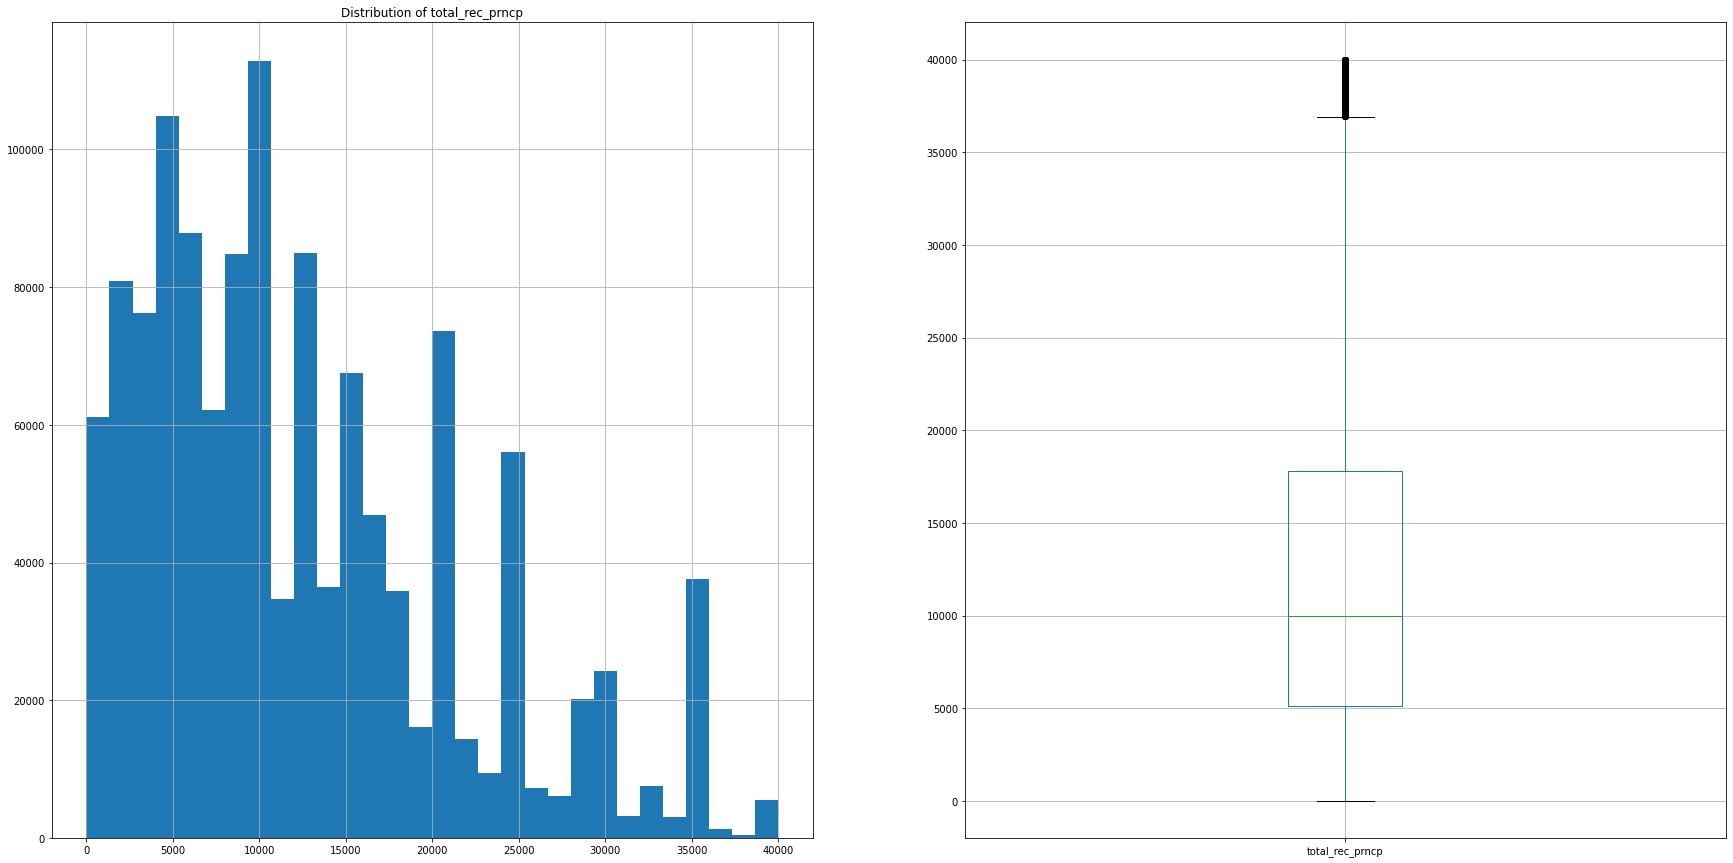

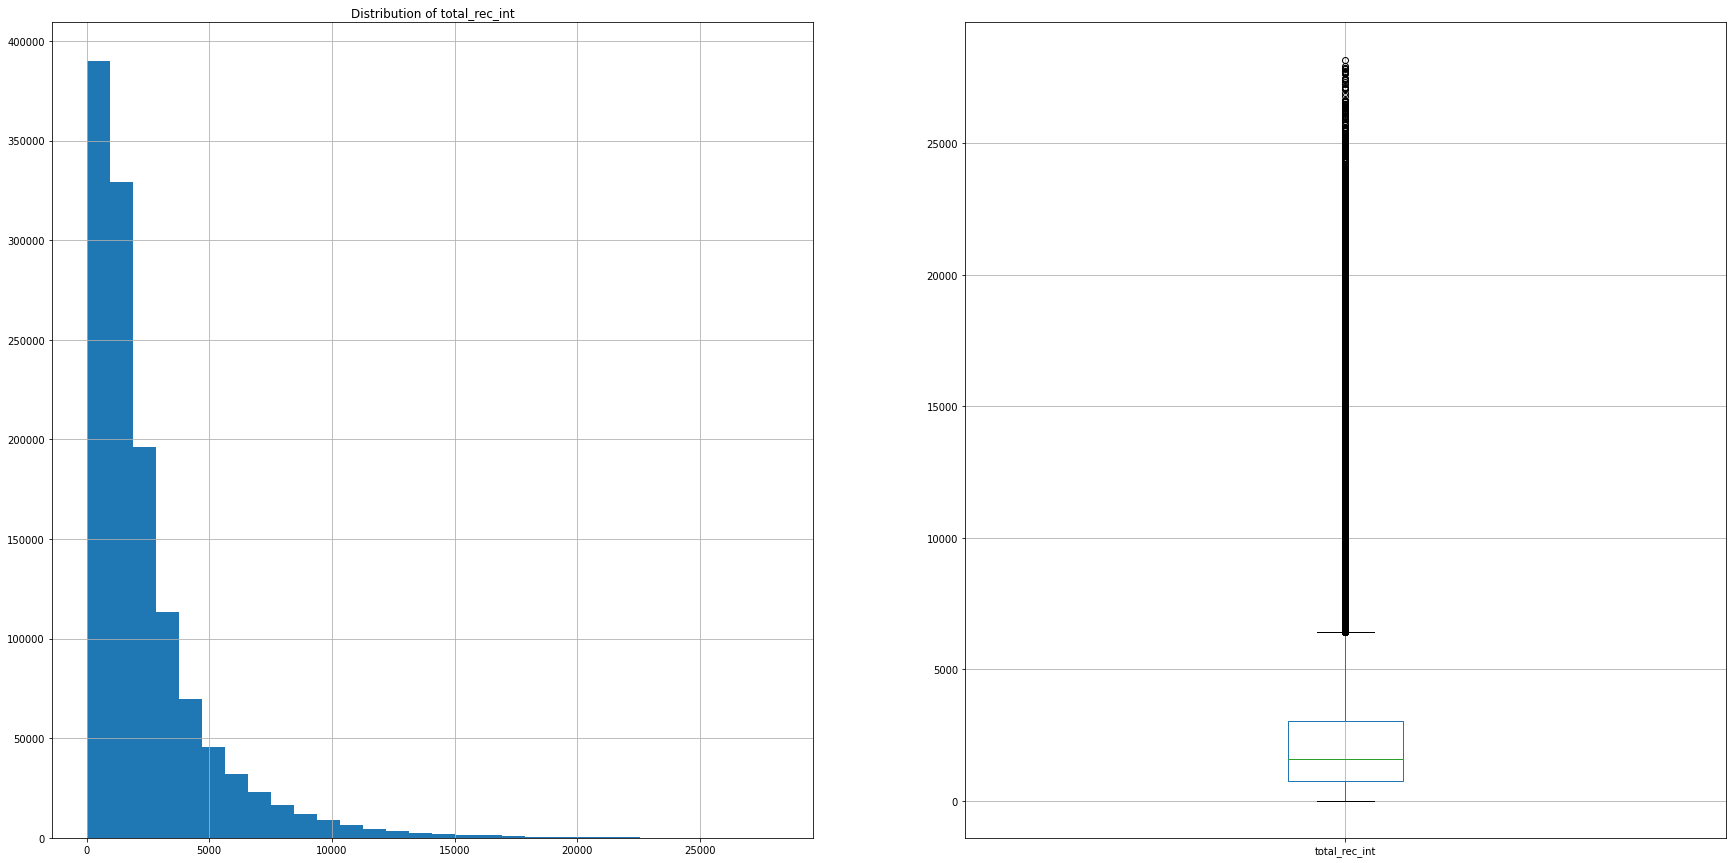

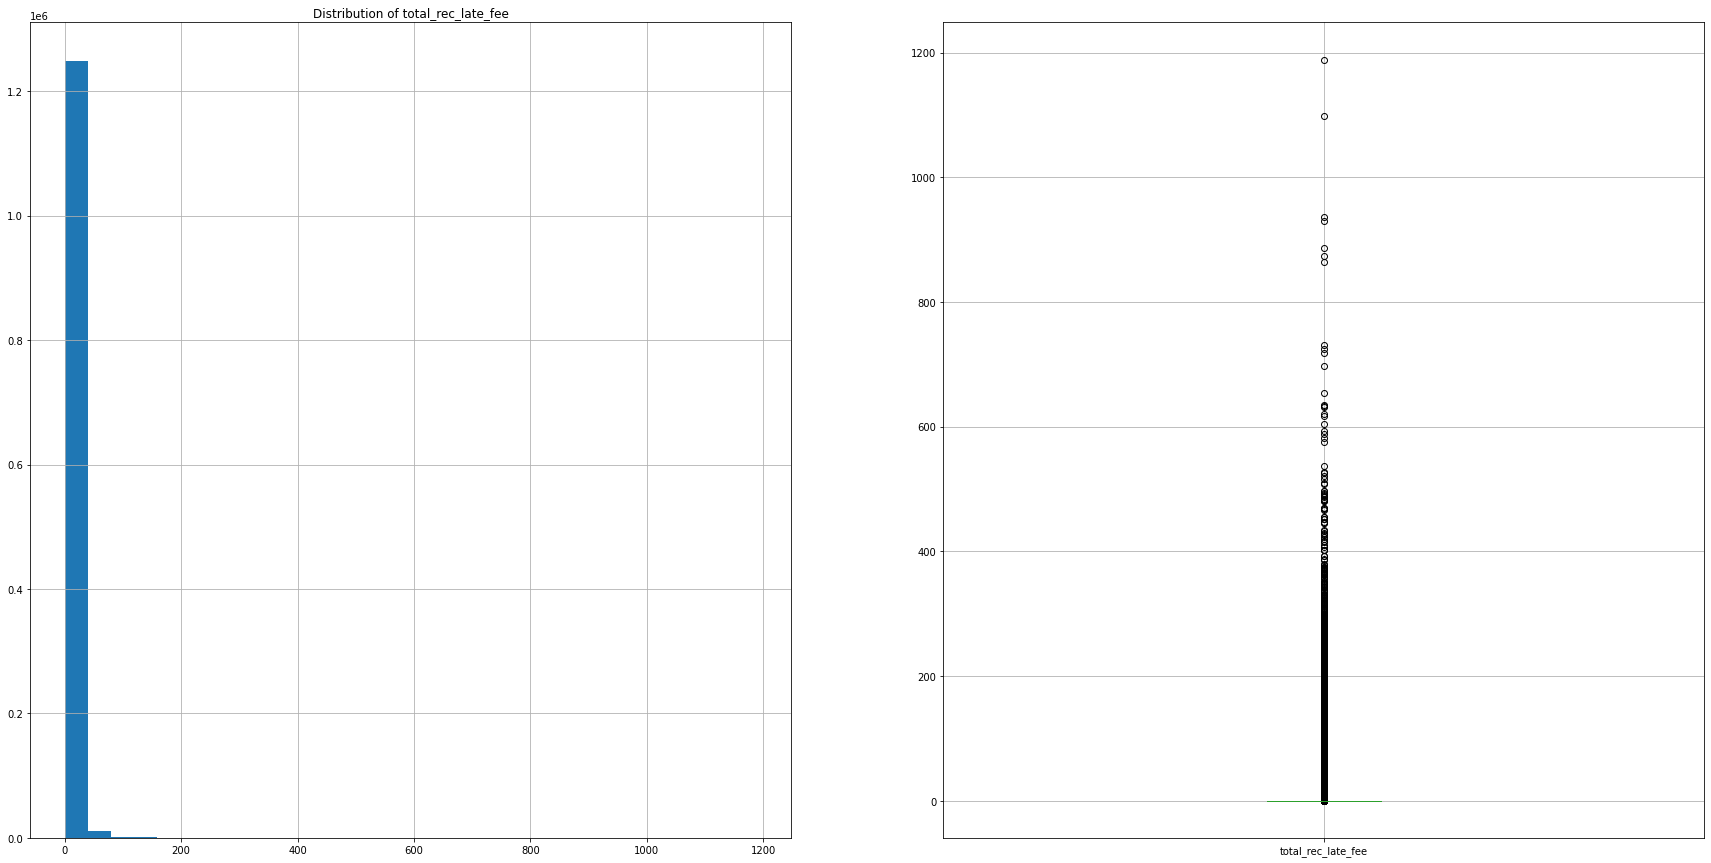

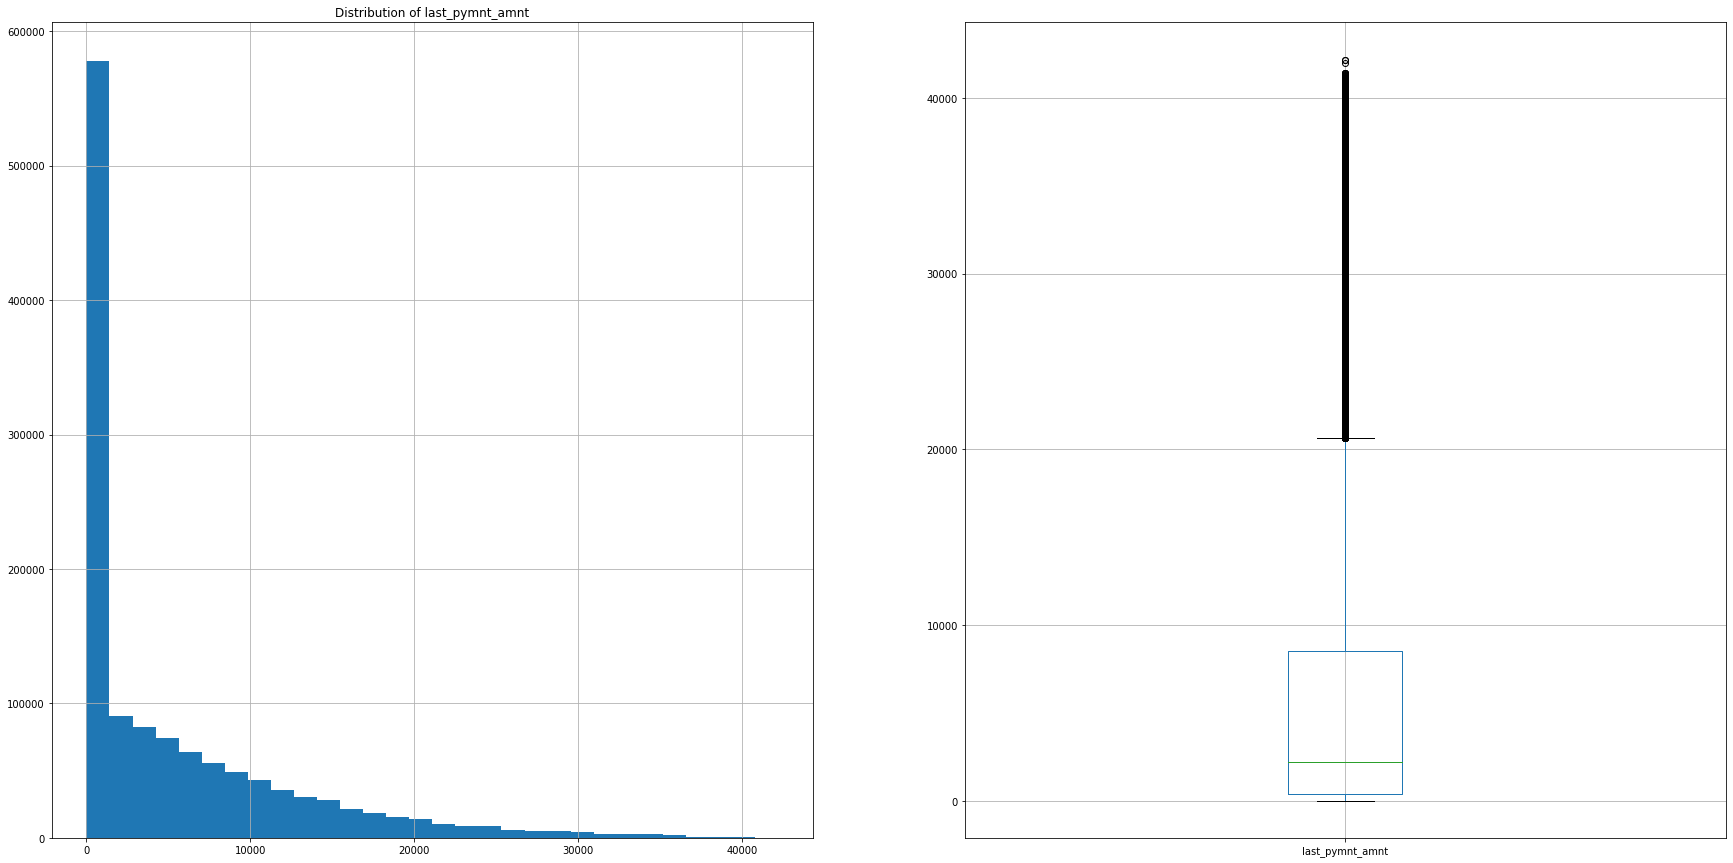

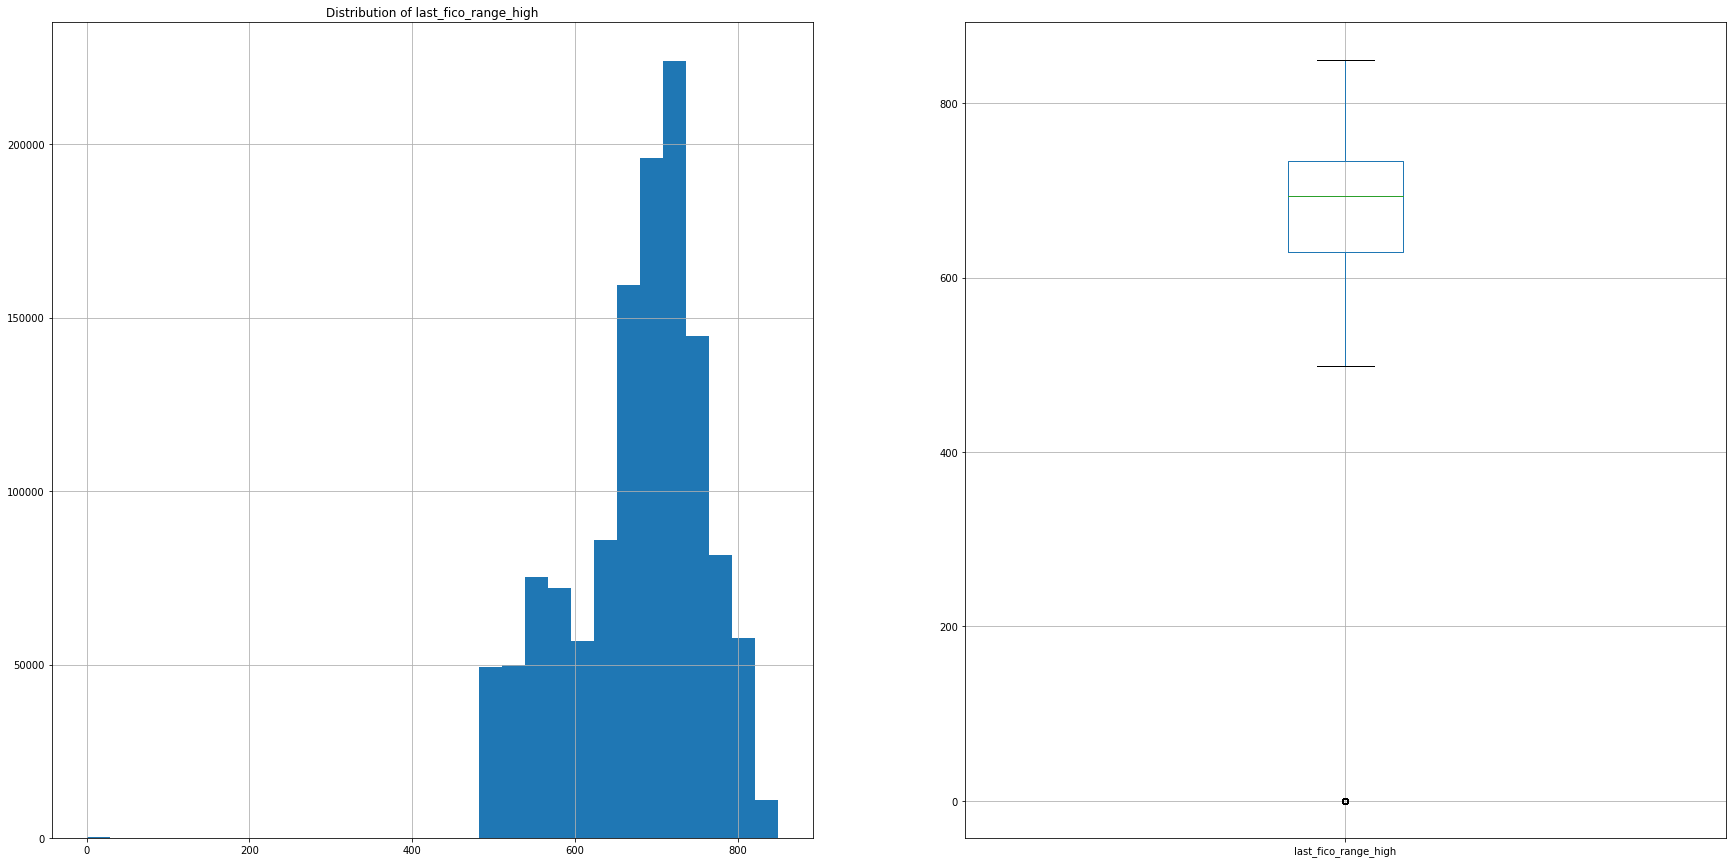

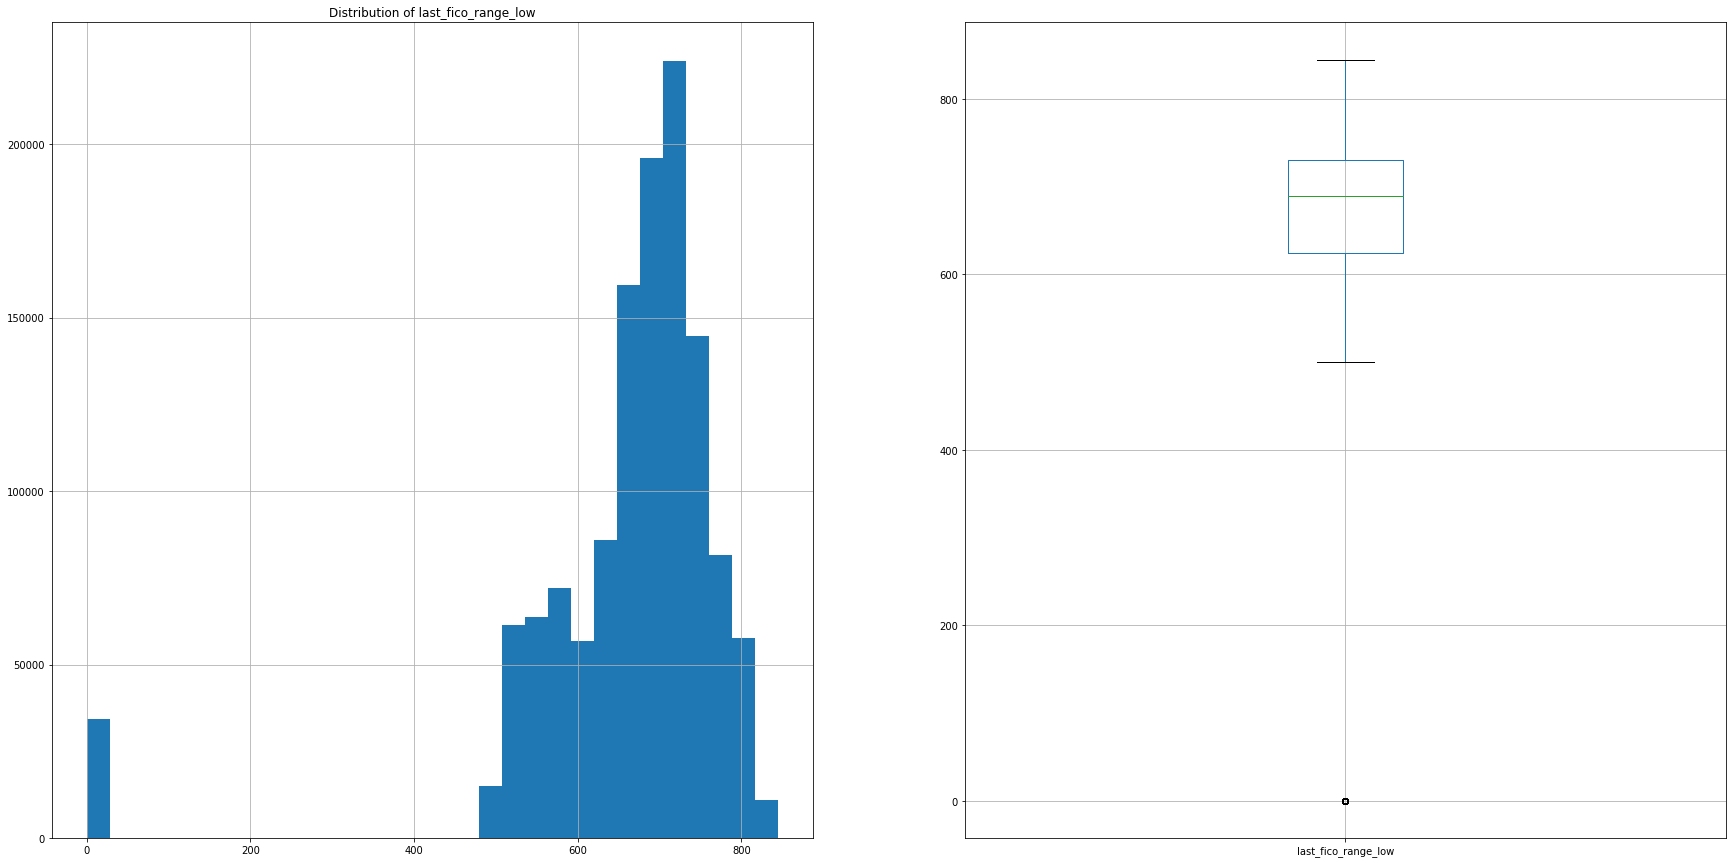

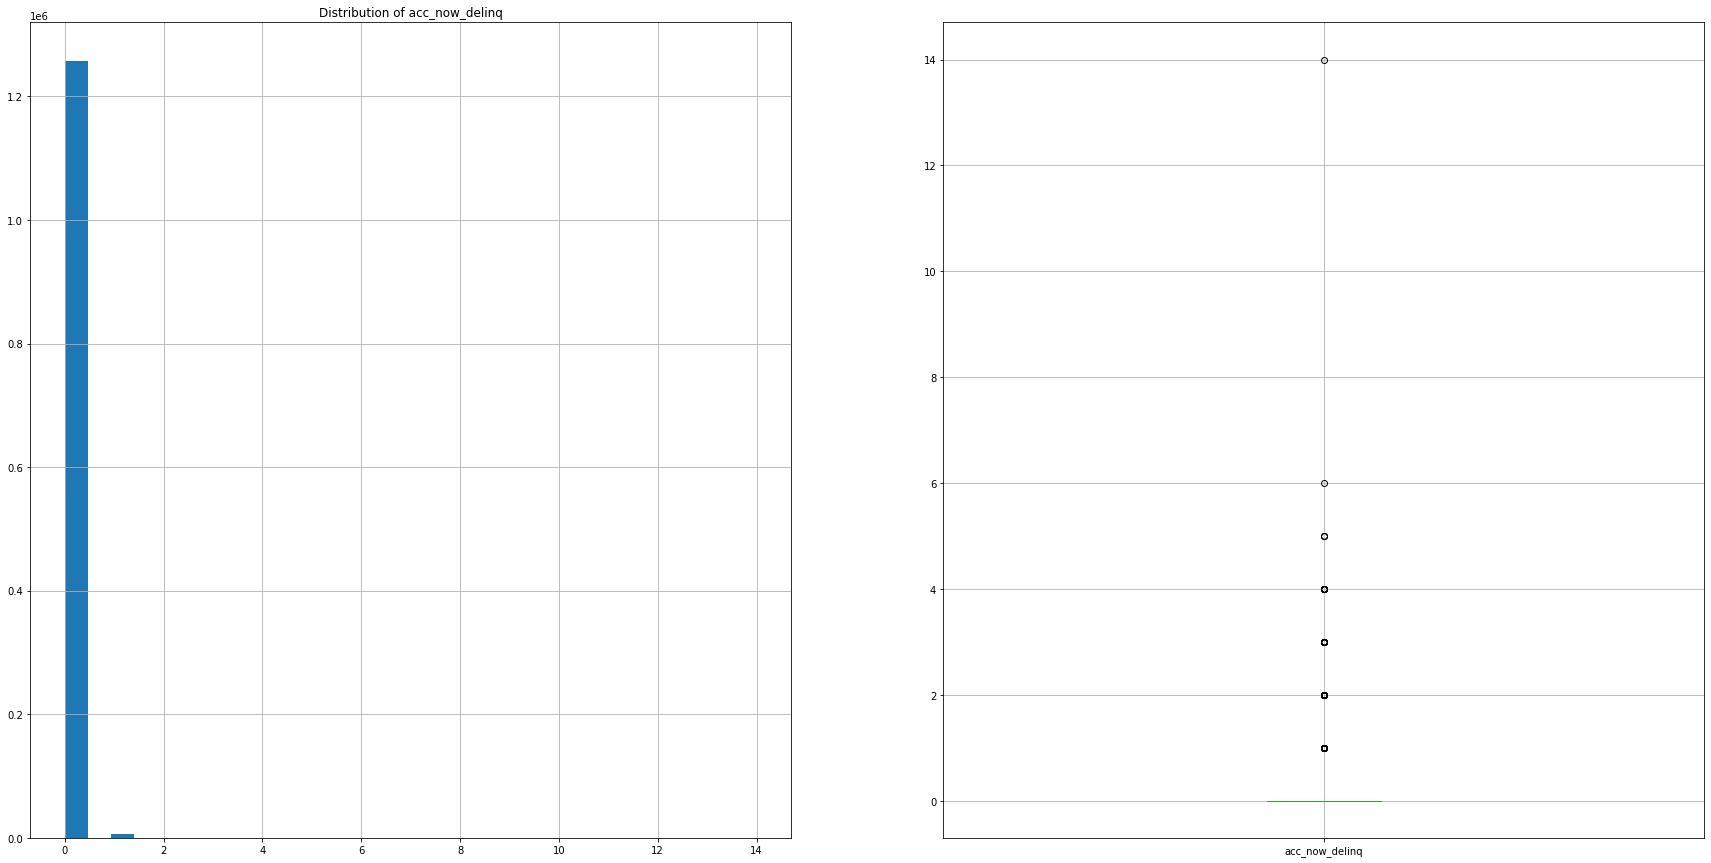

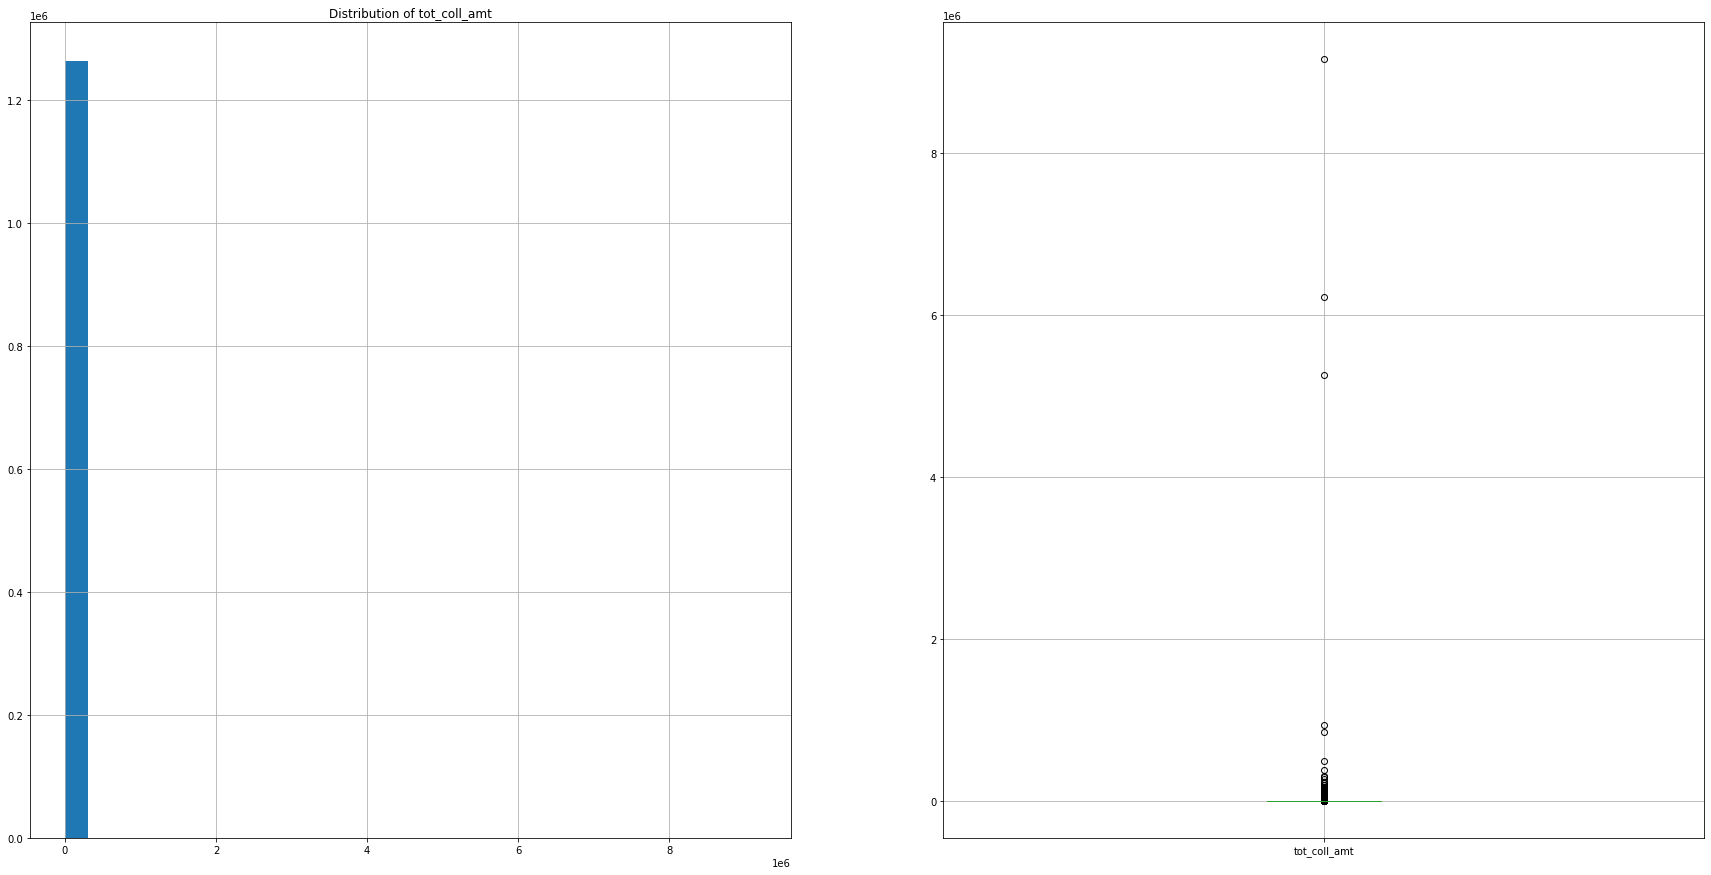

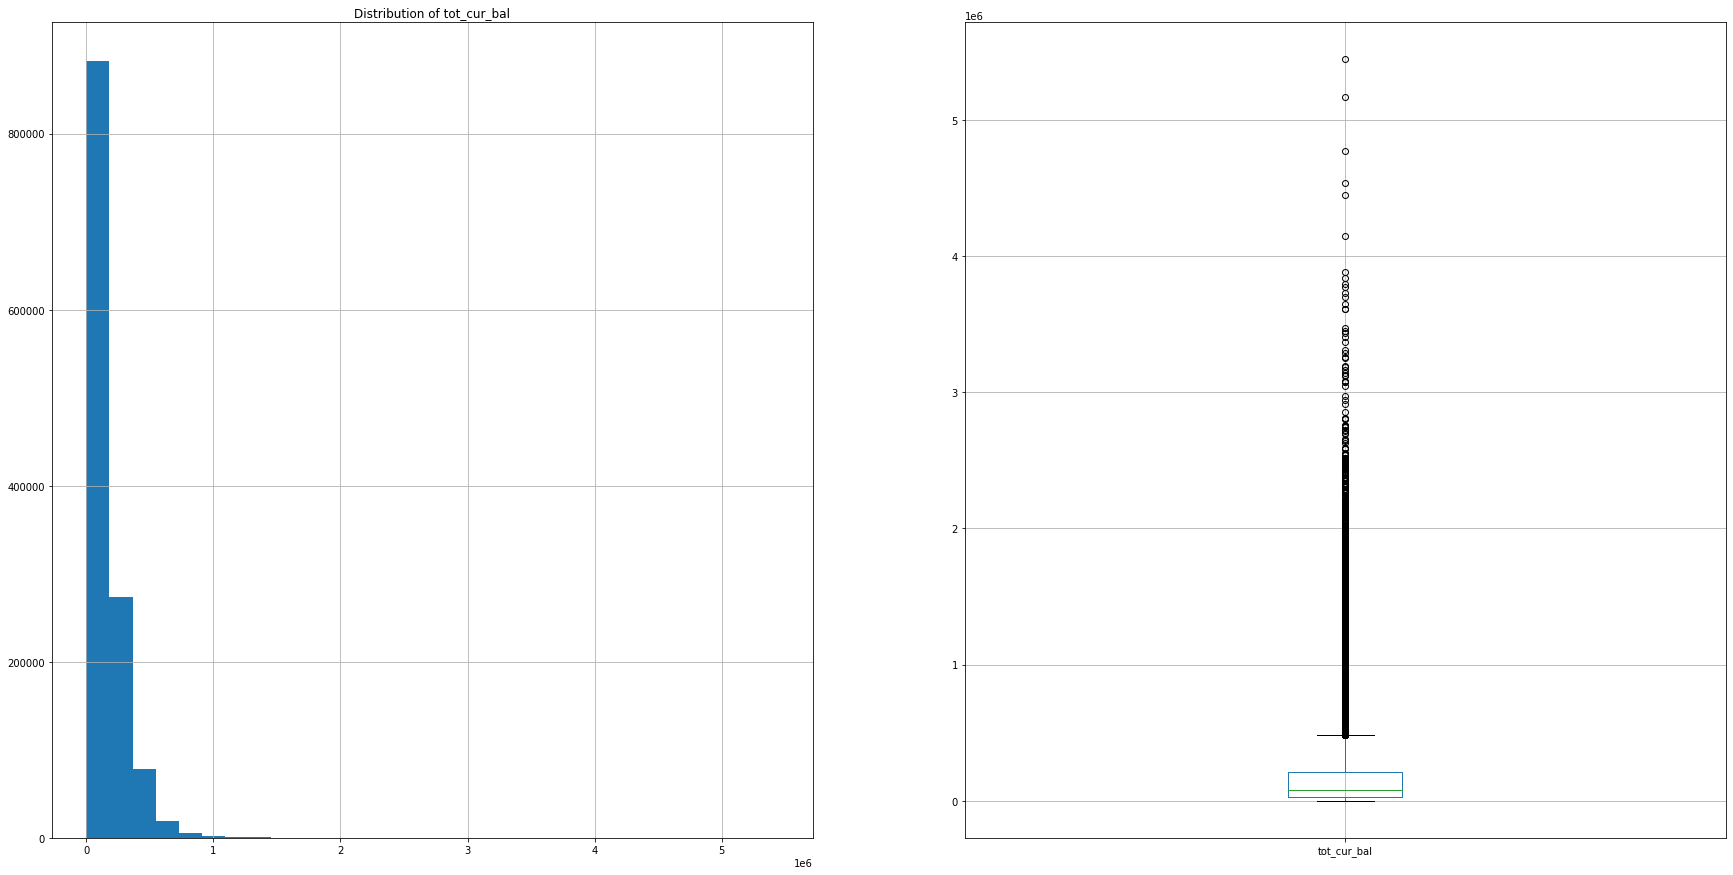

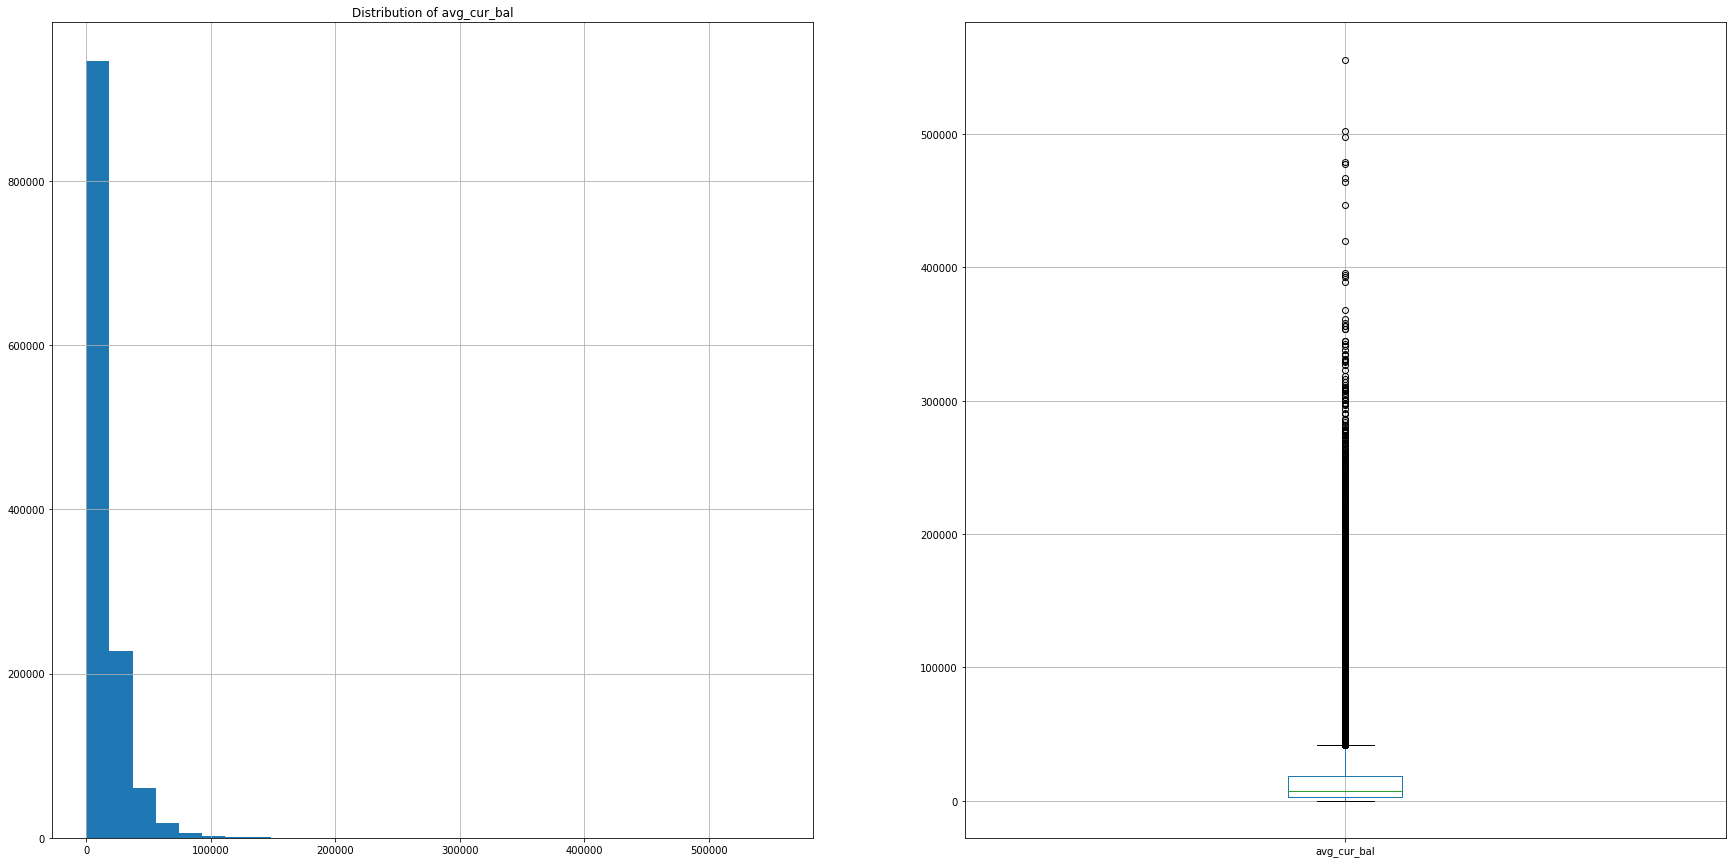

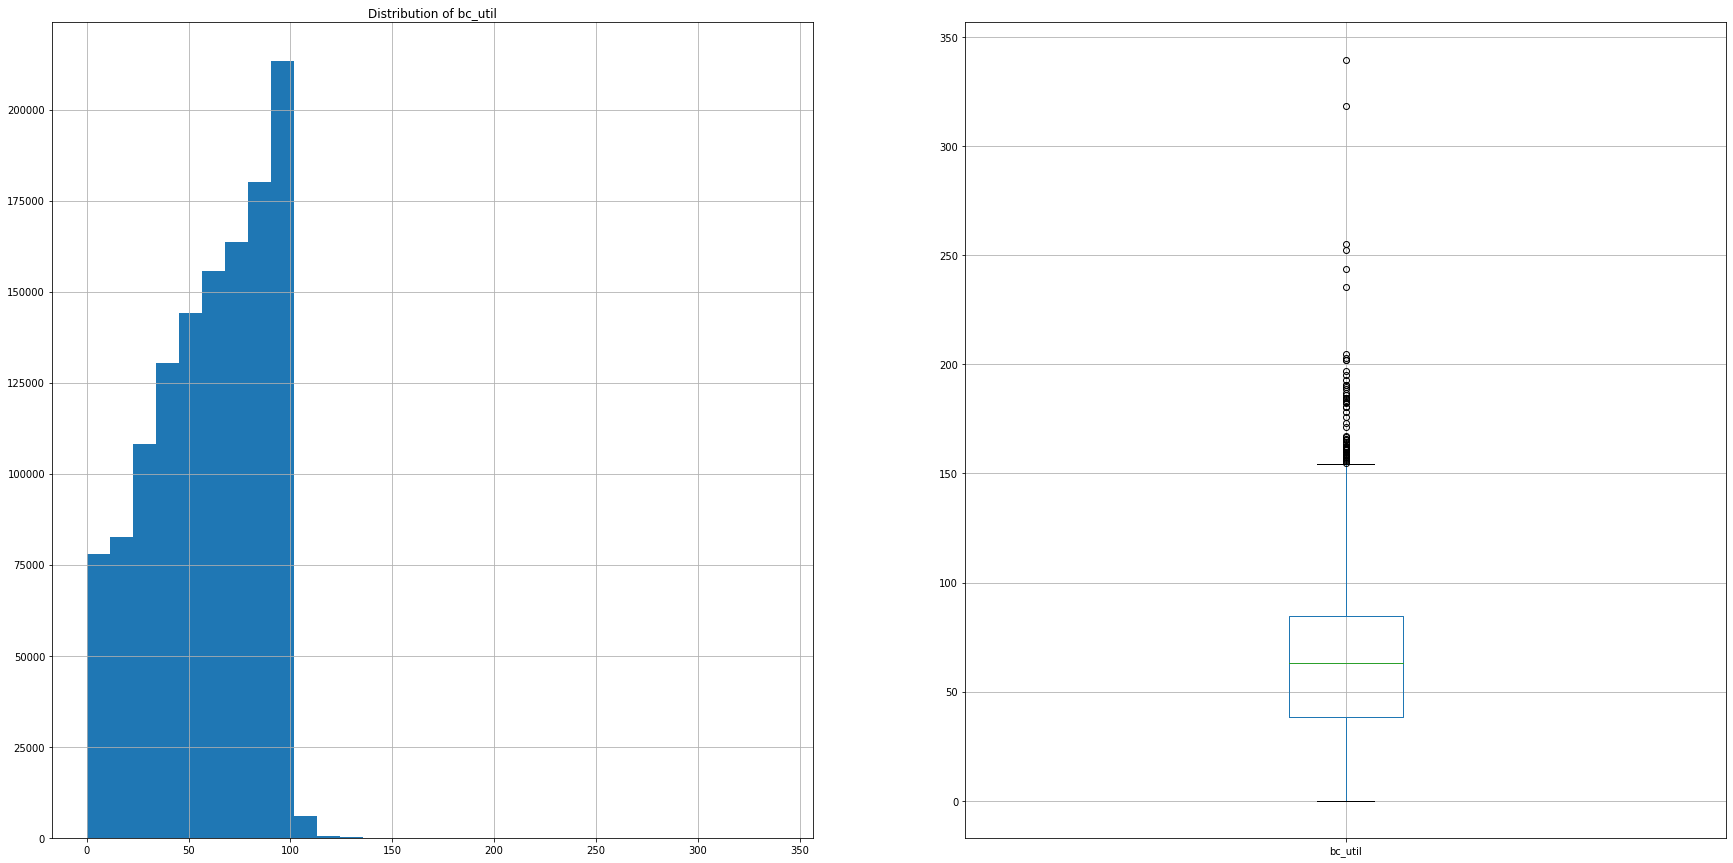

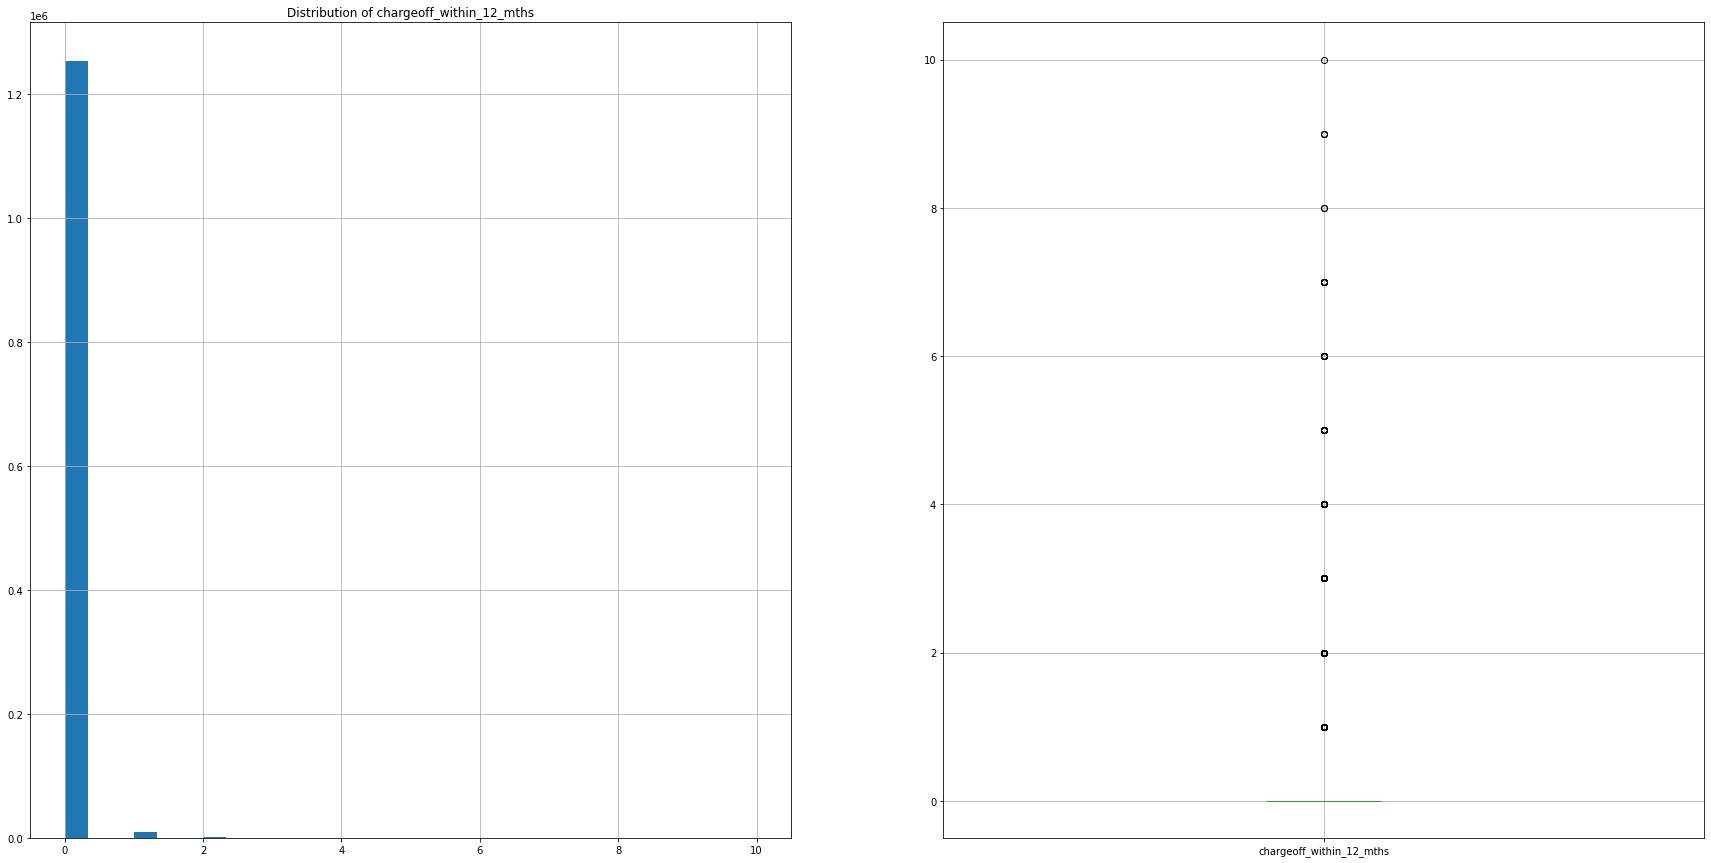

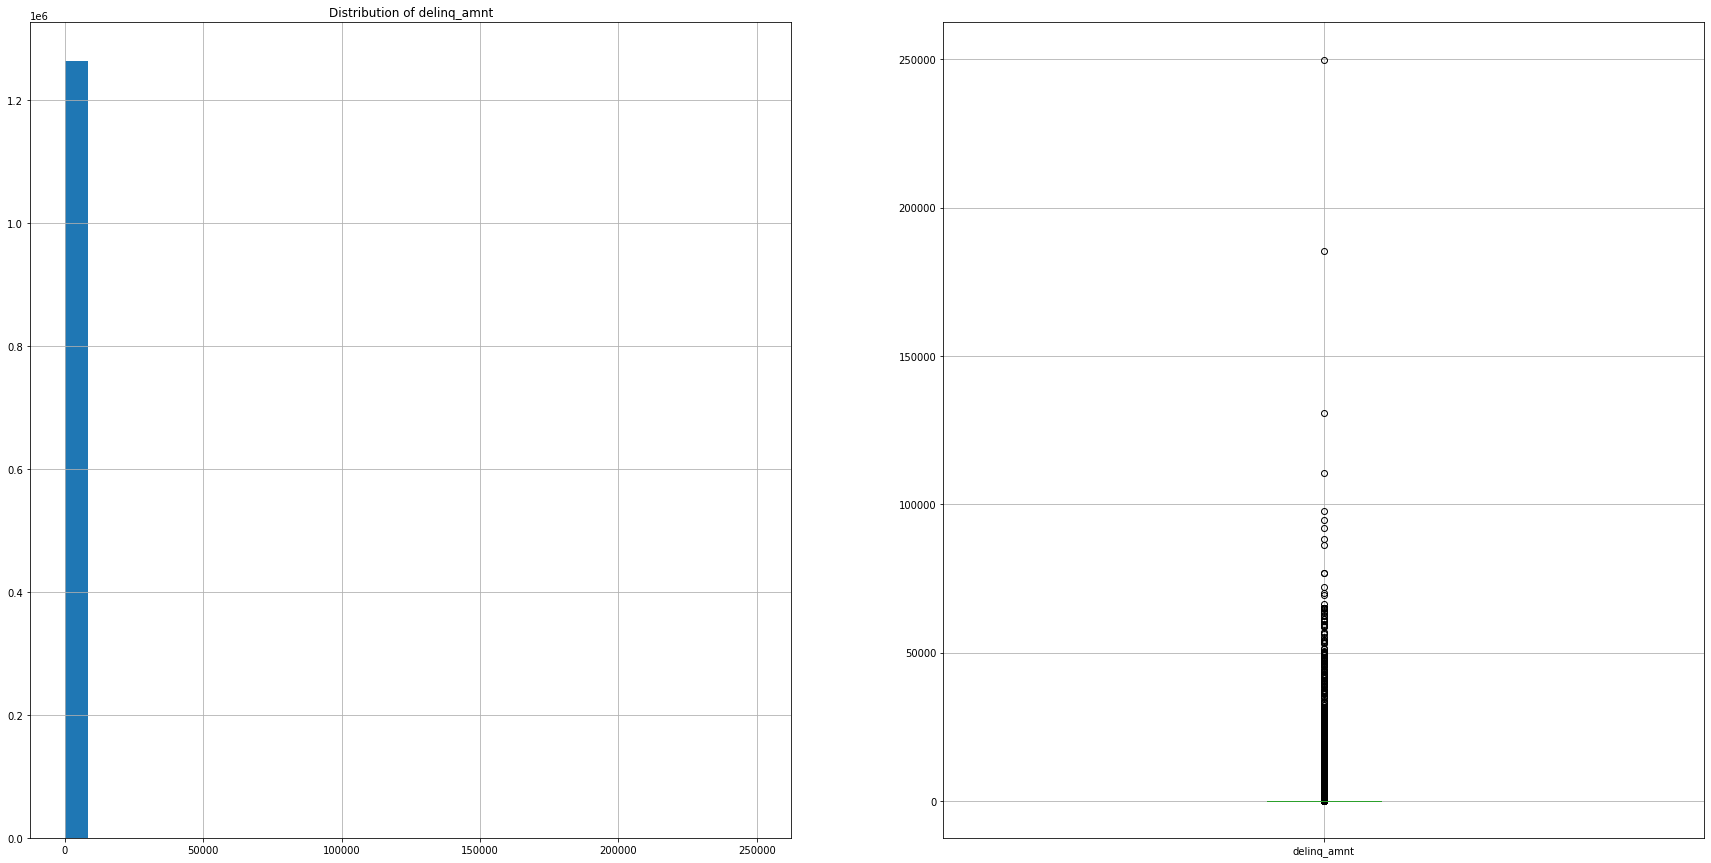

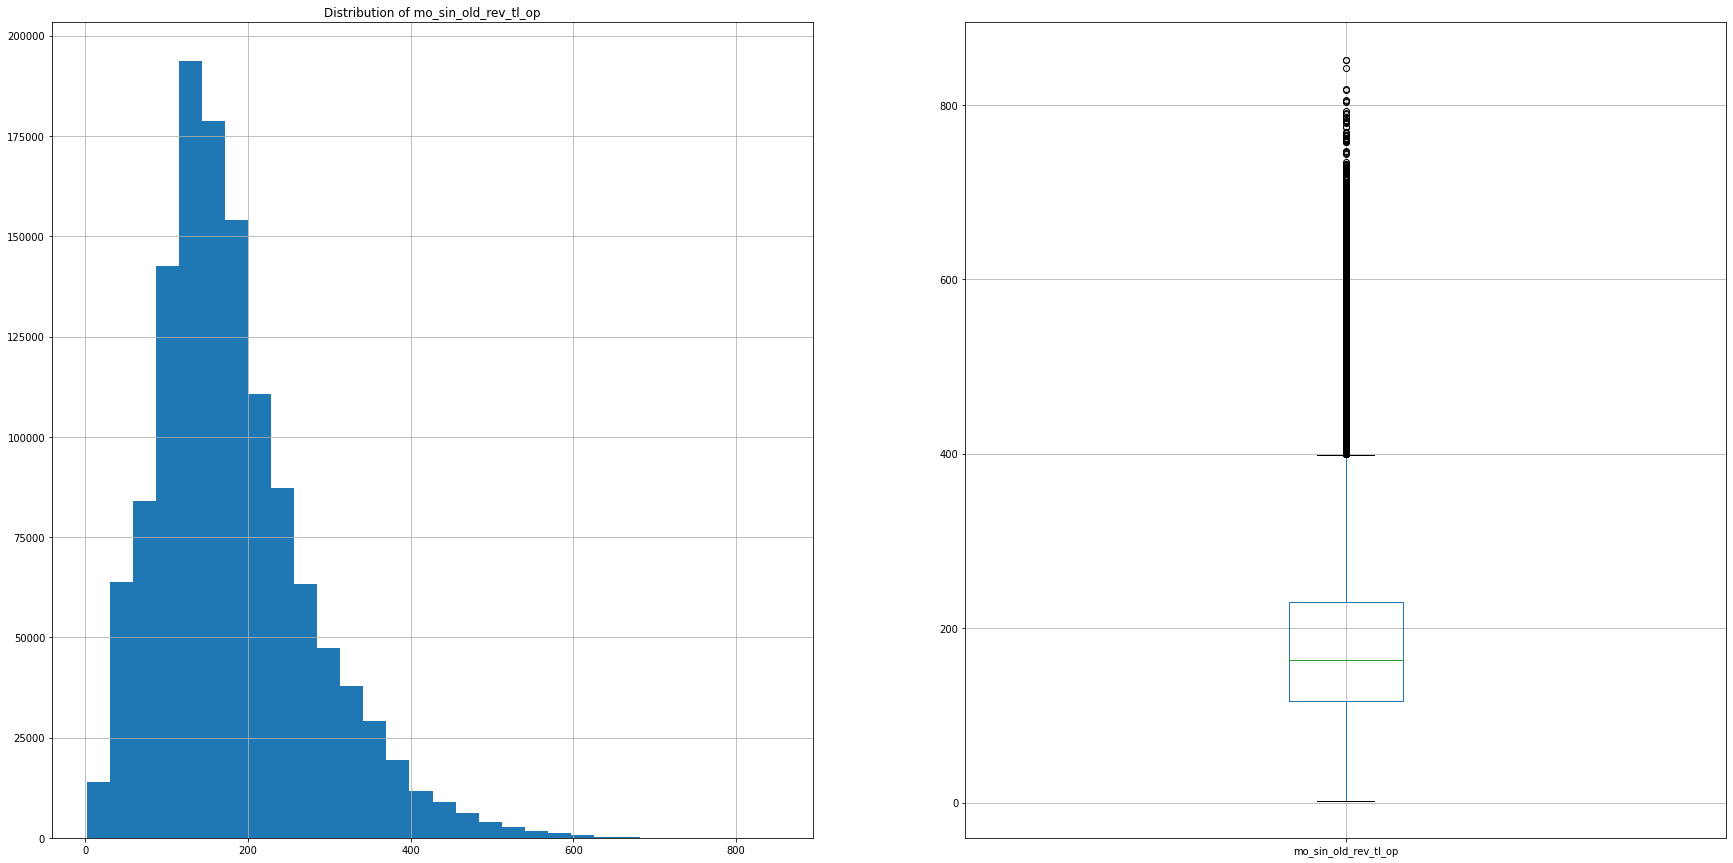

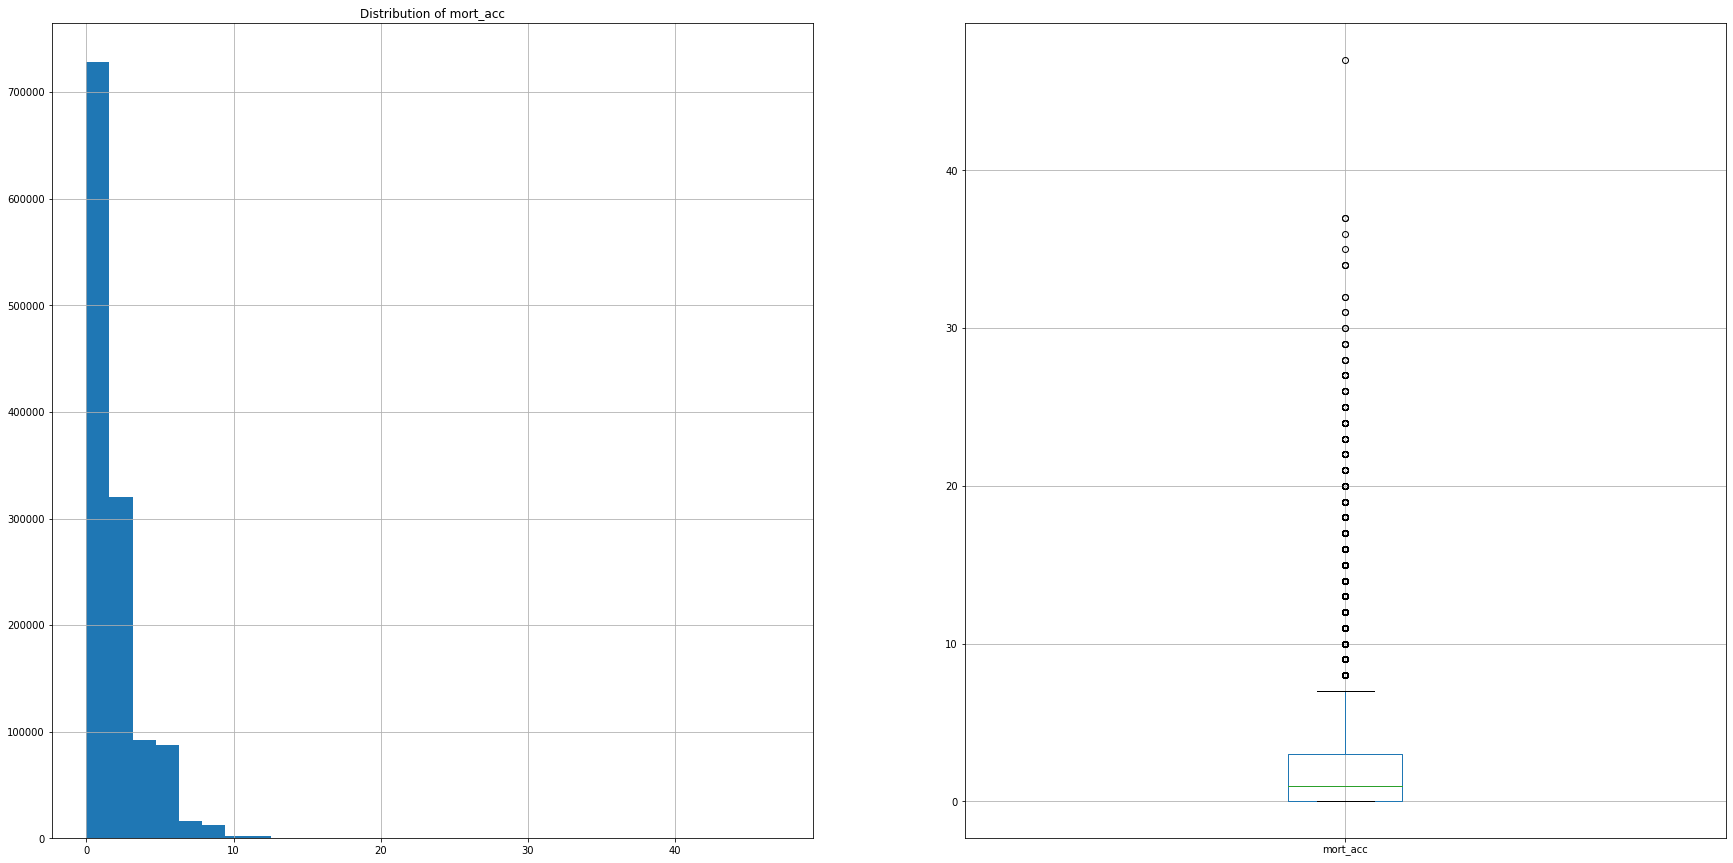

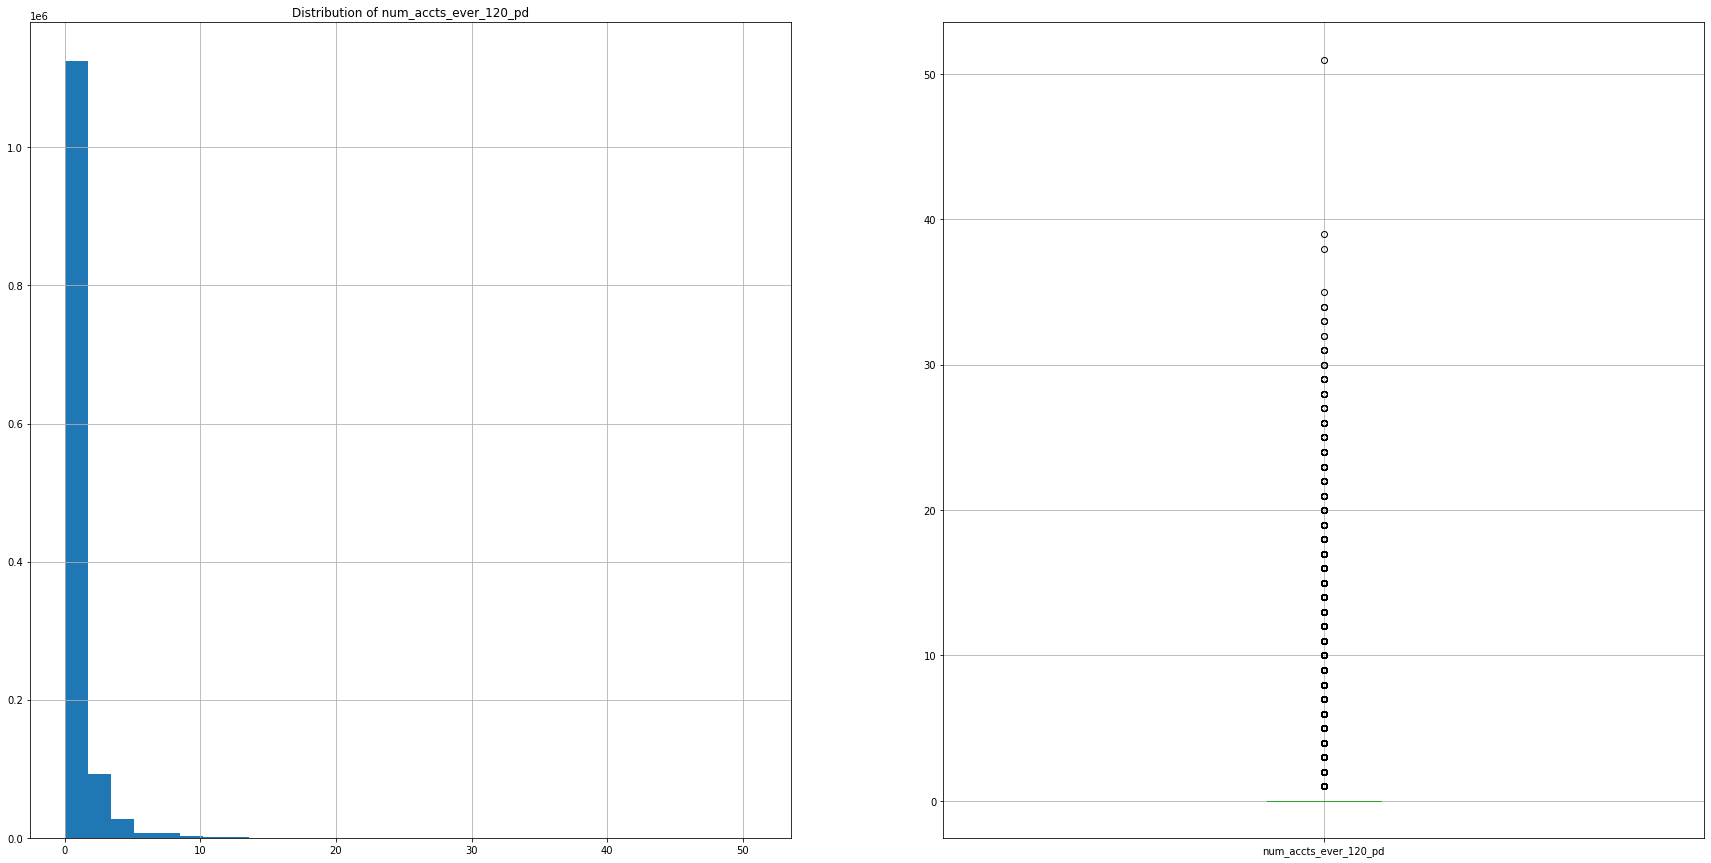

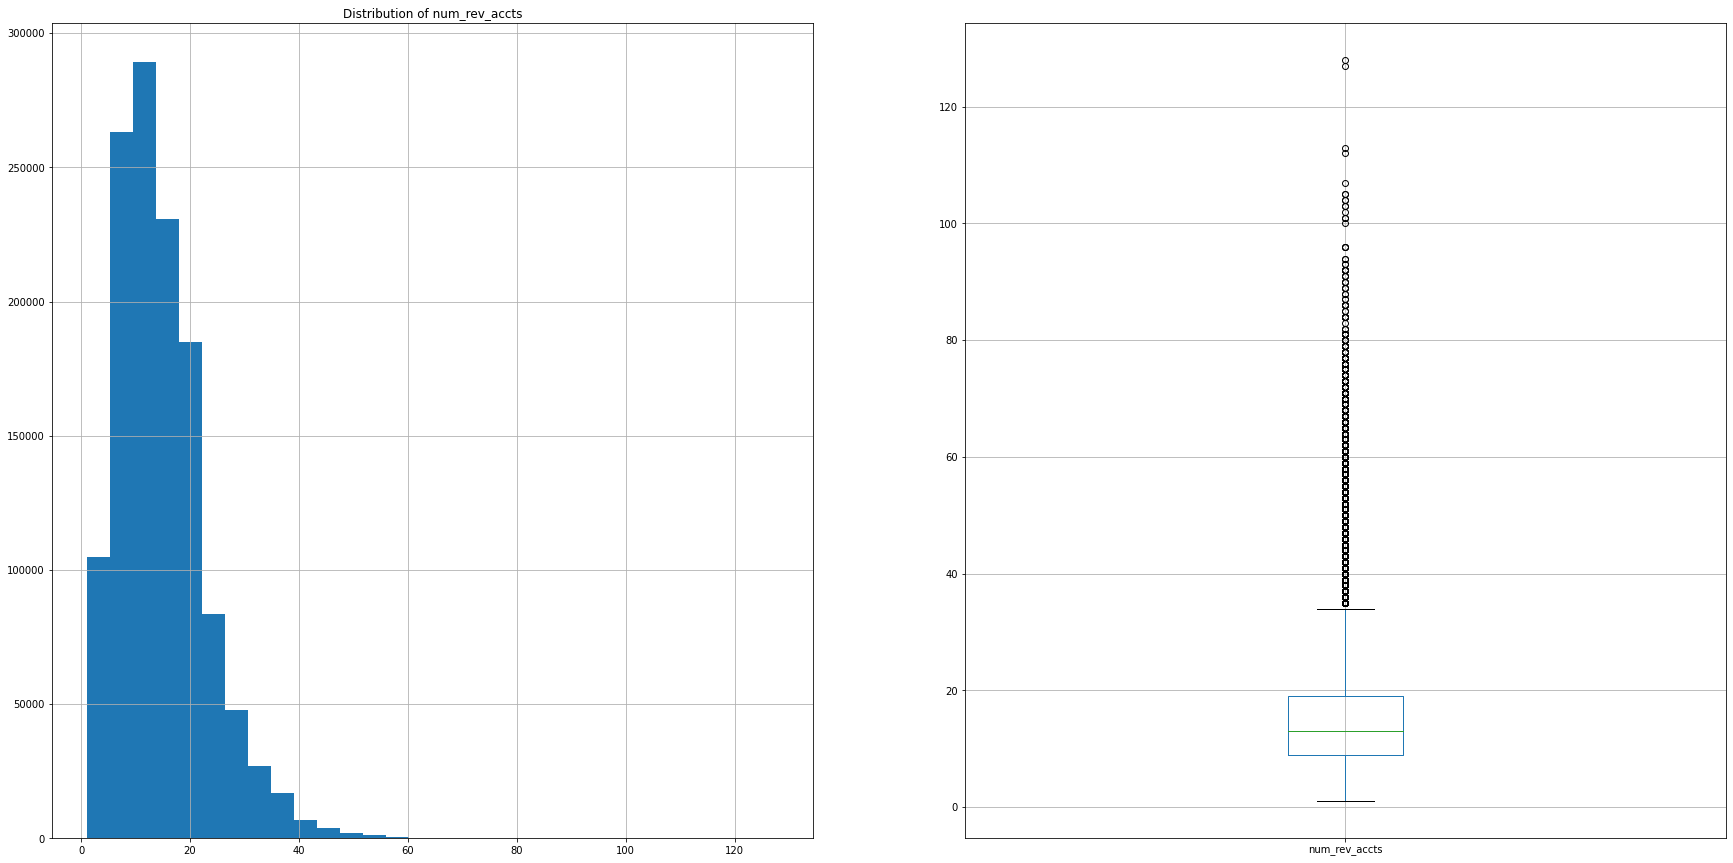

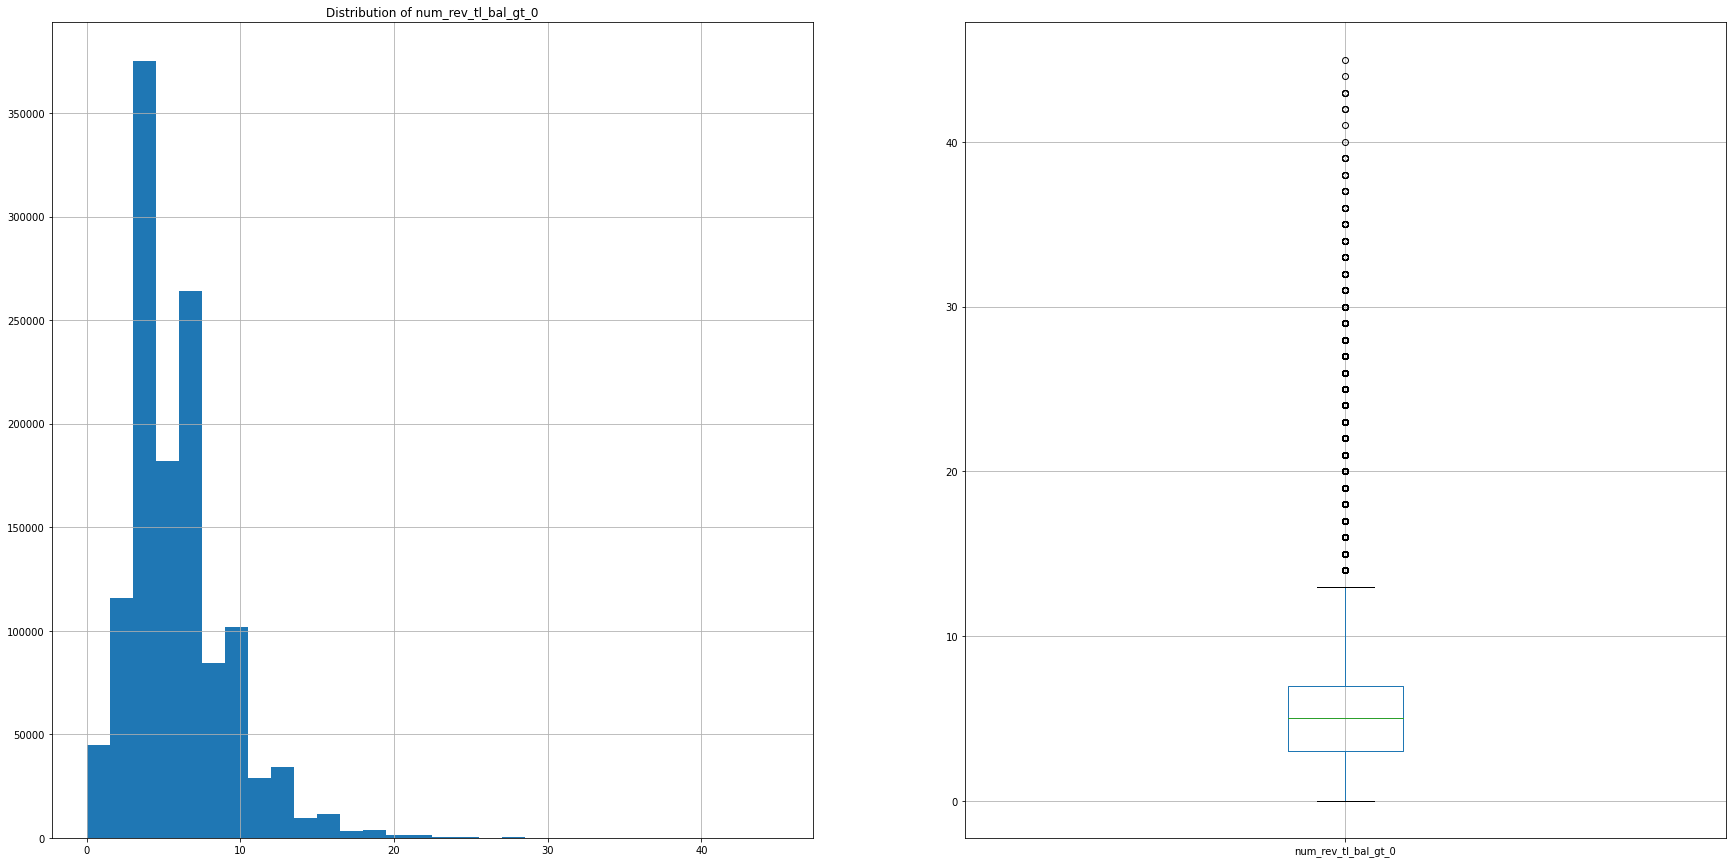

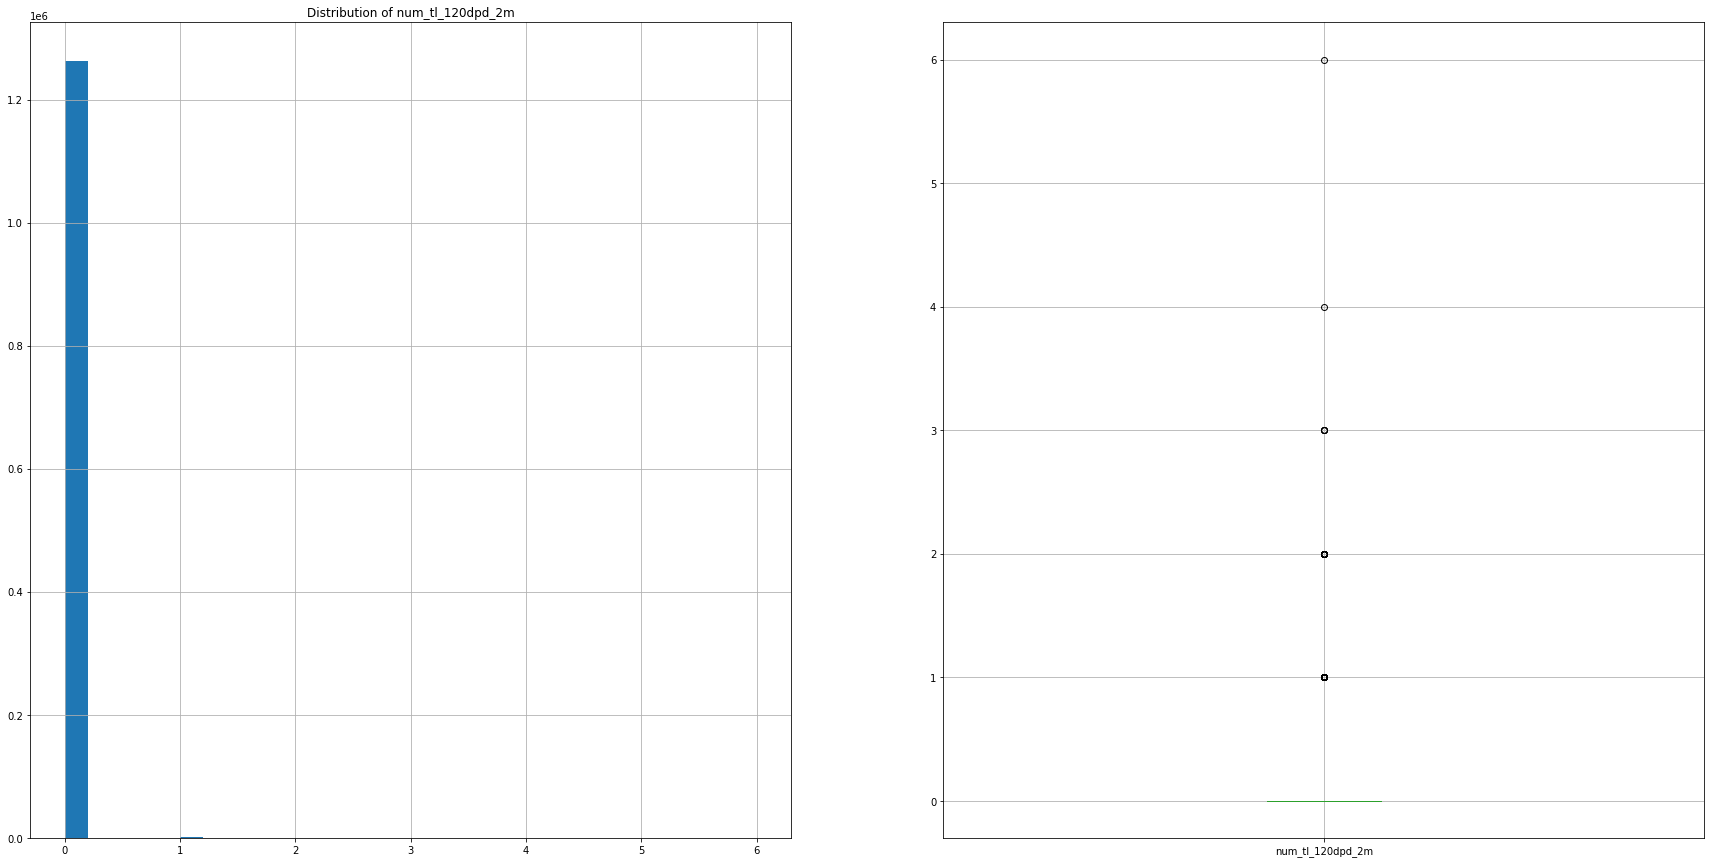

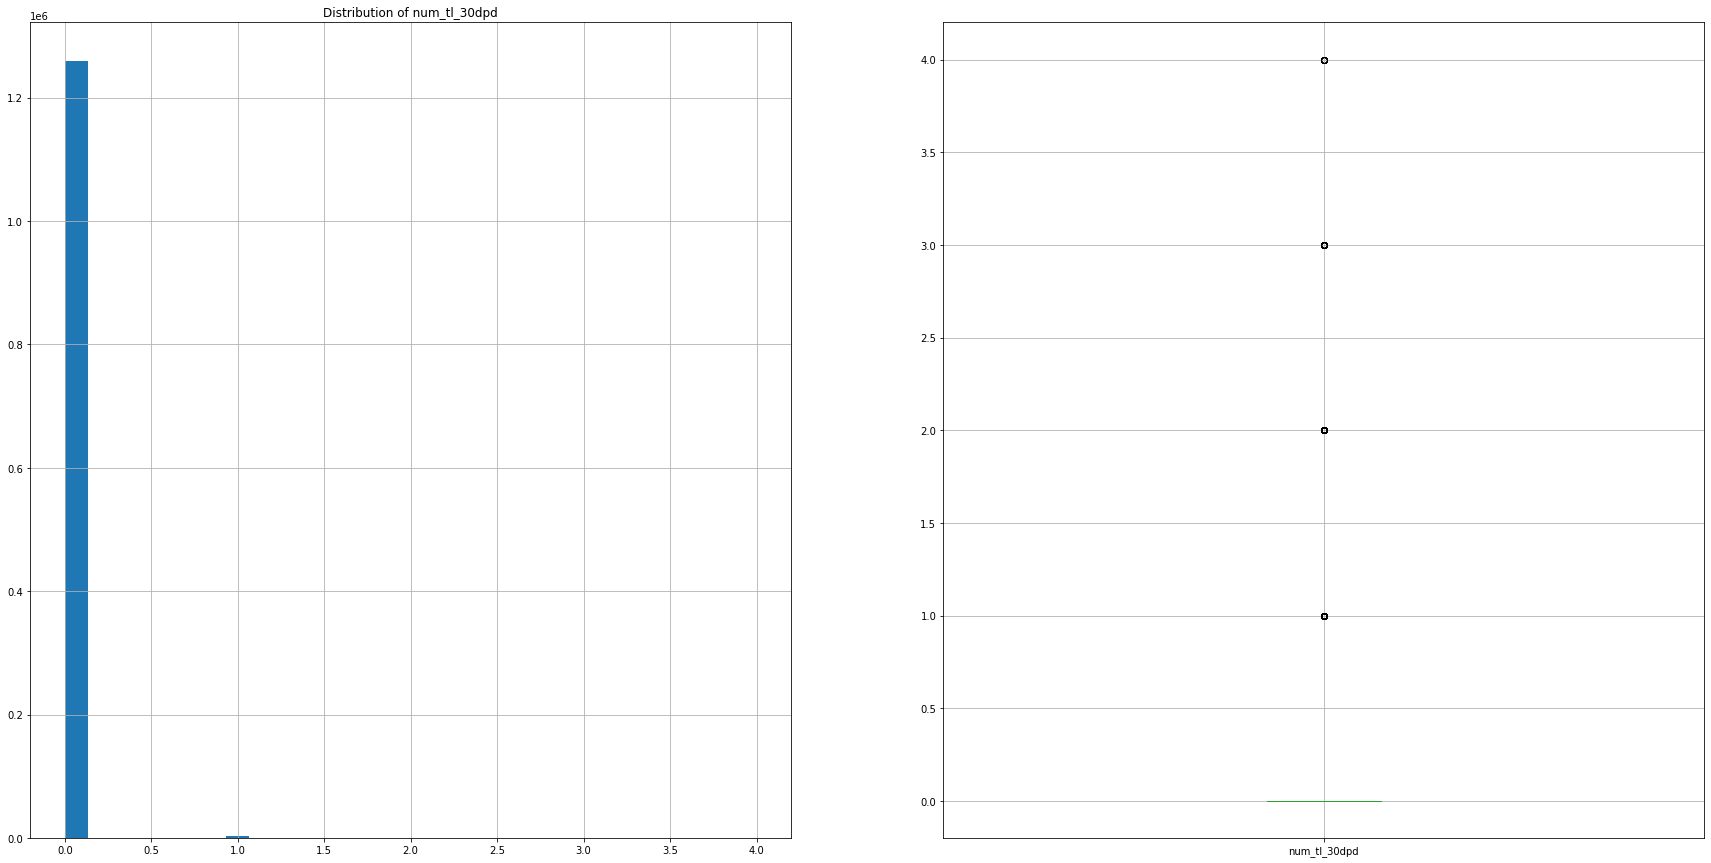

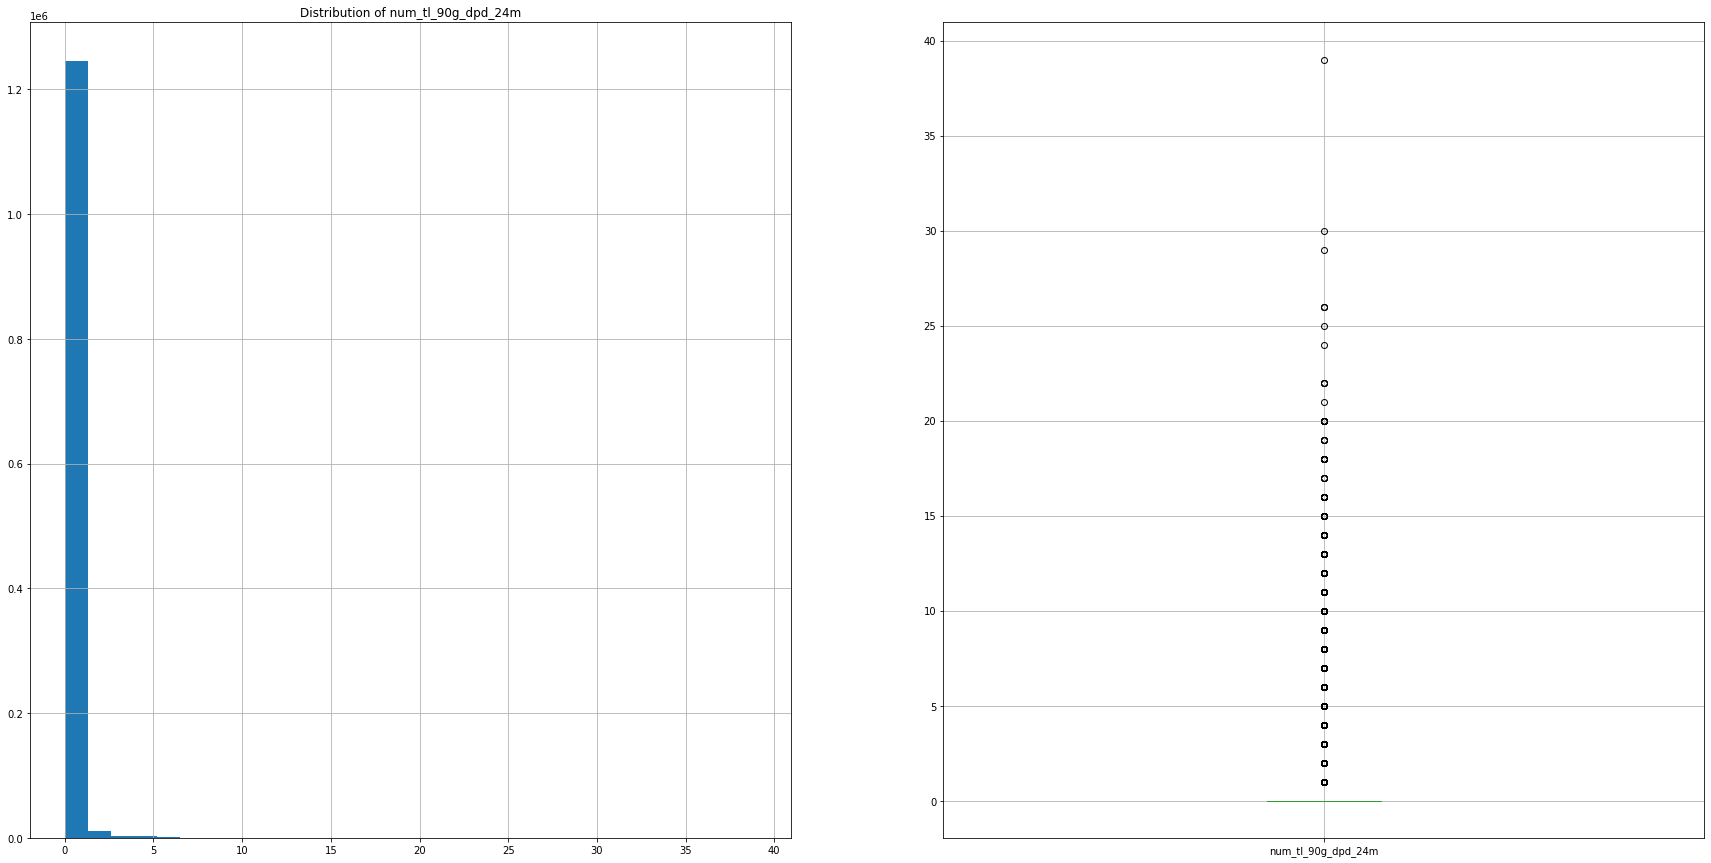

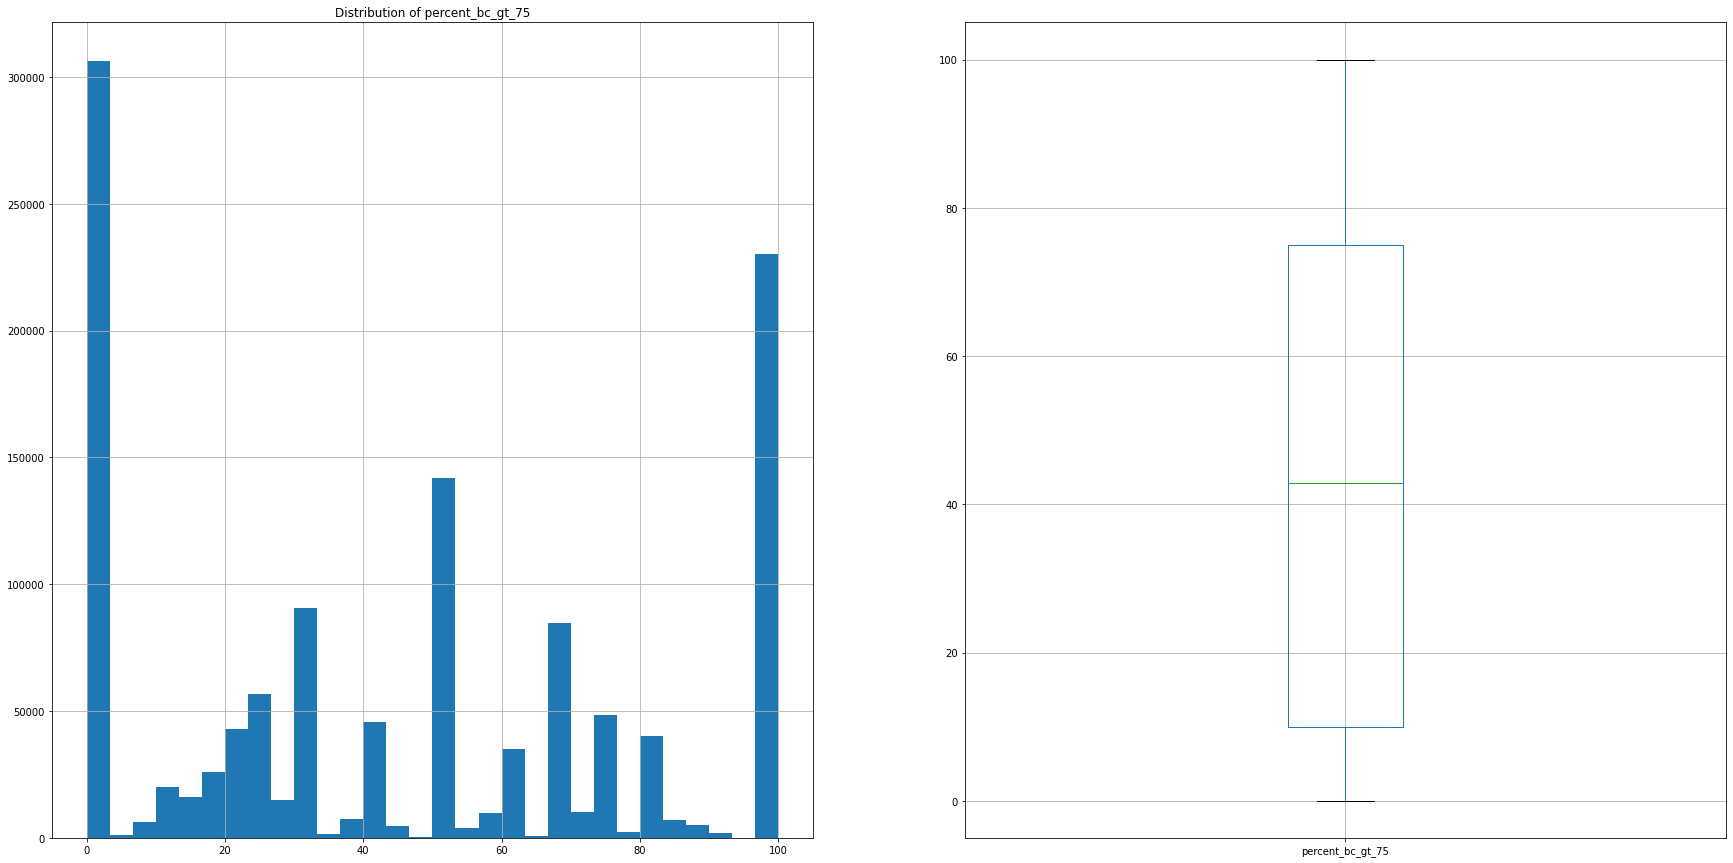

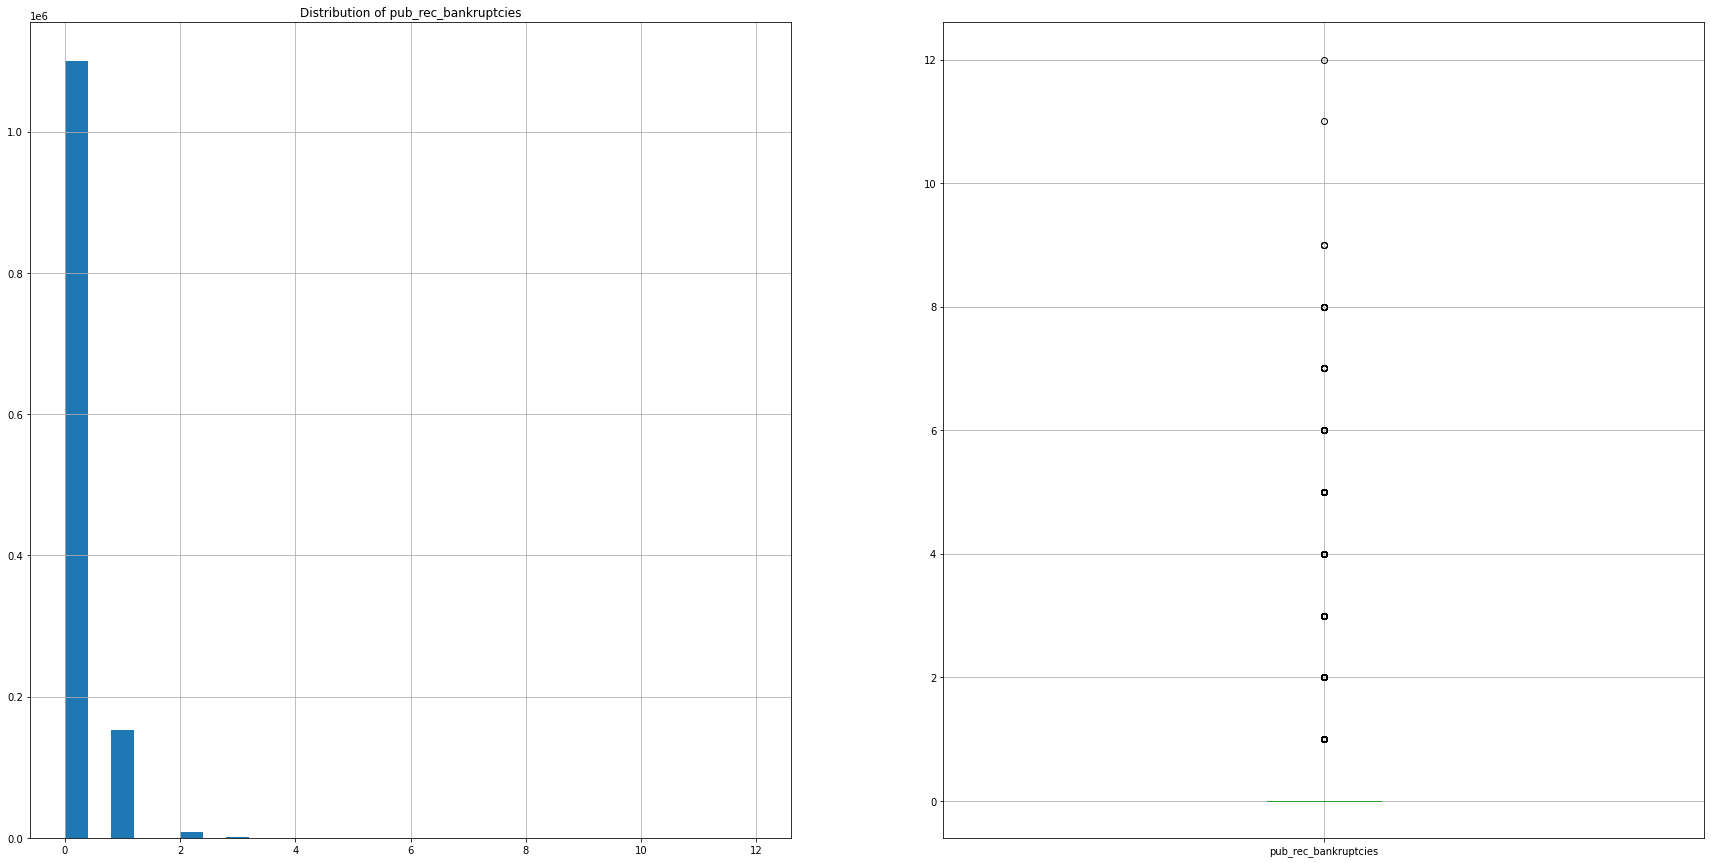

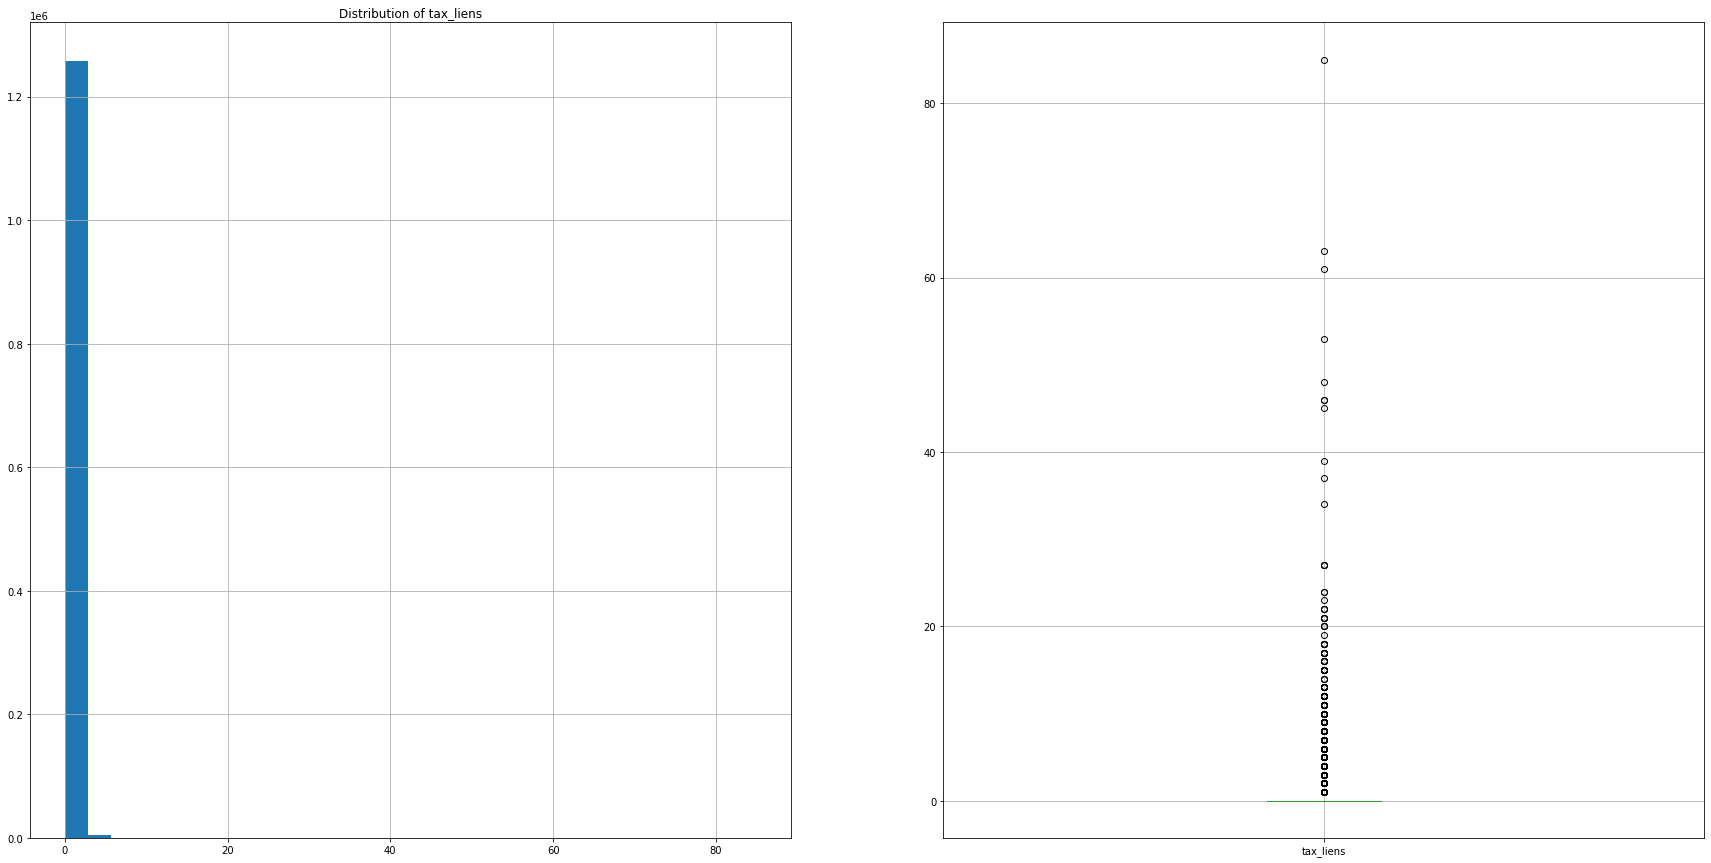

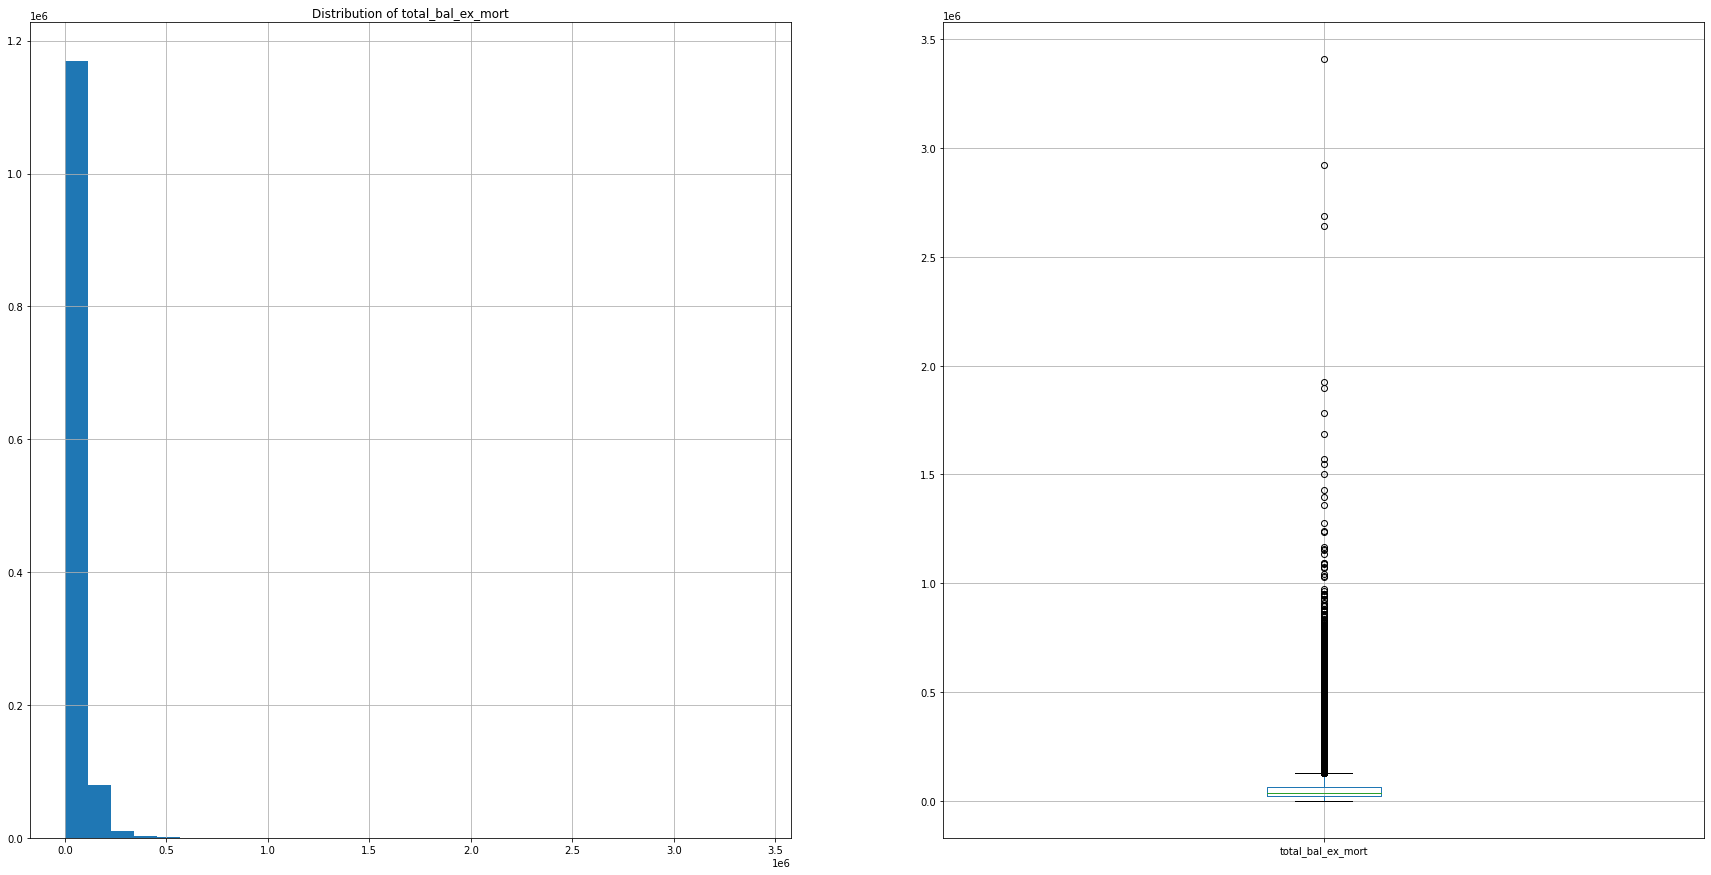

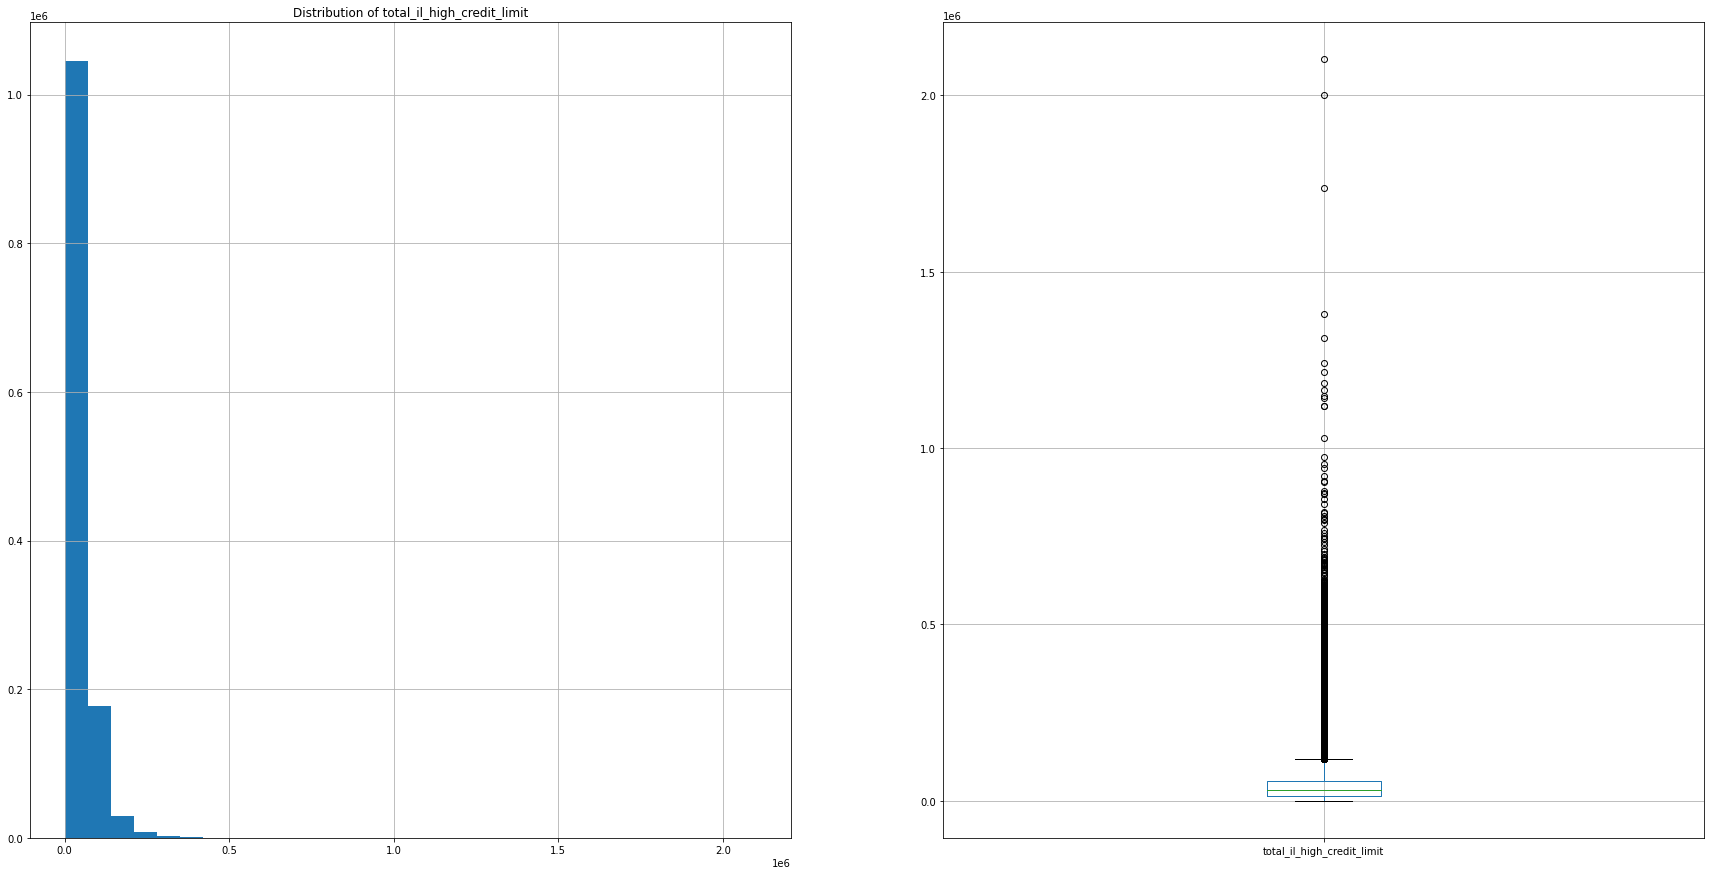

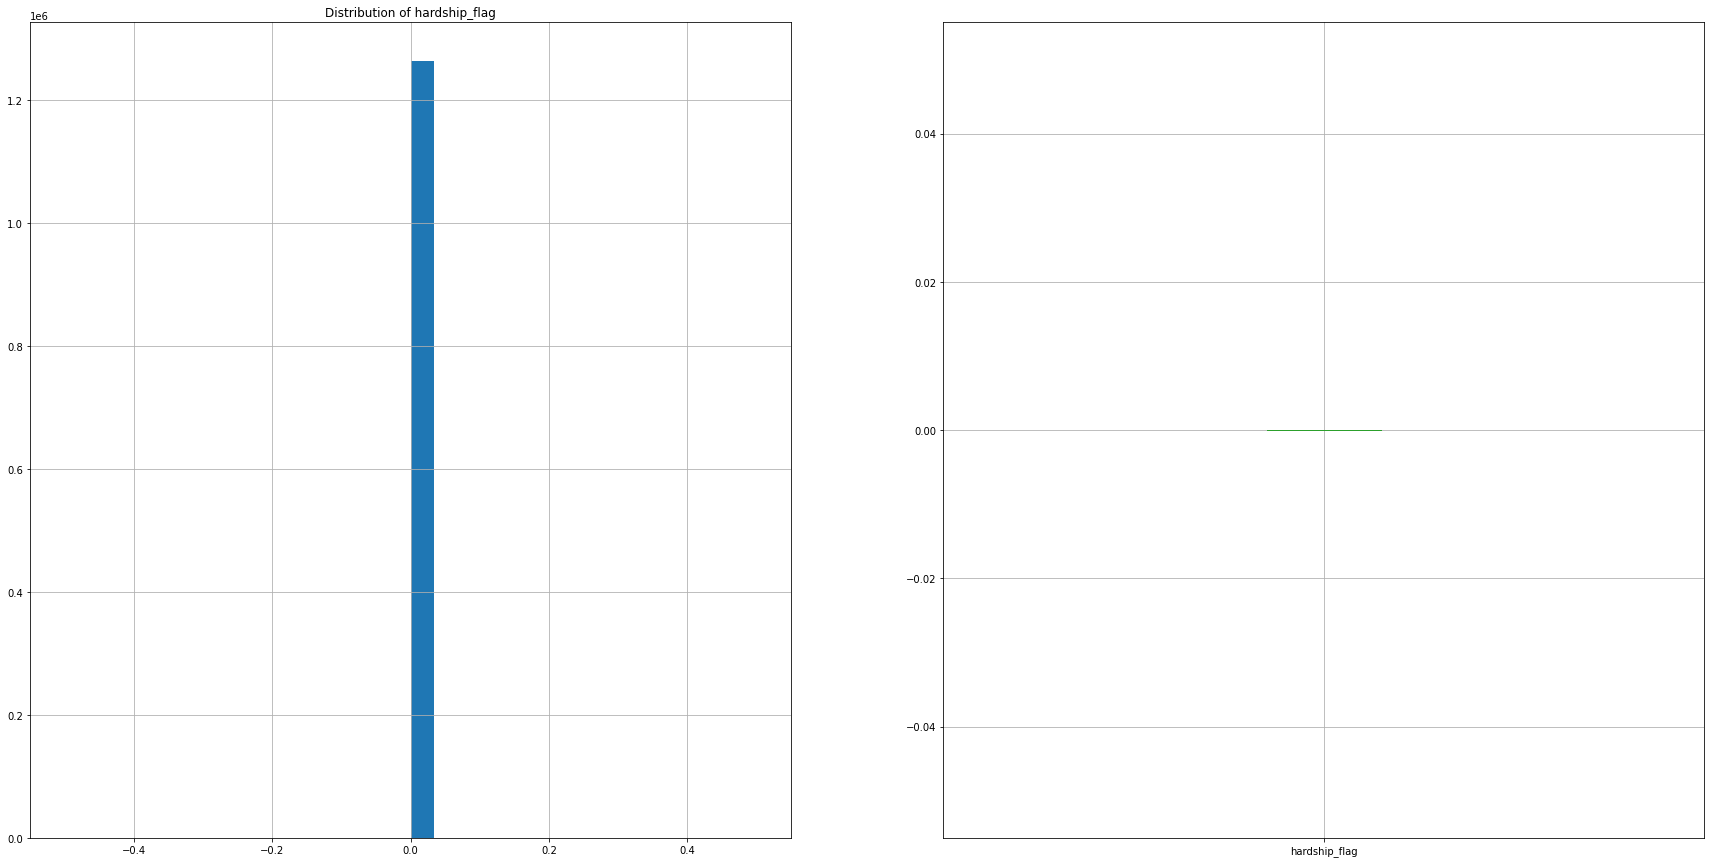

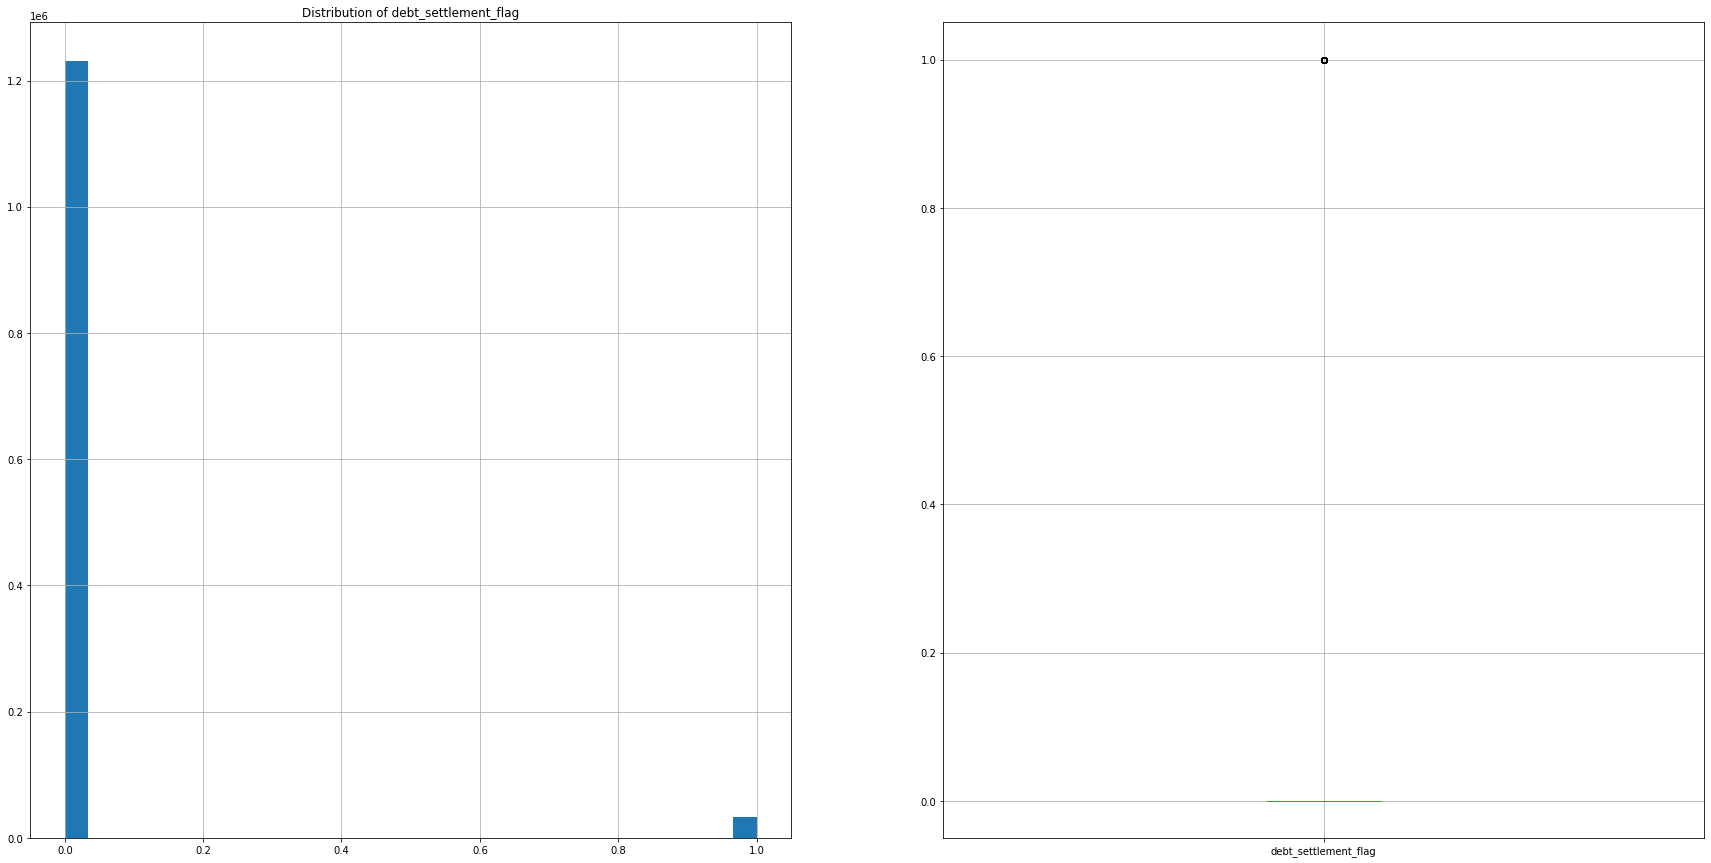

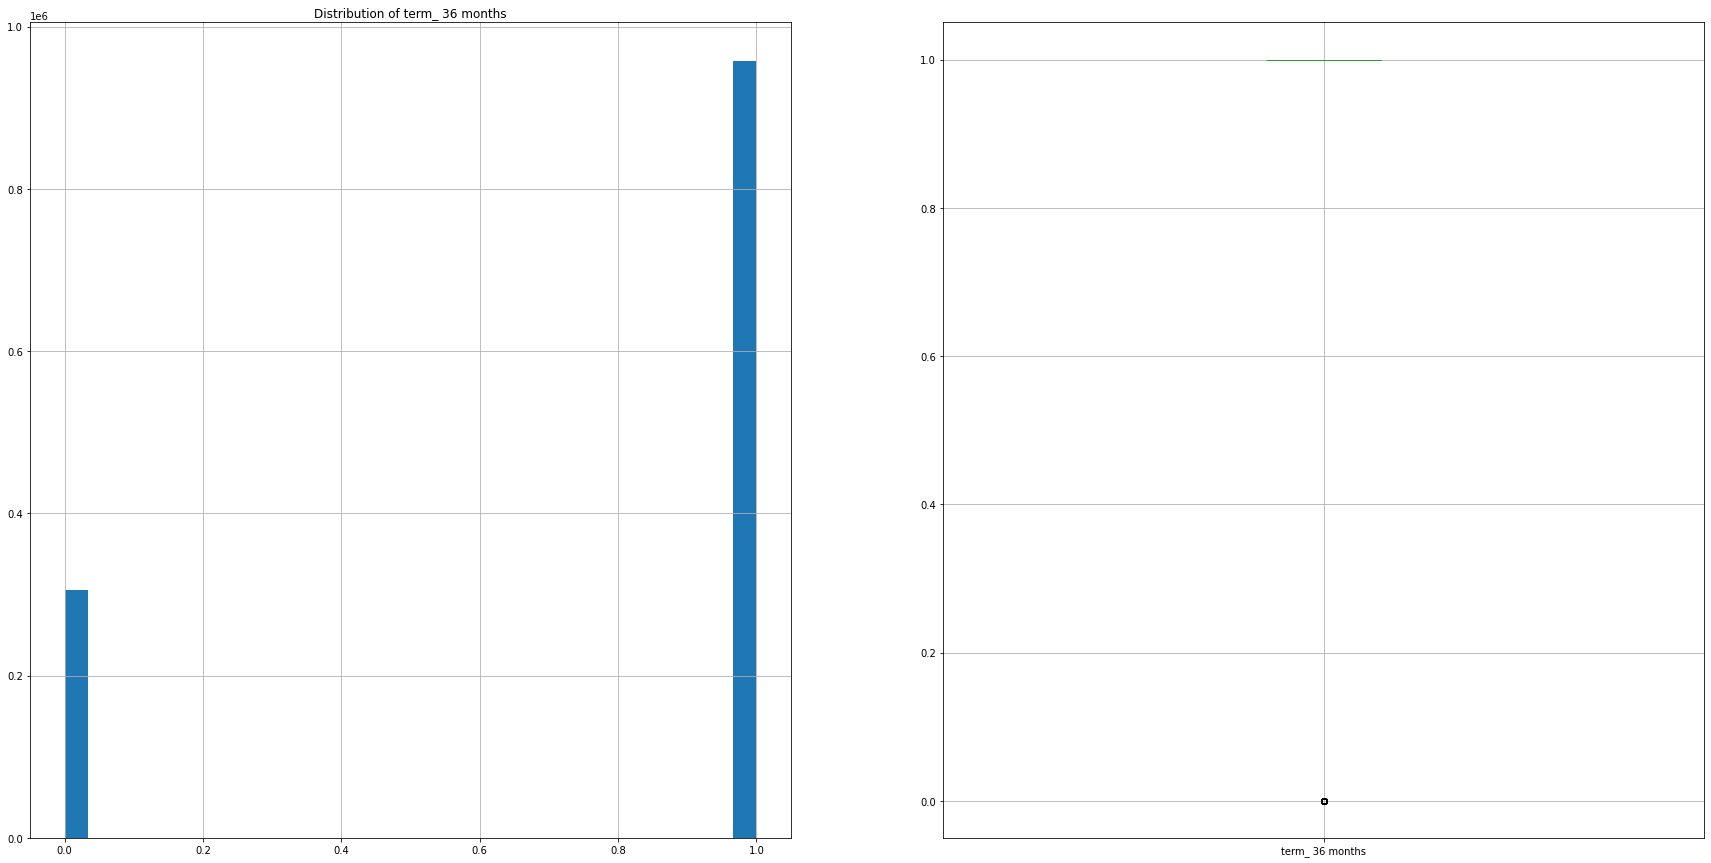

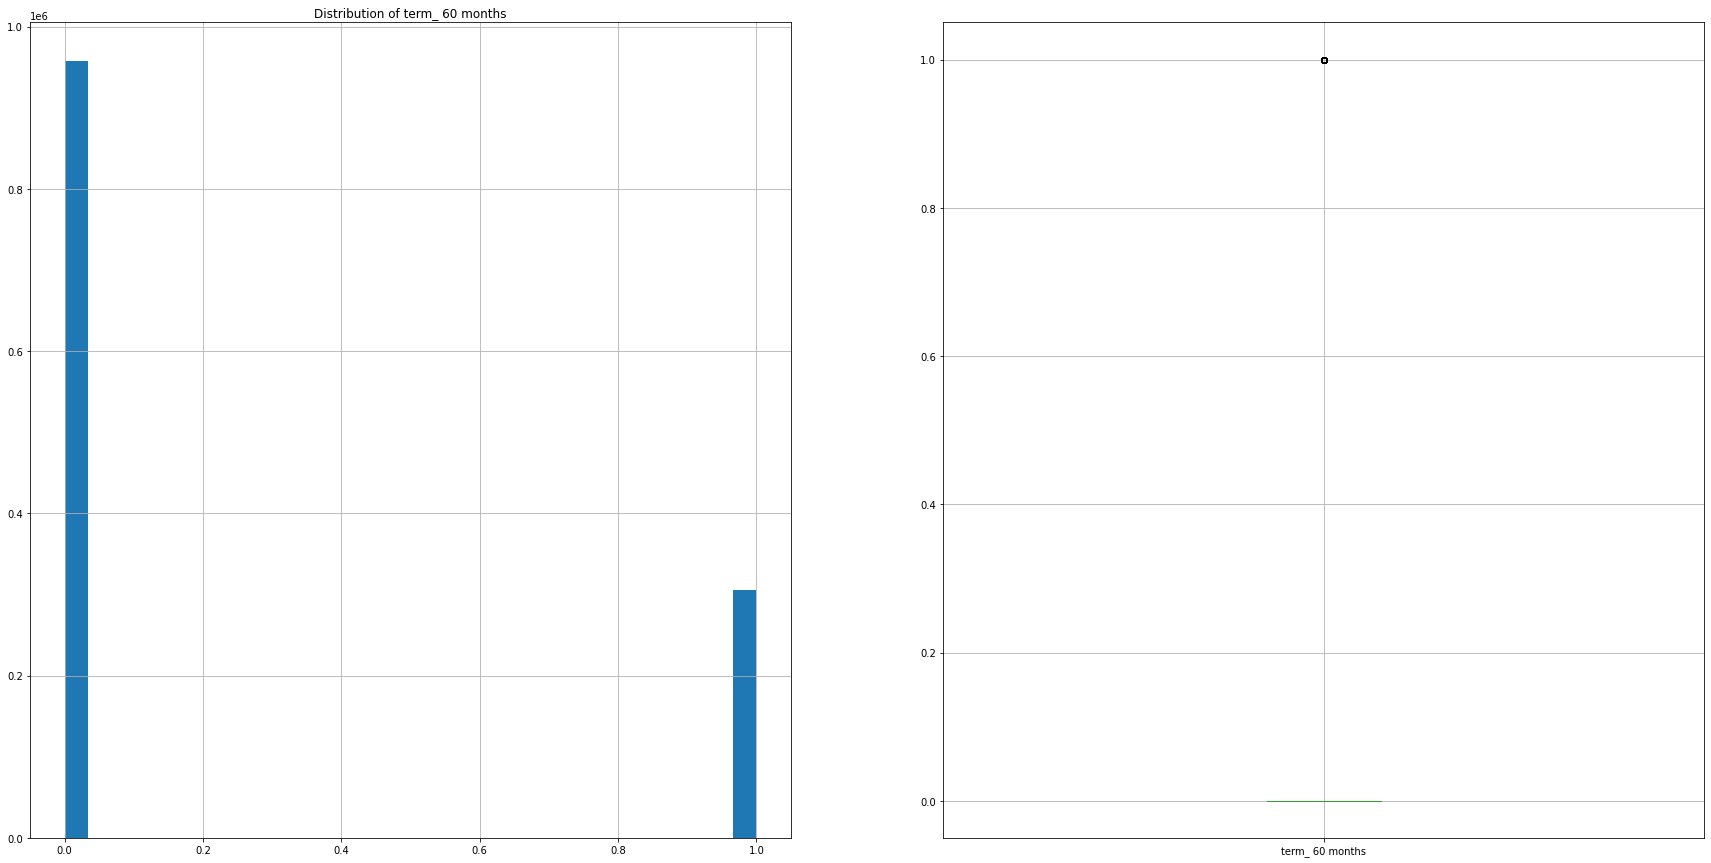

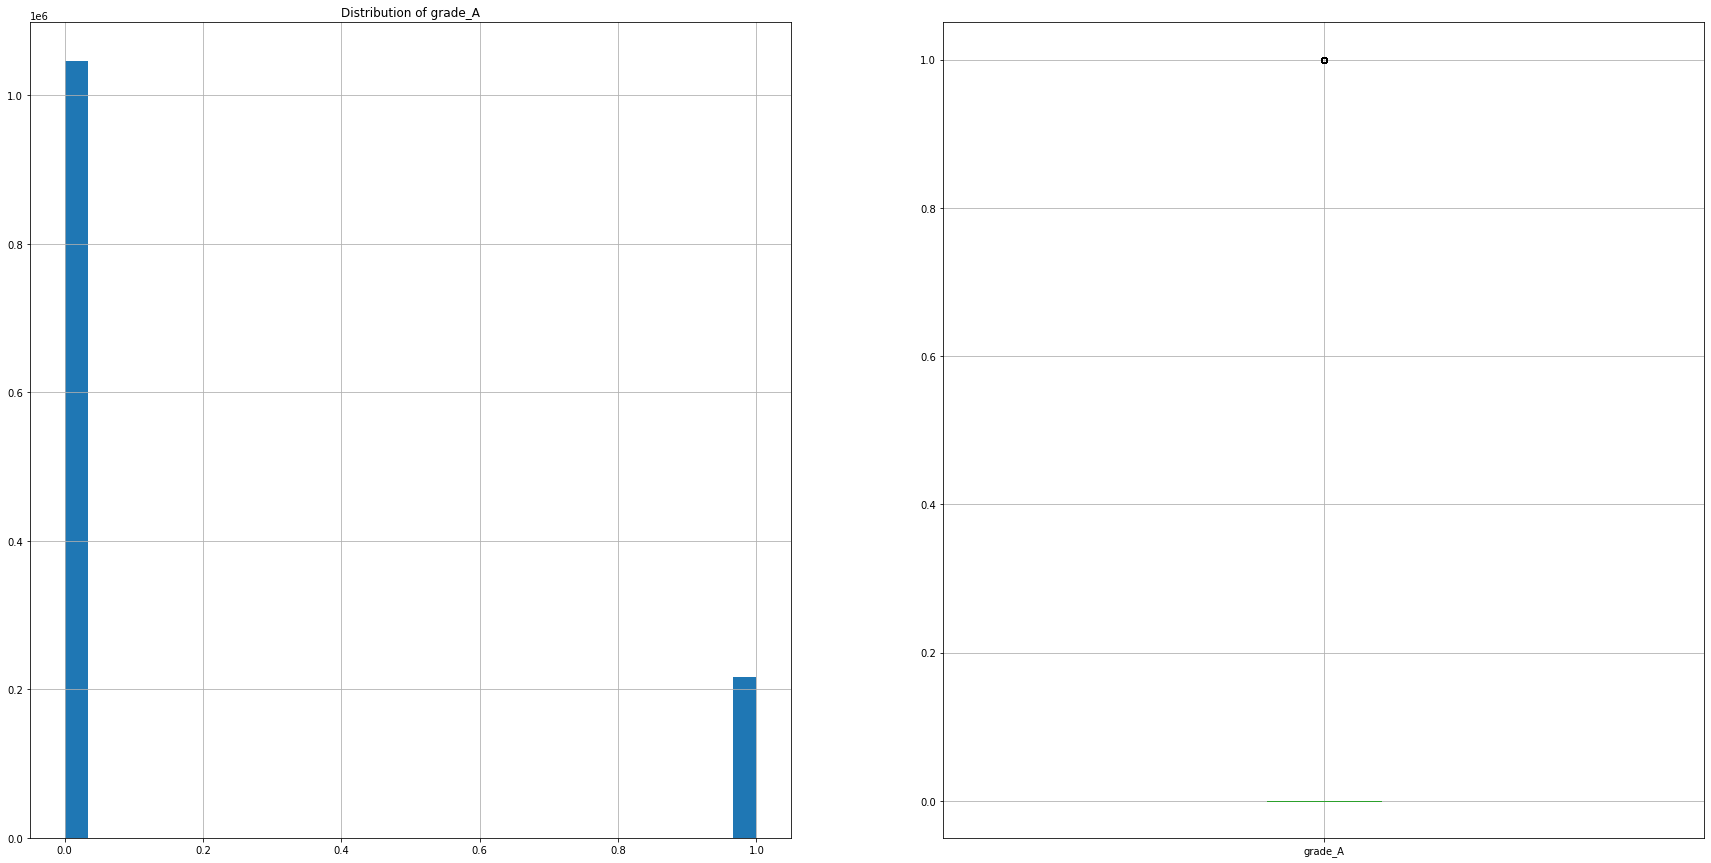

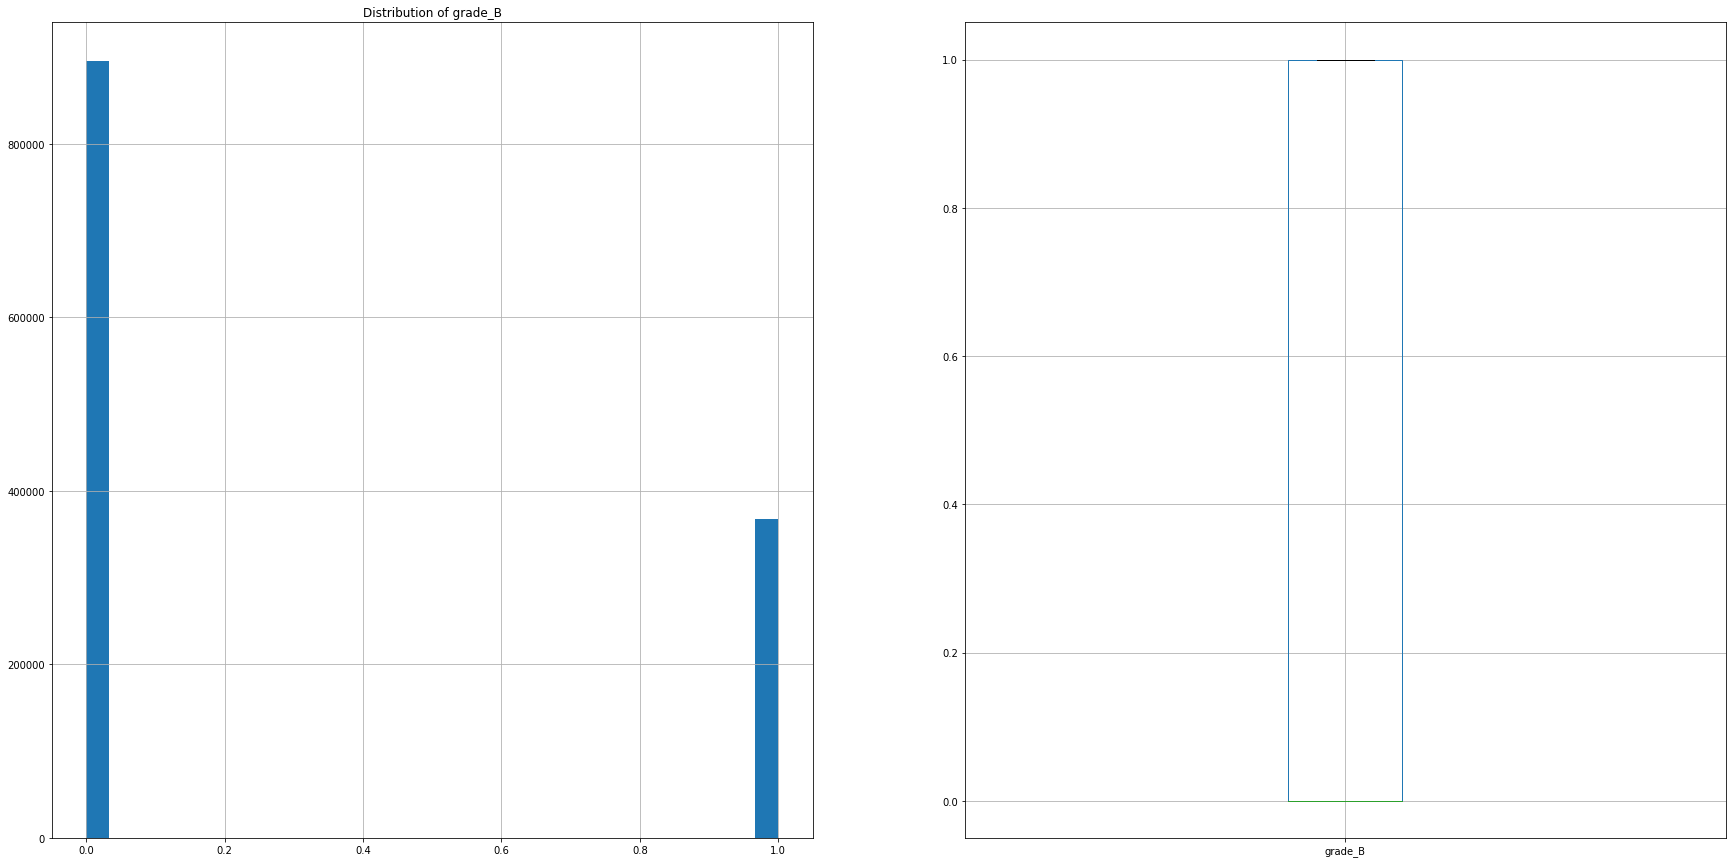

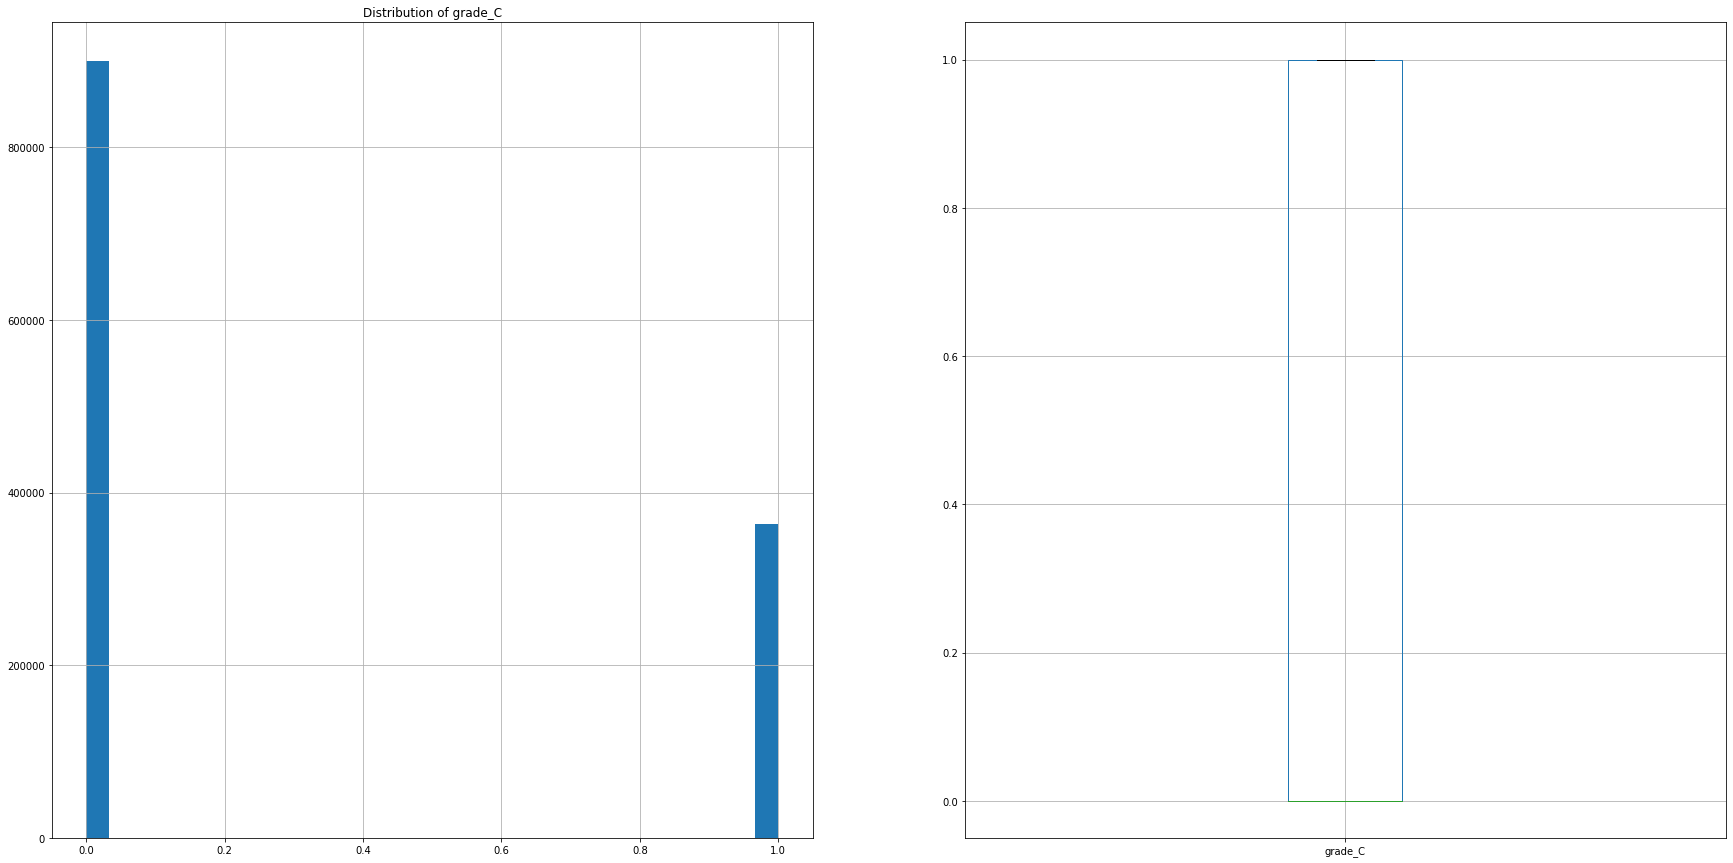

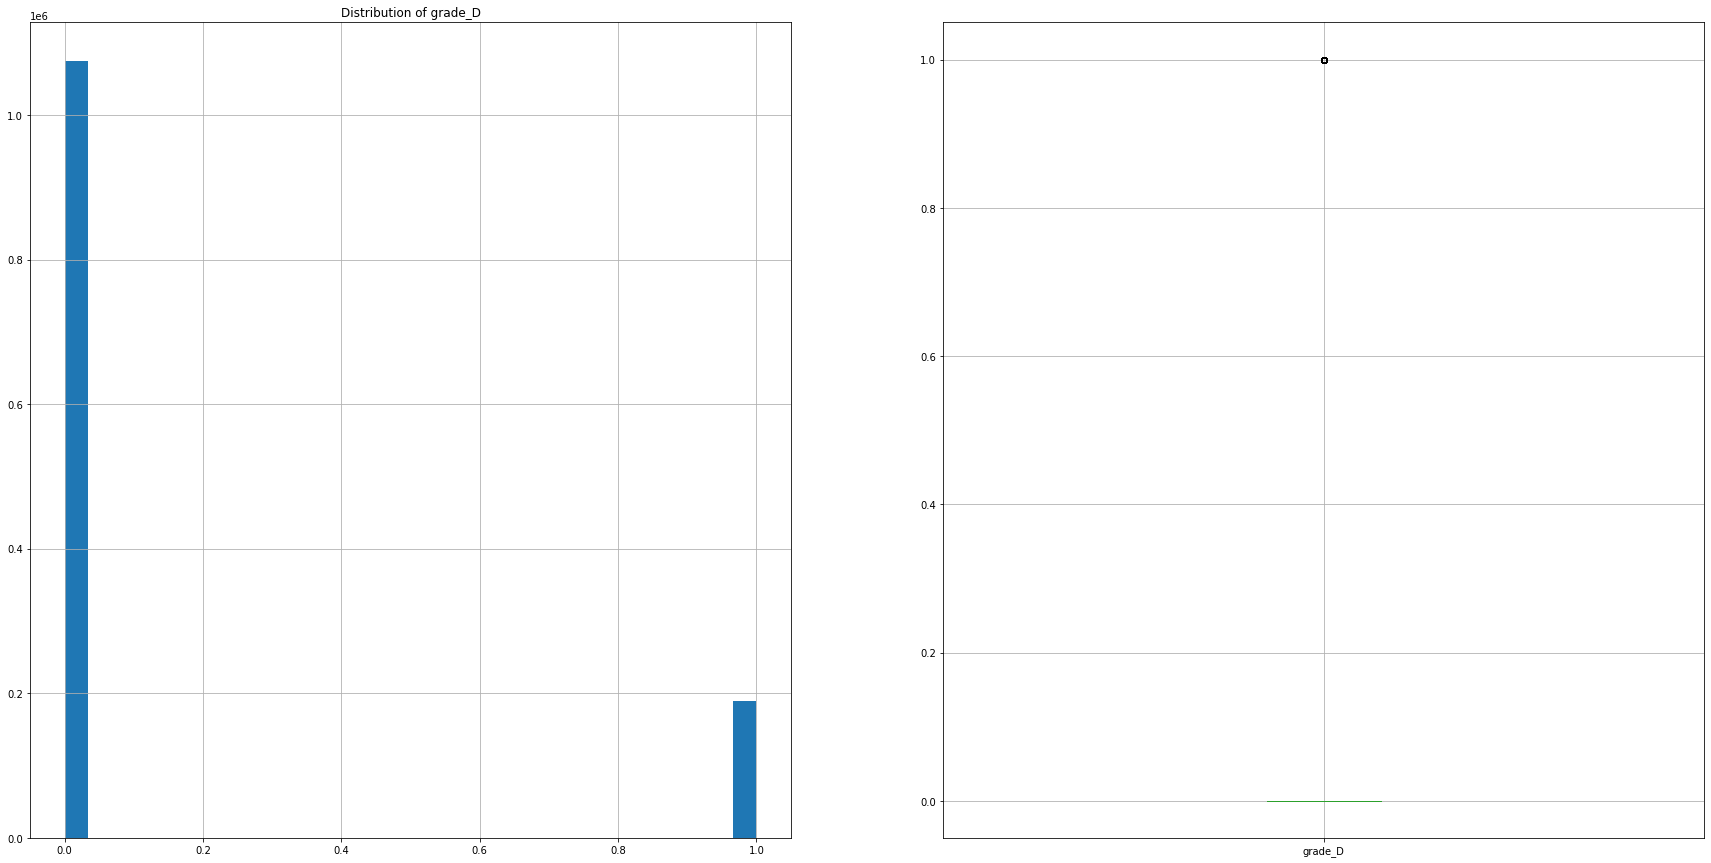

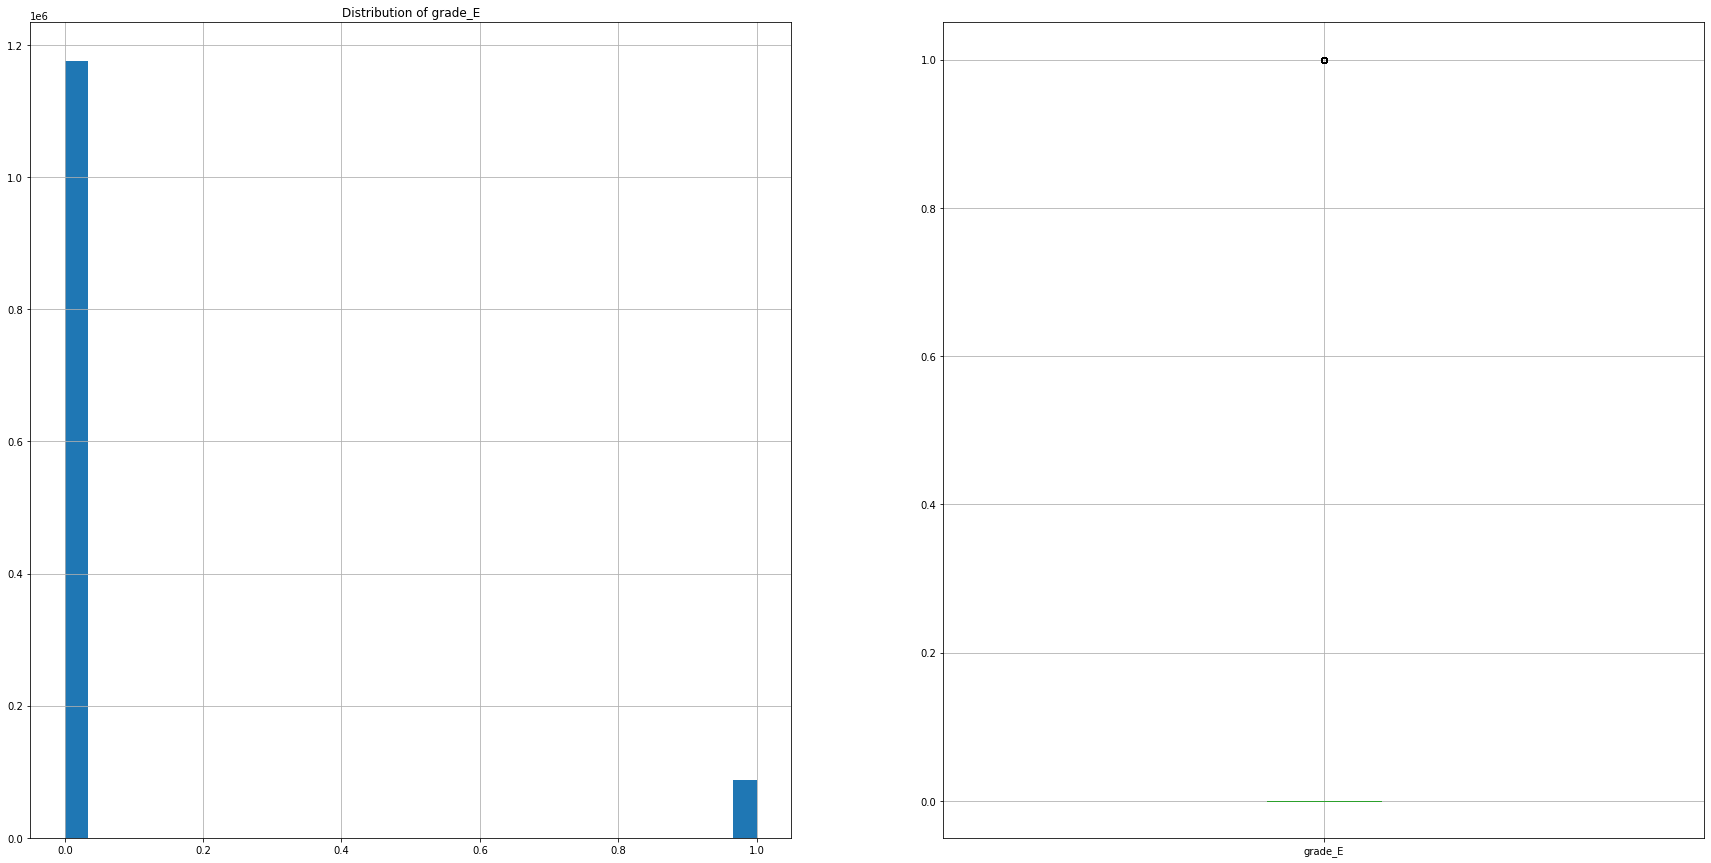

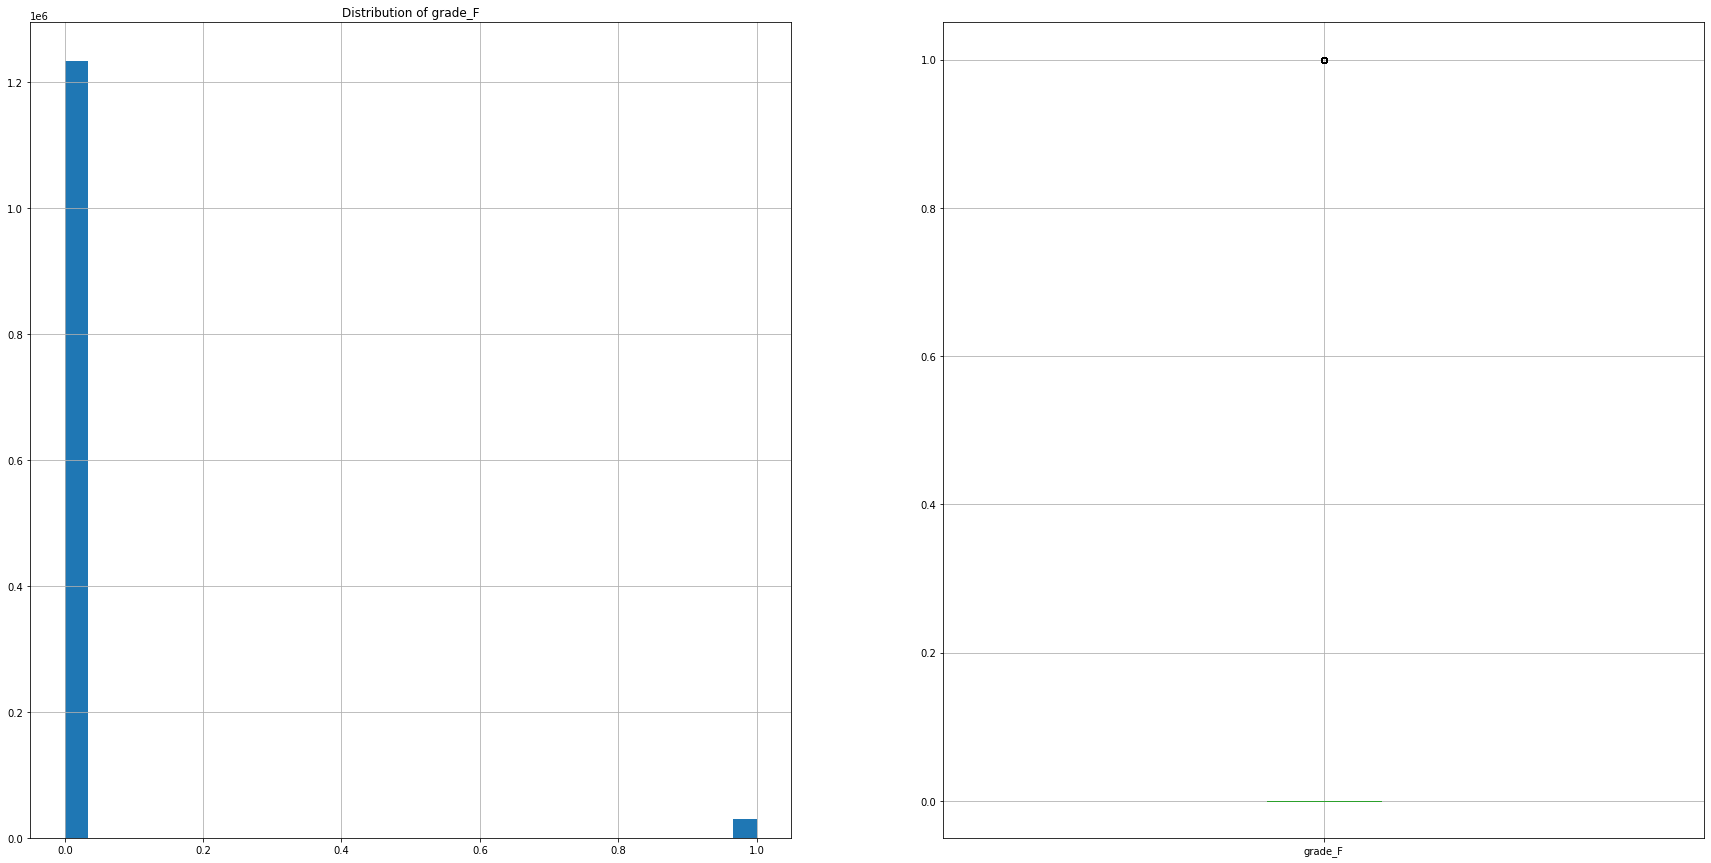

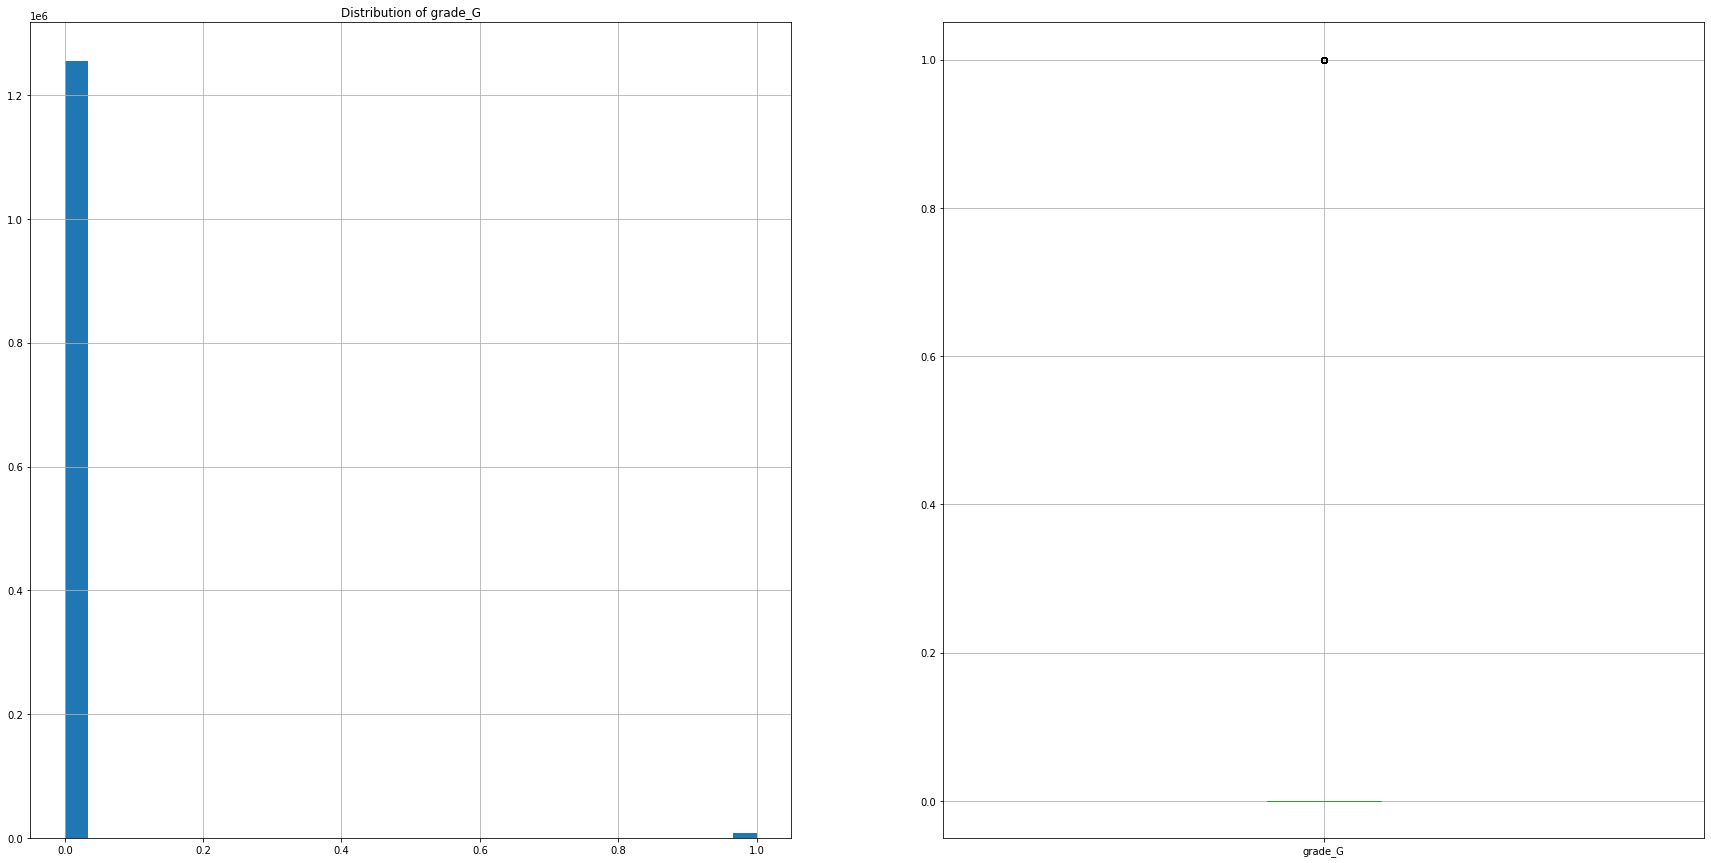

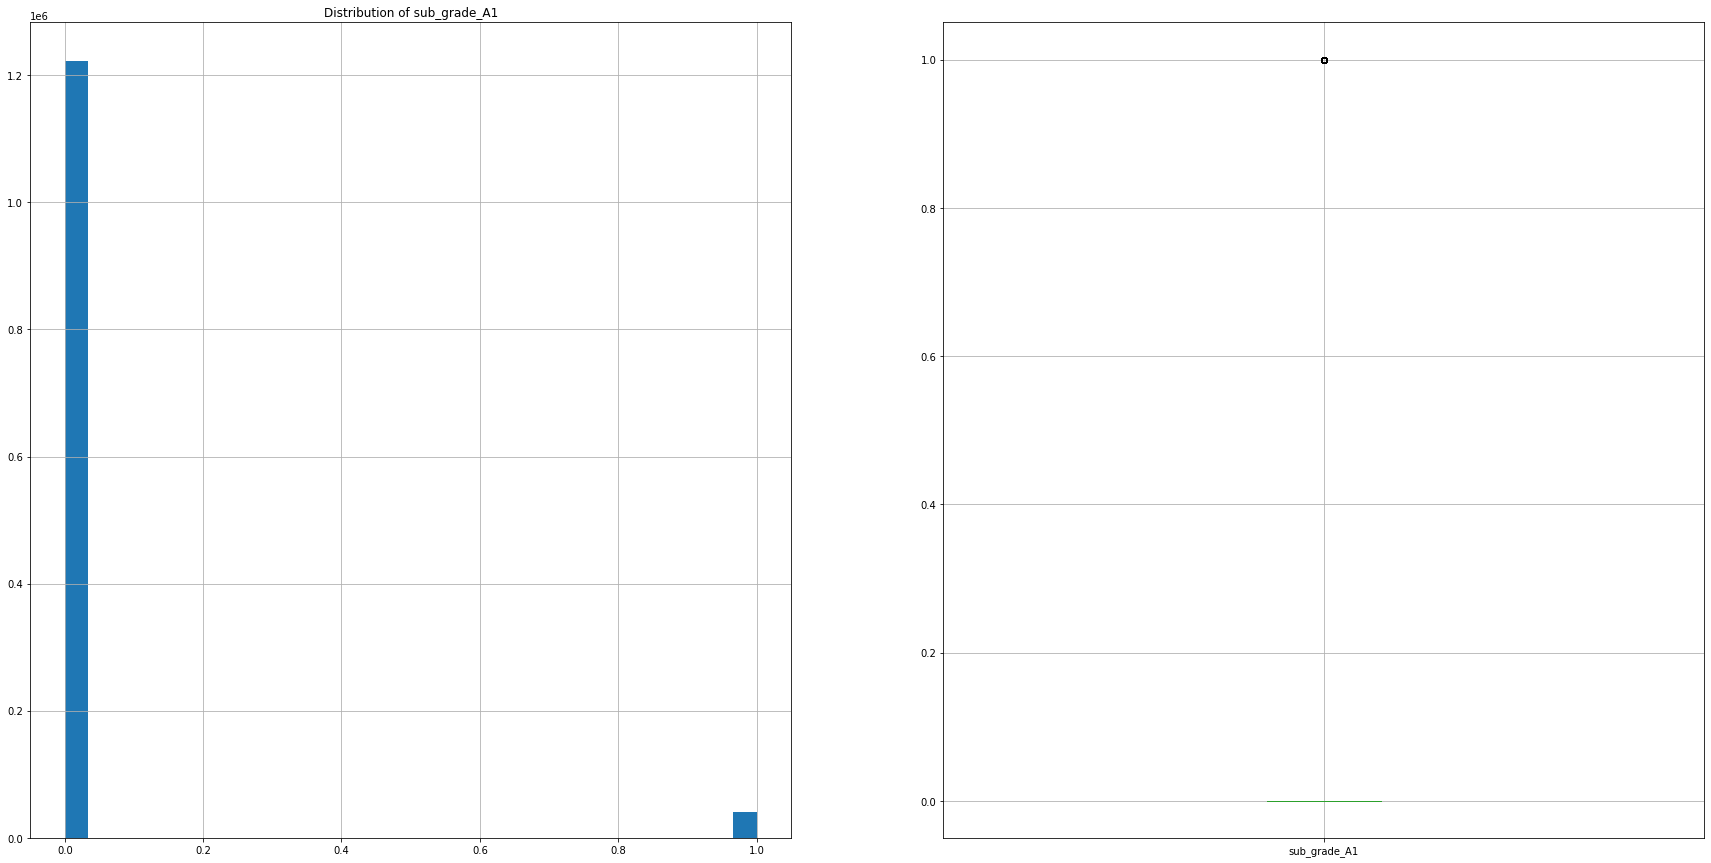

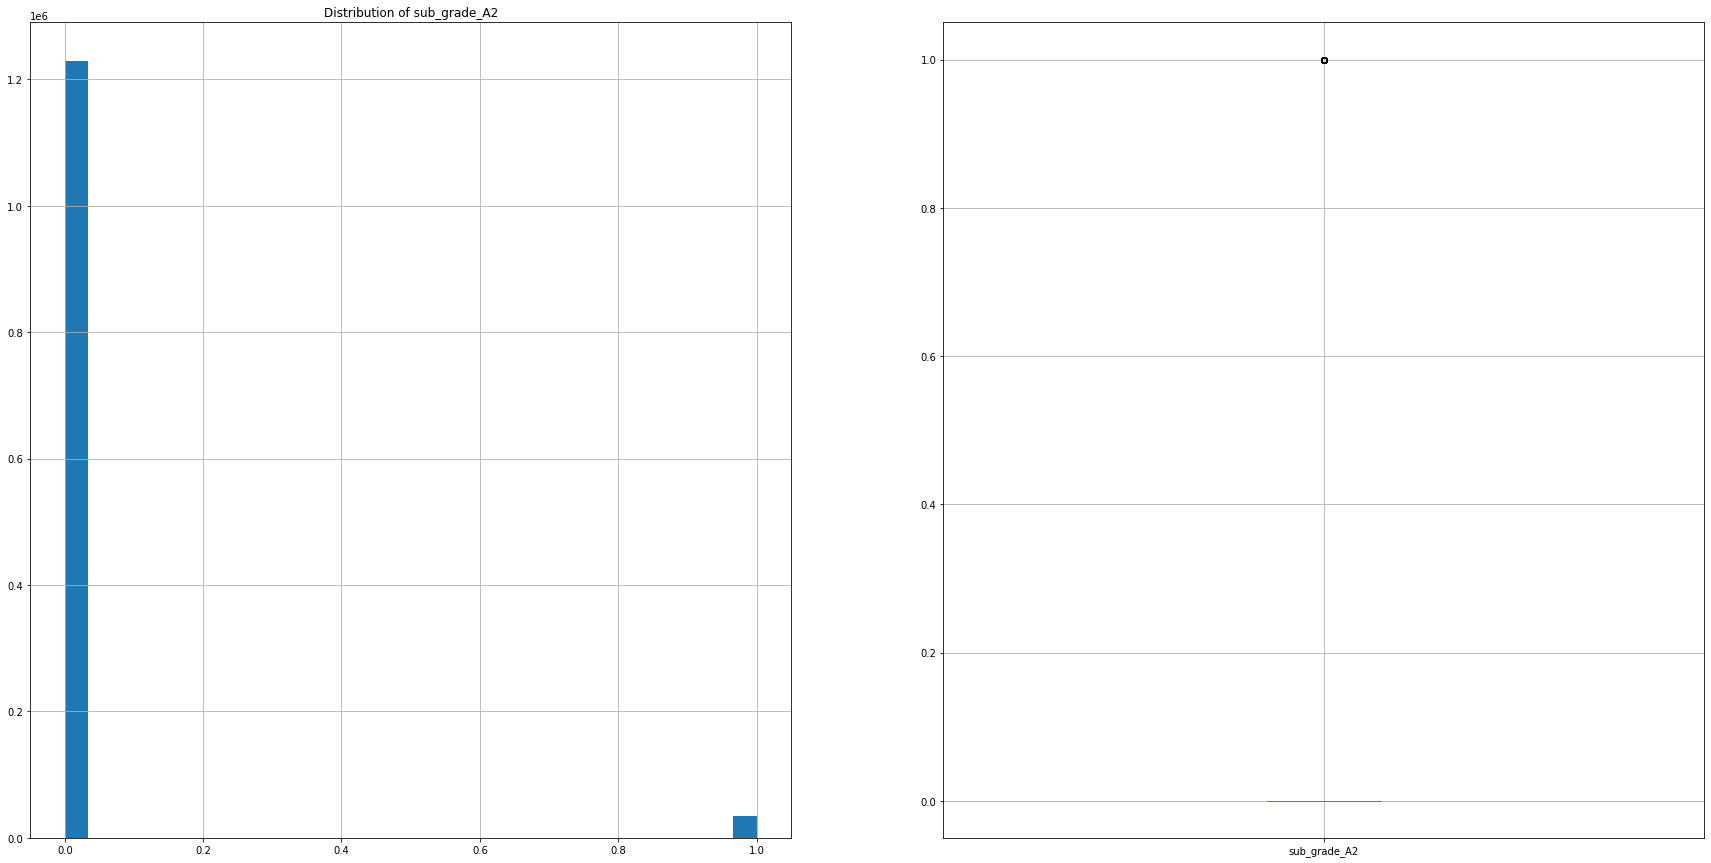

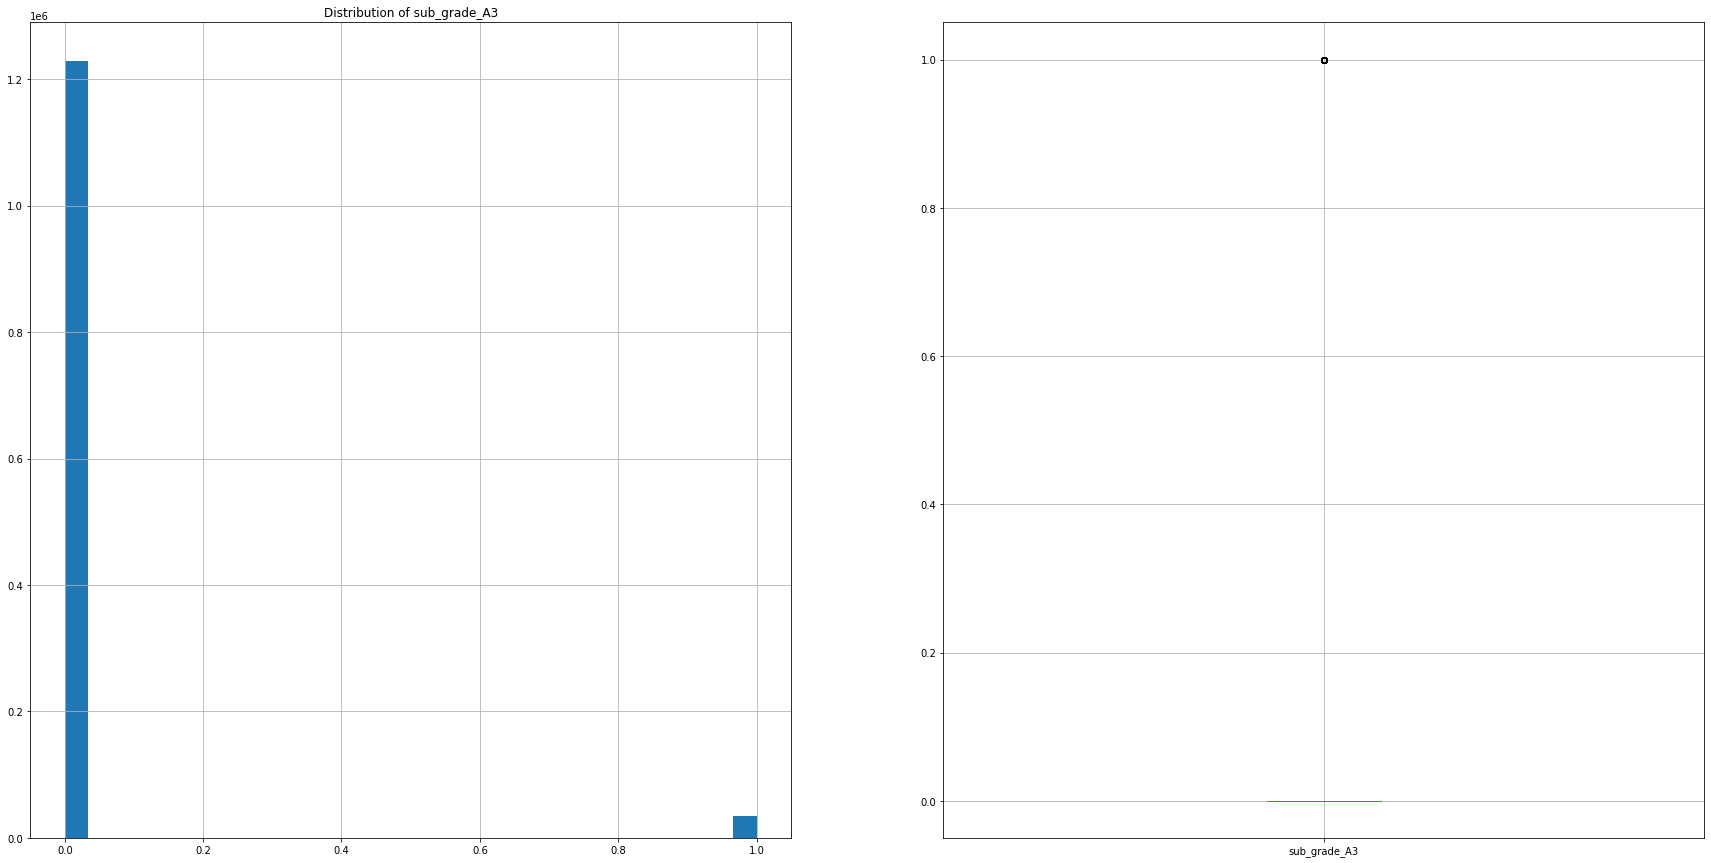

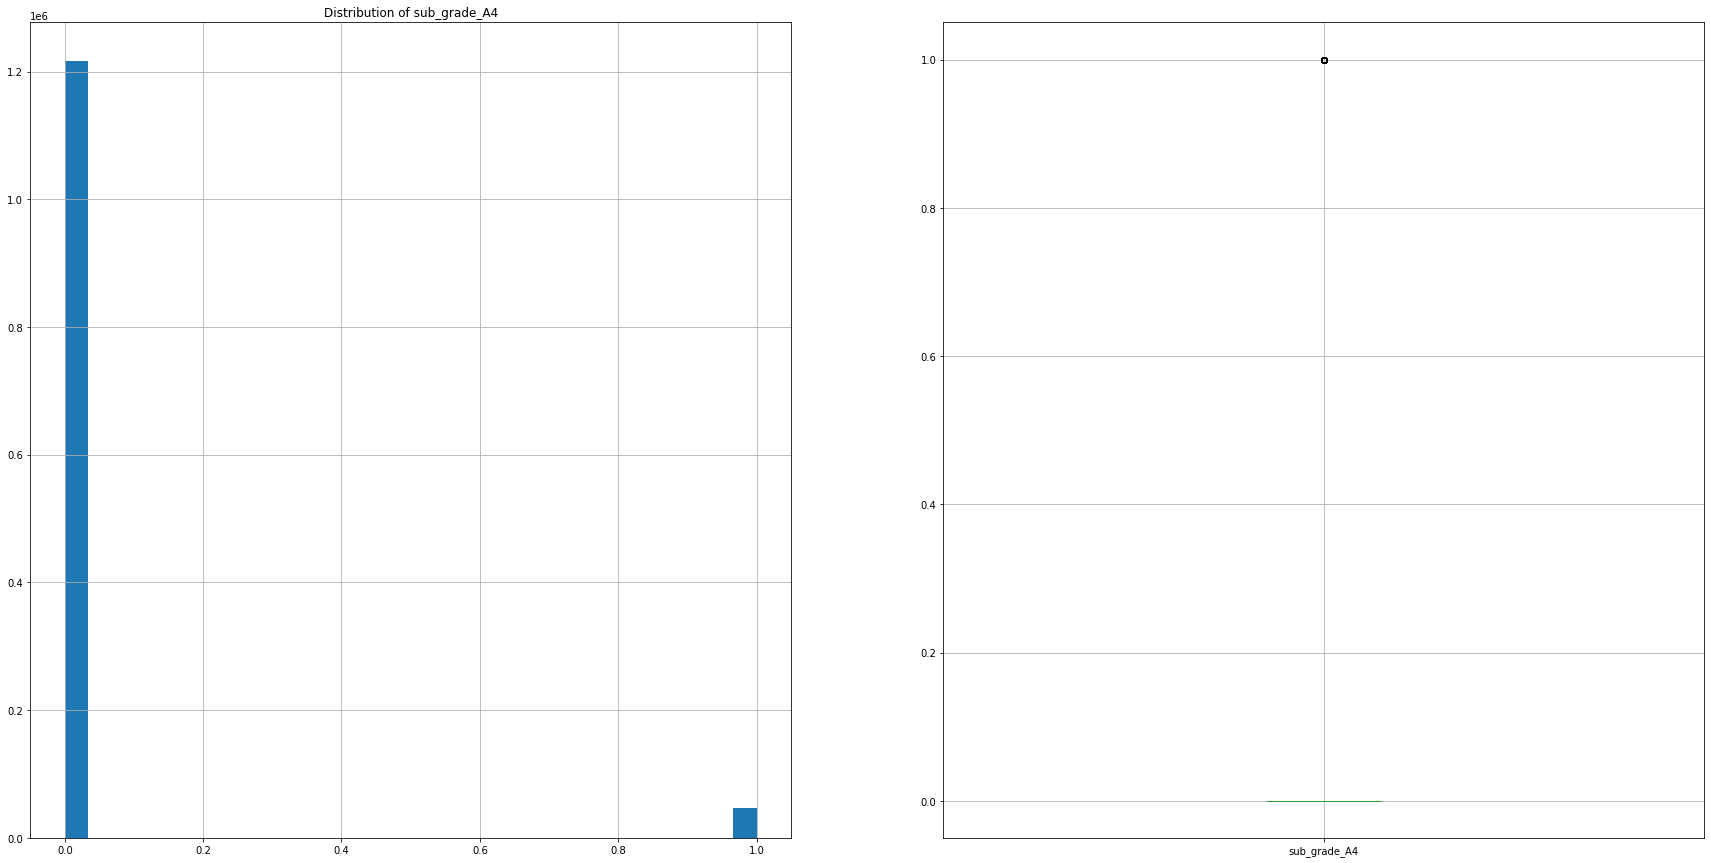

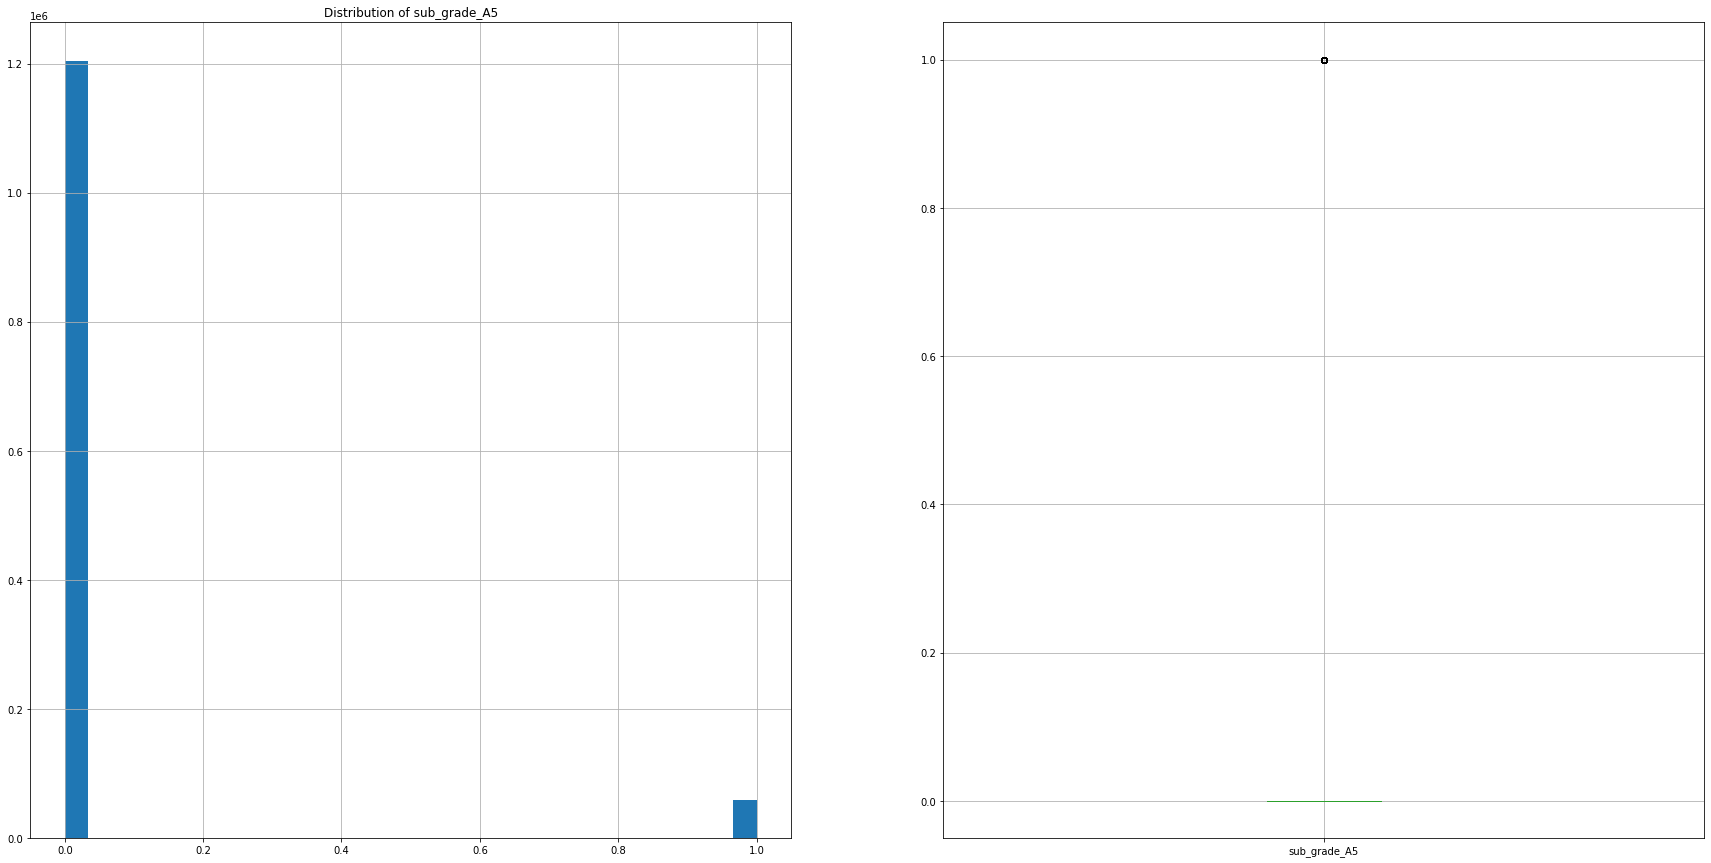

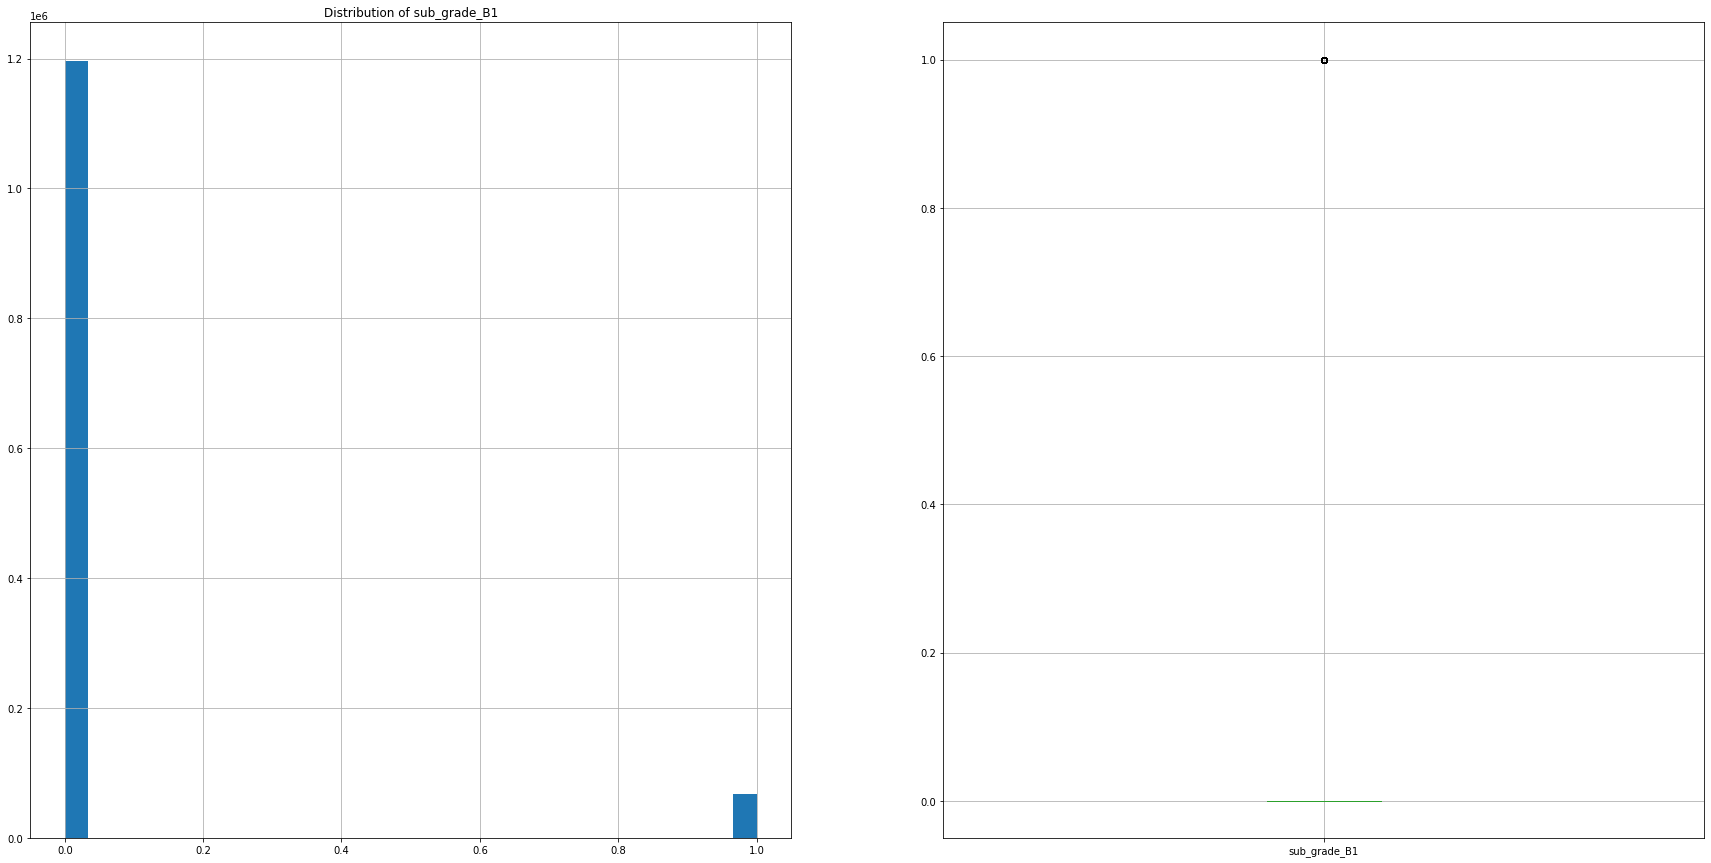

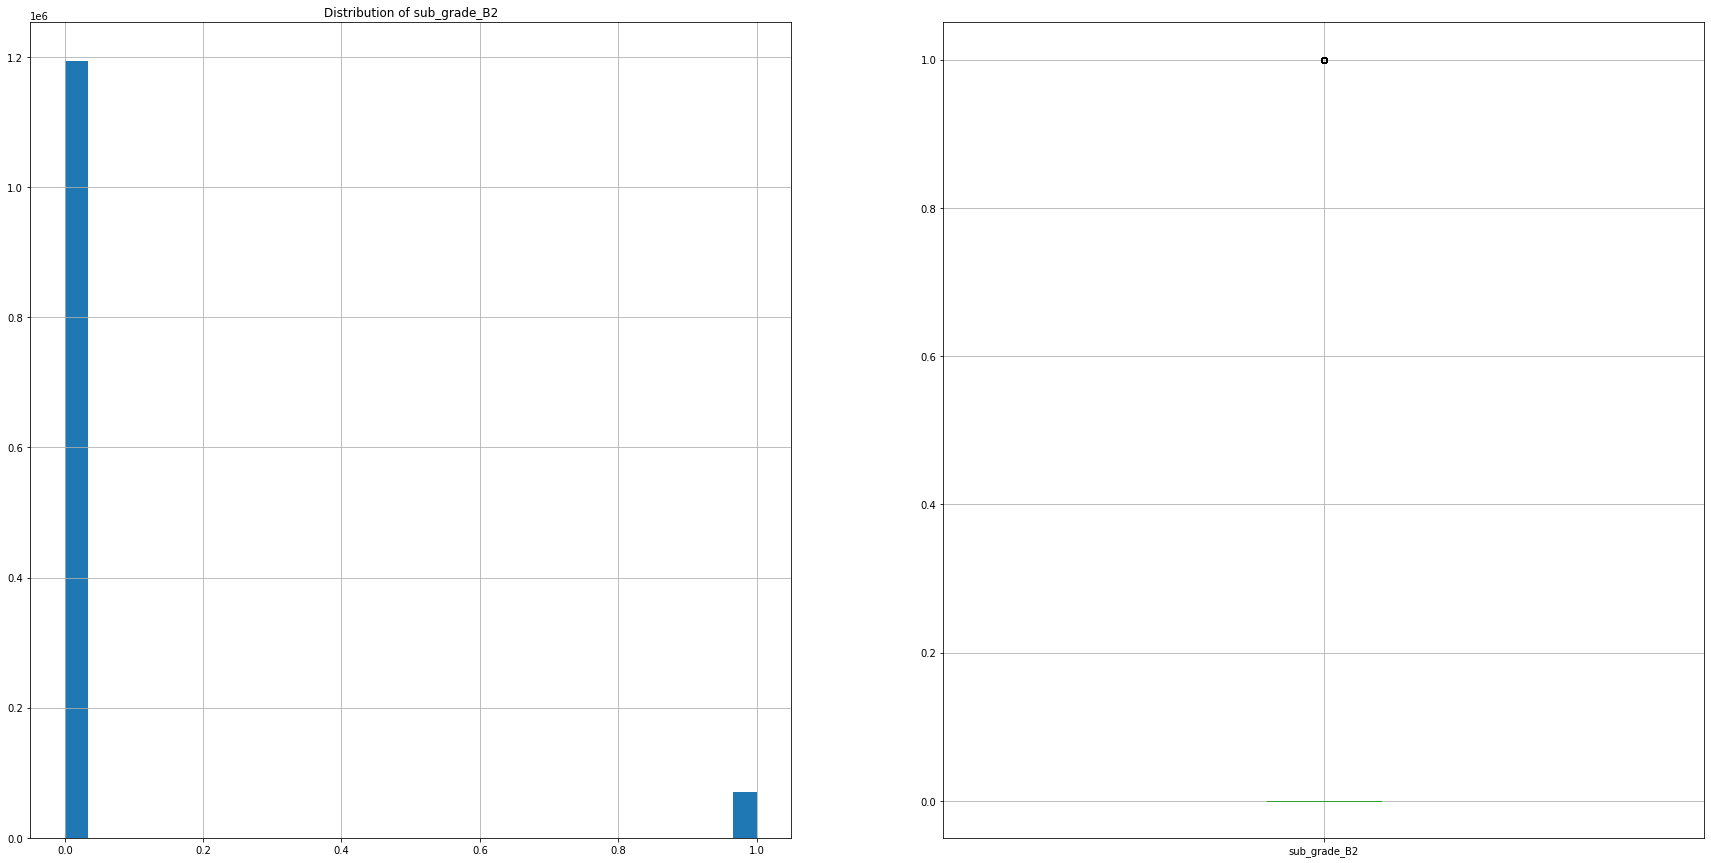

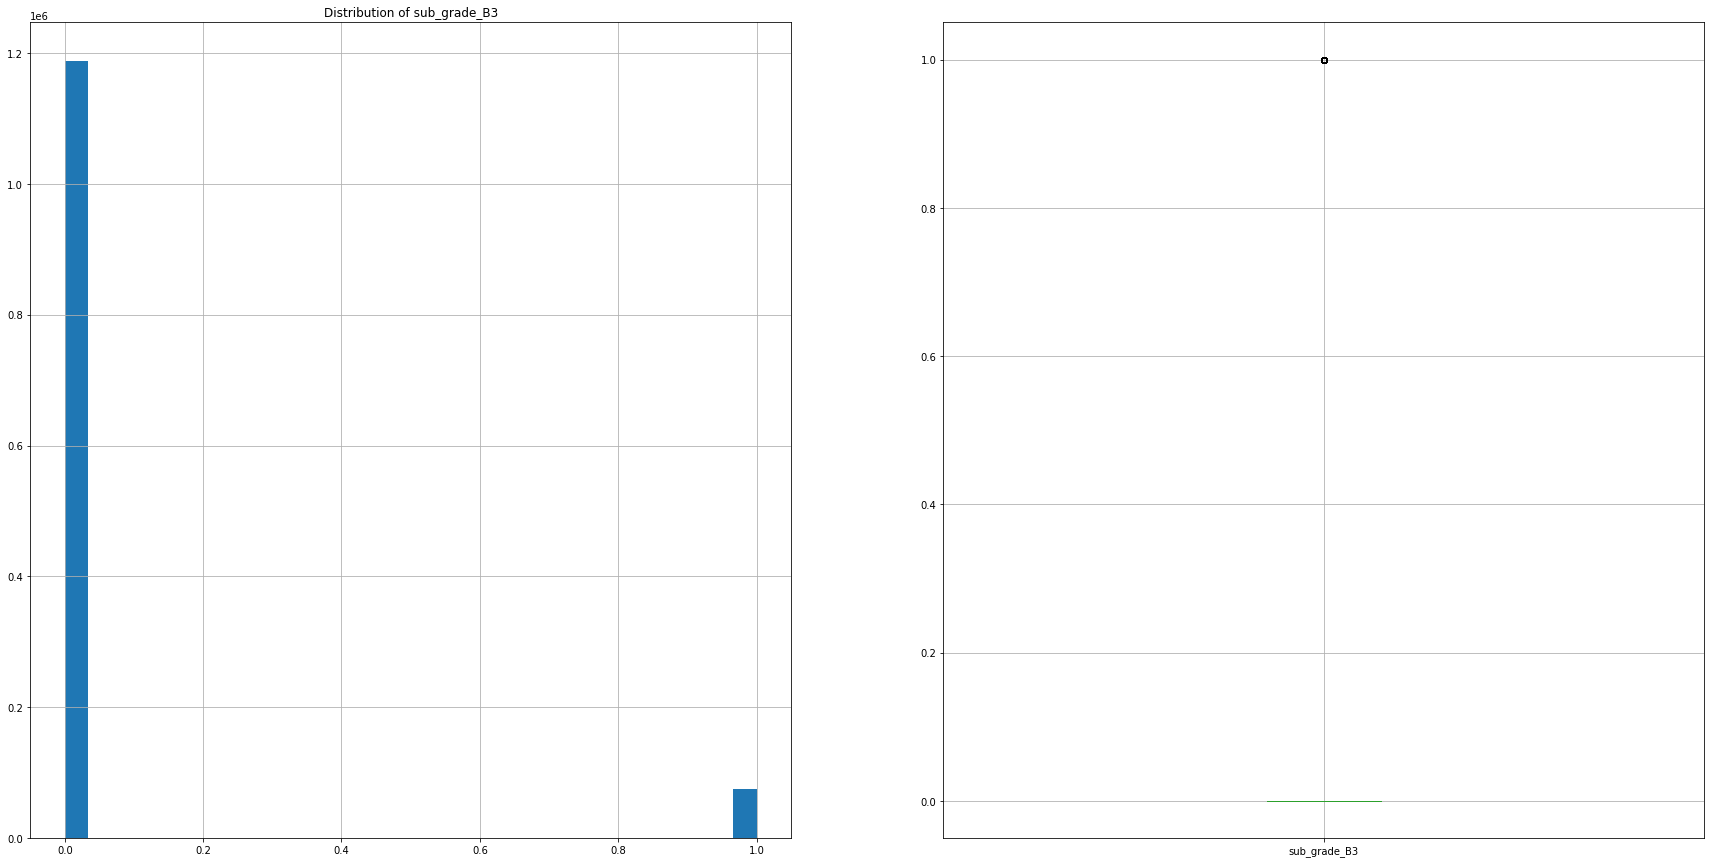

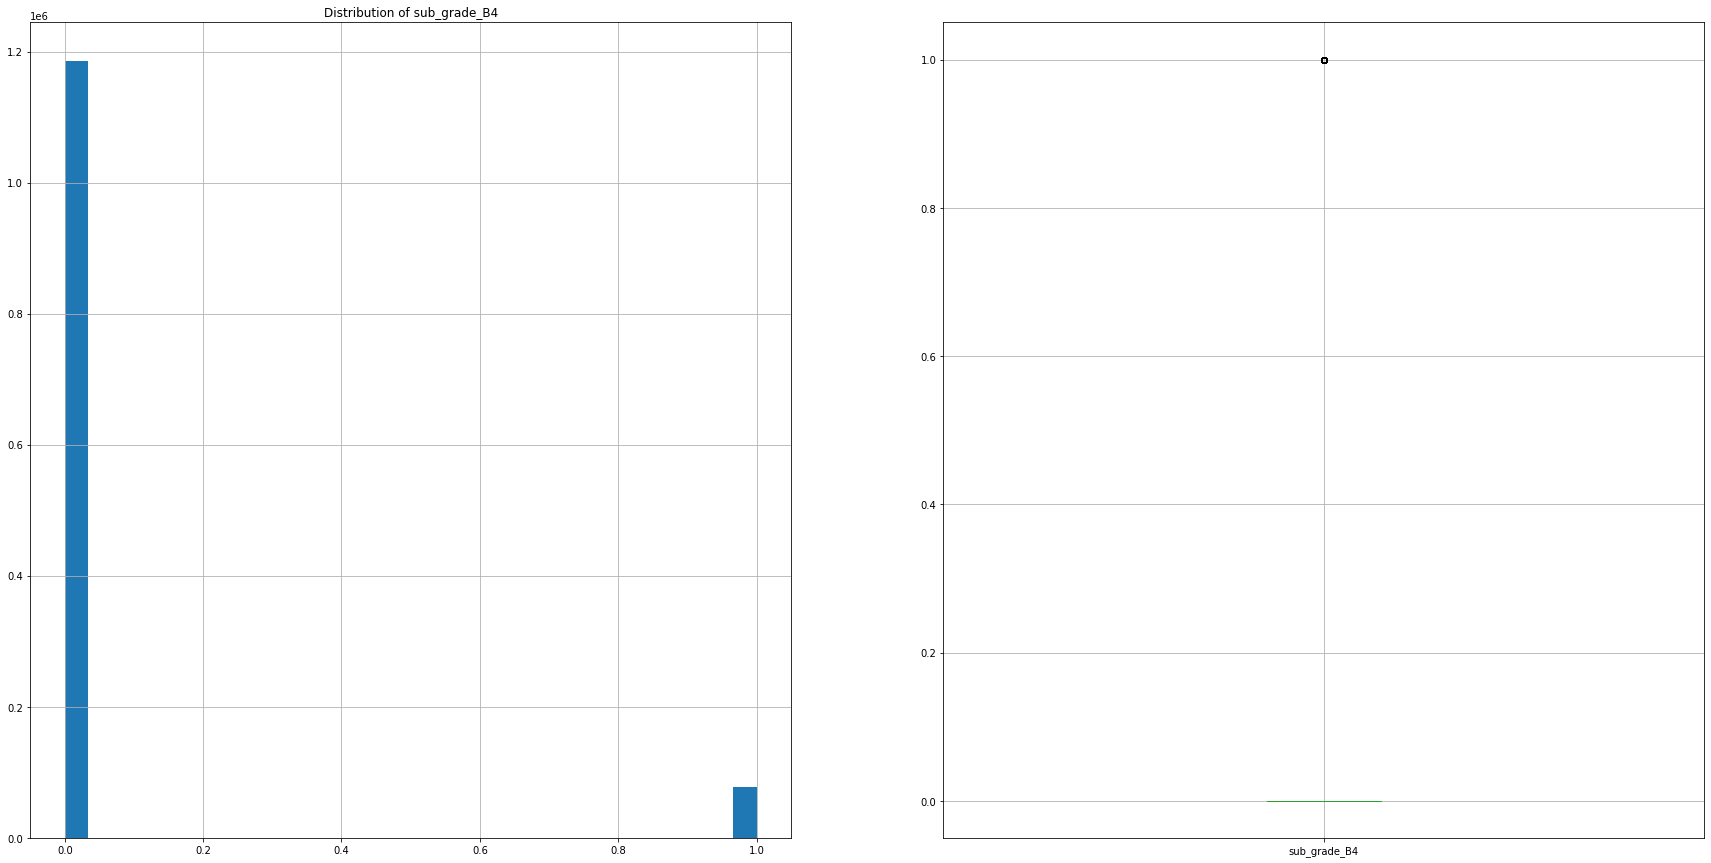

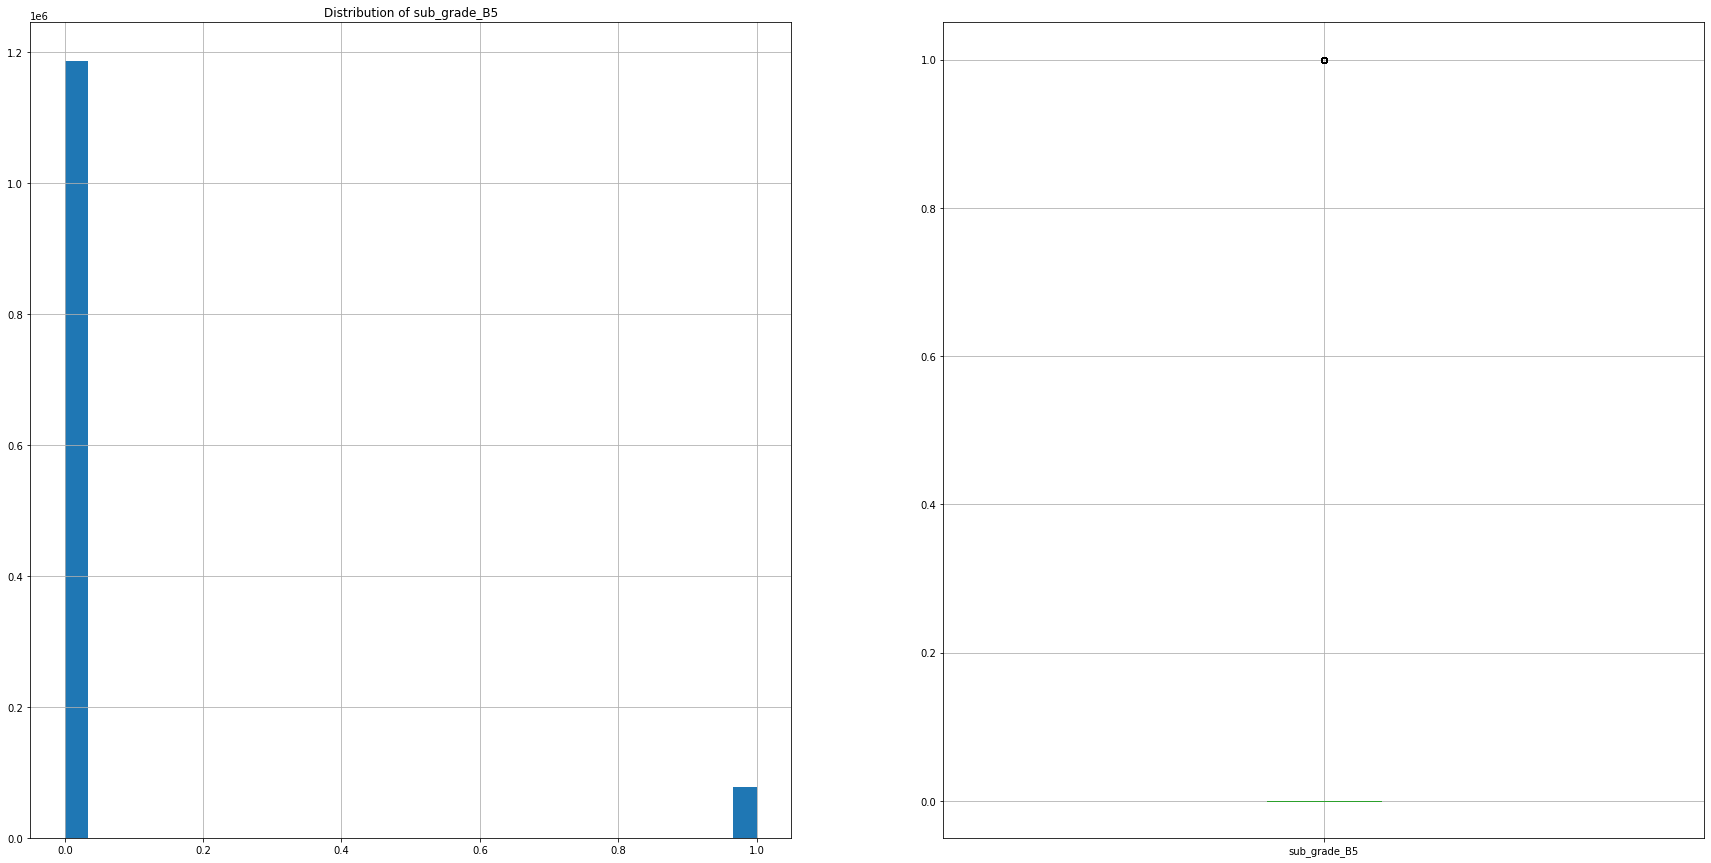

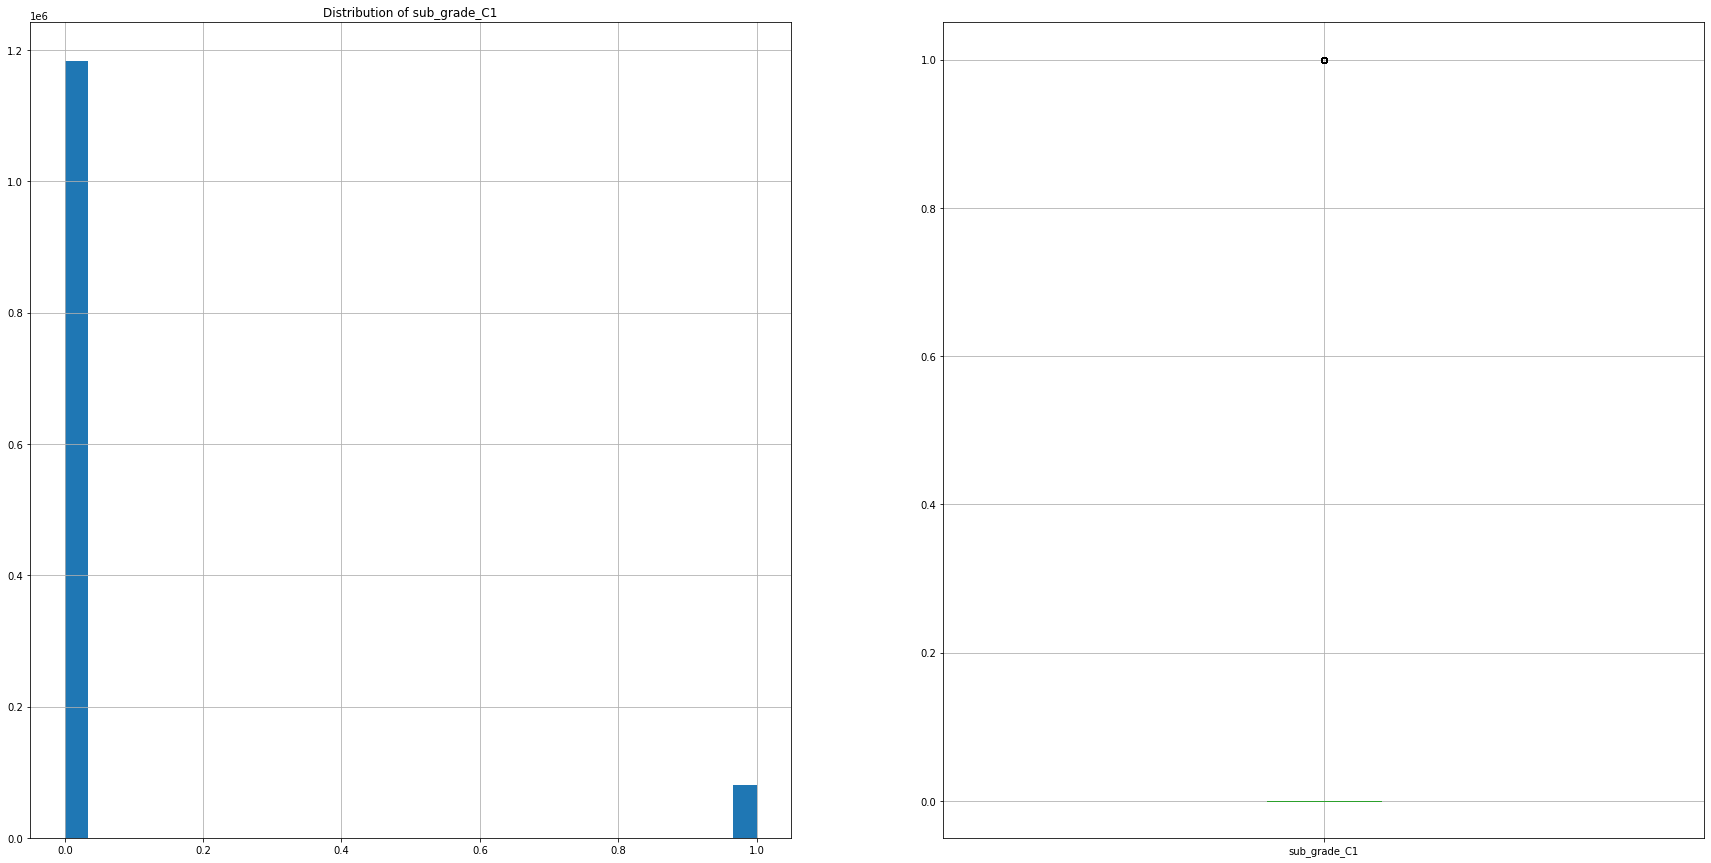

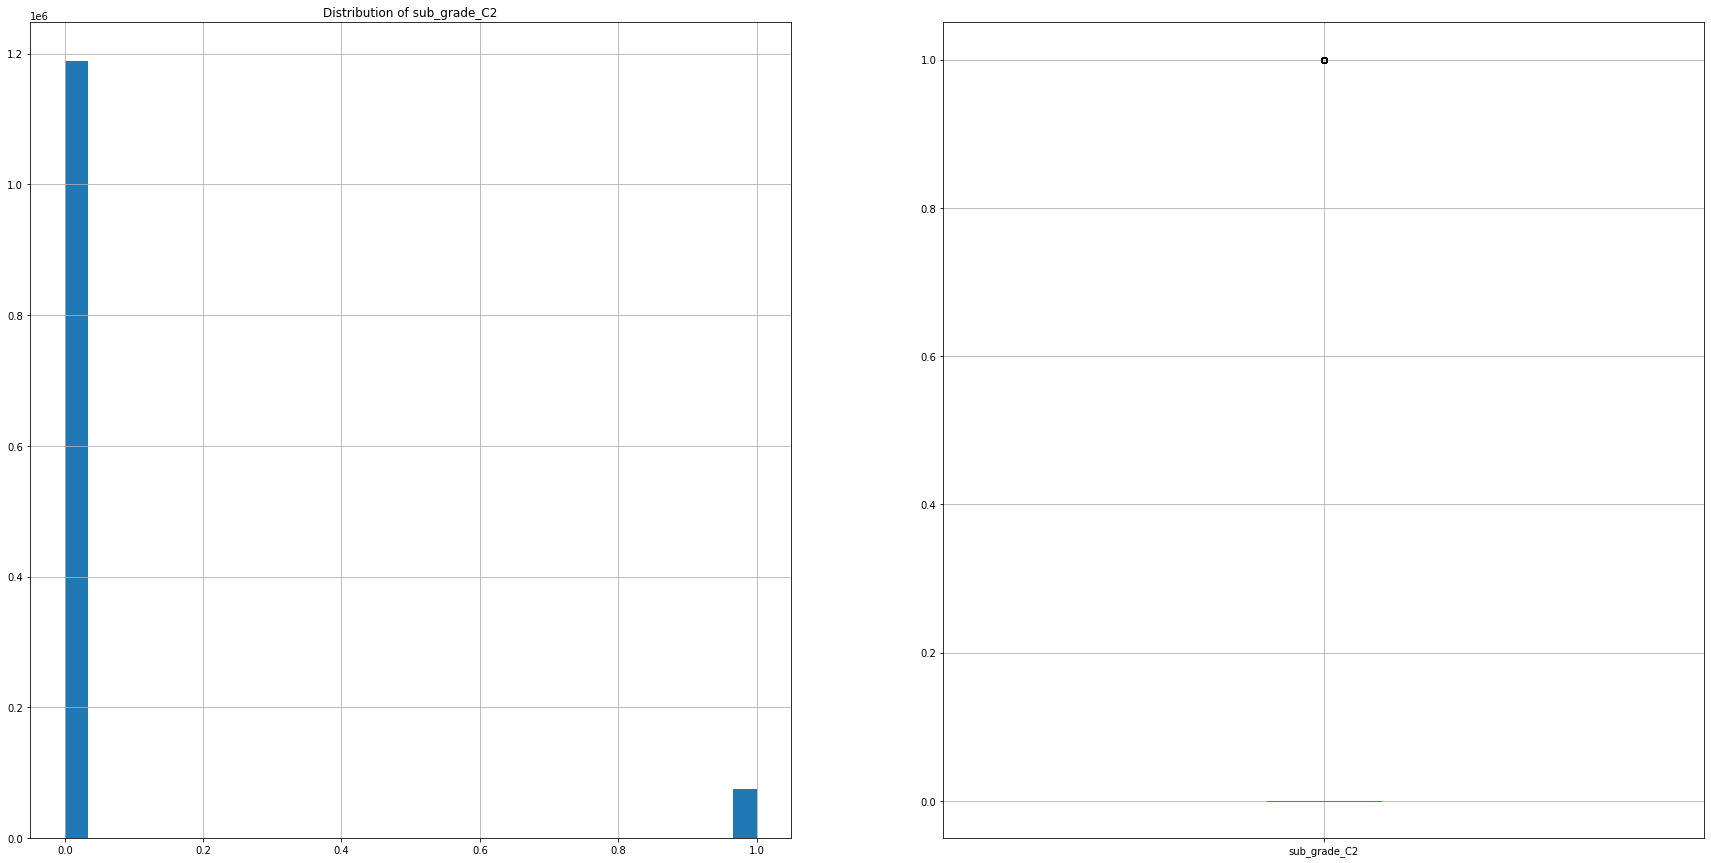

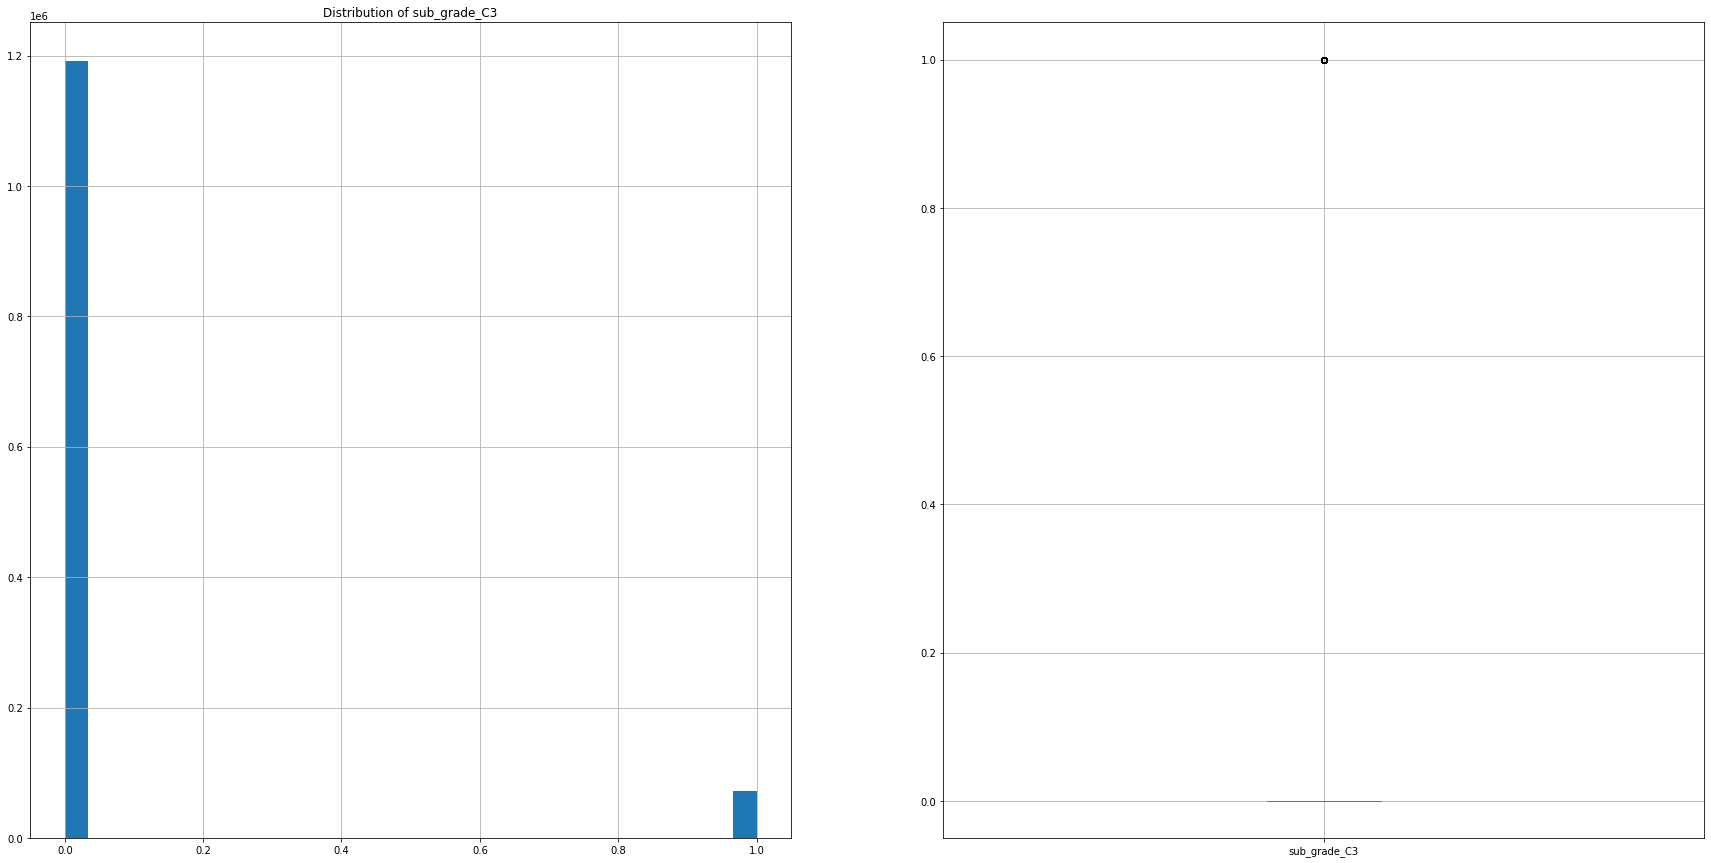

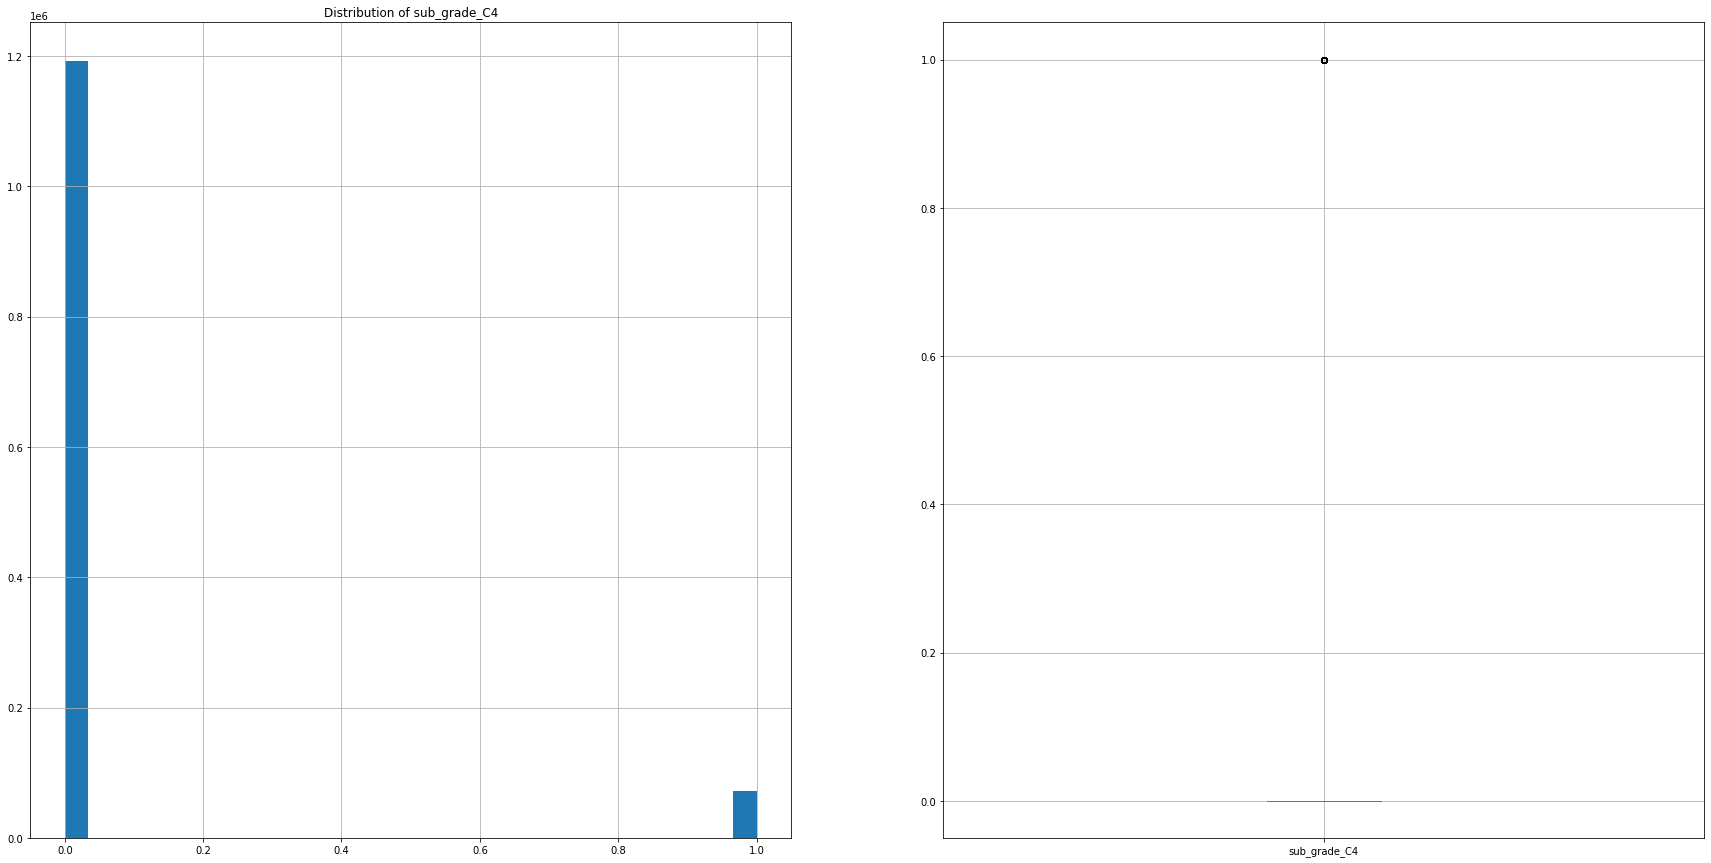

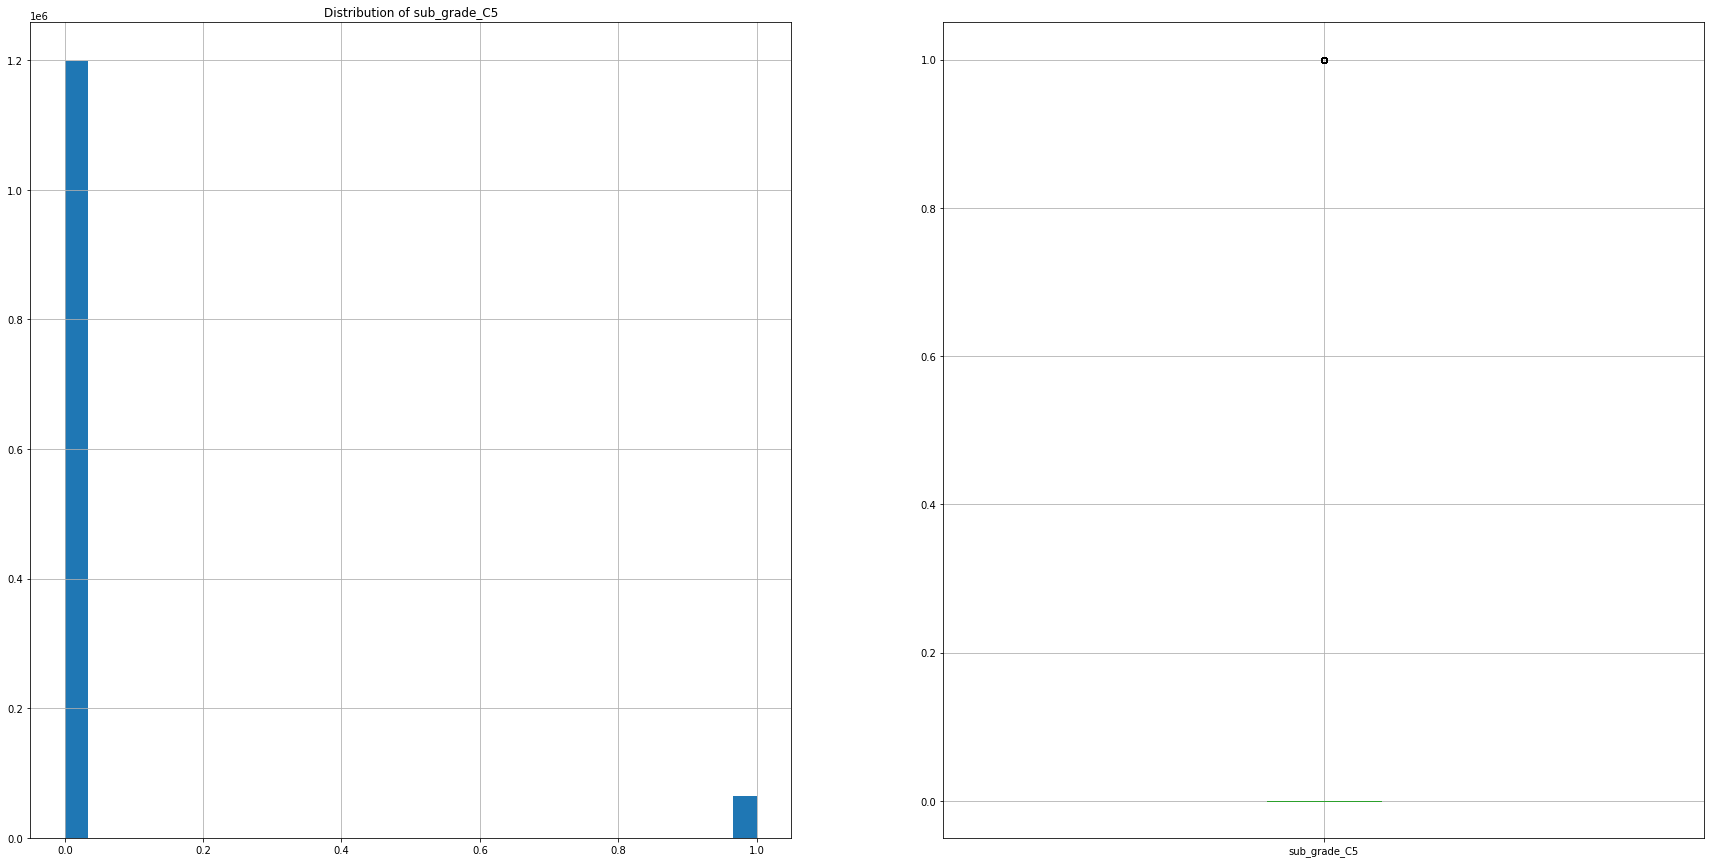

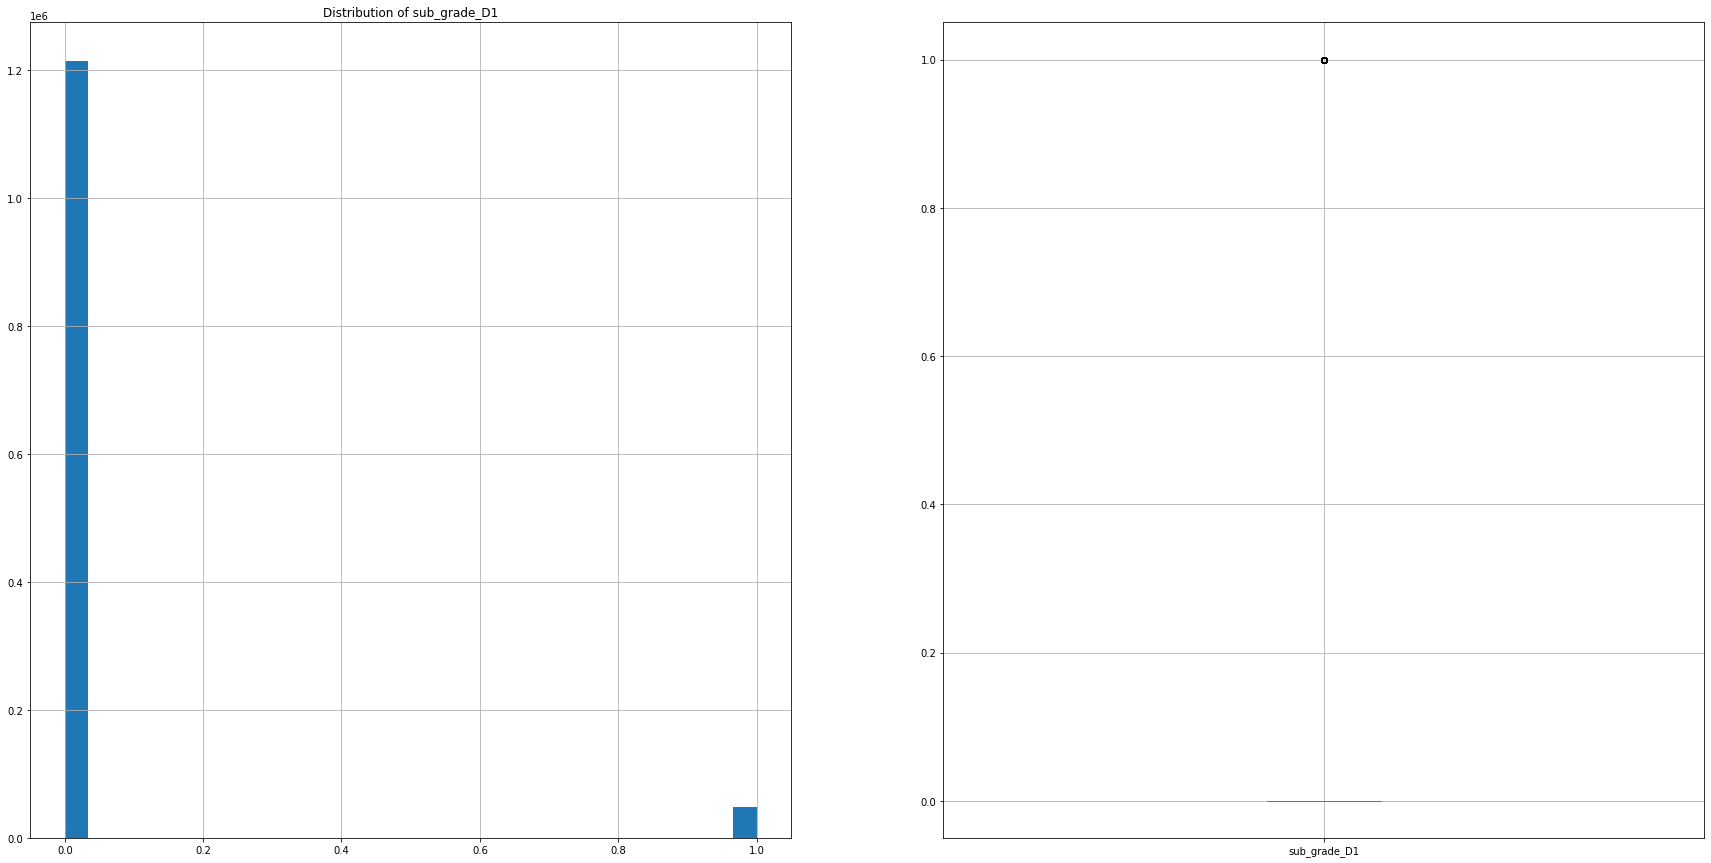

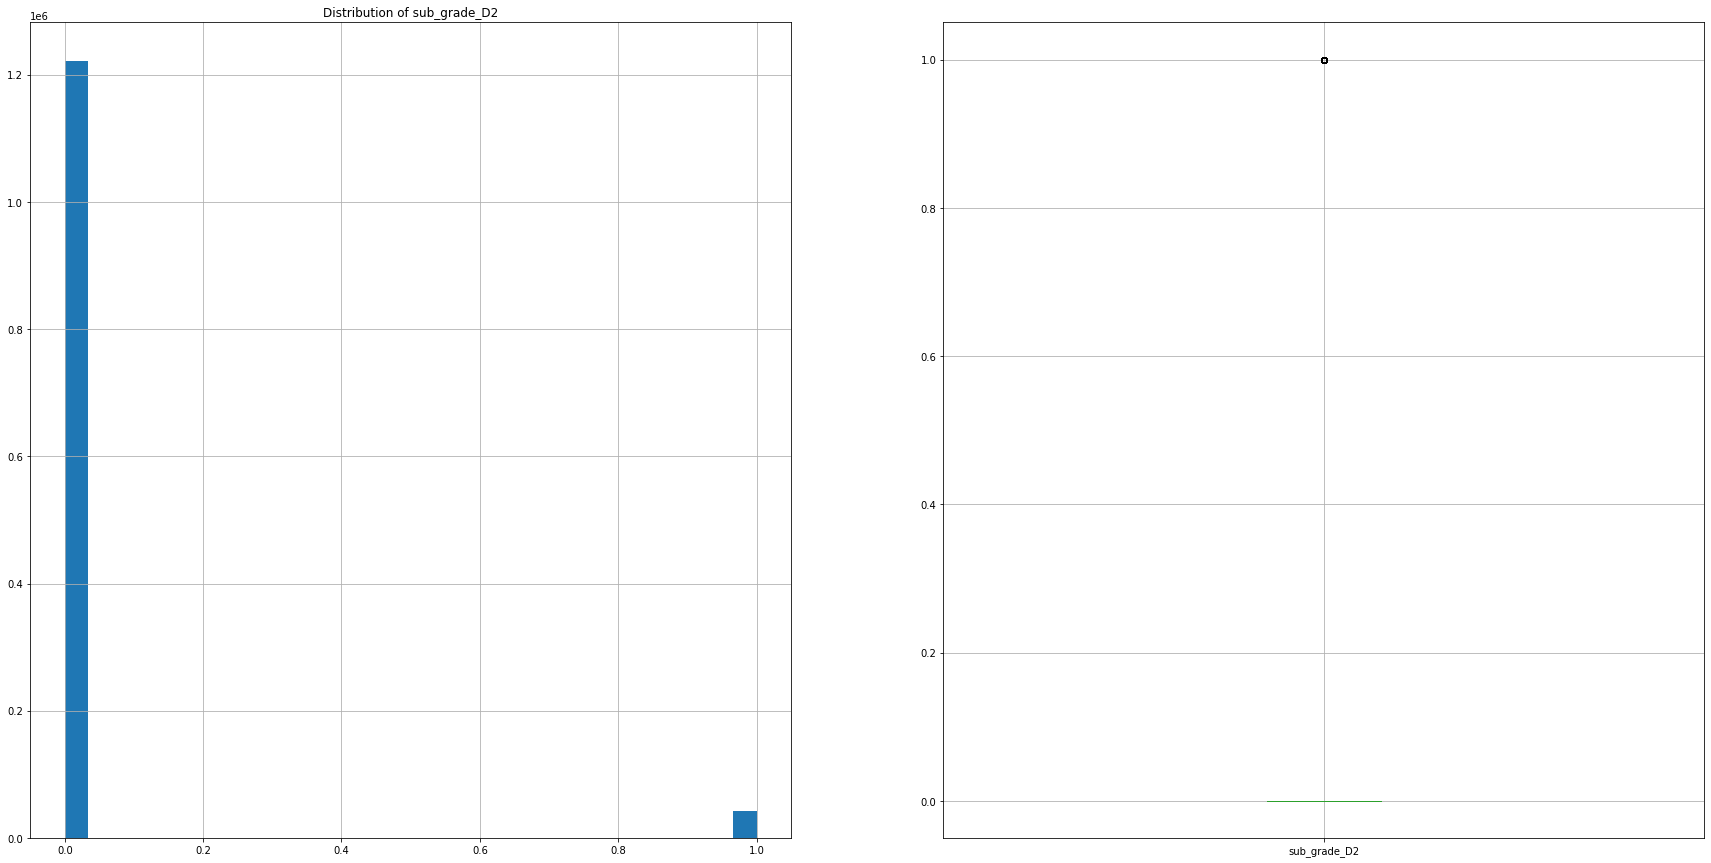

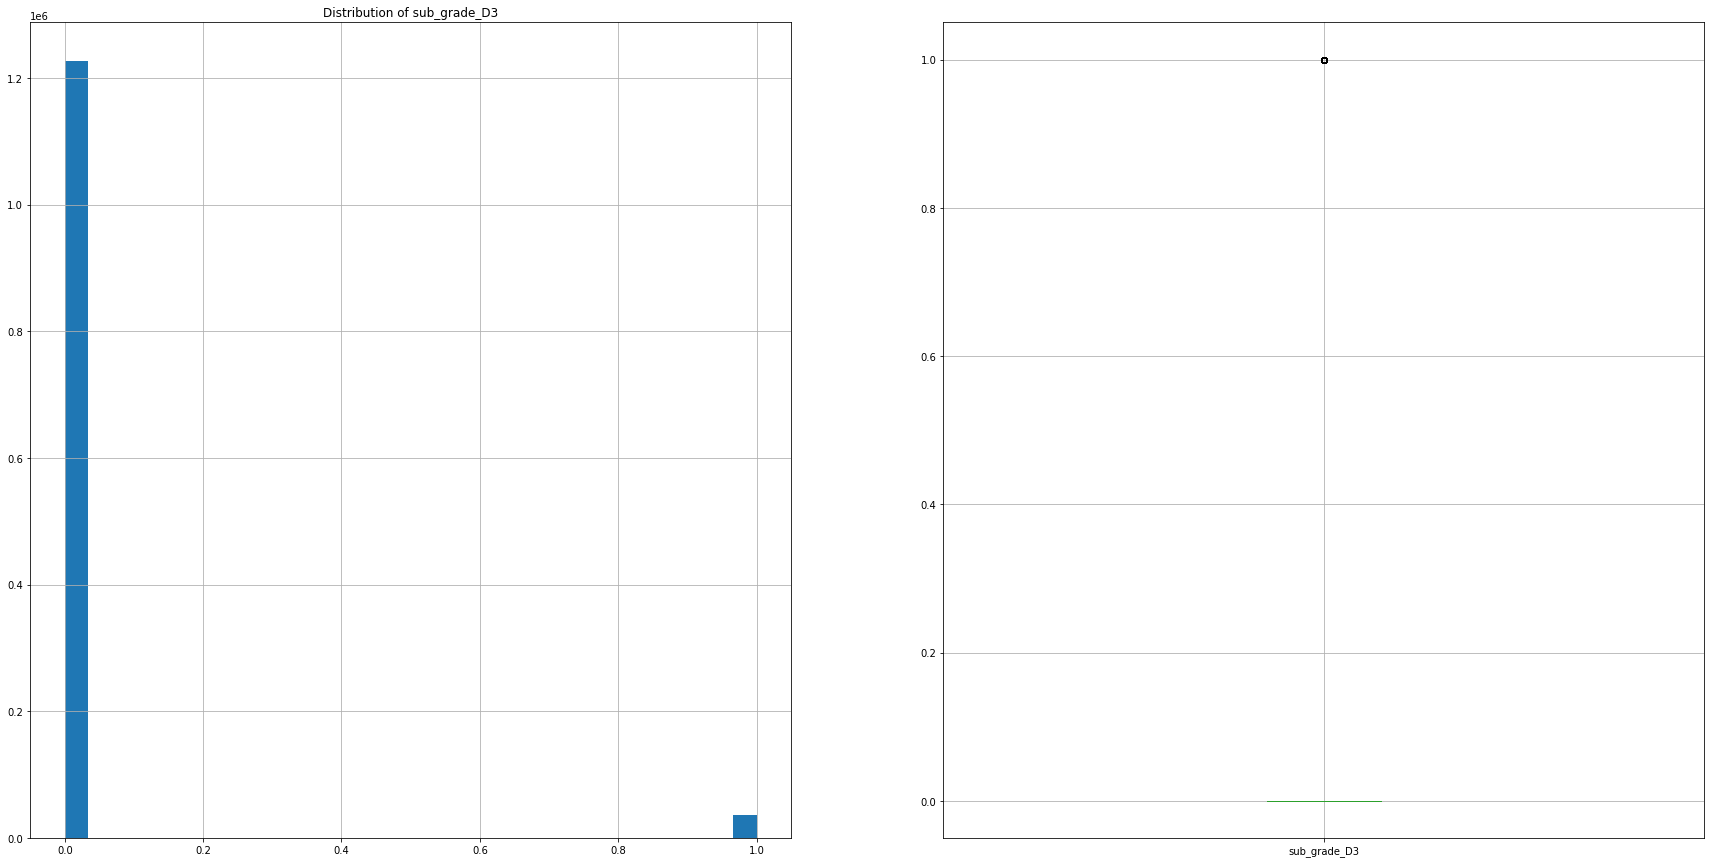

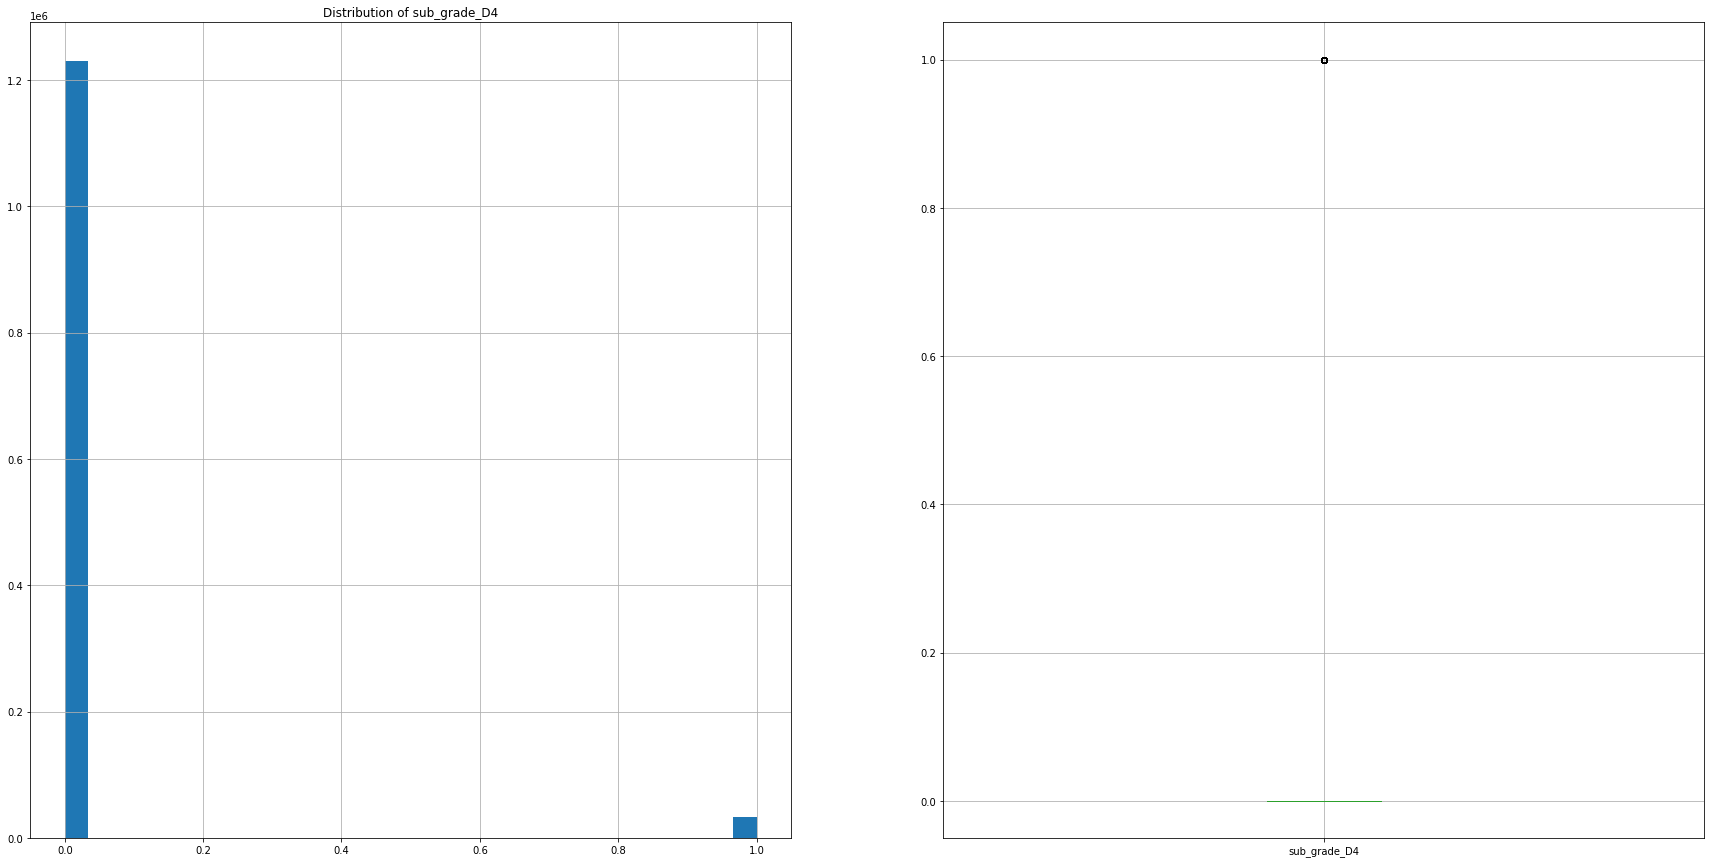

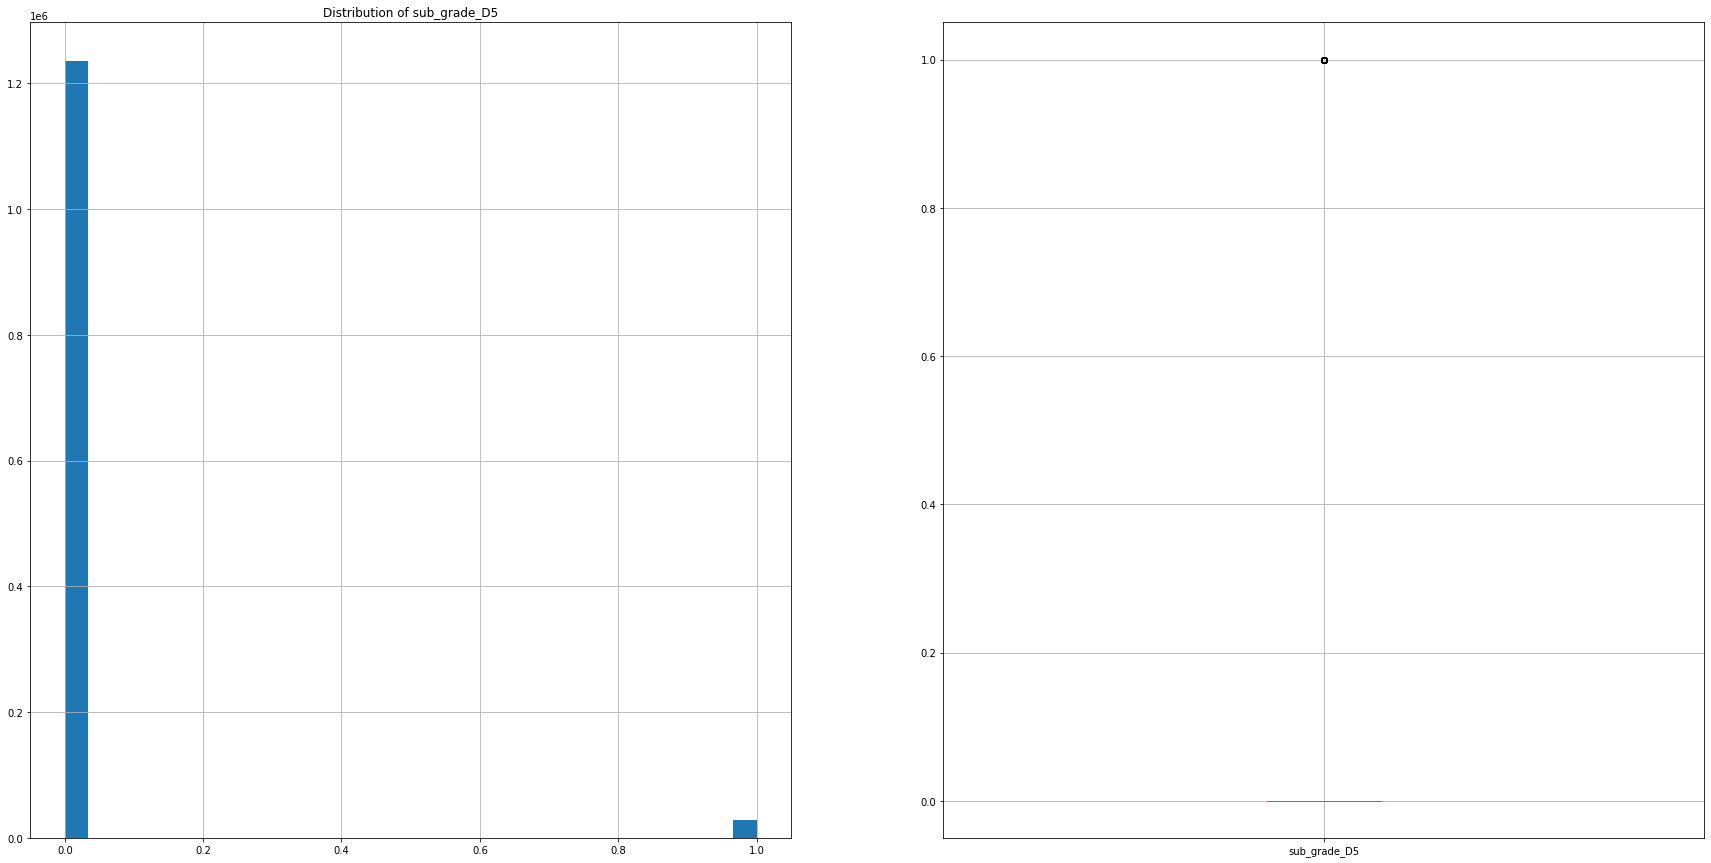

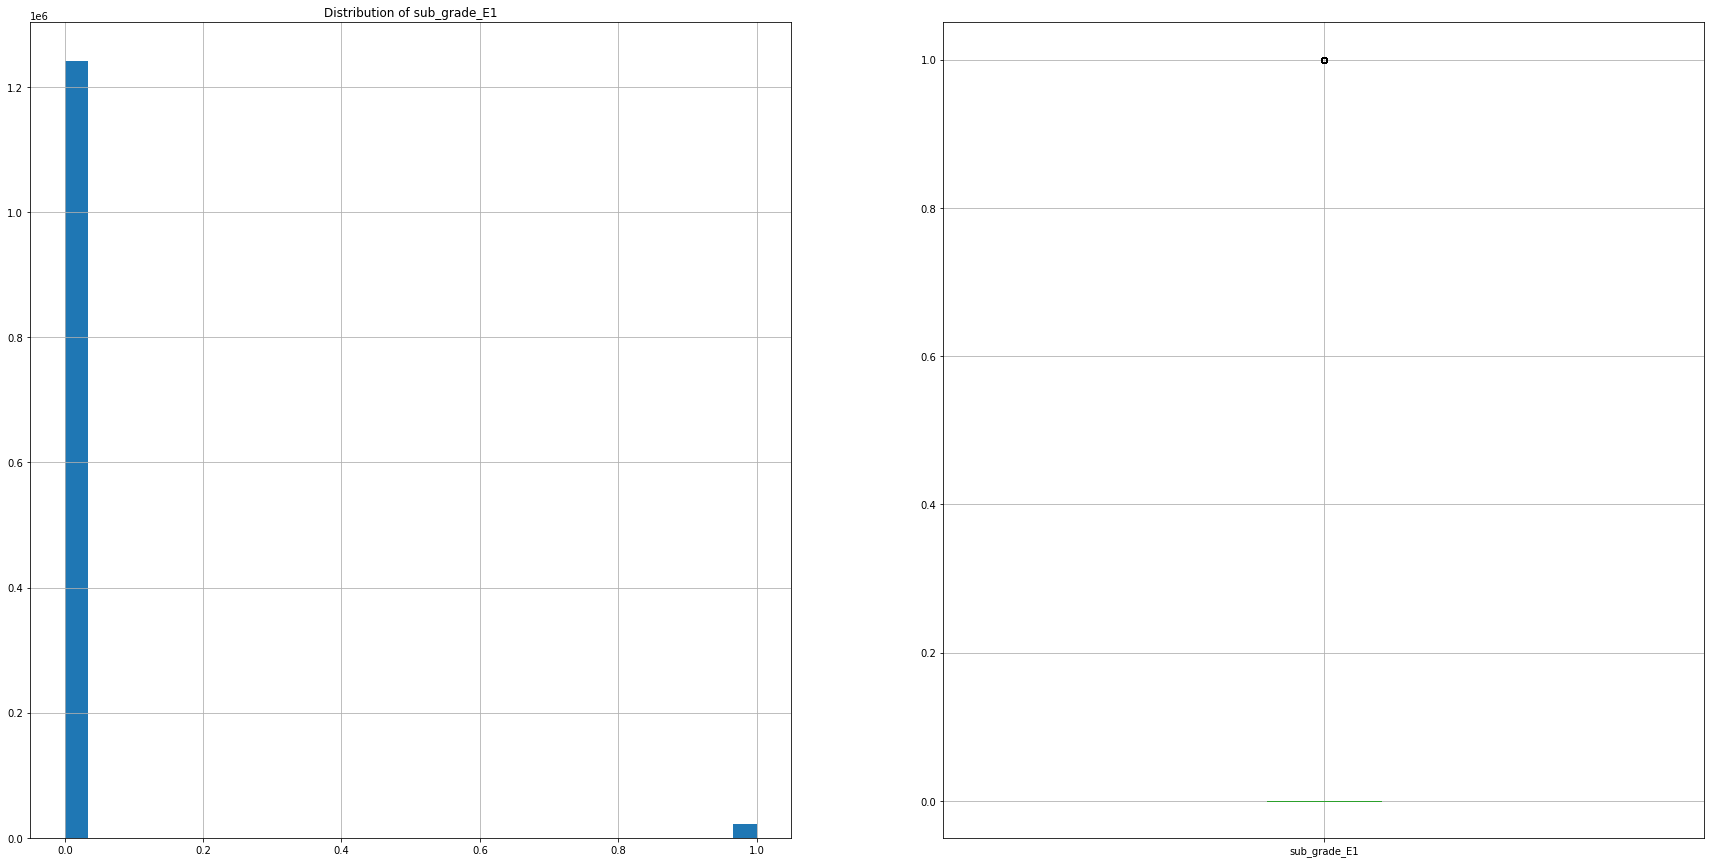

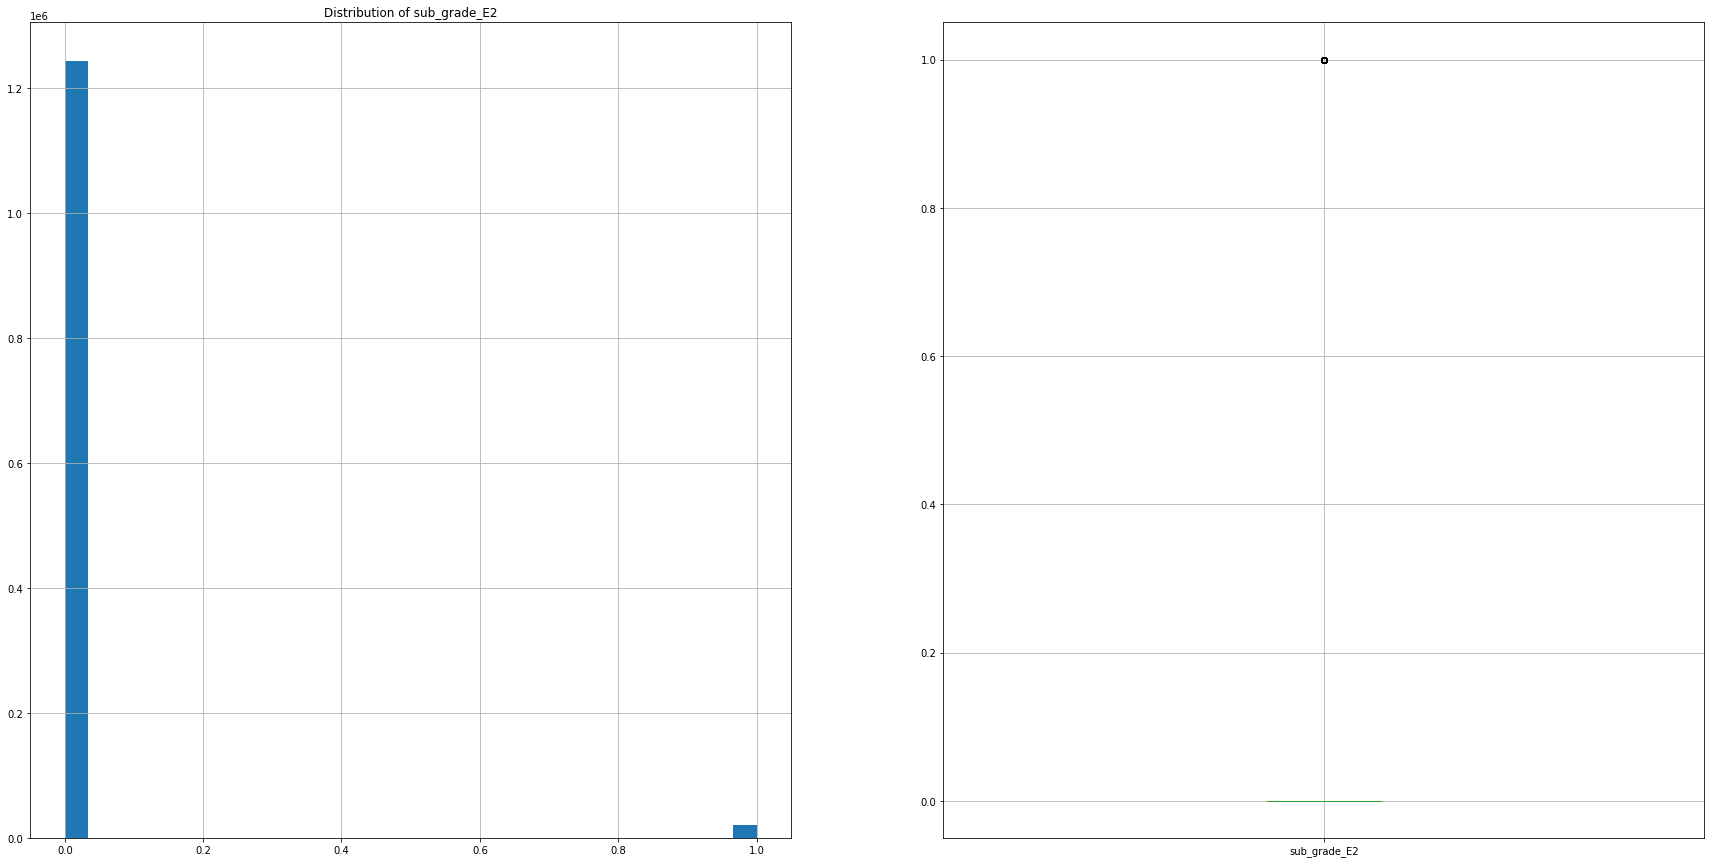

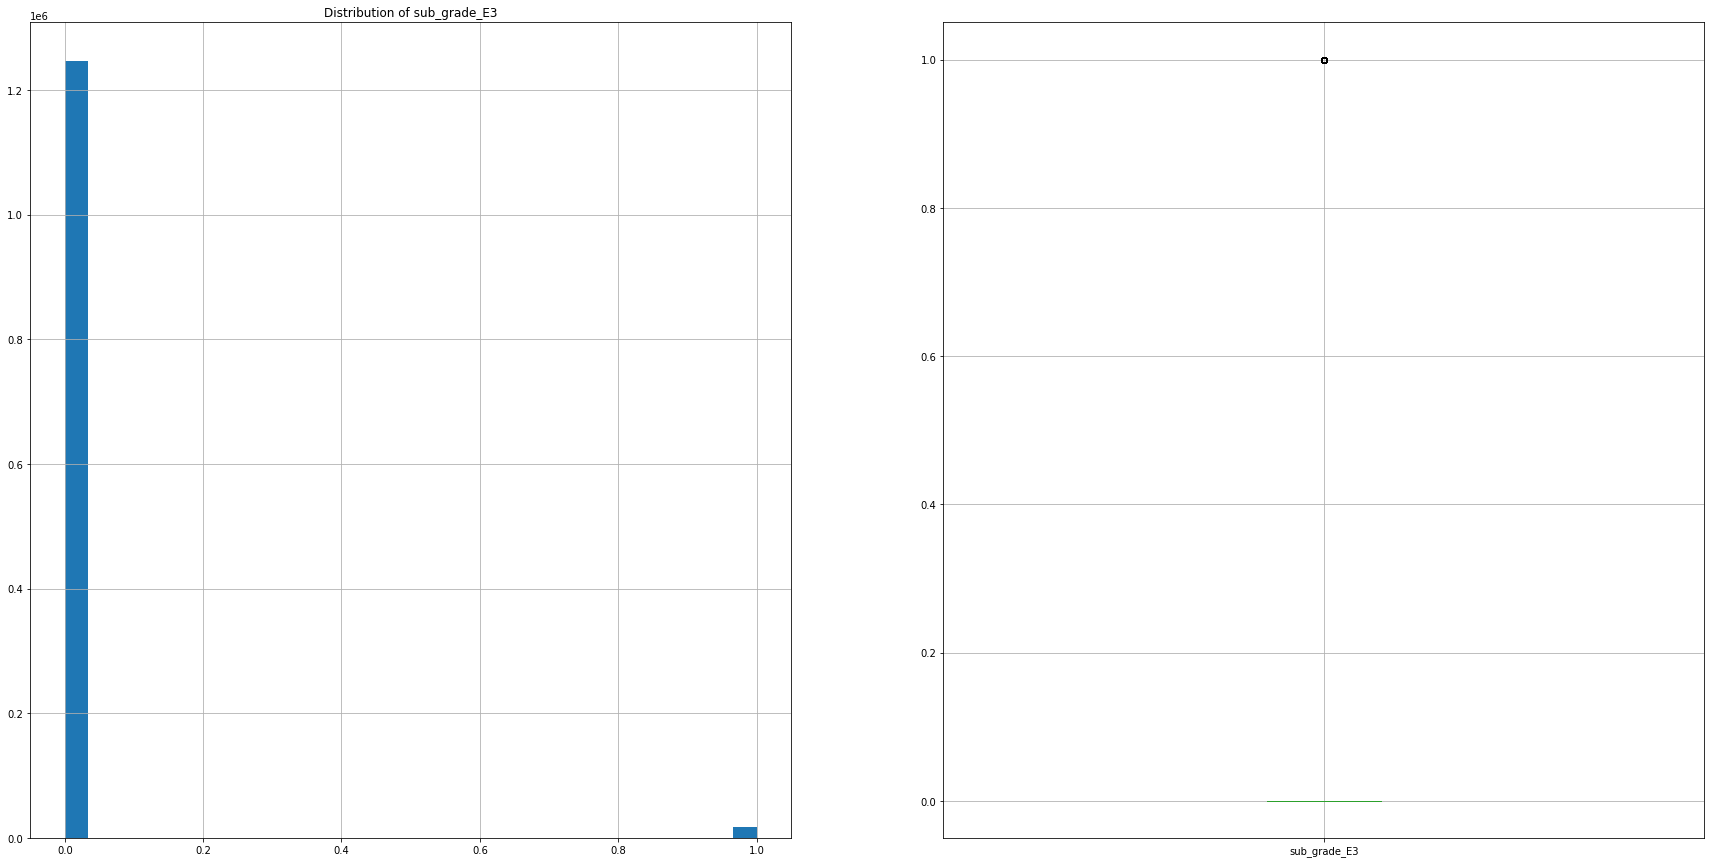

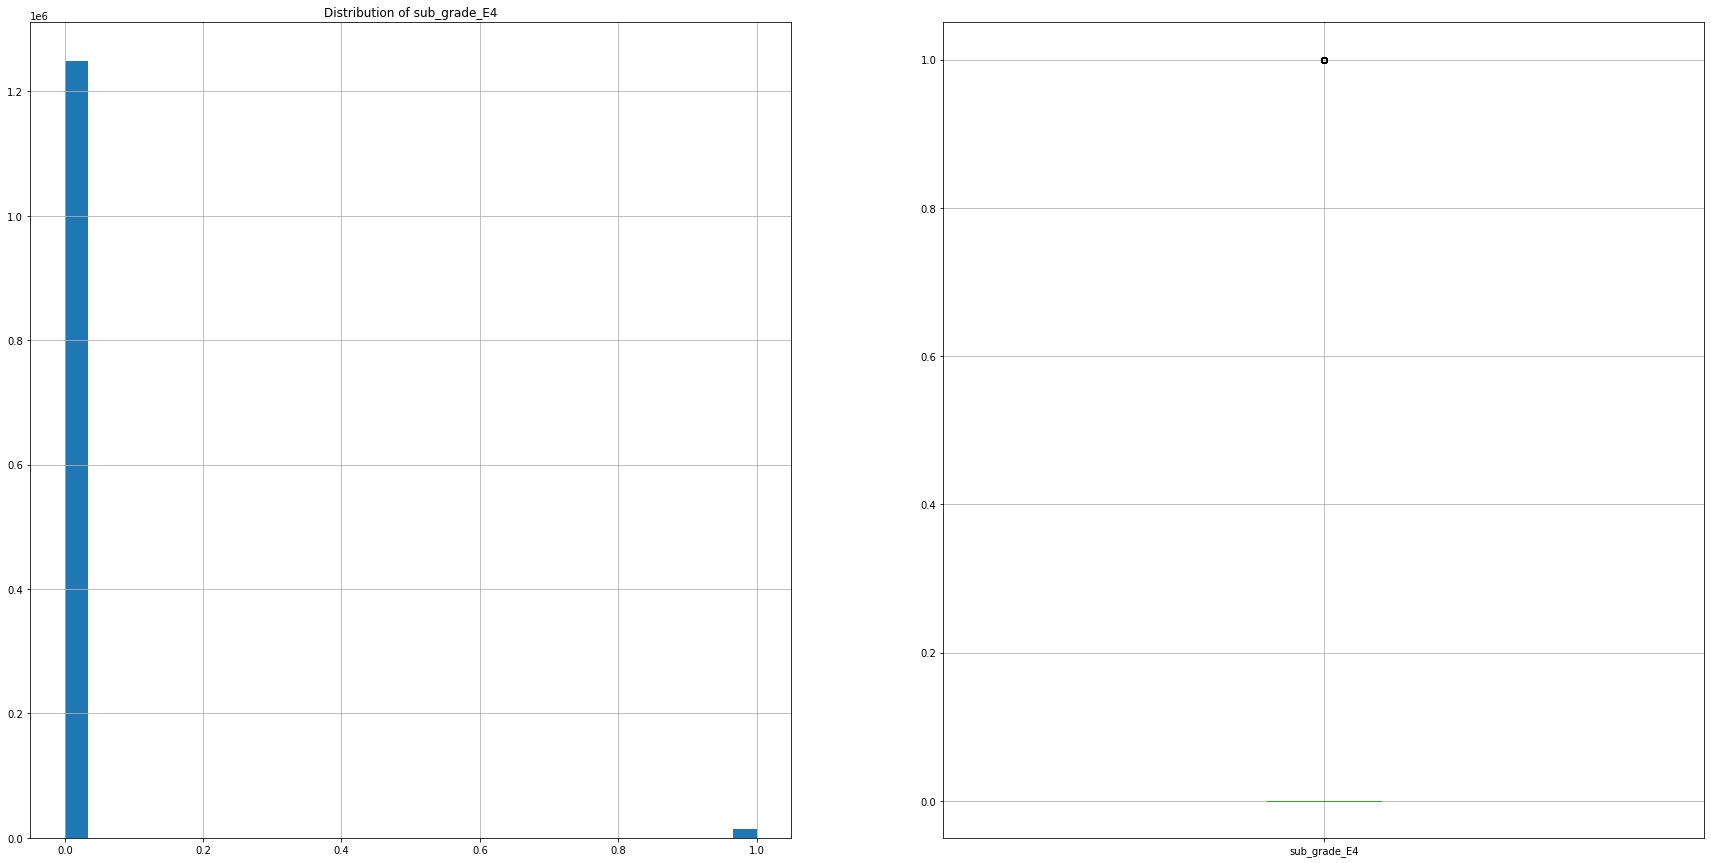

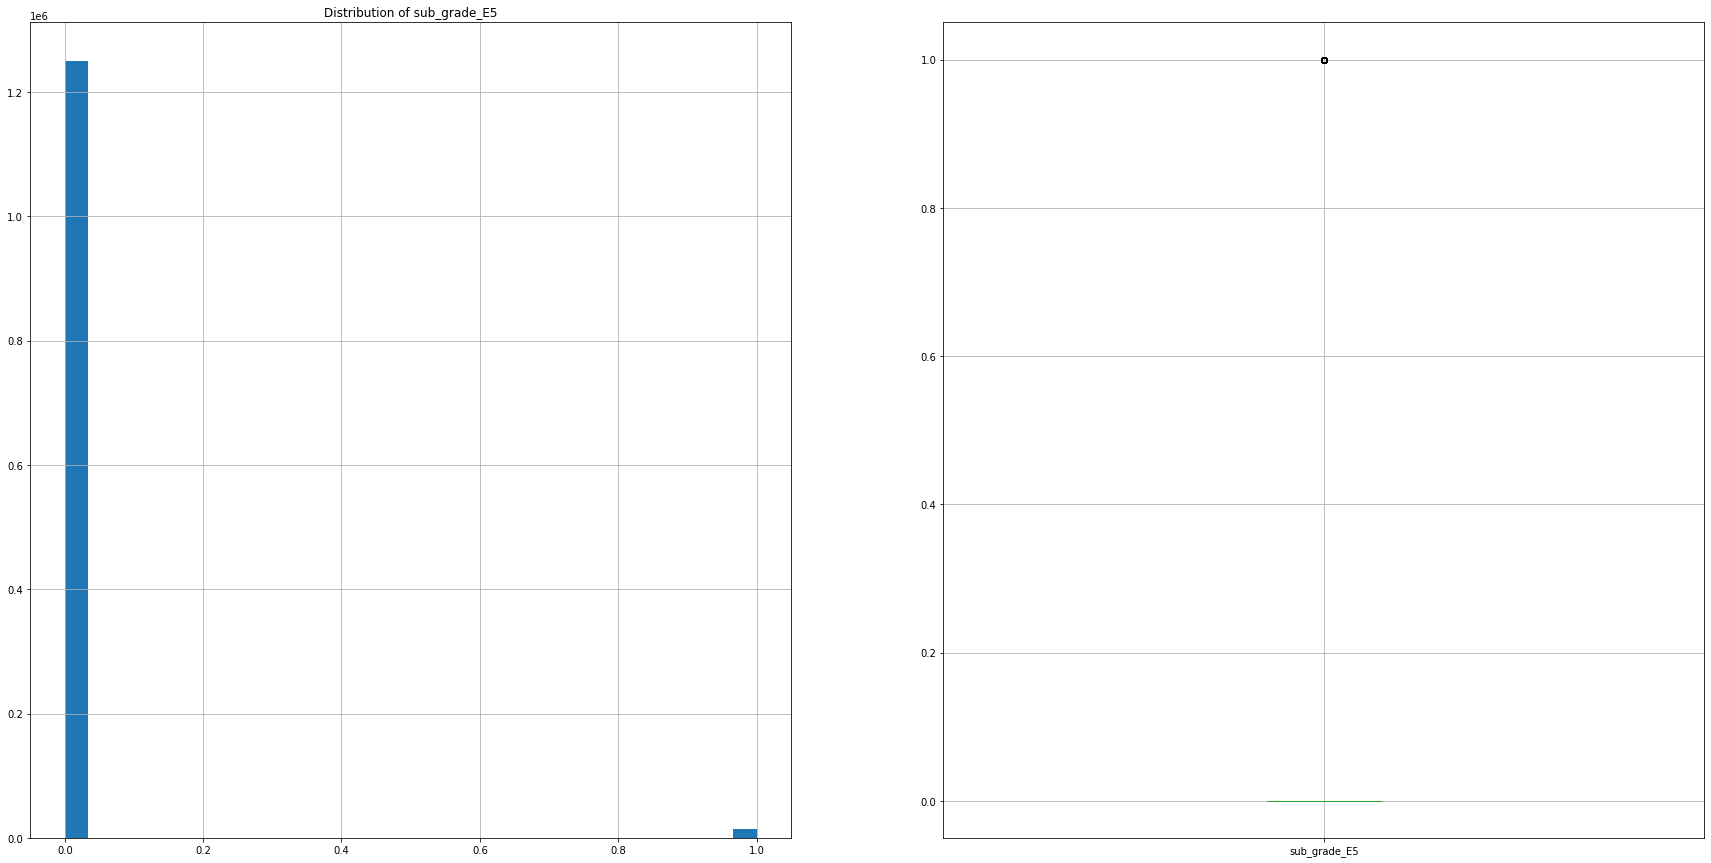

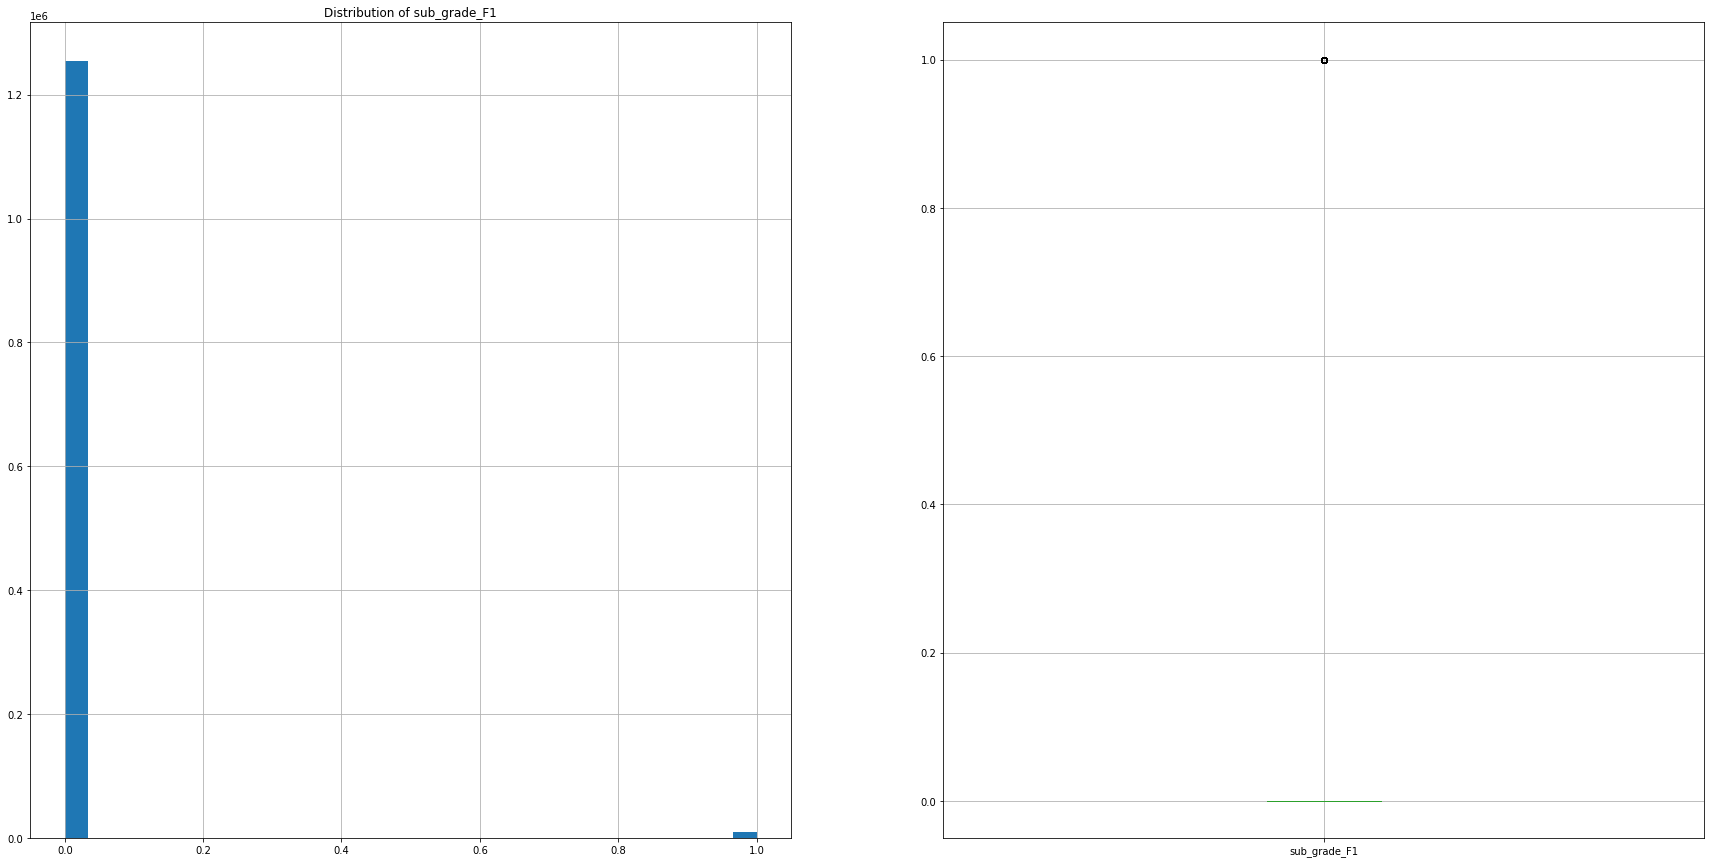

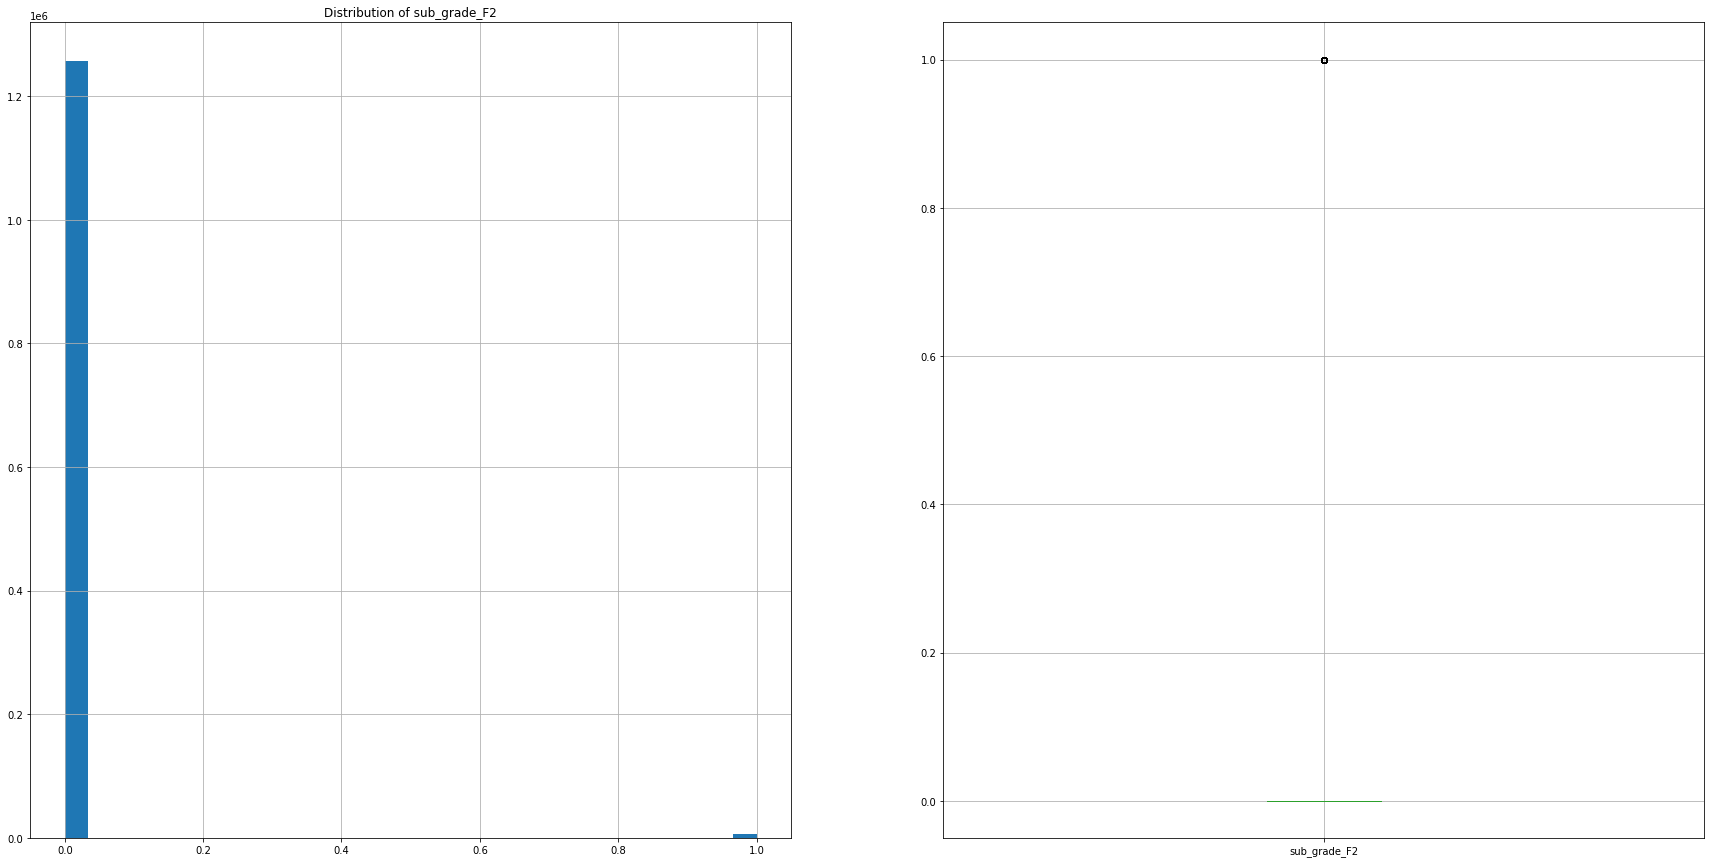

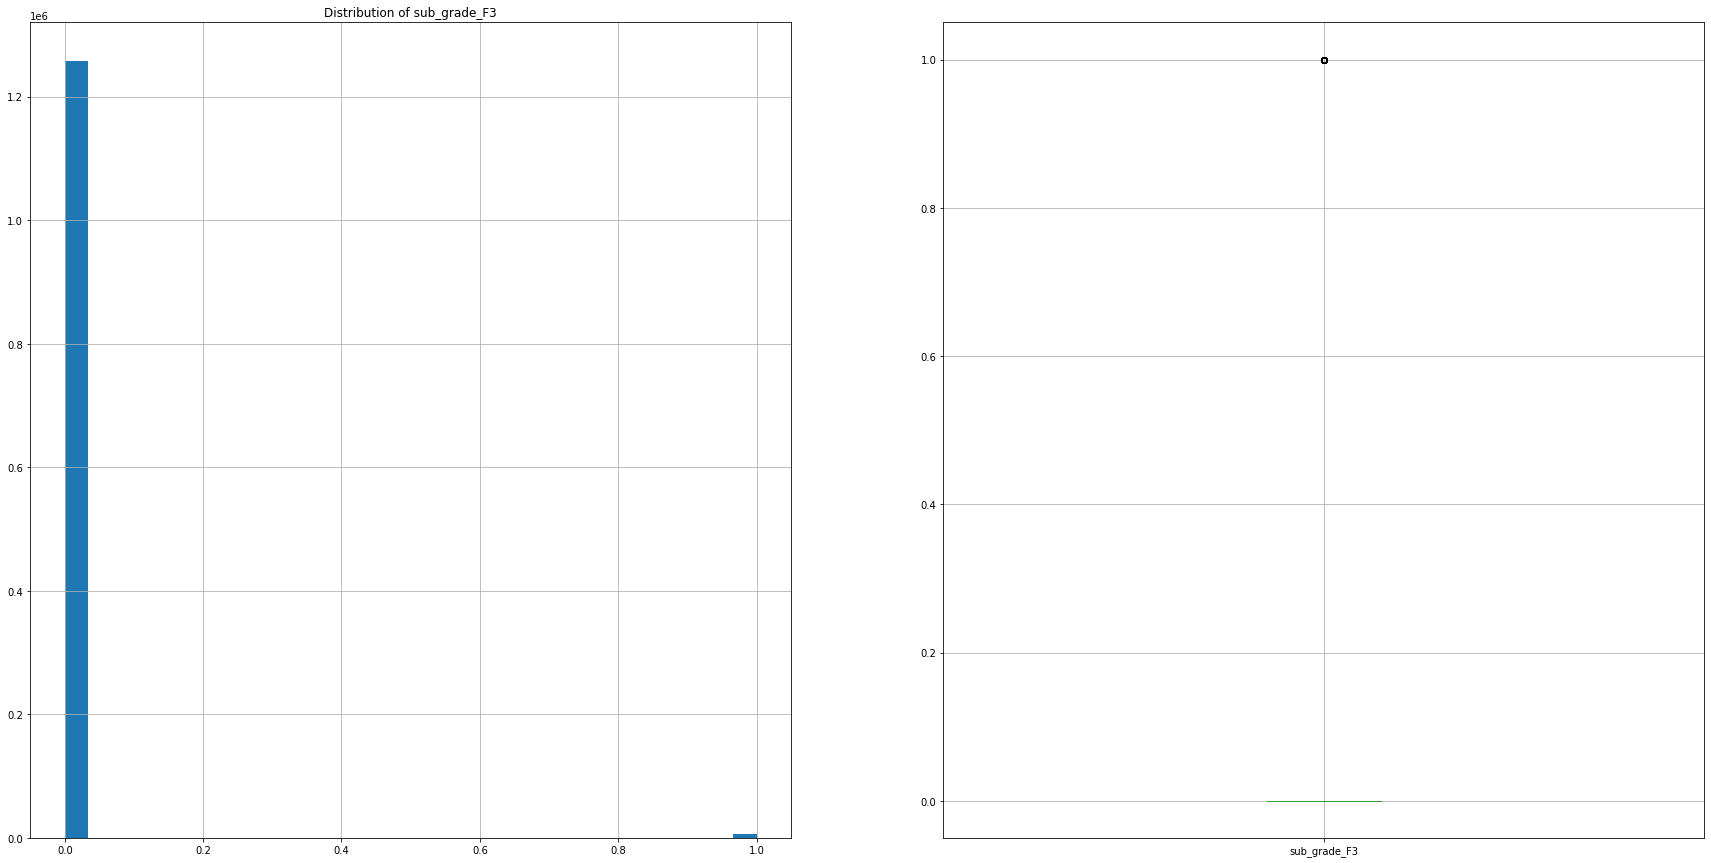

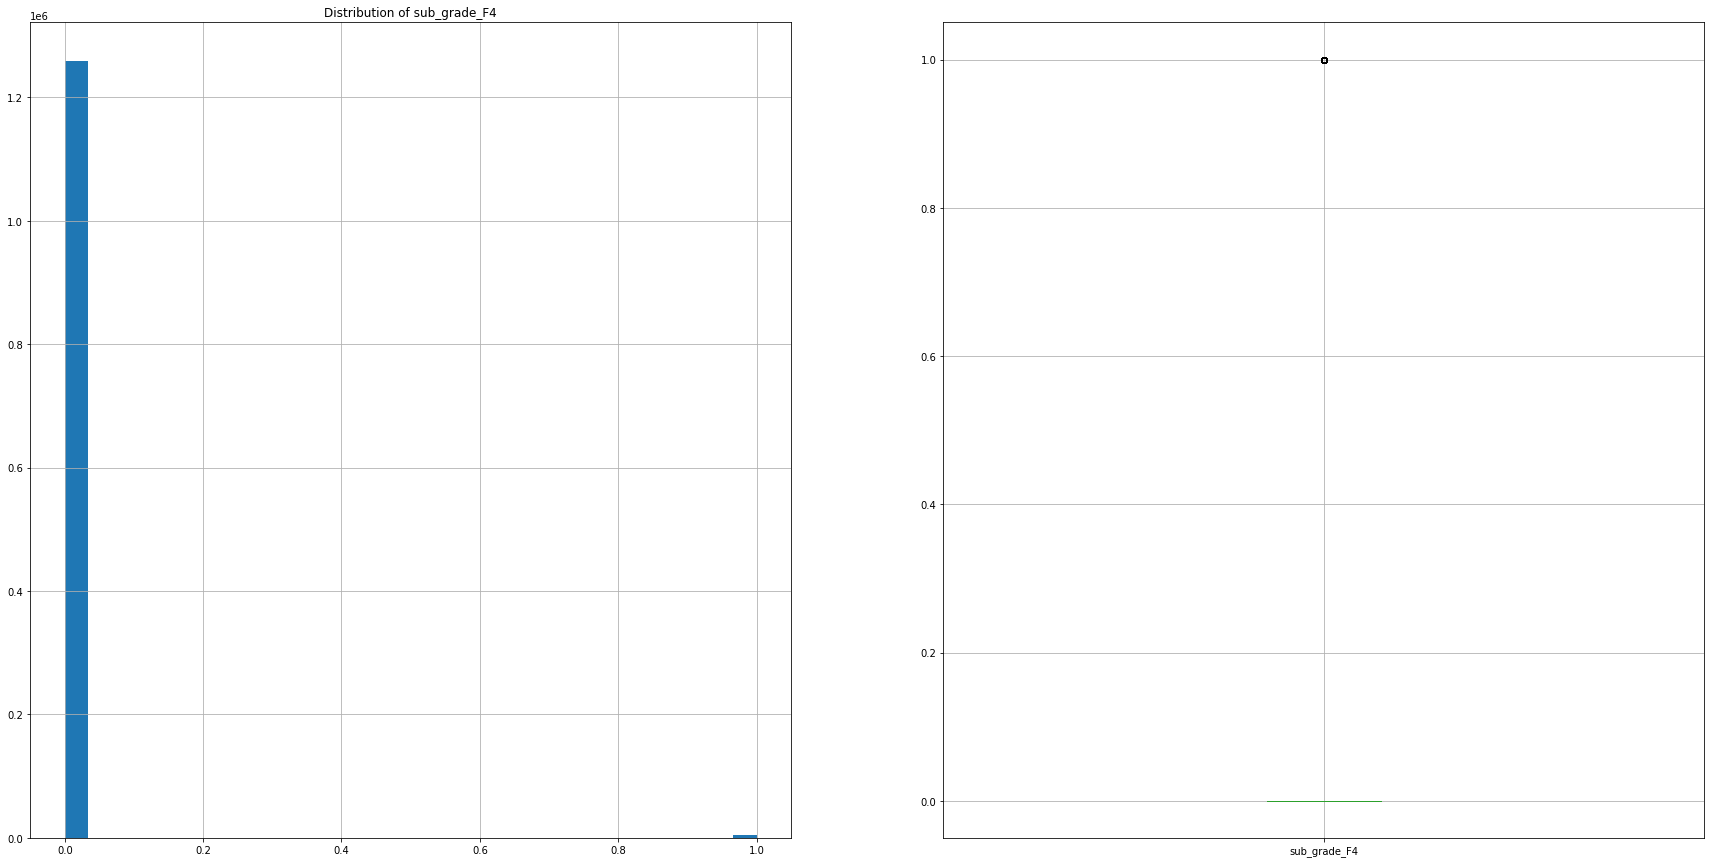

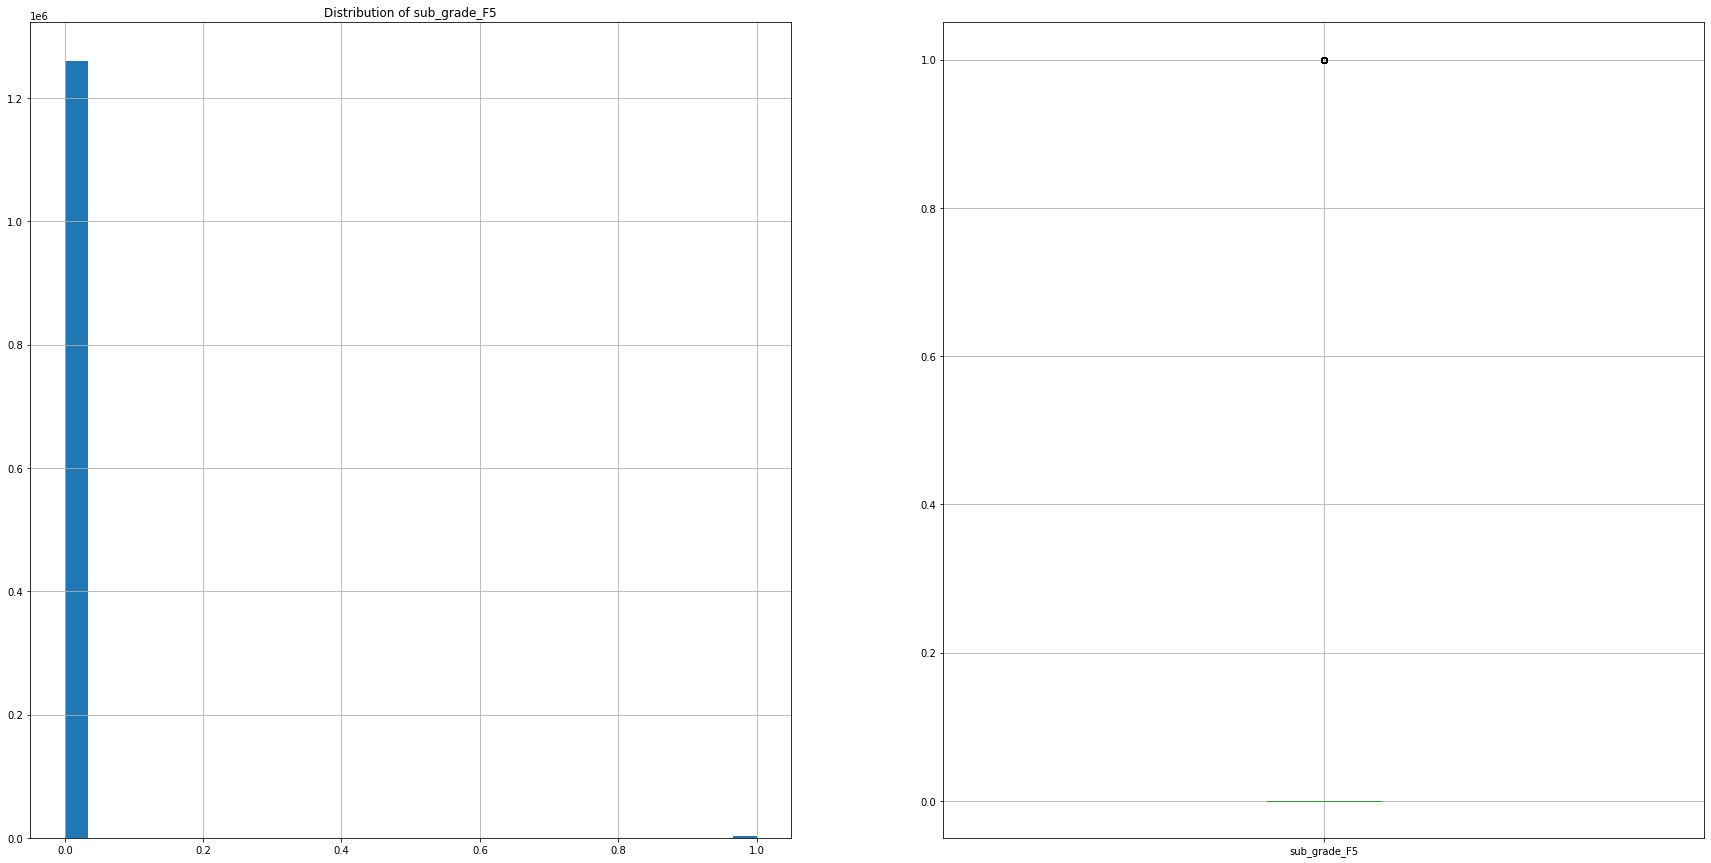

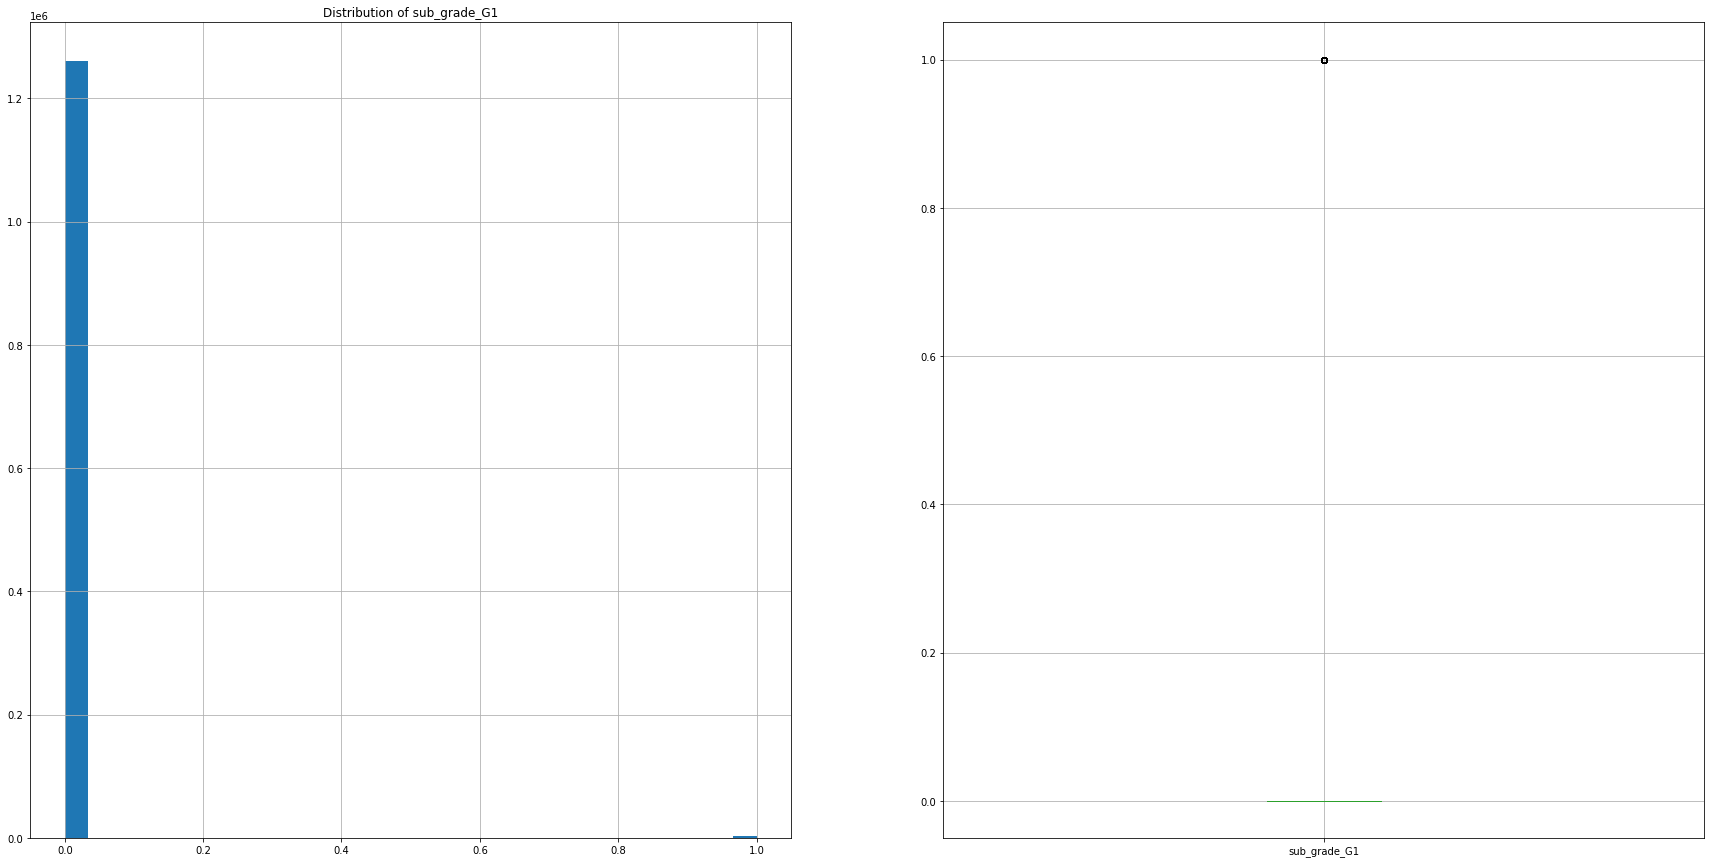

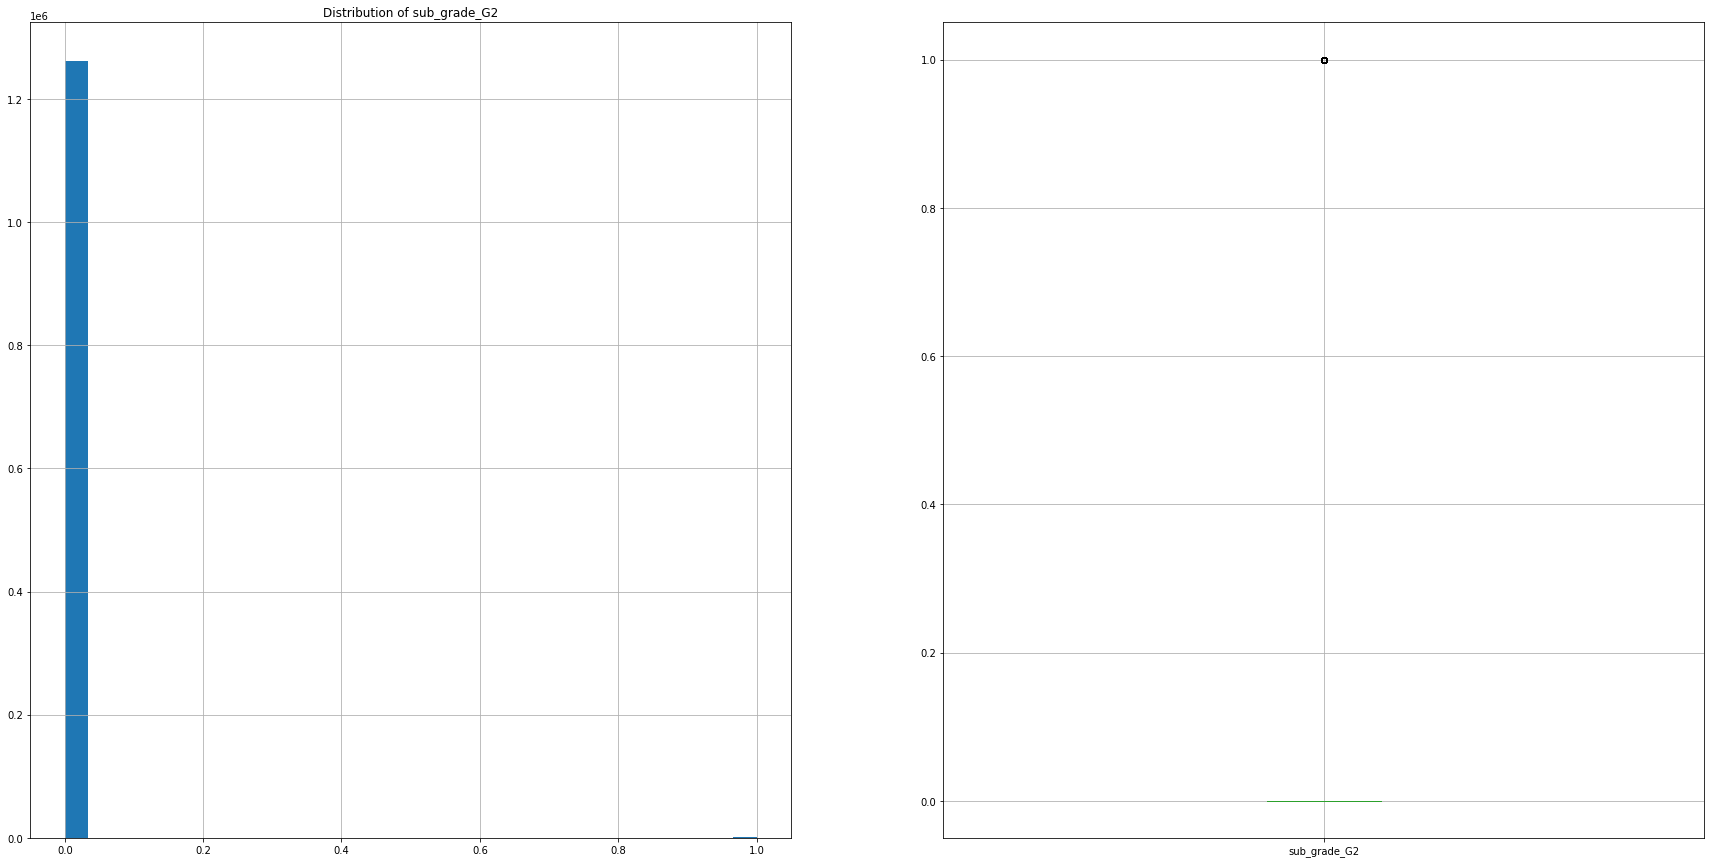

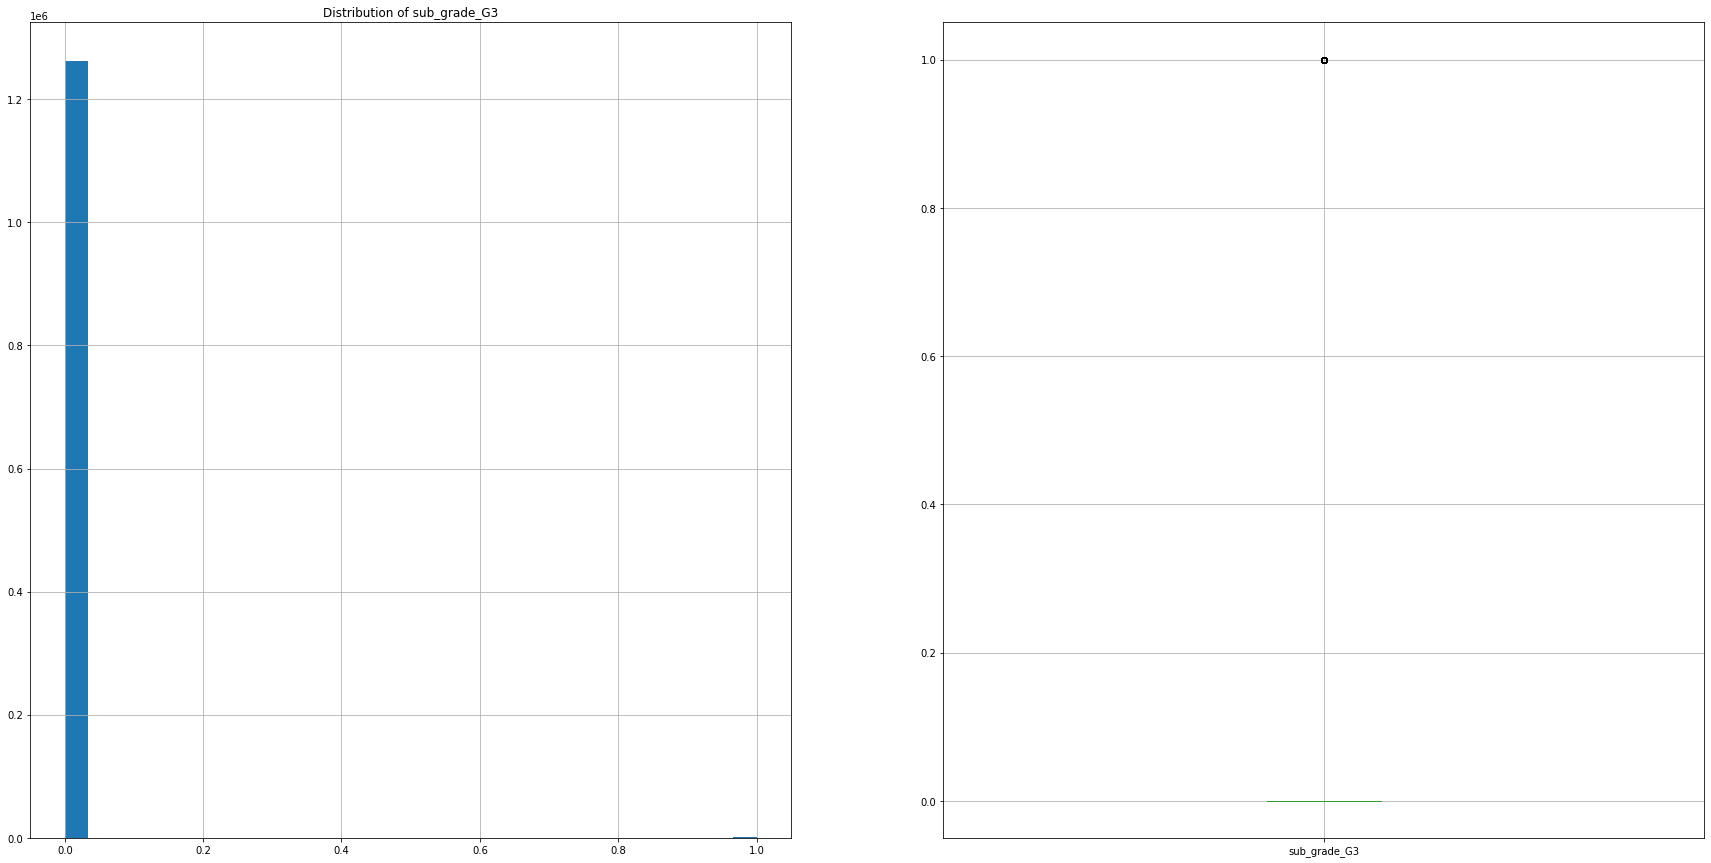

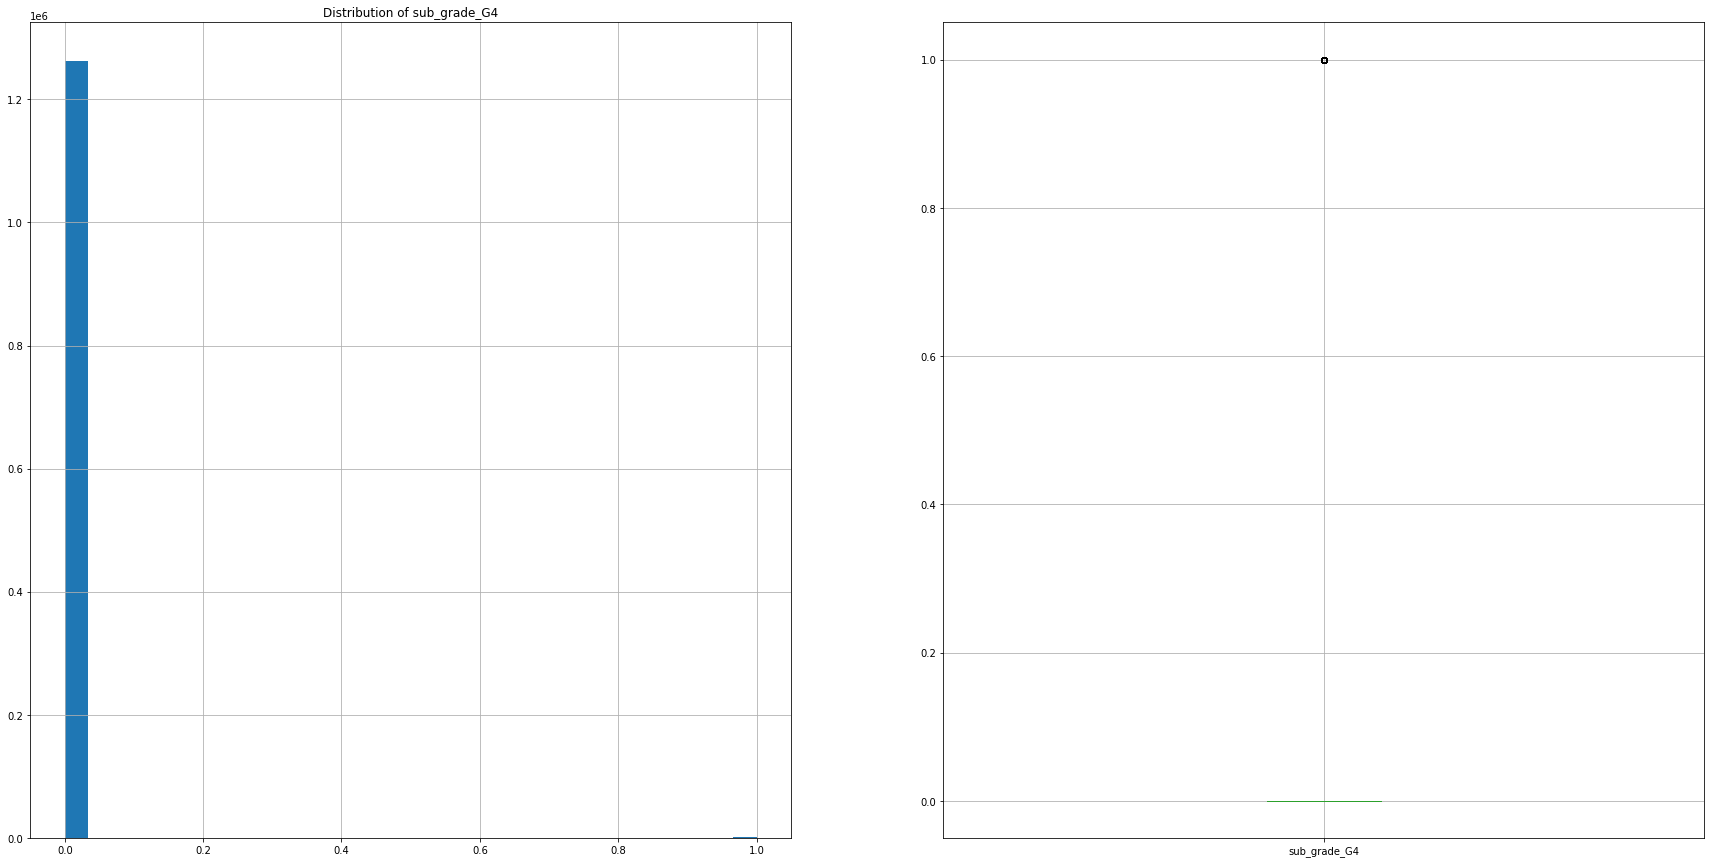

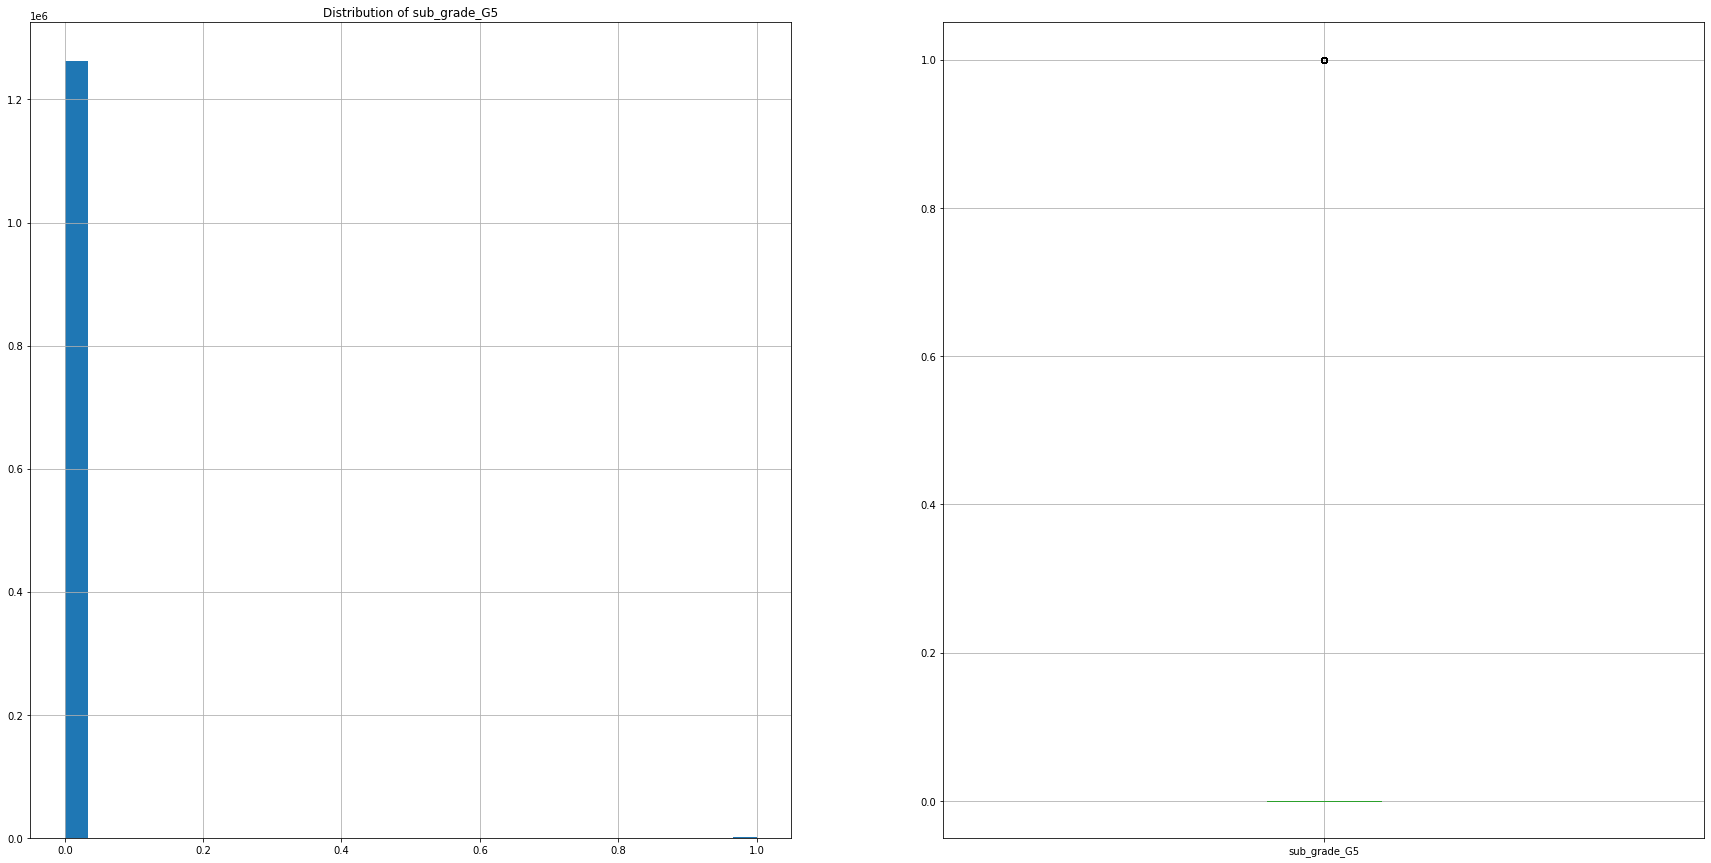

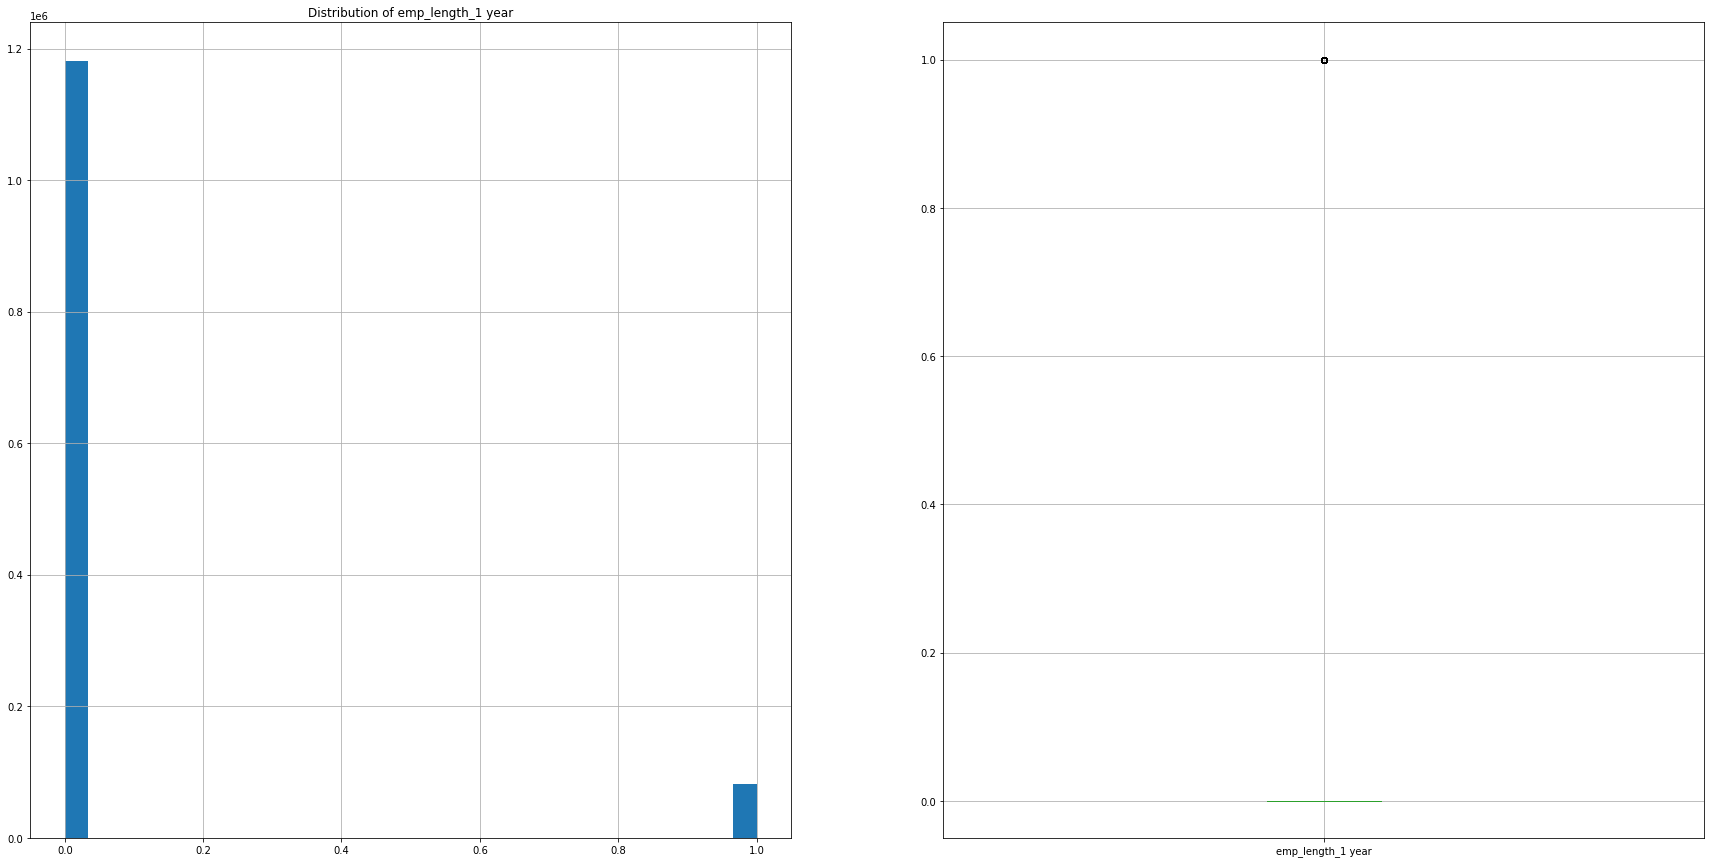

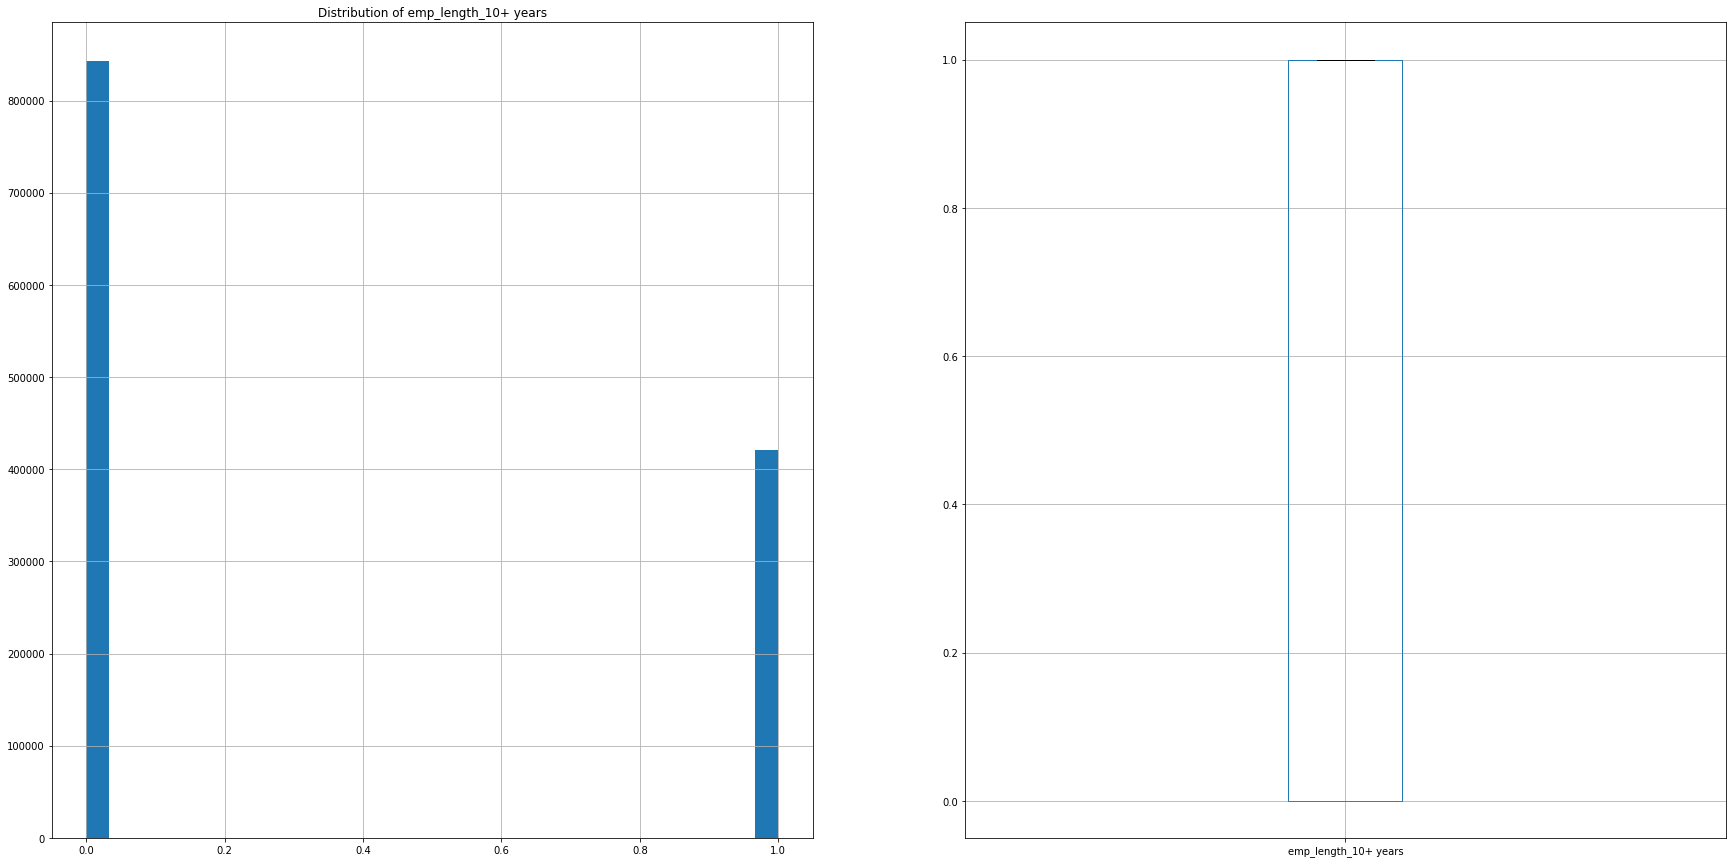

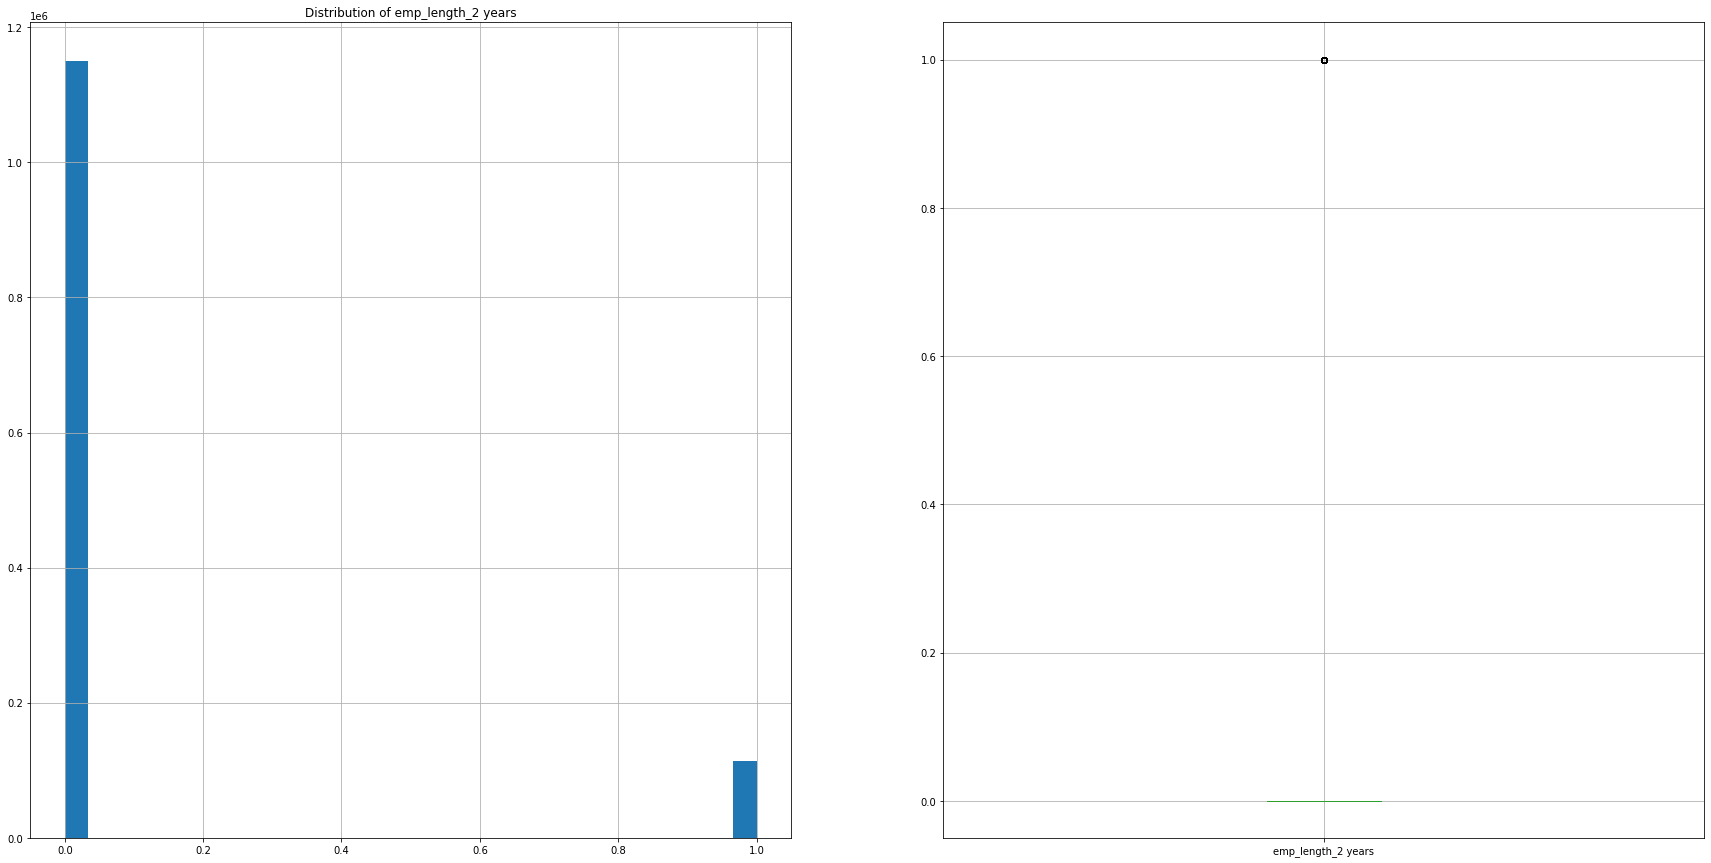

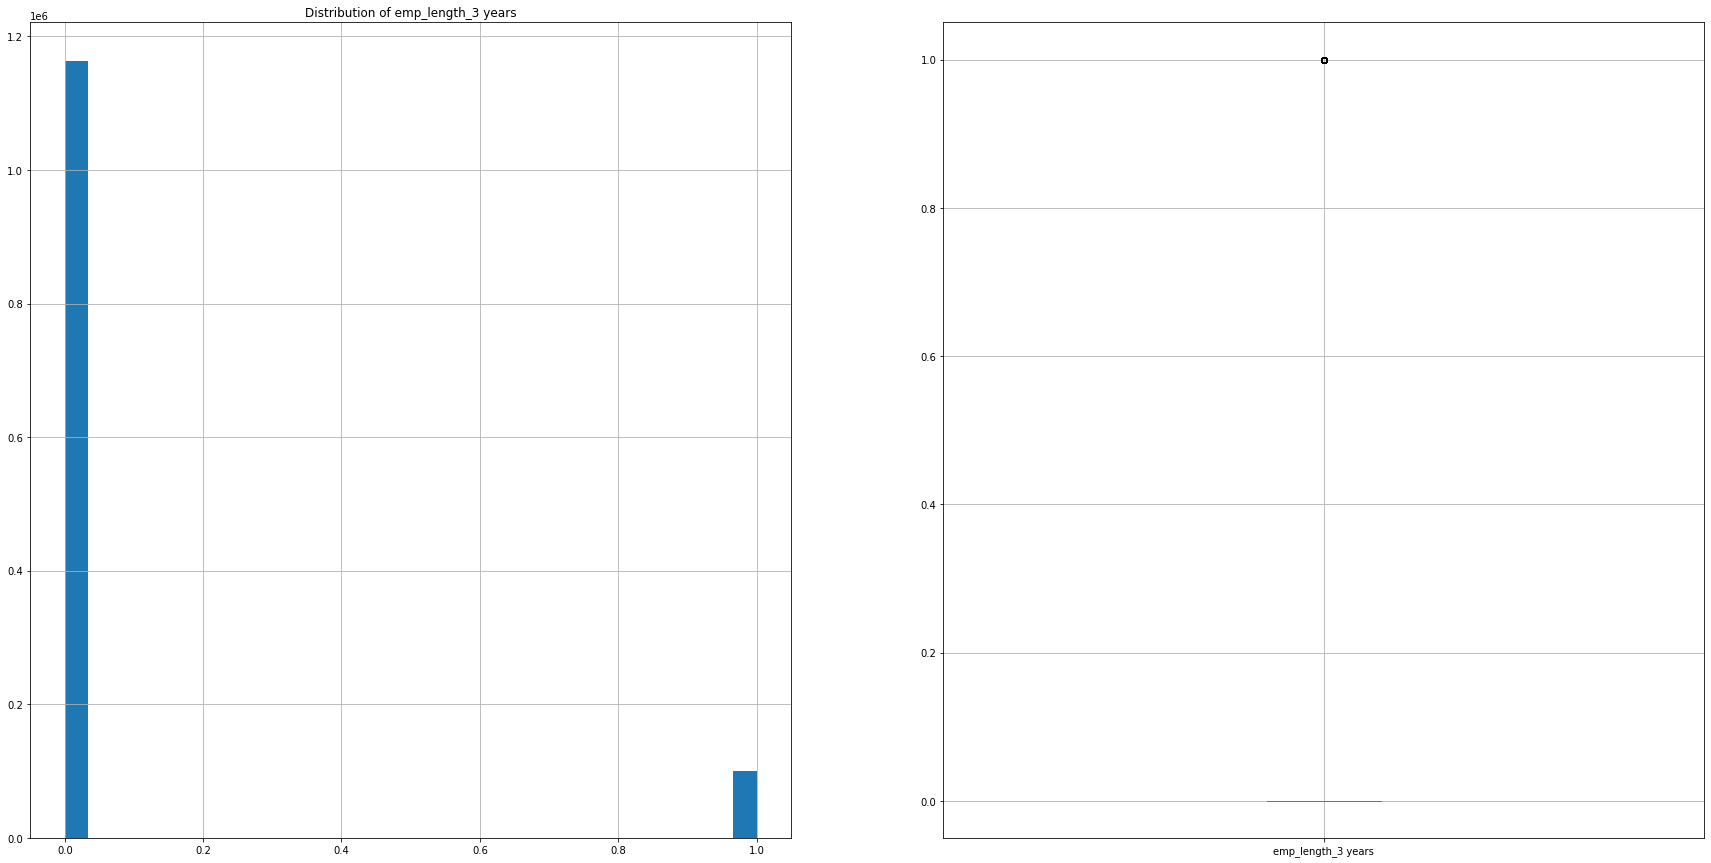

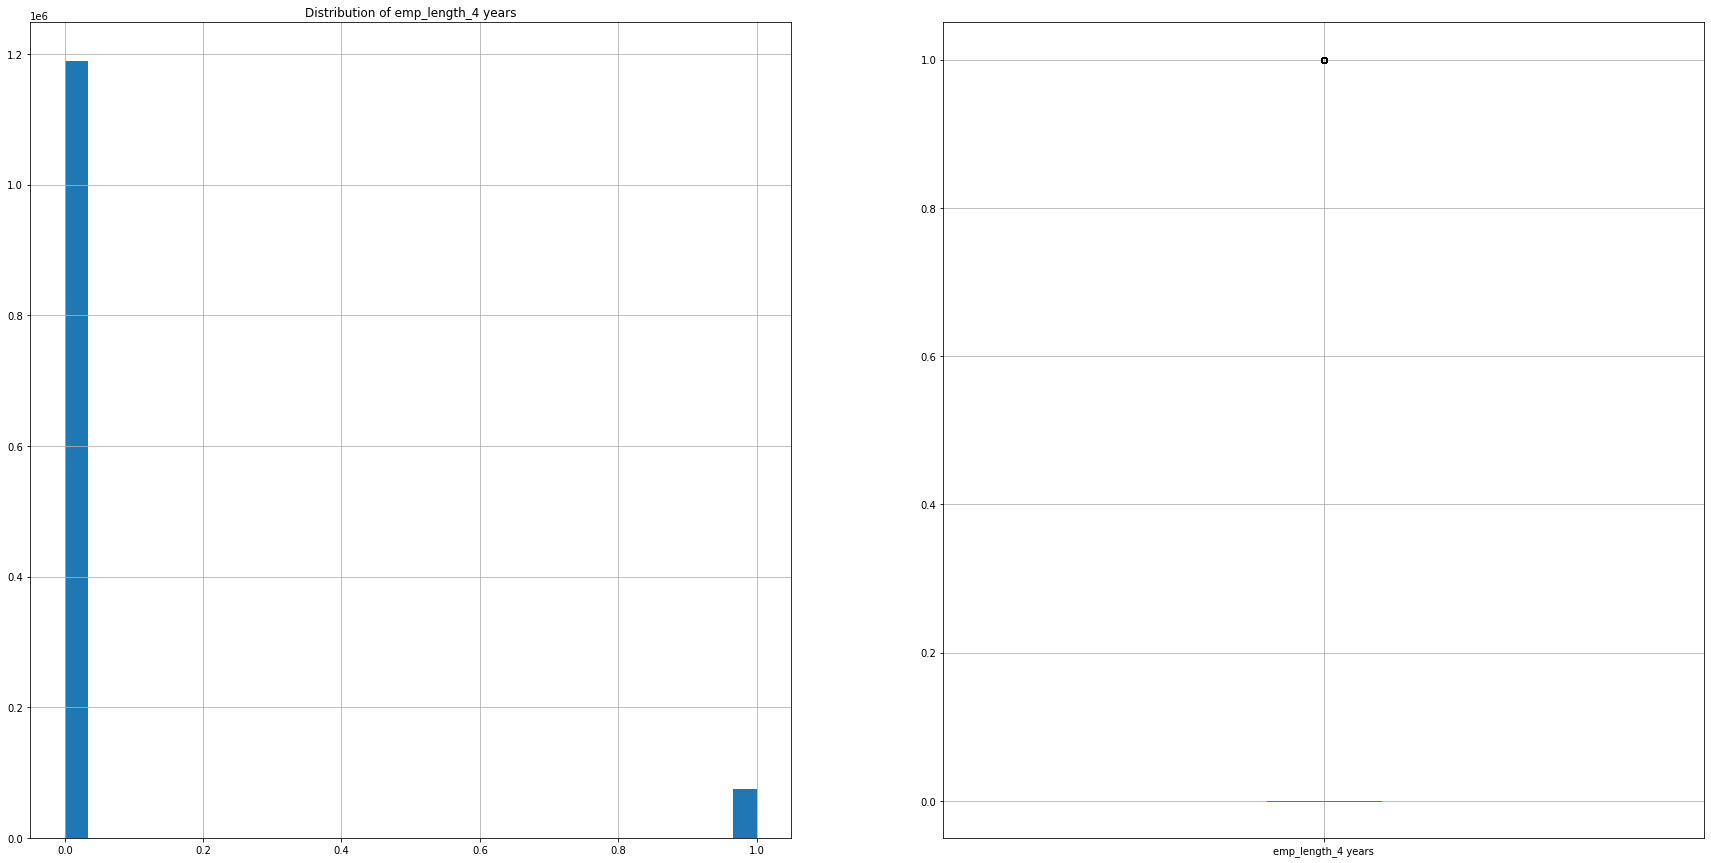

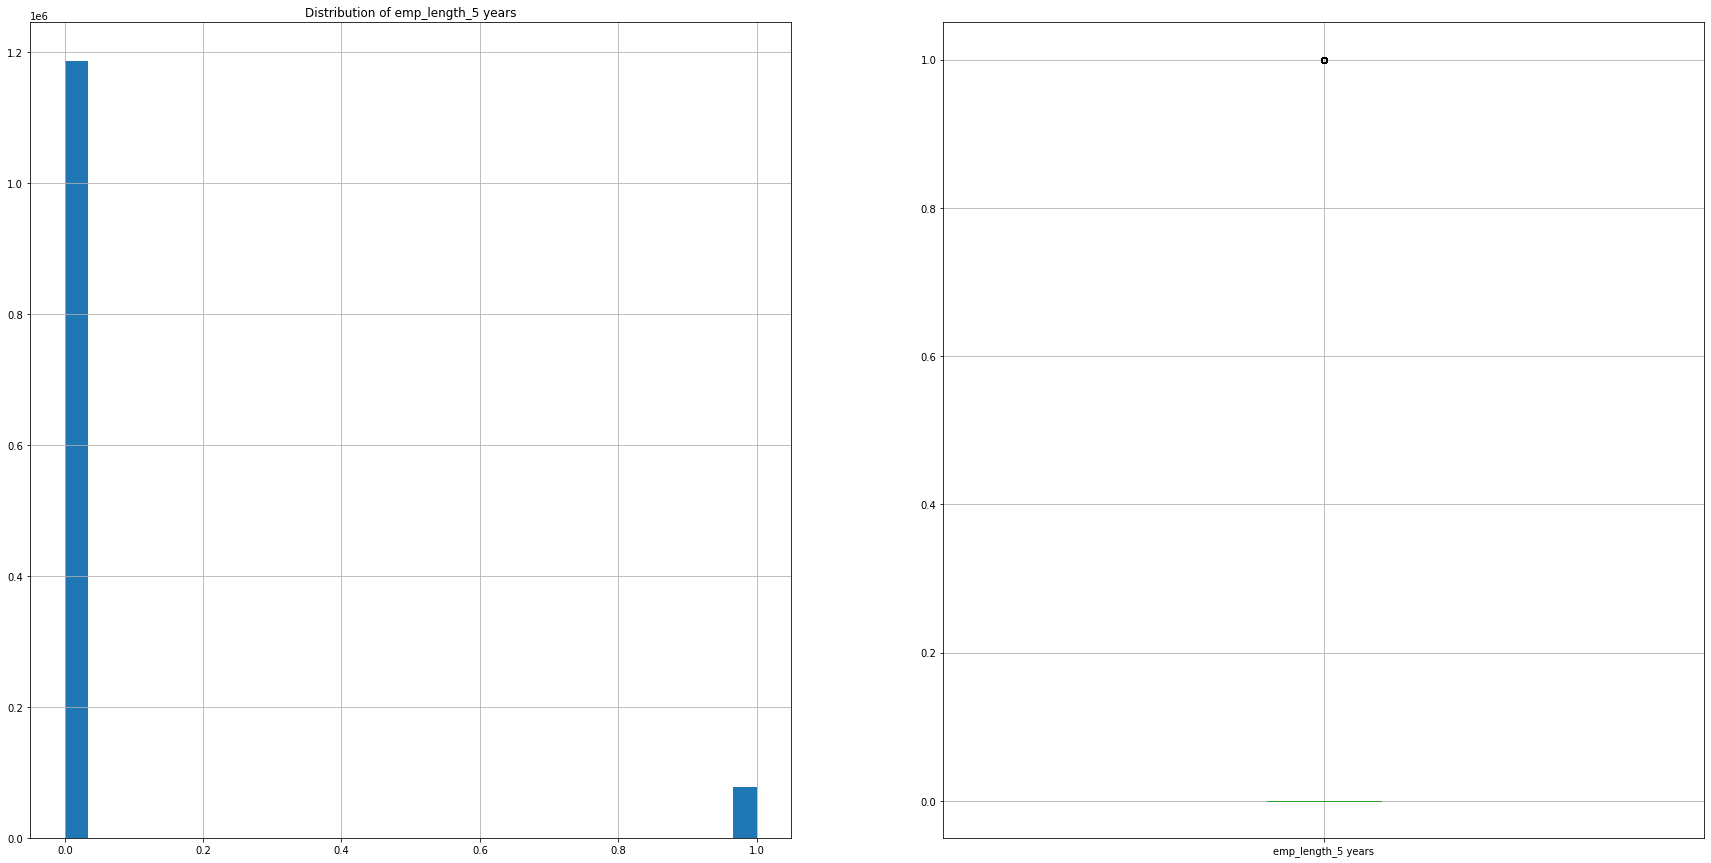

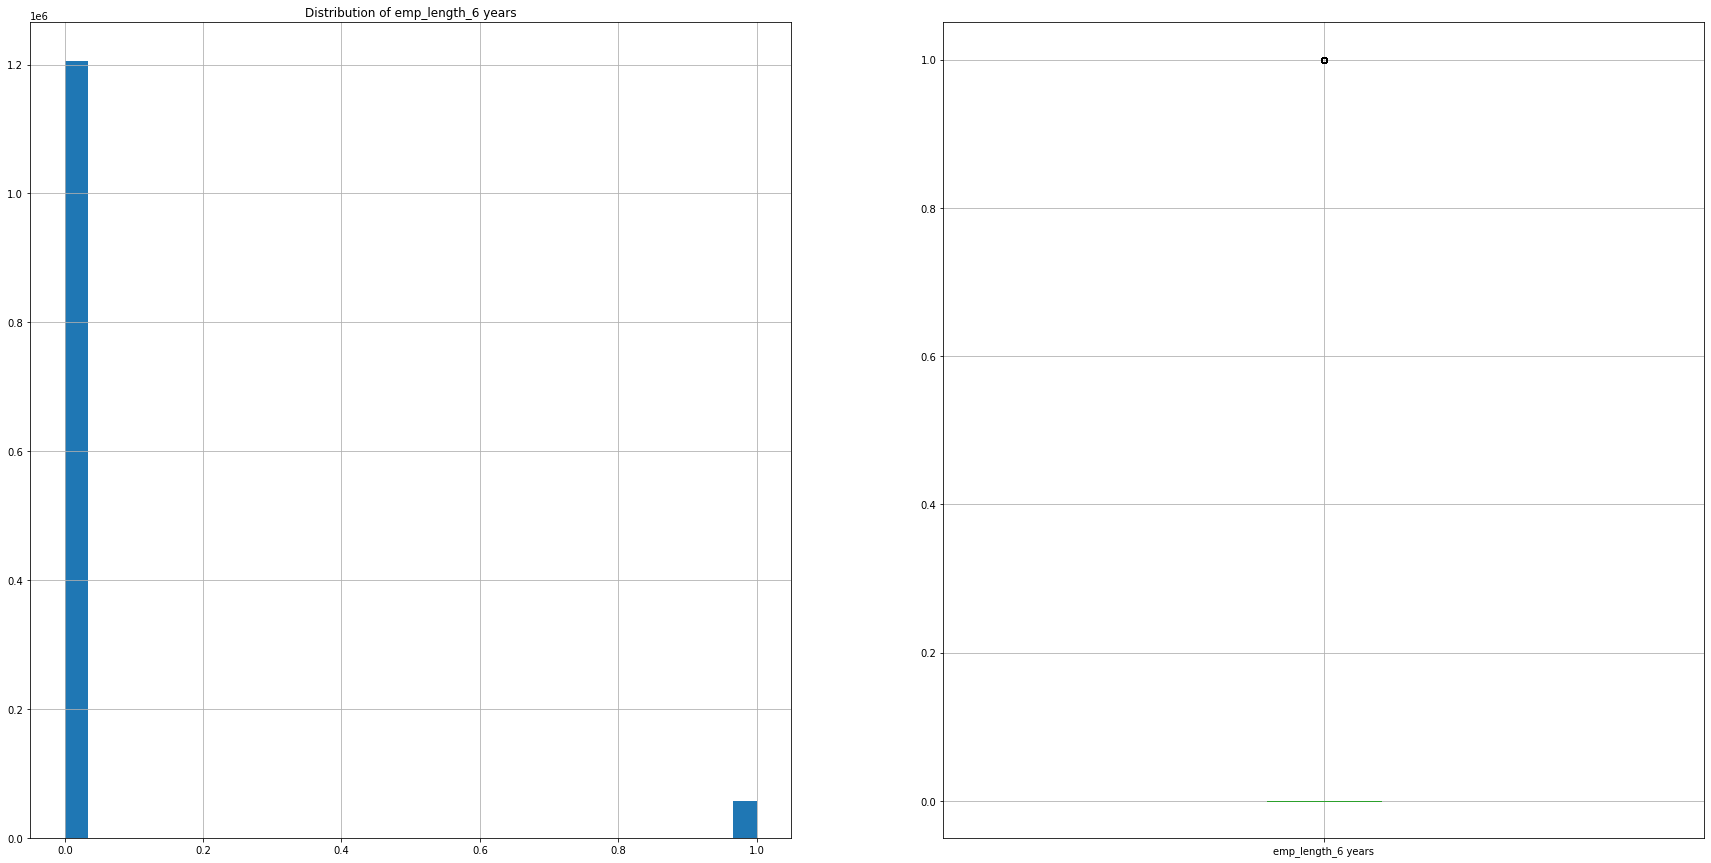

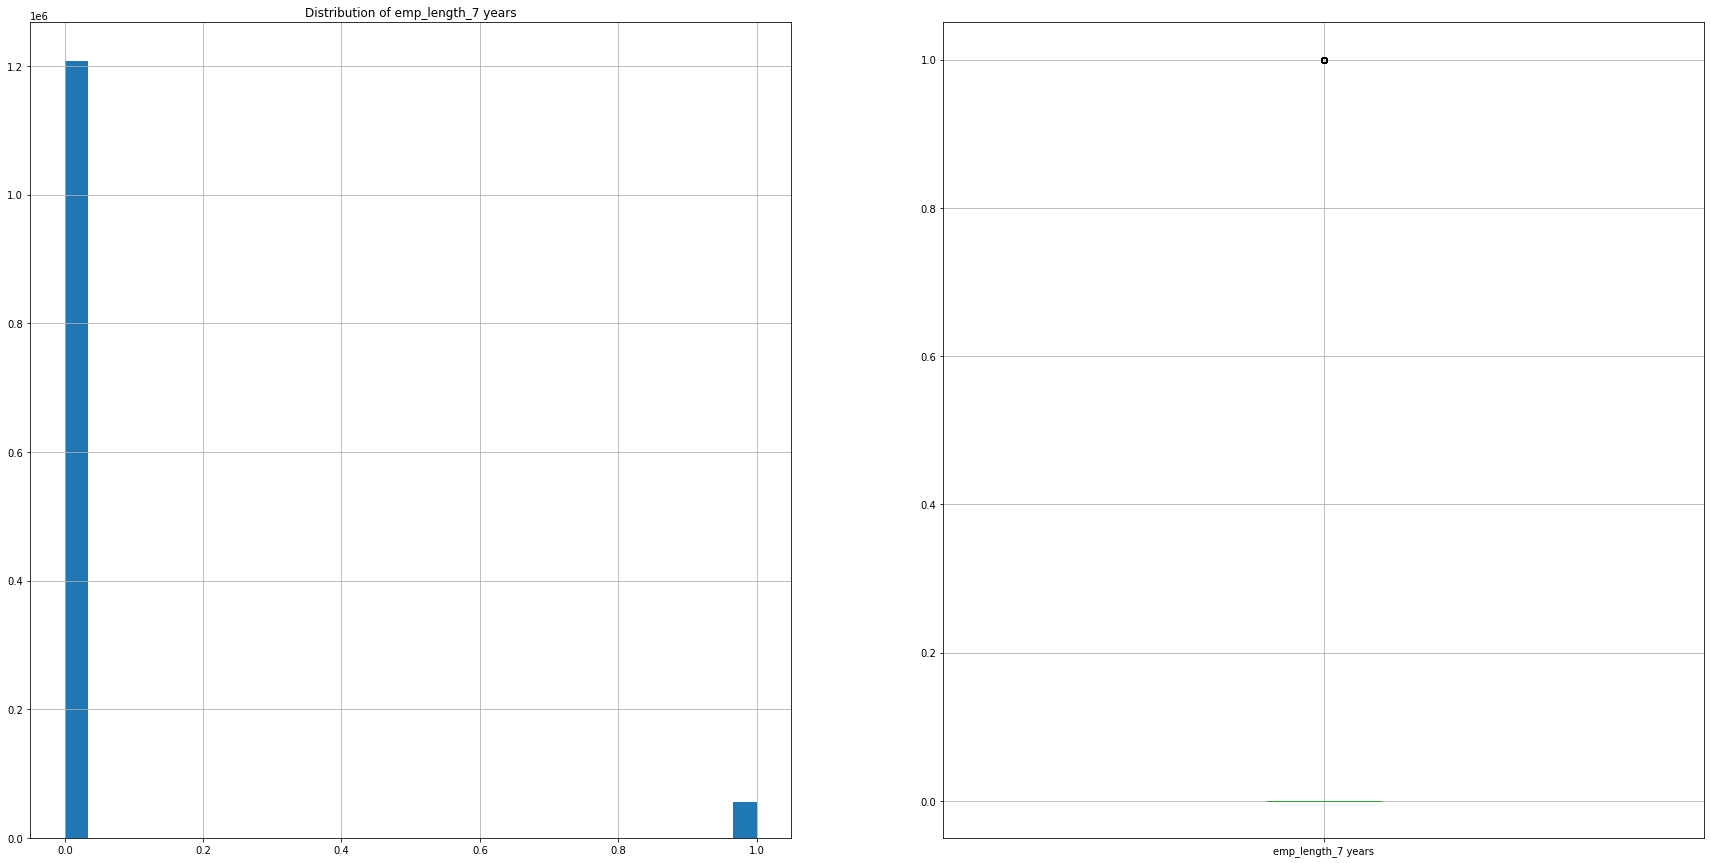

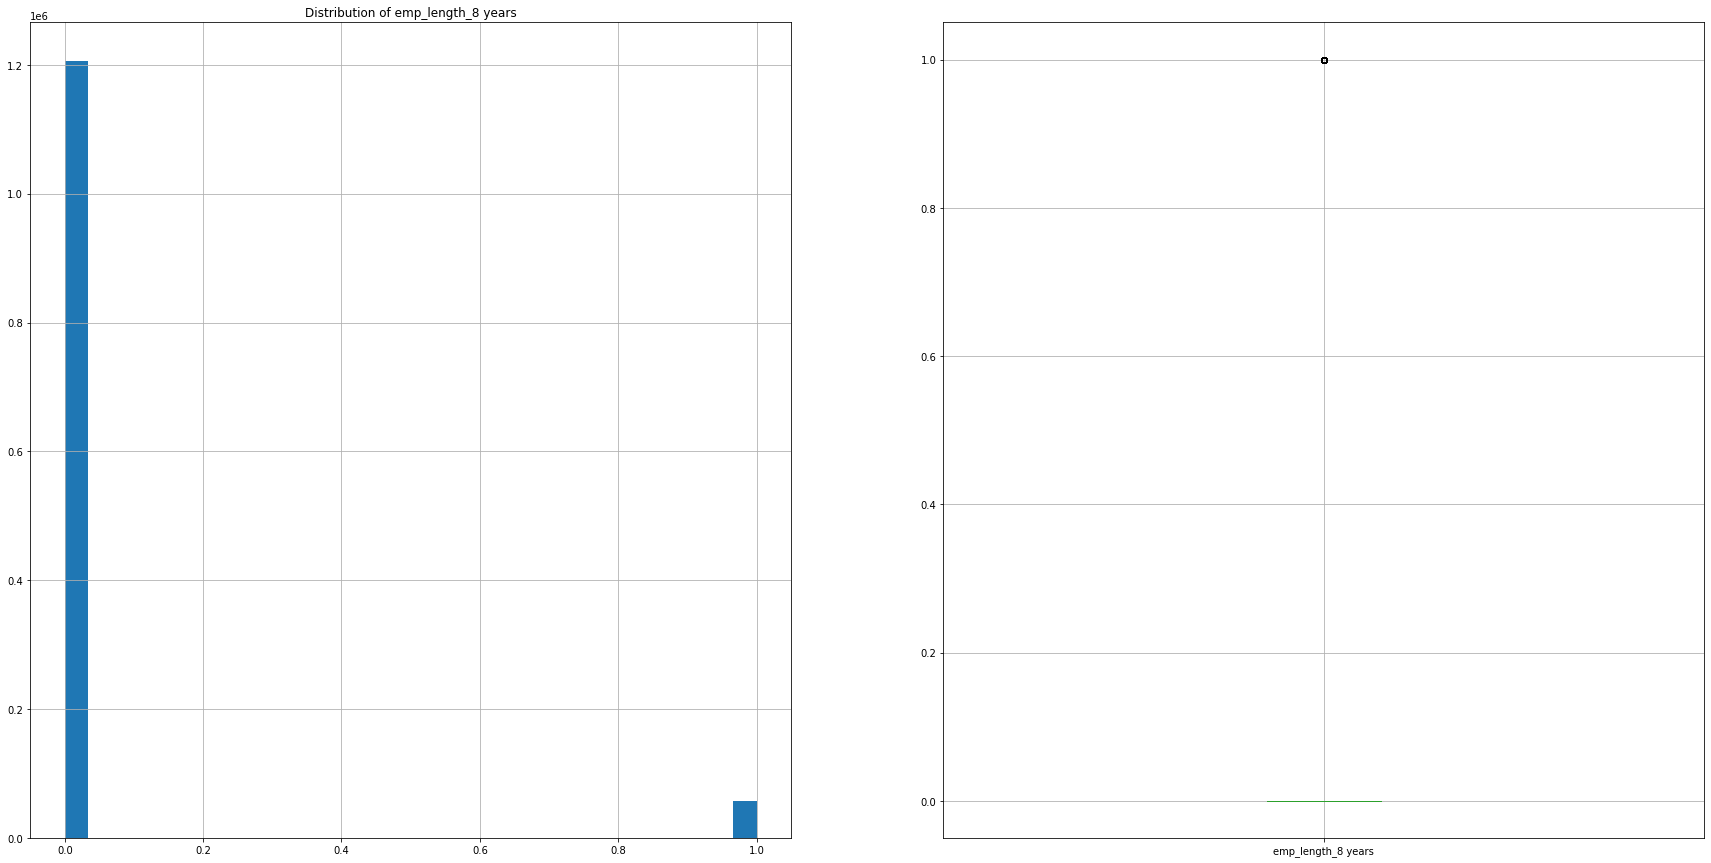

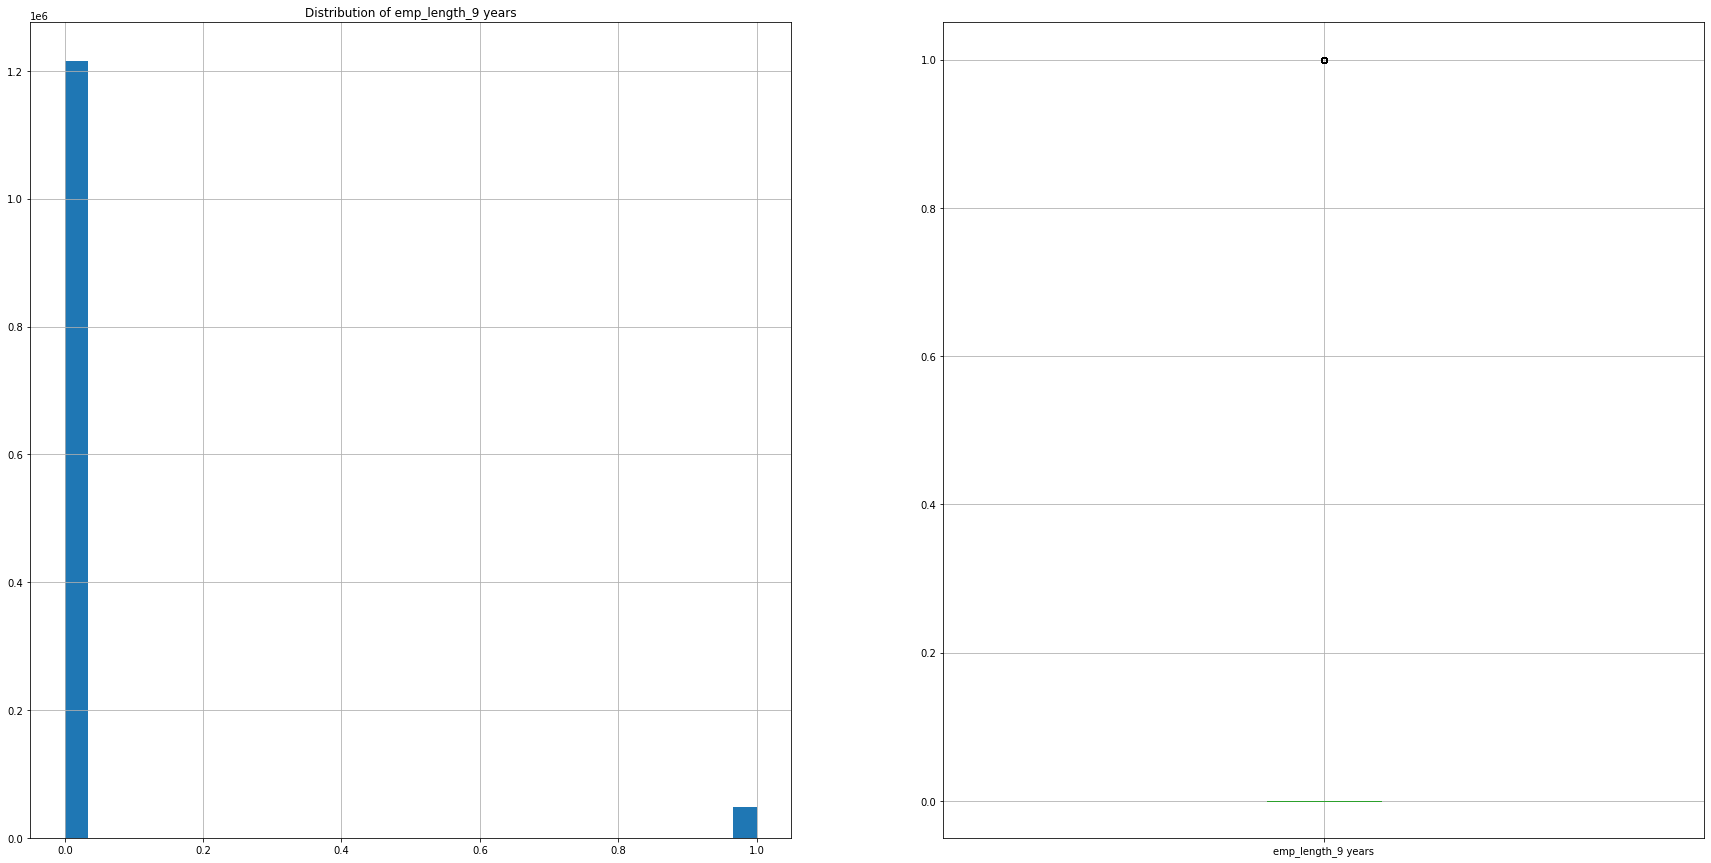

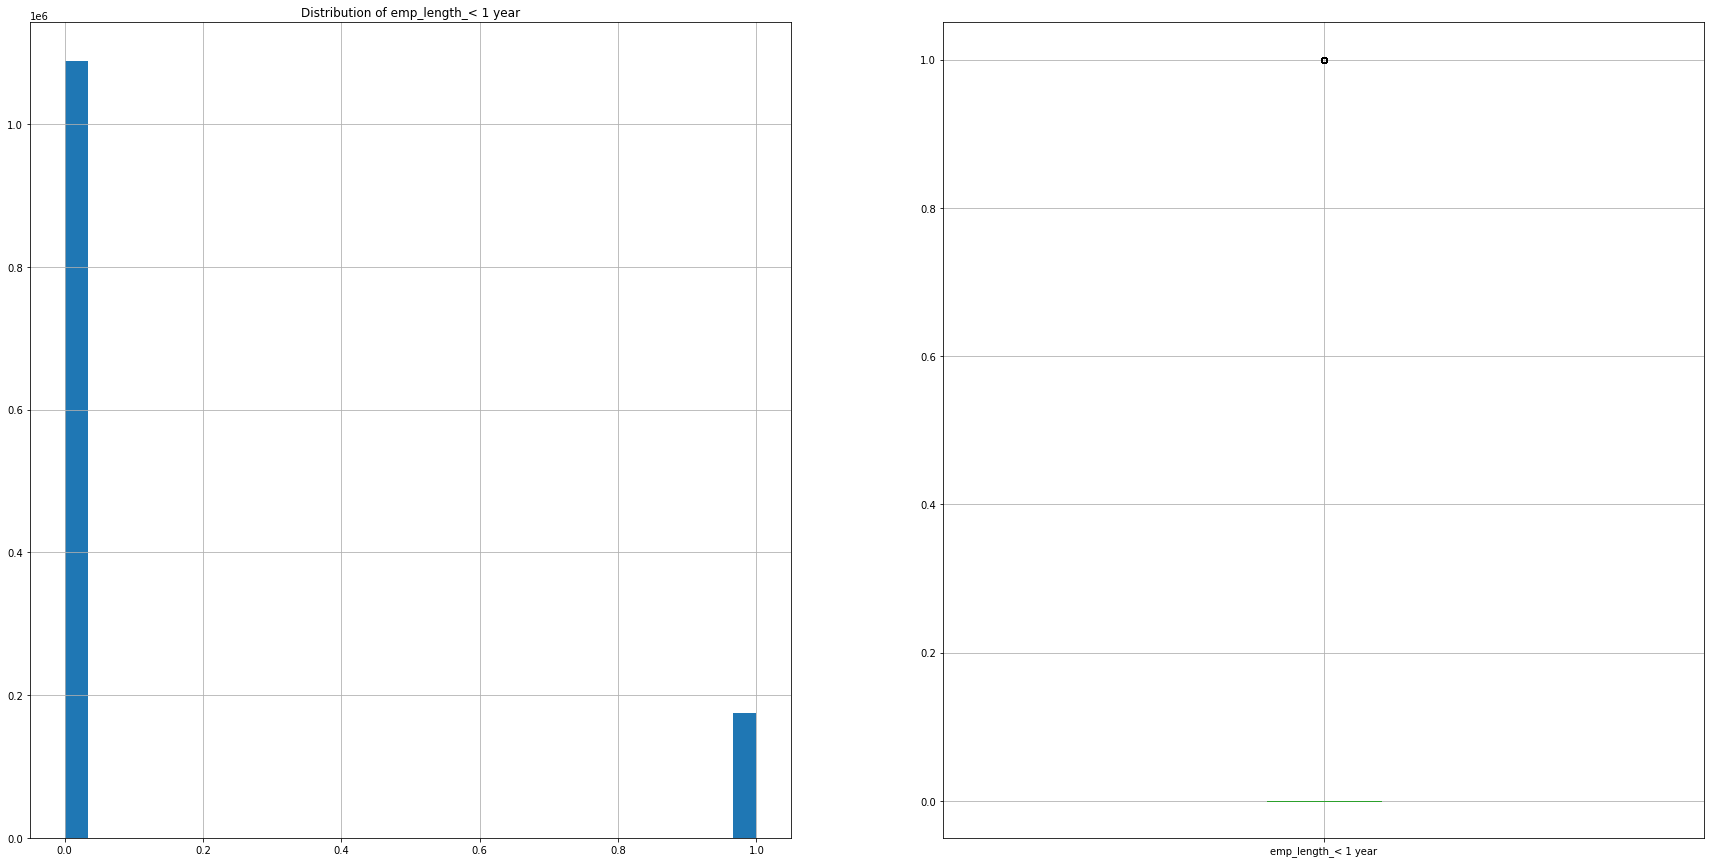

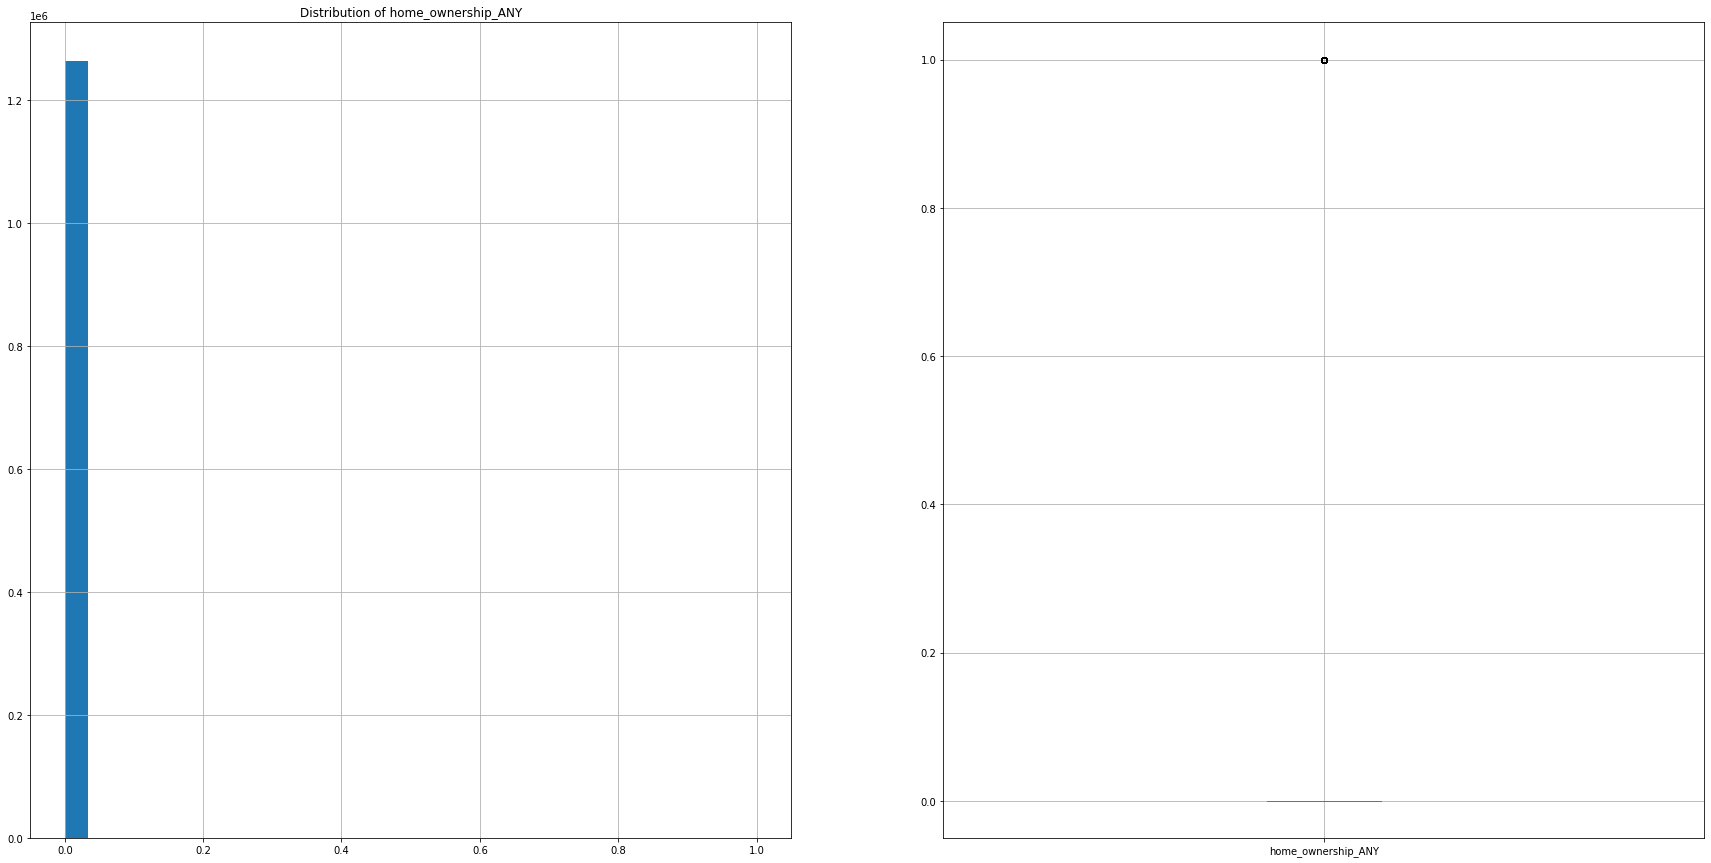

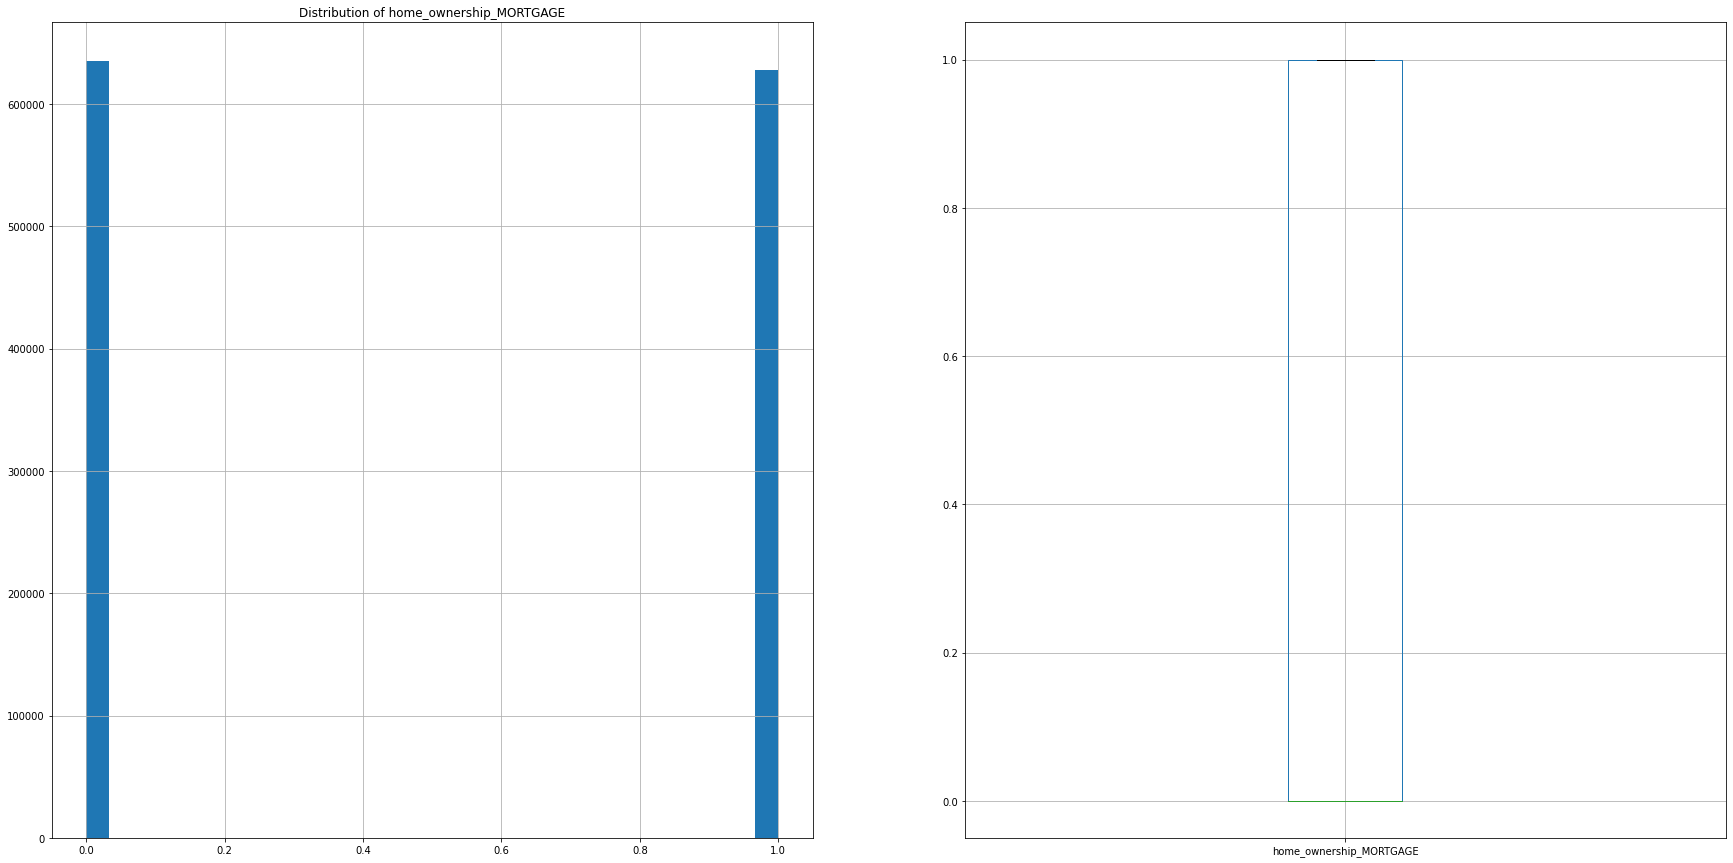

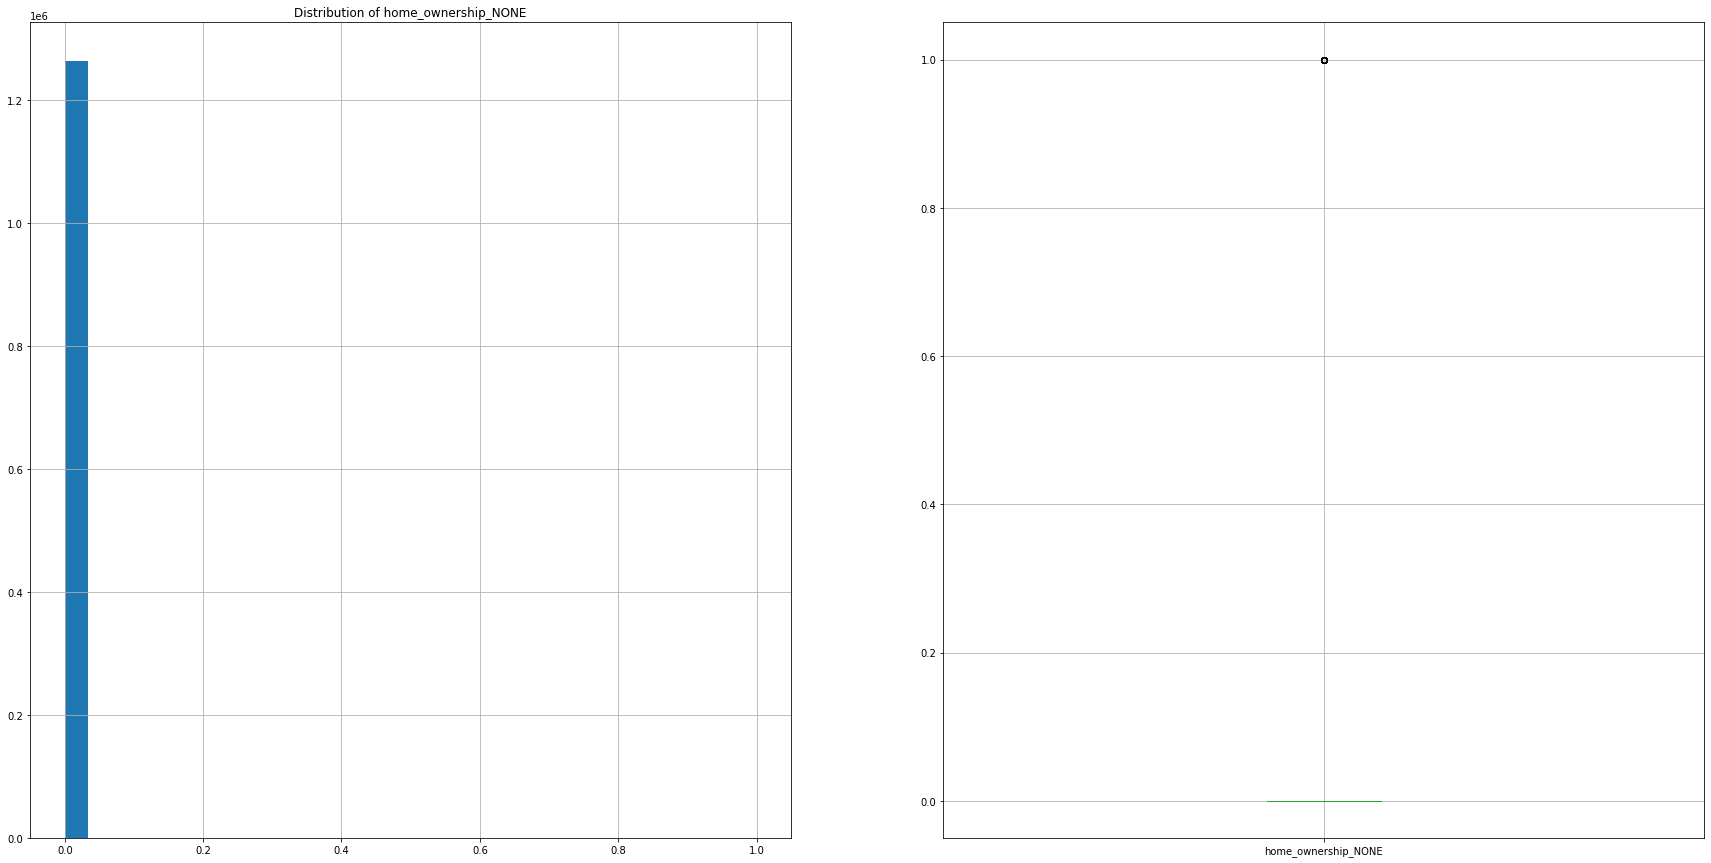

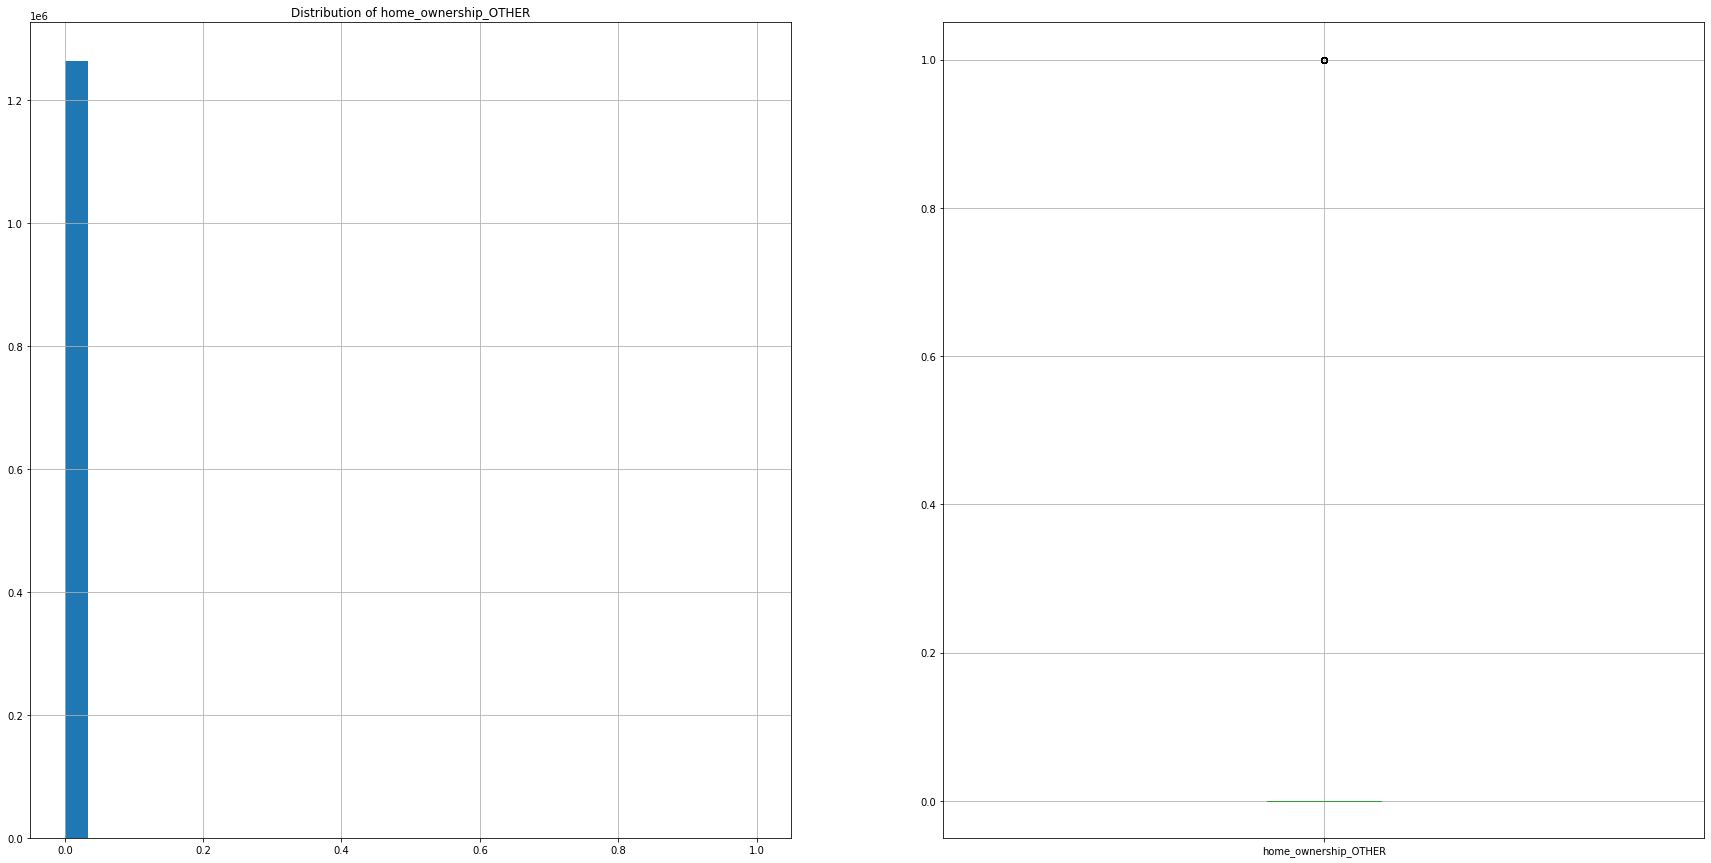

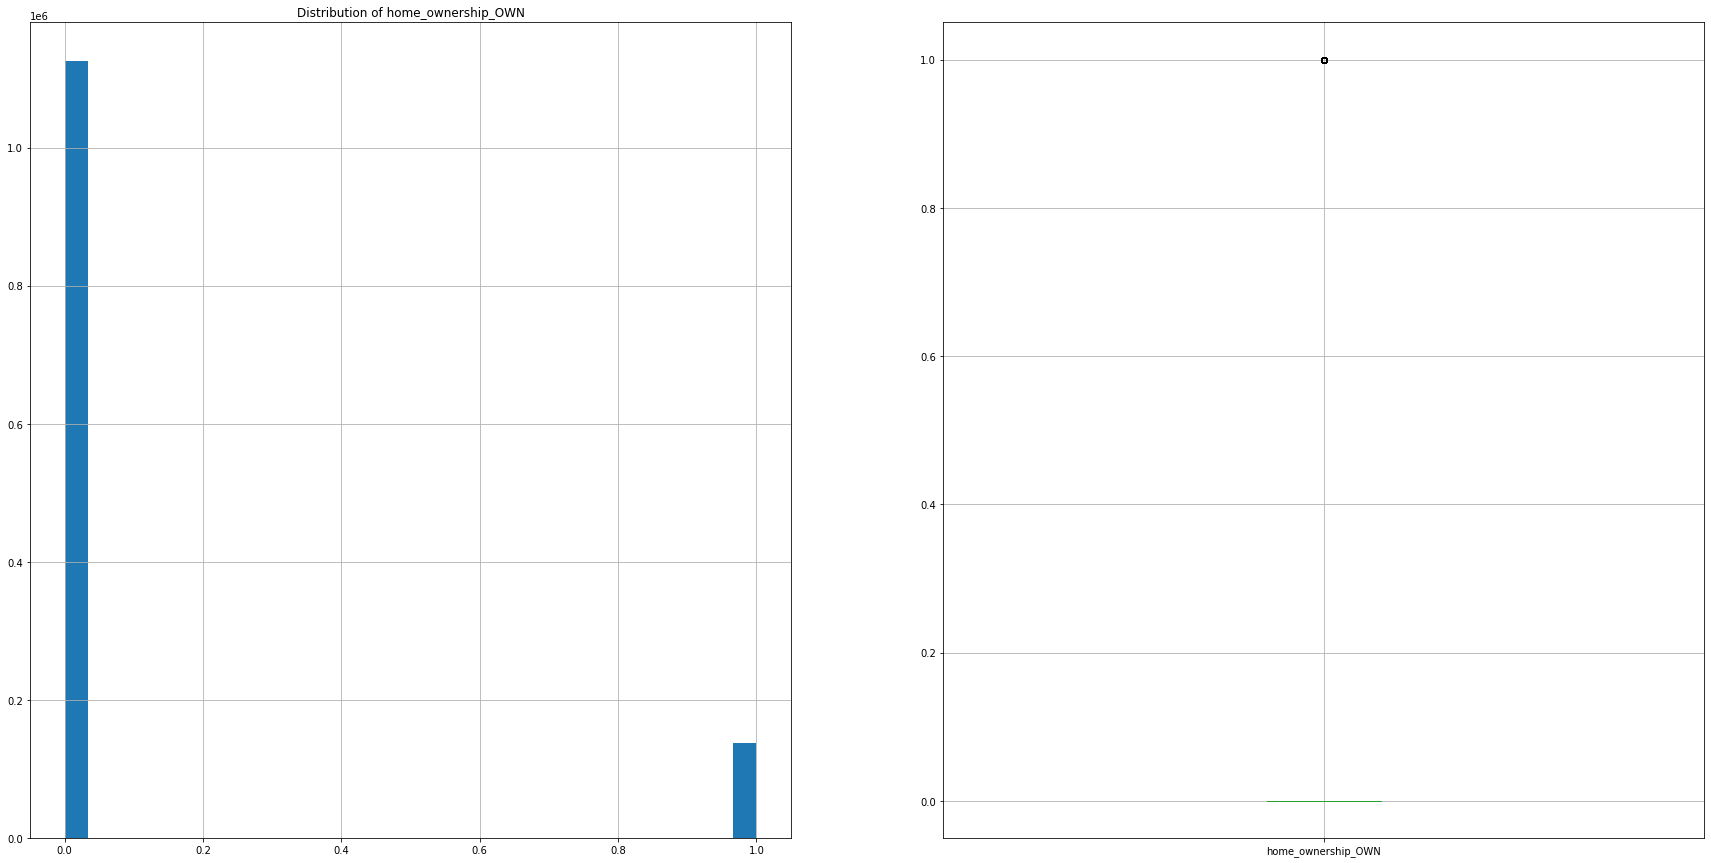

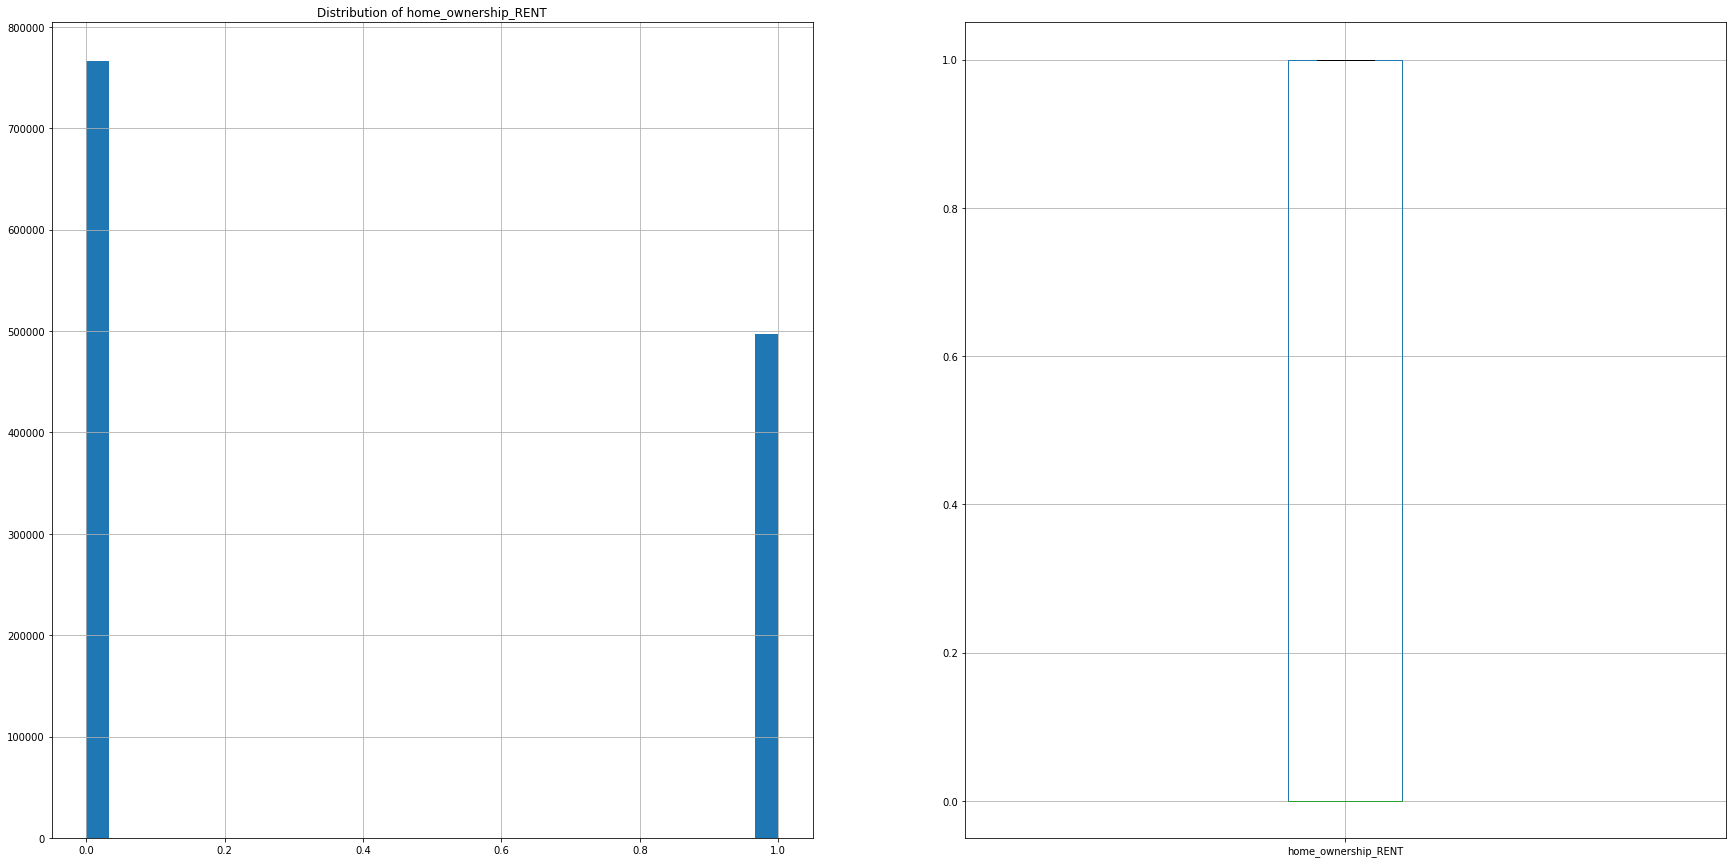

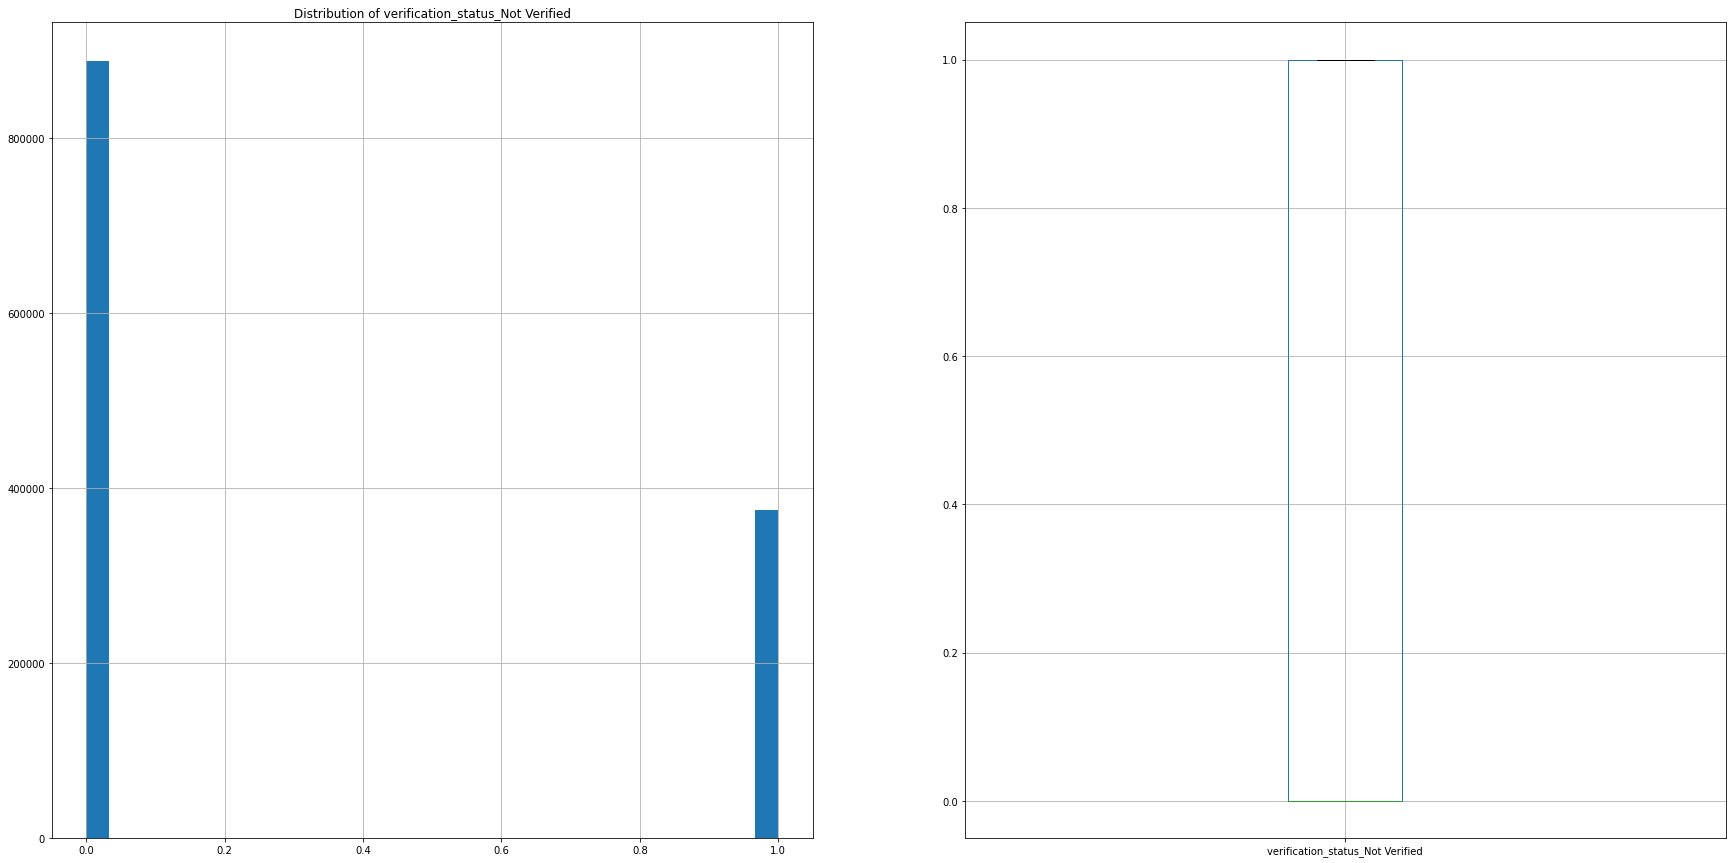

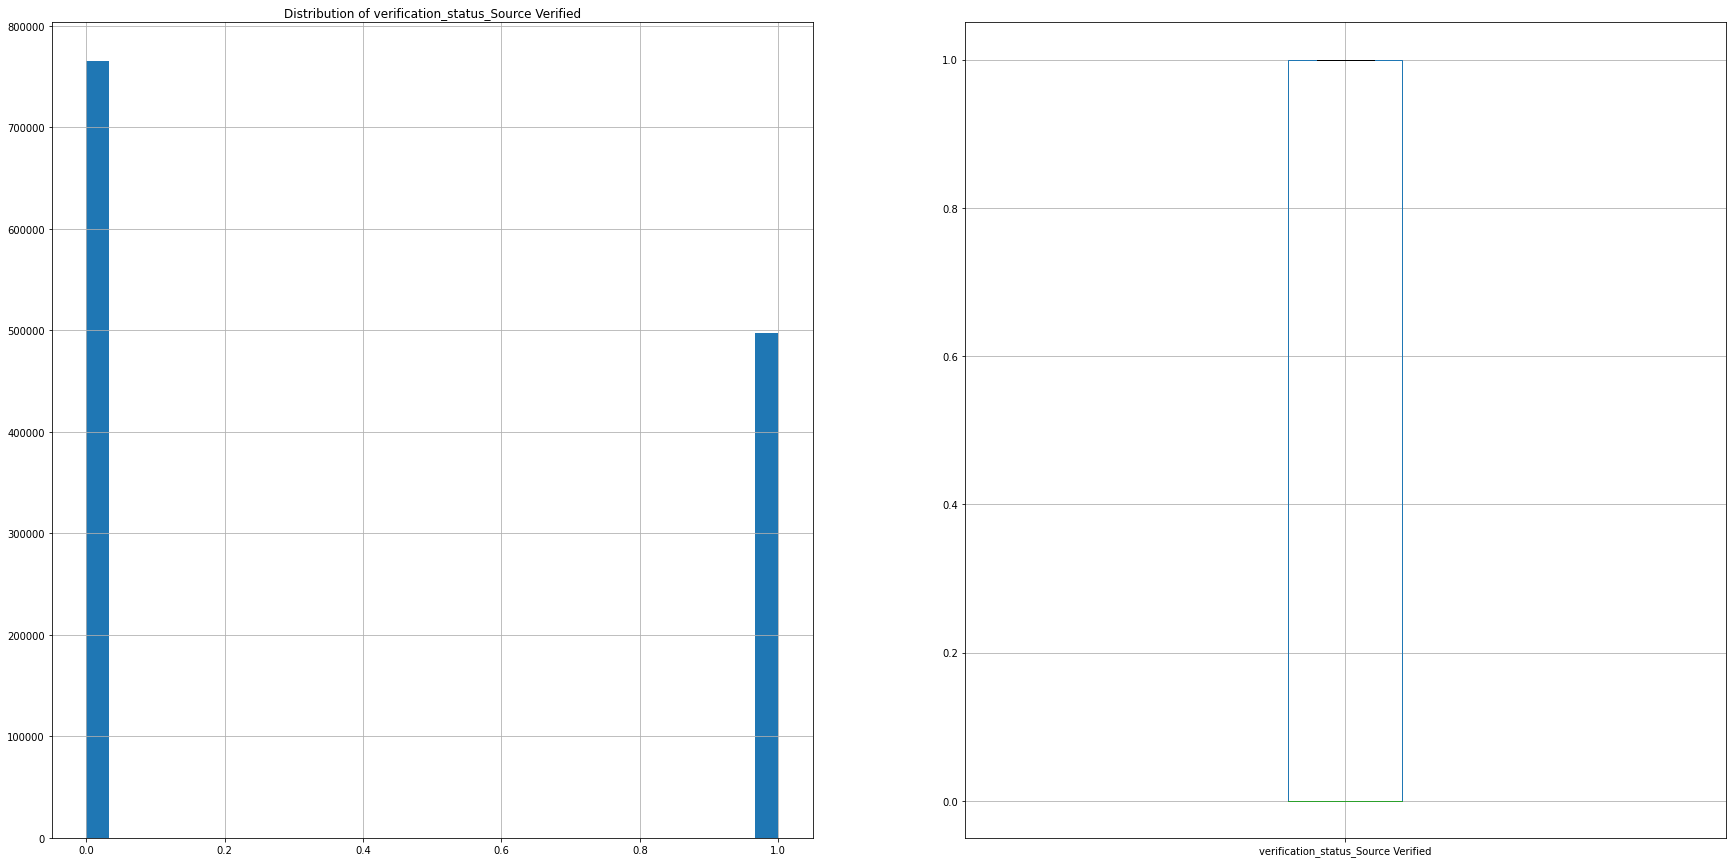

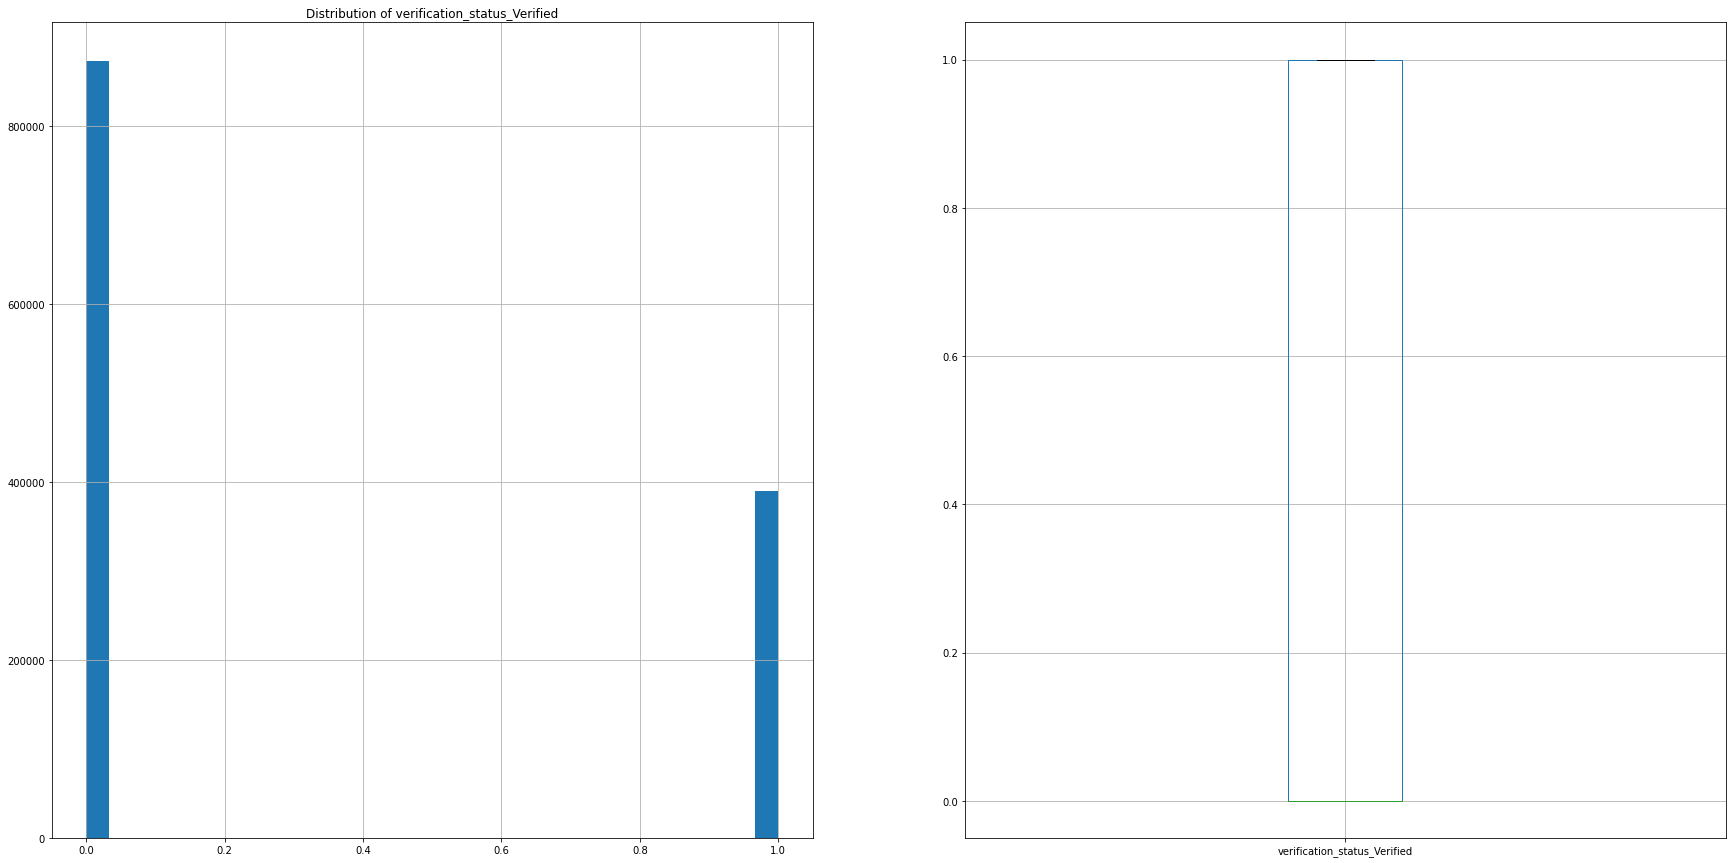

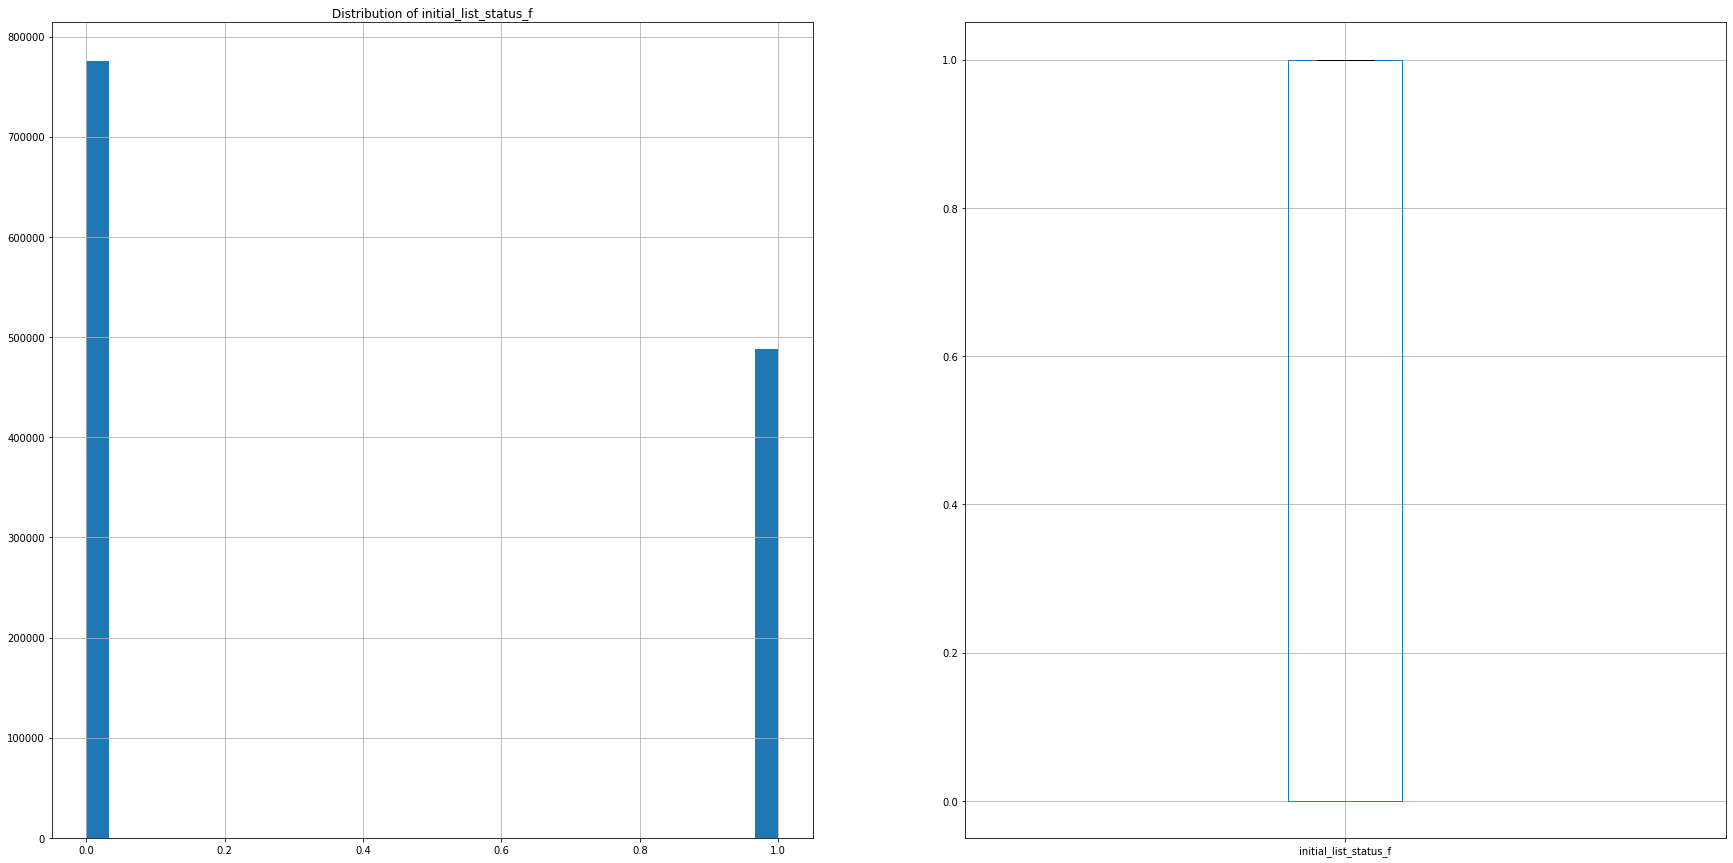

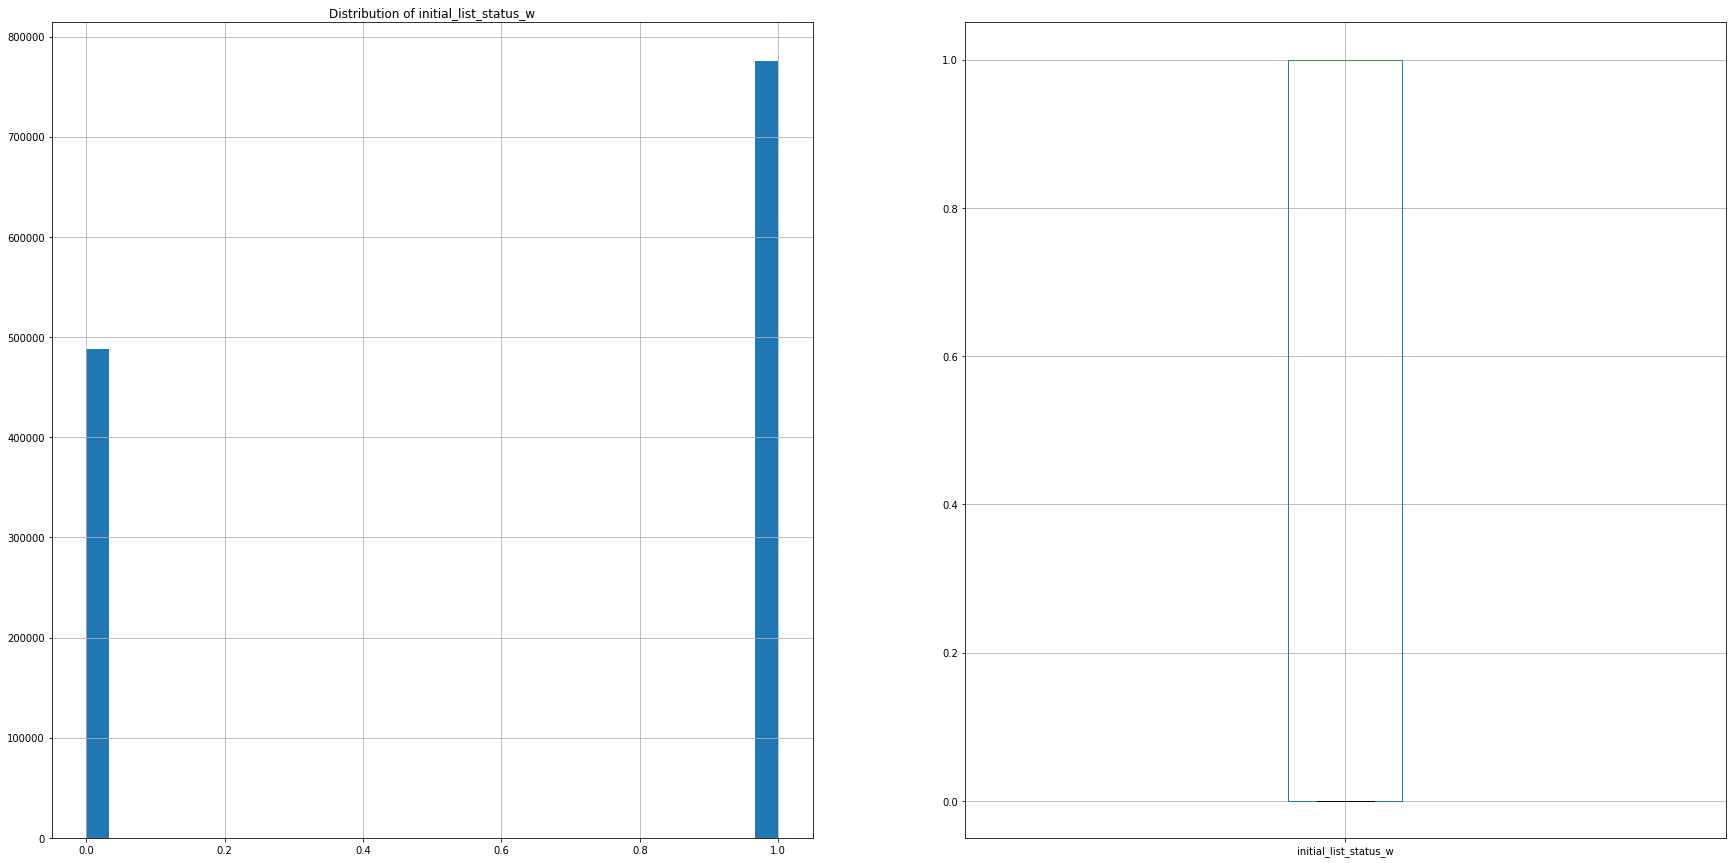

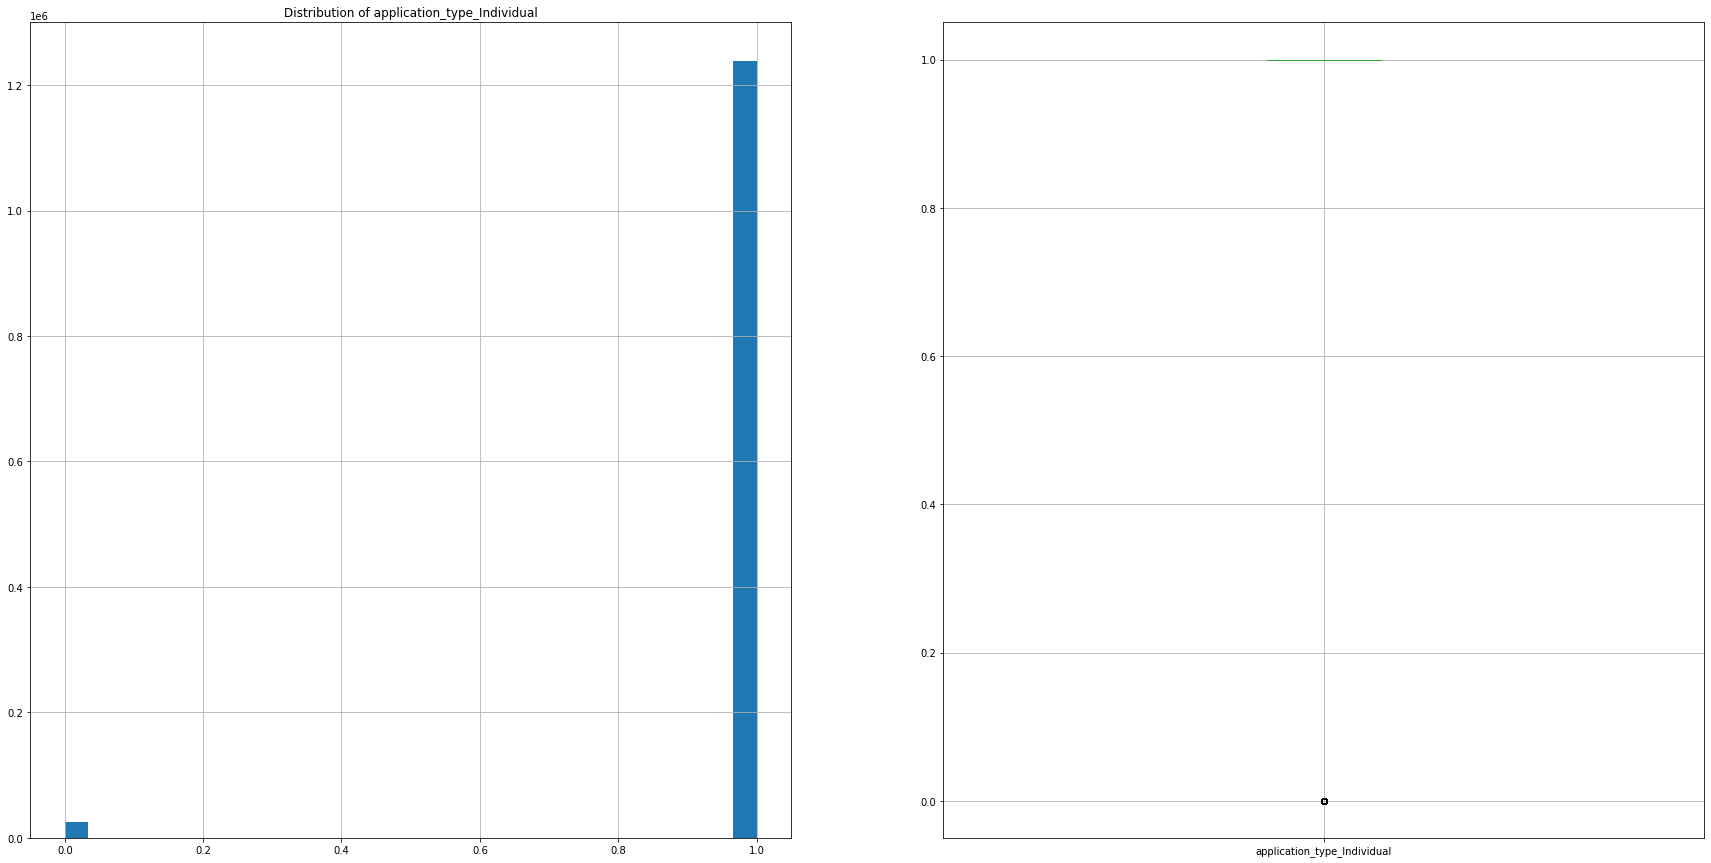

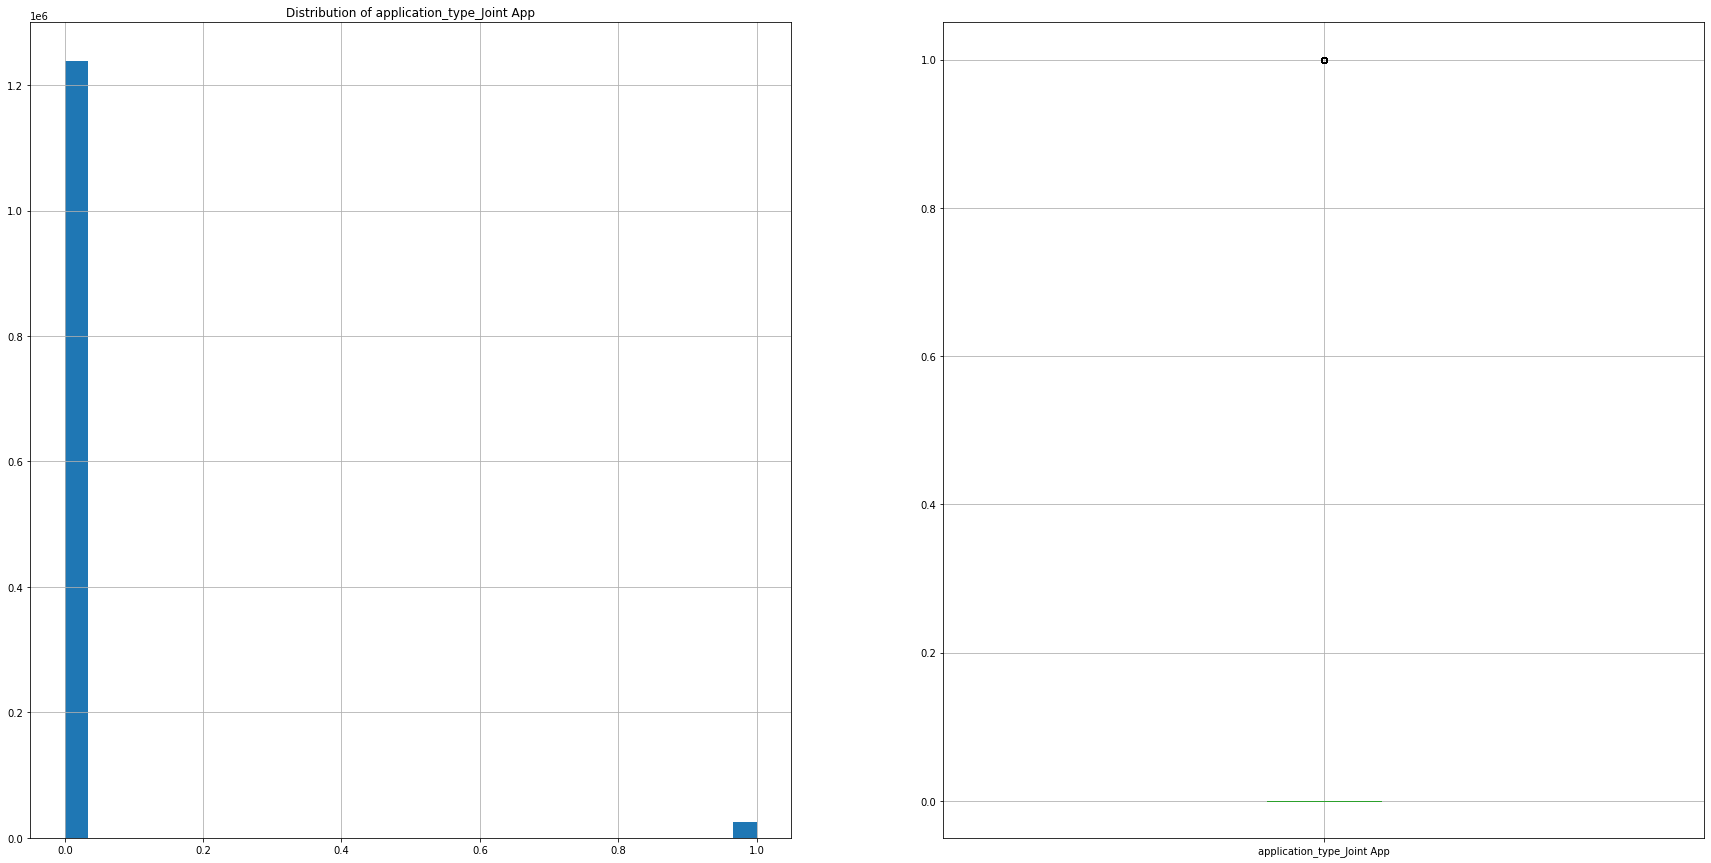

In [ ]:
#EXPLORATORY DATA ANALYSIS

#Visually explore using boxplots and histograms
for col in df.columns:
    # For each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(30, 15))
    # Our first chart is a histogram and we set the title 
    df[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # Our second column is the boxplot 
    df.boxplot(column = col, ax = axes[1])
    # We then use this to command to display the charts
    plt.show()


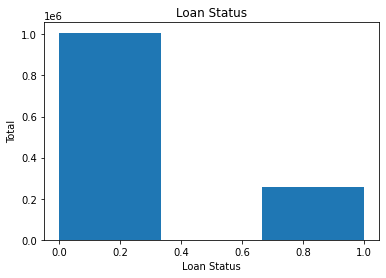

In [ ]:
#Examine target variable
# We can now look at our target variable 
df_loan_status = df['loan_status']

# We can plot a histogram in a slightly different way 
plt.hist(df_loan_status, bins = 3)
plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.title('Loan Status')
plt.show()

In [ ]:
df.head()


loan_amnt  int_rate  loan_status  delinq_2yrs  fico_range_low  \
0     3600.0     13.99            0          0.0           675.0   
1    24700.0     11.99            0          1.0           715.0   
2    20000.0     10.78            0          0.0           695.0   
3    10400.0     22.45            0          1.0           695.0   
4    11950.0     13.44            0          0.0           690.0   

   fico_range_high  revol_bal  total_acc  out_prncp  out_prncp_inv  \
0            679.0     2765.0       13.0        0.0            0.0   
1            719.0    21470.0       38.0        0.0            0.0   
2            699.0     7869.0       18.0        0.0            0.0   
3            699.0    21929.0       35.0        0.0            0.0   
4            694.0     8822.0        6.0        0.0            0.0   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   4421.723917          4421.72           3600.0         821.72   
1  25679.660000         25679.66          24700.0         979.66   
2  22705.924294         22705.92          20000.0        2705.92   
3  11740.500000         11740.50          10400.0        1340.50   
4  13708.948530         13708.95          11950.0        1758.95   

   total_rec_late_fee  last_pymnt_amnt  last_fico_range_high  \
0                 0.0           122.67                 564.0   
1                 0.0           926.35                 699.0   
2                 0.0         15813.30                 704.0   
3                 0.0         10128.96                 704.0   
4                 0.0          7653.56                 759.0   

   last_fico_range_low  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                560.0             0.0         722.0     144904.0   
1                695.0             0.0           0.0     204396.0   
2                700.0             0.0           0.0     189699.0   
3                700.0             0.0           0.0     331730.0   
4                755.0             0.0           0.0      12798.0   

   avg_cur_bal  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0      20701.0     37.2                       0.0          0.0   
1       9733.0     27.1                       0.0          0.0   
2      31617.0     55.9                       0.0          0.0   
3      27644.0     77.5                       0.0          0.0   
4       2560.0     91.0                       0.0          0.0   

   mo_sin_old_rev_tl_op  mort_acc  num_accts_ever_120_pd  num_rev_accts  \
0                 128.0       1.0                    2.0            9.0   
1                 192.0       4.0                    0.0           27.0   
2                 184.0       5.0                    0.0            7.0   
3                 210.0       6.0                    0.0           19.0   
4                  54.0       0.0                    0.0            4.0   

   num_rev_tl_bal_gt_0  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  \
0                  4.0               0.0           0.0                 0.0   
1                  5.0               0.0           0.0                 0.0   
2                  3.0               0.0           0.0                 0.0   
3                  6.0               0.0           0.0                 0.0   
4                  3.0               0.0           0.0                 0.0   

   percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  total_bal_ex_mort  \
0               0.0                   0.0        0.0             7746.0   
1               7.7                   0.0        0.0            39475.0   
2              50.0                   0.0        0.0            18696.0   
3              60.0                   0.0        0.0            95768.0   
4             100.0                   0.0        0.0            12798.0   

   total_il_high_credit_limit  hardship_flag  debt_settlement_flag  \
0                     13734.0              0                     0   
1                     24667.0              0            

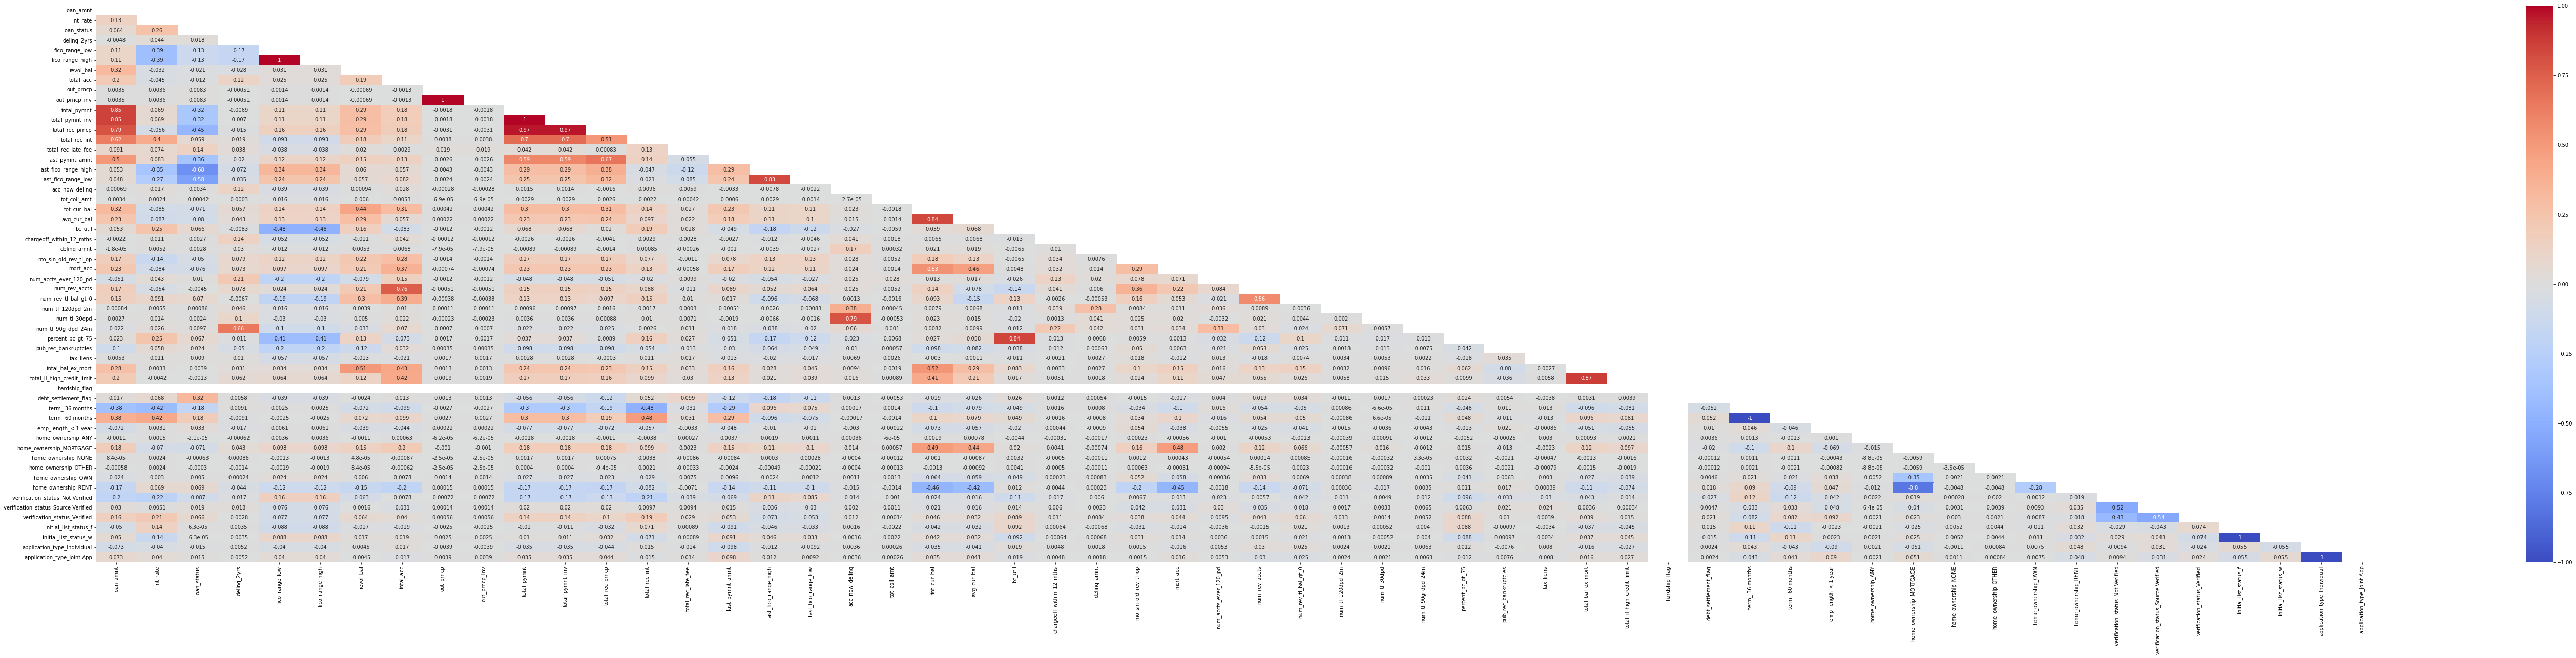

In [ ]:
# correlation matrix and visualize it in a heat map 
#corr = df.corr()
df_copy = df.copy()
#df_copy.head()
df_copy = df_copy.drop(['sub_grade_A1','sub_grade_A2','sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5' ,
                        'sub_grade_C1','sub_grade_C2','sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 
                        'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',  
                        'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 
                        'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3','sub_grade_F4','sub_grade_F5', 
                        'sub_grade_G1','sub_grade_G2','sub_grade_G3', 'sub_grade_G4','sub_grade_G5',
                        'emp_length_1 year',  'emp_length_10+ years',  'emp_length_2 years', 'emp_length_3 years',
                        'emp_length_4 years','emp_length_5 years','emp_length_6 years','emp_length_7 years','emp_length_8 years',
                        'emp_length_9 years', 'grade_A', 'grade_B','grade_C','grade_D','grade_E',
                        'grade_F','grade_G',], axis=1)
df_copcorr = pd.DataFrame(df_copy)
corr2 = df_copcorr.corr()
plt.figure(figsize=(100,20))
mask = np.zeros(corr2.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr2, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask);


In [ ]:
# dropping highly correlated variables telling the same thing:
type(df)
df = df.drop(['last_fico_range_high', 'last_fico_range_low', 'fico_range_high', 'num_rev_accts', 
              'acc_now_delinq', 'avg_cur_bal', 'percent_bc_gt_75', 'total_il_high_credit_limit'], axis = 1)
df.head()

loan_amnt  int_rate  loan_status  delinq_2yrs  fico_range_low  revol_bal  \
0     3600.0     13.99            0          0.0           675.0     2765.0   
1    24700.0     11.99            0          1.0           715.0    21470.0   
2    20000.0     10.78            0          0.0           695.0     7869.0   
3    10400.0     22.45            0          1.0           695.0    21929.0   
4    11950.0     13.44            0          0.0           690.0     8822.0   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0       13.0        0.0            0.0   4421.723917          4421.72   
1       38.0        0.0            0.0  25679.660000         25679.66   
2       18.0        0.0            0.0  22705.924294         22705.92   
3       35.0        0.0            0.0  11740.500000         11740.50   
4        6.0        0.0            0.0  13708.948530         13708.95   

   total_rec_prncp  total_rec_int  total_rec_late_fee  last_pymnt_amnt  \
0           3600.0         821.72                 0.0           122.67   
1          24700.0         979.66                 0.0           926.35   
2          20000.0        2705.92                 0.0         15813.30   
3          10400.0        1340.50                 0.0         10128.96   
4          11950.0        1758.95                 0.0          7653.56   

   tot_coll_amt  tot_cur_bal  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0         722.0     144904.0     37.2                       0.0          0.0   
1           0.0     204396.0     27.1                       0.0          0.0   
2           0.0     189699.0     55.9                       0.0          0.0   
3           0.0     331730.0     77.5                       0.0          0.0   
4           0.0      12798.0     91.0                       0.0          0.0   

   mo_sin_old_rev_tl_op  mort_acc  num_accts_ever_120_pd  num_rev_tl_bal_gt_0  \
0                 128.0       1.0                    2.0                  4.0   
1                 192.0       4.0                    0.0                  5.0   
2                 184.0       5.0                    0.0                  3.0   
3                 210.0       6.0                    0.0                  6.0   
4                  54.0       0.0                    0.0                  3.0   

   num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  pub_rec_bankruptcies  \
0               0.0           0.0                 0.0                   0.0   
1               0.0           0.0                 0.0                   0.0   
2               0.0           0.0                 0.0                   0.0   
3               0.0           0.0                 0.0                   0.0   
4               0.0           0.0                 0.0                   0.0   

   tax_liens  total_bal_ex_mort  hardship_flag  debt_settlement_flag  \
0        0.0             7746.0              0                     0   
1        0.0            39475.0              0                     0   
2        0.0            18696.0              0                     0   
3        0.0            95768.0              0                     0   
4        0.0            12798.0              0                     0   

   term_ 36 months  term_ 60 months  grade_A  grade_B  grade_C  grade_D  \
0                1                0        0        0        1        0   
1                1                0        0        0        1        0   
2                0                1        0        1        0        0   
3                0                1        0        0        0        0   
4                1                0        0        0        1        0   

   grade_E  grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0        0        0        0             0             0             0   
1        0        0        0             0             0             0   
2        0        0        0             0             0             0   
3        0        1  

In [ ]:
df.head()

loan_amnt  int_rate  loan_status  delinq_2yrs  fico_range_low  revol_bal  \
0     3600.0     13.99            0          0.0           675.0     2765.0   
1    24700.0     11.99            0          1.0           715.0    21470.0   
2    20000.0     10.78            0          0.0           695.0     7869.0   
3    10400.0     22.45            0          1.0           695.0    21929.0   
4    11950.0     13.44            0          0.0           690.0     8822.0   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0       13.0        0.0            0.0   4421.723917          4421.72   
1       38.0        0.0            0.0  25679.660000         25679.66   
2       18.0        0.0            0.0  22705.924294         22705.92   
3       35.0        0.0            0.0  11740.500000         11740.50   
4        6.0        0.0            0.0  13708.948530         13708.95   

   total_rec_prncp  total_rec_int  total_rec_late_fee  last_pymnt_amnt  \
0           3600.0         821.72                 0.0           122.67   
1          24700.0         979.66                 0.0           926.35   
2          20000.0        2705.92                 0.0         15813.30   
3          10400.0        1340.50                 0.0         10128.96   
4          11950.0        1758.95                 0.0          7653.56   

   tot_coll_amt  tot_cur_bal  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0         722.0     144904.0     37.2                       0.0          0.0   
1           0.0     204396.0     27.1                       0.0          0.0   
2           0.0     189699.0     55.9                       0.0          0.0   
3           0.0     331730.0     77.5                       0.0          0.0   
4           0.0      12798.0     91.0                       0.0          0.0   

   mo_sin_old_rev_tl_op  mort_acc  num_accts_ever_120_pd  num_rev_tl_bal_gt_0  \
0                 128.0       1.0                    2.0                  4.0   
1                 192.0       4.0                    0.0                  5.0   
2                 184.0       5.0                    0.0                  3.0   
3                 210.0       6.0                    0.0                  6.0   
4                  54.0       0.0                    0.0                  3.0   

   num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  pub_rec_bankruptcies  \
0               0.0           0.0                 0.0                   0.0   
1               0.0           0.0                 0.0                   0.0   
2               0.0           0.0                 0.0                   0.0   
3               0.0           0.0                 0.0                   0.0   
4               0.0           0.0                 0.0                   0.0   

   tax_liens  total_bal_ex_mort  hardship_flag  debt_settlement_flag  \
0        0.0             7746.0              0                     0   
1        0.0            39475.0              0                     0   
2        0.0            18696.0              0                     0   
3        0.0            95768.0              0                     0   
4        0.0            12798.0              0                     0   

   term_ 36 months  term_ 60 months  grade_A  grade_B  grade_C  grade_D  \
0                1                0        0        0        1        0   
1                1                0        0        0        1        0   
2                0                1        0        1        0        0   
3                0                1        0        0        0        0   
4                1                0        0        0        1        0   

   grade_E  grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0        0        0        0             0             0             0   
1        0        0        0             0             0             0   
2        0        0        0             0             0             0   
3        0        1  

# Feature Engineering

In [ ]:
## FEATURE ENGINEERING

# Making Loss given default variable
defaulted = df.loc[(df.loan_status == 1)]
defaulted['lgd'] = (defaulted['total_rec_prncp'] + defaulted['total_rec_int'] + defaulted['total_rec_late_fee']) / defaulted['loan_amnt']
avg_lgd = 1 - defaulted.lgd.mean()
# Drop the variables we used to create avg_lgd
df = df.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt'], axis = 1)

# Engineering Revenue Amount:
# Using: (loan_amnt * [(1 + int_rate)^ (term in years)]) - loan_amt

# Evaluating variable term in years, adding as a column to data frame
df.loc[term == ' 36 months', 'term_in_years'] = 3
df.loc[term == ' 60 months', 'term_in_years'] = 5

# Engineer revenue amount using term_in_years column
df['revenue_amnt'] = (df['loan_amnt'] * (1 + ((df['int_rate'] * .01) * df['term_in_years']))) - df['loan_amnt']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Now that we have used term in years, drop
df = df.drop(['term_in_years'], axis=1)
# Reset Indices
df = df.reset_index(drop=True)

In [ ]:
#Dropping subgrades - test if model gets better, maybe remove this box later

df = df.drop(['sub_grade_A1','sub_grade_A2','sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5' ,
                        'sub_grade_C1','sub_grade_C2','sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 
                        'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',  
                        'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 
                        'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3','sub_grade_F4','sub_grade_F5', 
                        'sub_grade_G1','sub_grade_G2','sub_grade_G3', 'sub_grade_G4','sub_grade_G5'], axis=1)

In [ ]:
# Save revenue_amnt in a var for later
# Save revenue_amnt_df as a dataframe with 'revenue_amnt' column for later
revenue_amnt = df['revenue_amnt']
revenue_amnt_df = df

# Remove variables we shouldnt know in advance
df = df.drop(['out_prncp','out_prncp_inv','tot_coll_amt','chargeoff_within_12_mths','delinq_amnt','num_accts_ever_120_pd','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','hardship_flag','debt_settlement_flag','revenue_amnt'], axis=1)

# Remove variables that are very lowly correlated and we think wont matter
df = df.drop(['initial_list_status_w','total_acc','term_ 60 months','application_type_Joint App','application_type_Individual','tax_liens','emp_length_1 year','emp_length_10+ years','emp_length_2 years','emp_length_3 years','emp_length_4 years','emp_length_5 years','emp_length_6 years','emp_length_7 years','emp_length_8 years','emp_length_9 years','emp_length_< 1 year'], axis = 1)

# Models to predict Defaults

## FULL xGB Classifier

In [ ]:
# Engineering Expected Loss by creating model that predicts prob_default:
# FULL xGB Classifier

# Create X and y data frames with X containing only the feature variables and y containing reponse 
y = df['loan_status'].values
X = df.drop(['loan_status'], axis=1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Create either logistic regression or XGB Classifier model to fit the training data to 
# Here I am using an XGB Classifier 
model = xgb.XGBClassifier()
model.fit(X_train, np.ravel(y_train))

# To predict probability of default, we can use predict_proba() method
prob_preds = model.predict_proba(X_test)
preds = model.predict(X_test)

              precision    recall  f1-score   support

 Non-Default       0.81      0.99      0.89    302394
     Default       0.57      0.05      0.10     76525

    accuracy                           0.80    378919
   macro avg       0.69      0.52      0.49    378919
weighted avg       0.76      0.80      0.73    378919



Text(0.5, 15.0, 'Predicted')

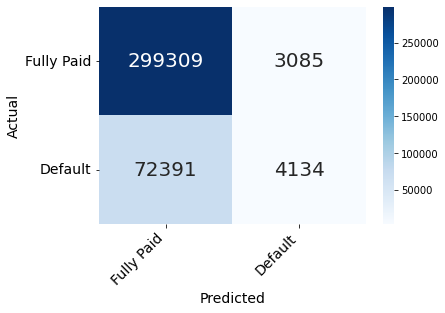

In [ ]:
# Check classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds, target_names=target_names))

con_matrix = confusion_matrix(y_test, preds)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Fully Paid', 'Default'), ('Fully Paid', 'Default'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)


In [ ]:
#Cross validation model
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10
params = {'objective': 'binary:logistic', 
          'seed':99, 'eval_metric':'auc'}

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label=y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds, early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

#We want test and train AUC to improve as the model has more folds.

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.700957       0.000564       0.699302      0.001456
1        0.704032       0.000390       0.702317      0.001789
2        0.705642       0.000304       0.703712      0.001748
3        0.706963       0.000456       0.704698      0.001689
4        0.708060       0.000473       0.705634      0.001676


## Undersampled XGB

0    255157
1    255157
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.66      0.63      0.65     51120
     Default       0.65      0.67      0.66     50943

    accuracy                           0.65    102063
   macro avg       0.65      0.65      0.65    102063
weighted avg       0.65      0.65      0.65    102063



Text(0.5, 15.0, 'Predicted')

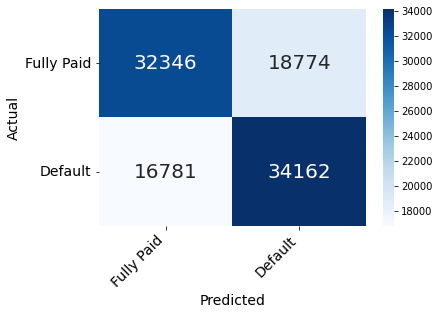

In [ ]:
# Model with 50% default and 50% fully paid and XGB

# Create data sets for defaults and non-defaults
nondefaults = df[df['loan_status'] == 0]
defaults = df[df['loan_status'] == 1]

count_def = len(defaults.index)
# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_def)

# Concatenate the undersampled nondefaults with defaults
df50 = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(df50['loan_status'].value_counts())

x2 = df50.drop(['loan_status'], axis=1).values
y2 = df50['loan_status'].values
# Create training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=21)

# Create either logistic regression or XGB Classifier model to fit the training data to 
# Here I am using an XGB Classifier 
model2 = xgb.XGBClassifier()
model2.fit(X_train2, np.ravel(y_train2))

# To predict probability of default, we can use predict_proba() method
prob_preds2 = model2.predict_proba(X_test2)
preds2 = model2.predict(X_test2)

# Check classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test2, preds2, target_names=target_names))

con_matrix = confusion_matrix(y_test2, preds2)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Fully Paid', 'Default'), ('Fully Paid', 'Default'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)


In [ ]:
#Cross validation model
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10
params = {'objective': 'binary:logistic', 
          'seed':99, 'eval_metric':'auc'}

# Create the DTrain matrix for XGBoost
DTrain2 = xgb.DMatrix(X_train2, label=y_train2)

# Create the data frame of cross validations
cv_df2 = xgb.cv(params, DTrain2, num_boost_round = 5, nfold=n_folds, early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df2)

#We want test and train AUC to improve as the model has more folds.

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.702194       0.000253       0.699855      0.001141
1        0.705894       0.000353       0.703523      0.001134
2        0.708133       0.000301       0.705397      0.000869
3        0.709714       0.000273       0.706559      0.000798
4        0.711088       0.000365       0.707591      0.000715


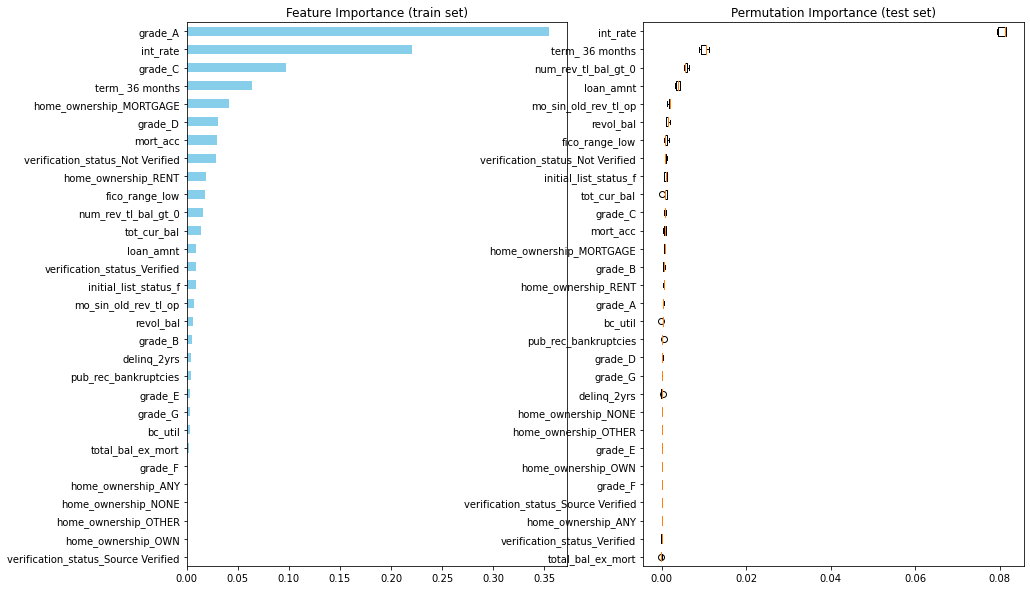

In [ ]:
#Finding feature importance to look out for in predicting loan risk

from sklearn.inspection import permutation_importance

mycolumns = df.drop(['loan_status'], axis=1).columns
# 1. Create a pd.Series of features importances
importances = pd.Series(model2.feature_importances_, index = mycolumns)
permImp = permutation_importance(model2, X_test2, y_test2, 
                                 n_repeats=5, random_state=42, n_jobs=2)

# 2. Sort importances
sorted_importances = importances.sort_values()
sorted_idx = permImp.importances_mean.argsort()

# 3. Make a horizontal bar plot
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sorted_importances.plot(kind='barh', color='skyblue');
plt.title("Feature Importance (train set)") 

plt.subplot(1, 2, 2)
plt.boxplot(
    permImp.importances[sorted_idx].T,
    vert=False,
    labels=np.array(mycolumns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
plt.show()


## ADA boost Modeling

In [ ]:
# Modeling probability of default with ADA boost and both the full and half sets
# 1 Import models 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 2 Instantiate an "idiot" classification-tree 'idiot'
idiot = DecisionTreeClassifier(max_depth=1, criterion='gini', min_samples_leaf = 5, splitter = "random")

# 3 Instantiate an AdaBoost classifier 'adab_clf'
full_ada = AdaBoostClassifier(base_estimator=idiot, n_estimators=25, learning_rate=.2, random_state=42)
half_ada = AdaBoostClassifier(base_estimator=idiot, n_estimators=25, learning_rate=.2, random_state=42)

# 4 Fit 'adb_clf' to the training set
full_ada.fit(X_train, y_train)
half_ada.fit(X_train2, y_train2)

# 5 Predict the test data
full_preds = full_ada.predict(X_test)
half_preds = half_ada.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Non-Default       0.80      1.00      0.89    302394
     Default       0.00      0.00      0.00     76525

    accuracy                           0.80    378919
   macro avg       0.40      0.50      0.44    378919
weighted avg       0.64      0.80      0.71    378919



Text(0.5, 15.0, 'Predicted')

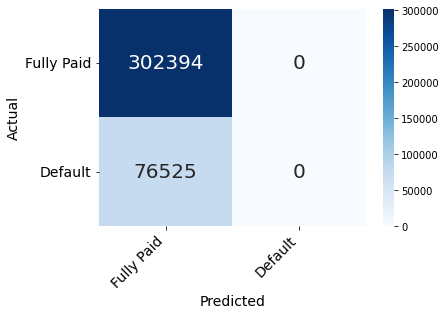

In [ ]:
# Check classification report of the full model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, full_preds, target_names=target_names))

con_matrix = confusion_matrix(y_test, full_preds)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Fully Paid', 'Default'), ('Fully Paid', 'Default'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

              precision    recall  f1-score   support

 Non-Default       0.88      0.62      0.73    302394
     Default       0.31      0.66      0.42     76525

    accuracy                           0.63    378919
   macro avg       0.59      0.64      0.58    378919
weighted avg       0.76      0.63      0.67    378919



Text(0.5, 15.0, 'Predicted')

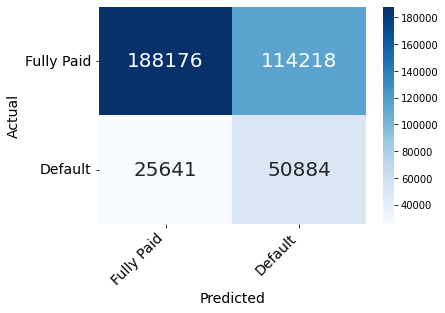

In [ ]:
# Check classification report of the half model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, half_preds, target_names=target_names))

con_matrix = confusion_matrix(y_test, half_preds)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Fully Paid', 'Default'), ('Fully Paid', 'Default'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

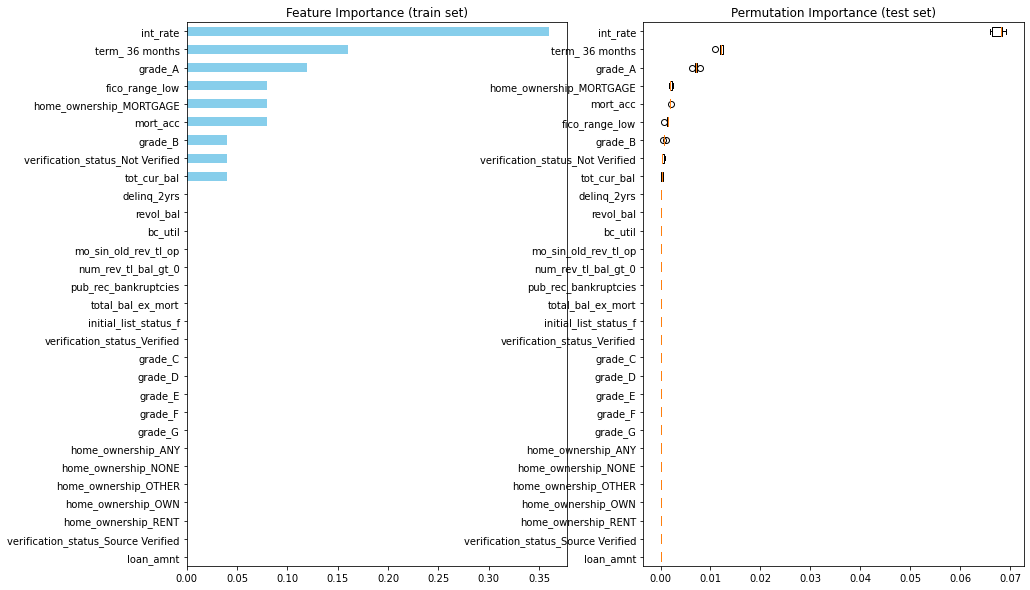

In [ ]:
#Feature importance in ADA Boost

from sklearn.inspection import permutation_importance

mycolumns = df.drop(['loan_status'], axis=1).columns
# 1. Create a pd.Series of features importances
importances = pd.Series(half_ada.feature_importances_, index = mycolumns)
permImp = permutation_importance(half_ada, X_test2, y_test2, 
                                 n_repeats=5, random_state=42, n_jobs=2)

# 2. Sort importances
sorted_importances = importances.sort_values()
sorted_idx = permImp.importances_mean.argsort()

# 3. Make a horizontal bar plot
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sorted_importances.plot(kind='barh', color='skyblue');
plt.title("Feature Importance (train set)") 

plt.subplot(1, 2, 2)
plt.boxplot(
    permImp.importances[sorted_idx].T,
    vert=False,
    labels=np.array(mycolumns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
plt.show()


#### Determine the way important features impact the model

In [ ]:
# Check if mortgage are more often to default or not
print(len(df.loc[(df['home_ownership_MORTGAGE'] == 1) & (df['loan_status'] == 1)]))
print(len(df.loc[(df['home_ownership_MORTGAGE'] == 1) & (df['loan_status'] == 0)]))
print(len(df.loc[(df['home_ownership_MORTGAGE'] == 0) & (df['loan_status'] == 1)]))
print(len(df.loc[(df['home_ownership_MORTGAGE'] == 0) & (df['loan_status'] == 0)]))

108952
519069
146205
488835


In [ ]:
# Check if 3 year terms are more often to default or not
print(len(df.loc[(df['term_ 36 months'] == 1) & (df['loan_status'] == 1)]))
print(len(df.loc[(df['term_ 36 months'] == 0) & (df['loan_status'] == 1)]))
print(len(df.loc[(df['term_ 36 months'] == 0) & (df['loan_status'] == 0)]))


154766
100391
205380


## Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of Predicition: 0.569879
              precision    recall  f1-score   support

           0       0.85      0.56      0.68    302394
           1       0.26      0.60      0.36     76525

    accuracy                           0.57    378919
   macro avg       0.55      0.58      0.52    378919
weighted avg       0.73      0.57      0.61    378919



Text(0.5, 14.09375, 'Predicted')

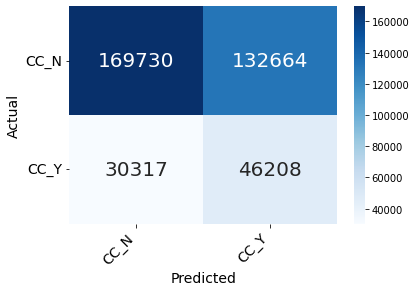

In [ ]:
# Now predicting probability of default with logistic regression
# 0 Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1 Create training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3, random_state=2022, stratify=y)

# 2 Instantiate the classifier: logreg
logreg = LogisticRegression(solver='lbfgs')

# 3 Fit the classifier to the training data
logreg.fit(X_train2, y_train2)

# 4 Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# 5 Output the accuracy of our prediction
print("Accuracy of Predicition: {:2f}".format(logreg.score(X_test, y_test)))

# 6 Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_pred))

# 7 Visualize the confusion matrix to make it easier to read
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('CC_N', 'CC_Y'), ('CC_N', 'CC_Y'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

              precision    recall  f1-score   support

           0       0.98      0.70      0.81    302394
           1       0.44      0.93      0.60     76525

    accuracy                           0.75    378919
   macro avg       0.71      0.81      0.71    378919
weighted avg       0.87      0.75      0.77    378919



Text(0.5, 15.0, 'Predicted')

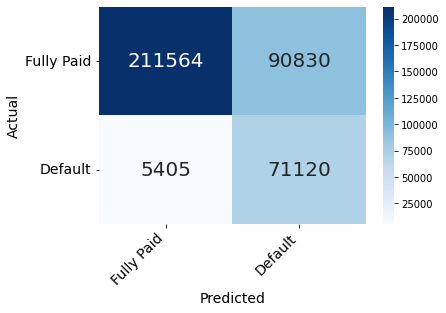

In [ ]:
# Random Forest Model
# Basic imports
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=42)

# Fit 'rf' to the training set
rf.fit(X_train2, y_train2)

# Predict the test set labels 'y_pred'
y_predForest = rf.predict(X_test)

# 6 Compute and print the confusion matrix and classification report
print(classification_report(y_test, y_predForest))

#Visualize the confusion matrix to make it easier to read
con_matrix = confusion_matrix(y_test, y_predForest)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Fully Paid', 'Default'), ('Fully Paid', 'Default'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

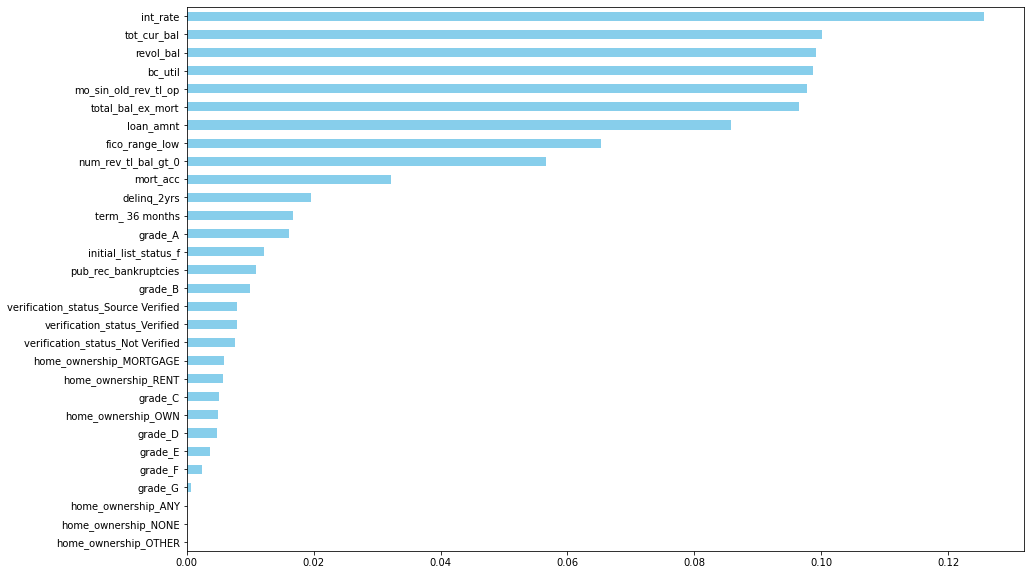

In [ ]:
# 1. Create a pd.Series of features importances
X = df.drop(['loan_status'], axis = 1)

importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# 2. Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# 3. Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

# Find the expected Profit and ROI when utilizing our Random Forest Model

In [ ]:
# Use model to predict on our data and create expected loss column
# We are using the random forest model because it had the best results
dfnp = df.drop(['loan_status'], axis=1).values

prob_def = rf.predict_proba(dfnp)

prob_def_df = pd.DataFrame(prob_def, columns = ['prob_paid','prob_default'])
prob_def_df = prob_def_df.drop(['prob_paid'], axis = 1)

df['expected_loss'] = avg_lgd * df['loan_amnt'] * prob_def_df['prob_default']



In [ ]:
# Calculate total profit gained from using rf model if we invested in the ones that were predicted as fully paid
# revenue_amnt(of predicted correctly) - loan_amnt(predicted incorrectly)


# 1. Sort our Data by its index to ensure that rows for prediction and truth are aligned
revenue_amnt_df.sort_index(inplace=True)

# 2. Add Outcome to our NewCustomers dataframe
revenue_amnt_df['defaulted']=rf.predict(dfnp)

# 3. Add variable for PredNotdefCor (predicted to not default and was right)
revenue_amnt_df['PredNotdefCor']=(revenue_amnt_df['loan_status']==0) & (revenue_amnt_df['defaulted']==0)

# 4. Add variable for PredNotdefIncor (predicted to not default and was wrong)
revenue_amnt_df['PredNotdefIncor']=(revenue_amnt_df['loan_status']==1) & (revenue_amnt_df['defaulted']==0)

# 5. See where our Model fails:
revenue_amnt_df[revenue_amnt_df['PredNotdefCor']==True].head(25)

print(f"Profit made from investing in loans predicted to not default: $ {revenue_amnt_df[revenue_amnt_df['PredNotdefCor']==True]['revenue_amnt'].sum() - revenue_amnt_df[revenue_amnt_df['PredNotdefIncor']==True]['loan_amnt'].sum()}")

Profit made from investing in loans predicted to not default: $ 3523741564.8525


In [ ]:
# Make Expected Profit
# Expected Profit
# Moneygained(prob not default) - Moneylostgivendefault(prob default)

# Why is it this equation ^:
# Moneylostgivendefault incorporates that part of a loan has already been paid off because it is calculated using (avg_lgd * loan_amnt), not just (loan_amnt)

df['expected_profit'] = (revenue_amnt * (1-prob_def_df['prob_default'])) - df['expected_loss']

In [ ]:
# Make expected rate of return
df_roi = df.loc[(df.expected_profit > 7000) & (df['term_ 36 months'] == 1)]

df_roi['roi'] = df_roi['expected_profit'] / (df_roi['loan_amnt'] * 3)

df_roi['roi'].mean()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.1302226704571909